In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
import scipy.io as sio
import os 
import itertools
import re
from matplotlib.patches import Polygon
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
font = {'family' : 'sans-serif',
        'style' : 'normal',
        'weight' : 'light',
        'size'   : 20}

rc('font', **font)

In [2]:
DEBUG = False

In [3]:
def load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id):
    mat = sio.loadmat(file_path)
    mat_data = mat[file_name]['daq'][0, 0]
    t = pd.DataFrame(mat_data['t'][0,0], columns = ["timeStamp"])
    data = pd.DataFrame(mat_data['DAQ_DATA'][0, 0], columns = [
        'channel_1',
        'channel_2',
        'channel_3',
        'channel_4',
        'channel_5',
        'channel_6',
        'channel_7',
        'channel_8'
      ])
    #res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False).set_index('TimeStamp')
    res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False)
    res['userID'] = user_id
    res['gamePhase'] = g_phase_id
    res['testPhase'] = phase_id
    res['movementID'] = movement_id
    return res

In [4]:
def generate_df():
    df = pd.DataFrame() # Main DataFrame
    rootdir = os.path.join(os.path.dirname(os.getcwd()) + "/Data_Sets/")
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".mat") and (file.startswith("data__capslog") == False) and (file.endswith("discard.mat") == False):
                file_path = os.path.join(subdir, file)
                file_name = file.replace(".mat", "")
                try: 
                    list_subdir = subdir.replace(rootdir,"").split("/")
                    user_id = [s for s in list_subdir if "user" in s][0].replace("user_","")
                    g_phase_id = [s for s in list_subdir if "game" in s][0] # Trainig Phase ID
                    list_fileName = ["".join(x) for _, x in itertools.groupby(file.split("_")[1].replace("Phase", ""), key=str.isdigit)]
                    phase_id = list_fileName[0].replace("Phase", "") 
                    movement_id = re.sub(r"(\w)([A-Z])", r"\1 \2", list_fileName[1])
                except:
                    print("Error: Please check the Directory's hierarchy -> Corrupt")
                df = df.append(load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id)) 
    return df

In [5]:
df = generate_df()

In [6]:
df

timeStamp  channel_1  channel_2  channel_3  channel_4  channel_5  \
0         0.000  -2.822843  -0.242390  -0.103075   0.883879  -0.342031   
1         0.001  -0.983520  -0.995575  -0.399863   0.578088  -0.412528   
2         0.002   1.082399  -1.858320  -0.624323  -0.085527  -0.156634   
3         0.003   2.019455  -2.448234  -0.753262  -0.932250   0.016403   
4         0.004   1.484779  -1.670634  -0.353170  -2.197986   0.046616   
5         0.005  -0.649500  -0.227436   0.420768  -3.170748   0.227436   
6         0.006  -2.636225   0.305715   0.917449  -2.580377   0.333028   
7         0.007  -2.322652   0.519036   0.826658   0.262989   0.028763   
8         0.008  -0.351034   1.123751   0.137407   4.035325  -0.244678   
9         0.009   1.203555   0.981689  -0.620050   5.000000  -0.168383   
10        0.010   1.294499   0.271992  -0.579461   2.423209  -0.288777   
11        0.011   0.299916   0.669795   0.066758  -0.445792  -0.611048   
12        0.012   0.079728   1.517128   0.322042  -1.294499  -0.343557   
13        0.013   1.572671   1.200504   0.165026  -1.881971   0.241169   
14        0.014   2.336995   0.585718   0.220874  -2.530632   0.262989   
15        0.015   0.743038   0.599908   0.256580  -1.706950   0.170214   
16        0.016  -0.668727   0.203937  -0.170367   0.124743   0.586633   
17        0.017  -0.501335  -0.831388  -0.634852   1.465858   0.836118   
18        0.018  -0.792020  -1.607309  -0.624628   1.713054   0.520562   
19        0.019  -1.896620  -2.177386  -0.199054   0.889982   0.136950   
20        0.020  -2.246204  -2.397879   0.357900  -0.007858  -0.345083   
21        0.021  -1.575113  -1.429999   0.643091  -0.318074  -0.947509   
22        0.022   0.065232  -0.021897   0.323873  -0.965515  -0.877165   
23        0.023   1.871443   0.521782  -0.322499  -1.622721  -0.162585   
24        0.024   1.569314   0.831083  -0.572595  -0.824063   0.135882   
25        0.025   0.002060   1.403143  -0.198291   0.290455  -0.052873   
26        0.026   0.233082   1.244907   0.242084   0.271839  -0.040970   
27        0.027   0.726101   0.656367   0.303273   0.436484   0.070420   
28        0.028  -0.821317   0.884031   0.226368   1.256962   0.046921   
29        0.029  -1.376898   1.246891   0.295949   1.308537   0.210803   
...         ...        ...        ...        ...        ...        ...   
9945      9.945  -0.500725  -1.121614   2.835660  -0.659876   2.102159   
9946      9.946  -0.420462  -0.879301   1.797284  -0.539178   1.664073   
9947      9.947  -0.088426  -0.173877   1.370336  -0.509117   1.279698   
9948      9.948   0.372549   1.747997   1.963302  -0.065385  -0.196307   
9949      9.949   0.733272   3.113222   1.267185   0.648890  -2.371328   
9950      9.950   0.845579   2.595178  -0.422141   0.973907  -3.499123   
9951      9.951   0.740749   1.324407  -1.383307   0.884489  -3.199893   
9952      9.952   0.470665   0.275654  -1.824292   0.694057  -2.186236   
9953      9.953   0.114061   0.046921  -1.865797   0.504082  -1.173648   
9954      9.954  -0.130236   1.142519  -1.150912   0.486381  -1.092775   
9955      9.955  -0.185779   1.718090  -0.815213   0.585718  -1.705577   
9956      9.956  -0.281453  -0.247578  -1.305333   0.284810  -1.123751   
9957      9.957  -0.532158  -2.737240  -0.940795  -0.452354   1.039063   
9958      9.958  -0.630579  -3.057679   0.545586  -0.982452   2.794919   
9959      9.959  -0.414817  -2.239948   1.172885  -1.056153   3.157321   
9960      9.960  -0.196002  -1.754864   0.580987  -0.923095   2.928130   
9961      9.961  -0.144274  -1.132906   0.335775  -0.683070   2.490806   
9962      9.962  -0.105669  -0.675135   0.693446  -0.468528   1.953079   
9963      9.963  -0.006790  -0.622187   1.032349  -0.410086   1.643473   
9964      9.964   0.230030   0.643854   1.567178  -0.140307   0.833066   
9965      9.965   0.679713   2.956970   1.912795   0.549554  -1.169070   
9966      9.966   0.933776   3.711223   1.039826   1.125734  -3.109255   
9967      

In [7]:
def draw_boxplot(data, edge_color, fill_color, offset, ax):
    # TODO: calculate variance for every box
    bp = ax.boxplot(data, patch_artist=True, notch=0, sym='+', vert=1, whis=1.5, widths =.3, positions=np.array(range(data.shape[1]))+offset)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  
    
    return bp

In [8]:
def phase3_boxplot_per_user_all_channels(movement_id, user_id, ax):
    # Extracting Data
    res_pre = df[(df.userID == user_id) & (df.testPhase == '3') & (df.gamePhase == 'Pregame')]
    data_pre = res_pre[res_pre.movementID == movement_id].copy()
    data_pre.drop(labels=['userID', 'gamePhase', 'testPhase', 'movementID', 'timeStamp'], axis=1, inplace=True)

    # Generating Plot + Labels
    scale_labels = res_pre.loc[:, 'channel_1':'channel_8'].columns 

    # Plotting
    offset_plot = 0.4
    bp_pre = draw_boxplot(data_pre.values, 'red', 'None', 0, ax)

    # Adapting scale
    ax.set_xlim(-0.5, 8)
    
    locs, labels = plt.xticks()
    plt.xticks([loc-(offset_plot/2) for loc in locs], scale_labels)
    plt.xticks(rotation=45)

    # Background
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_title('Phase 3 Movement: ' + movement_id)
    ax.set_xlabel('Channel')
    ax.set_ylabel('Value')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


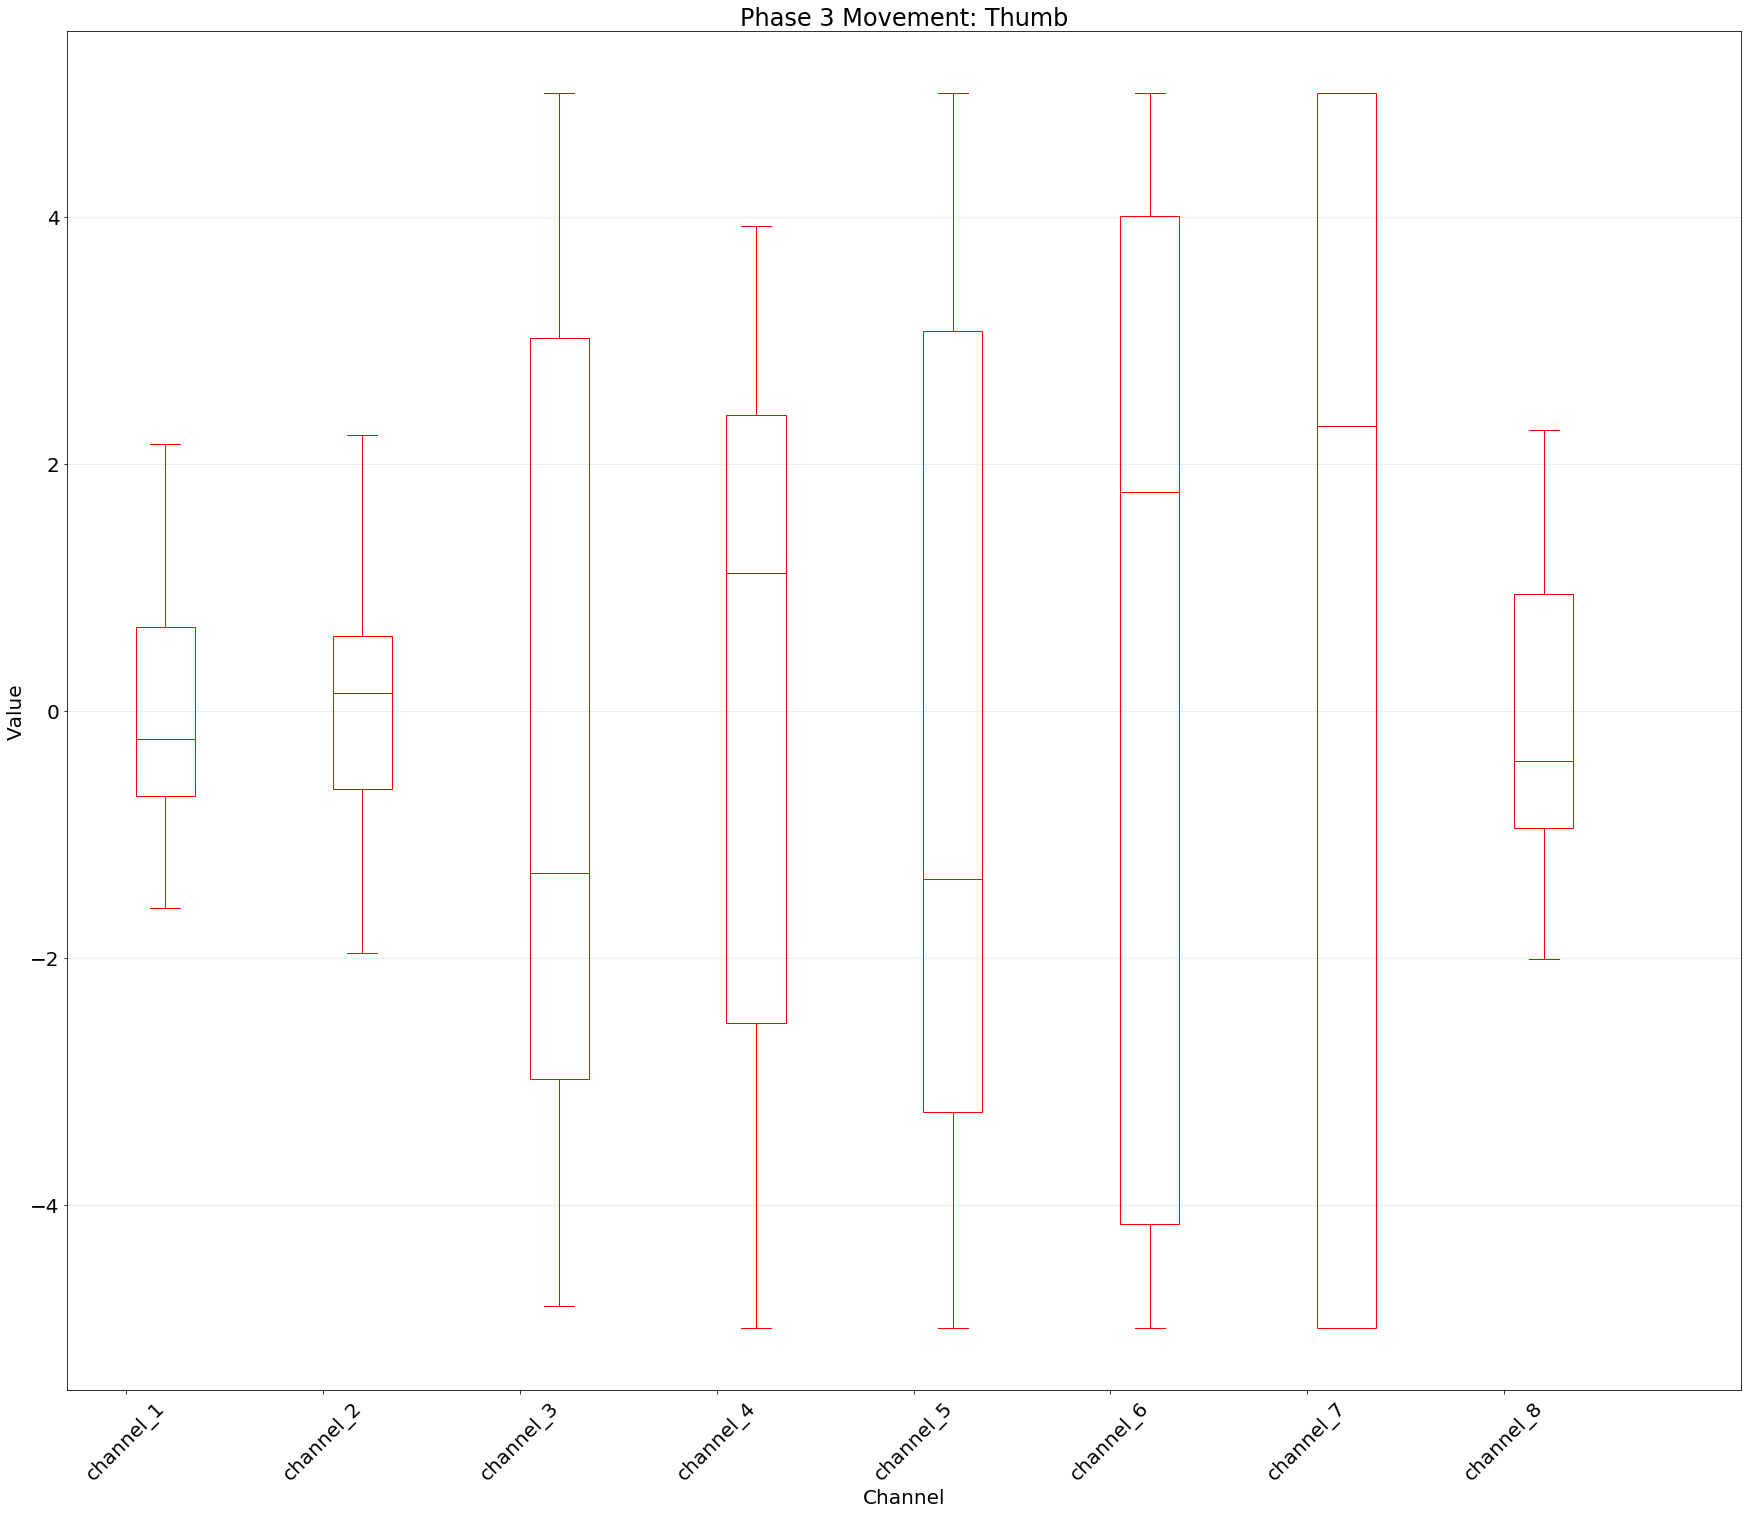

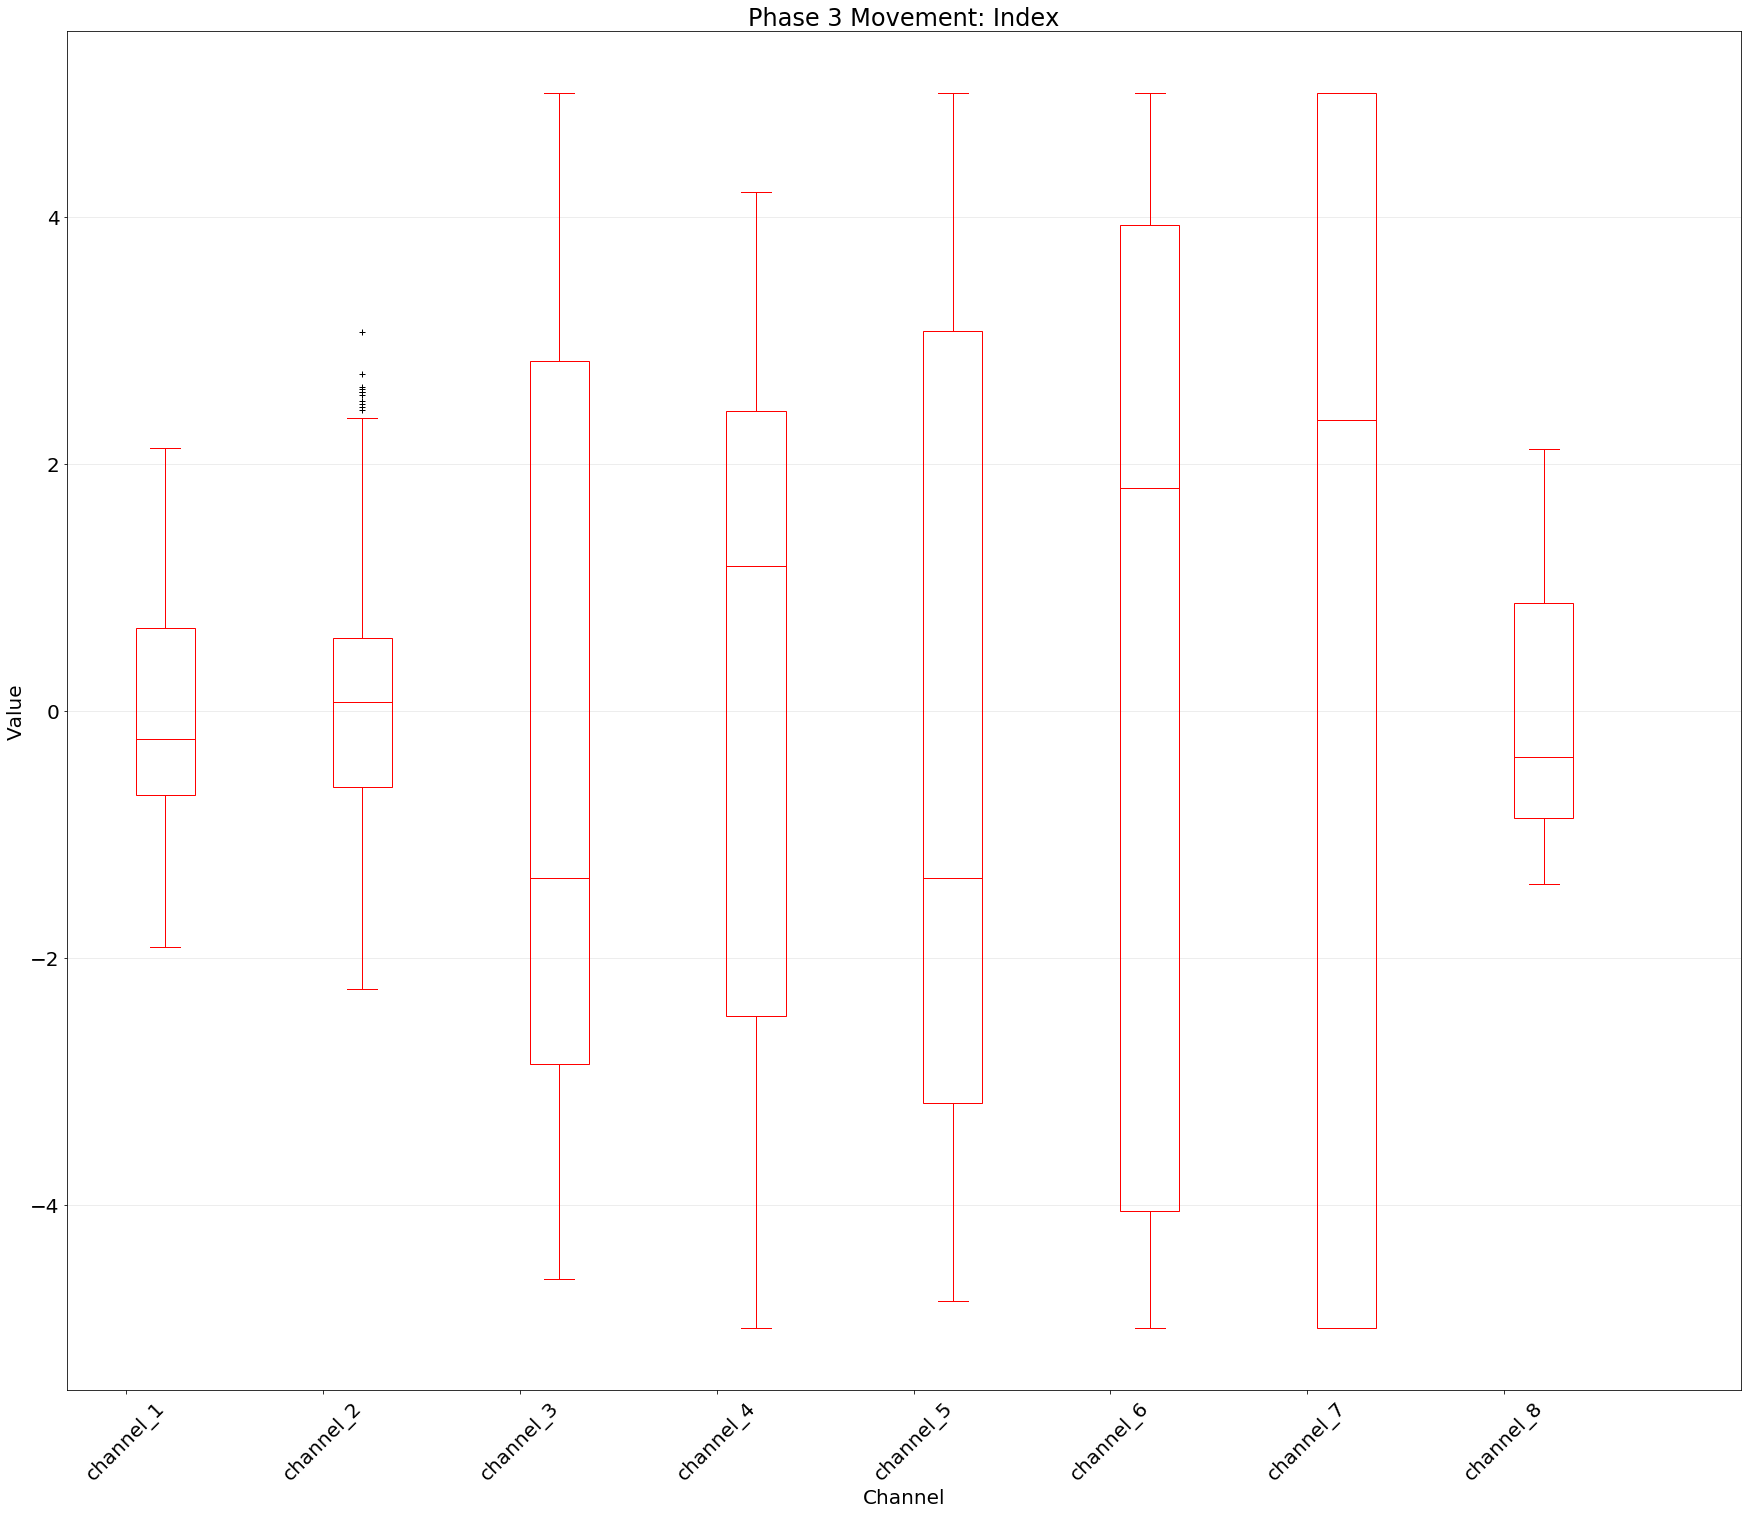

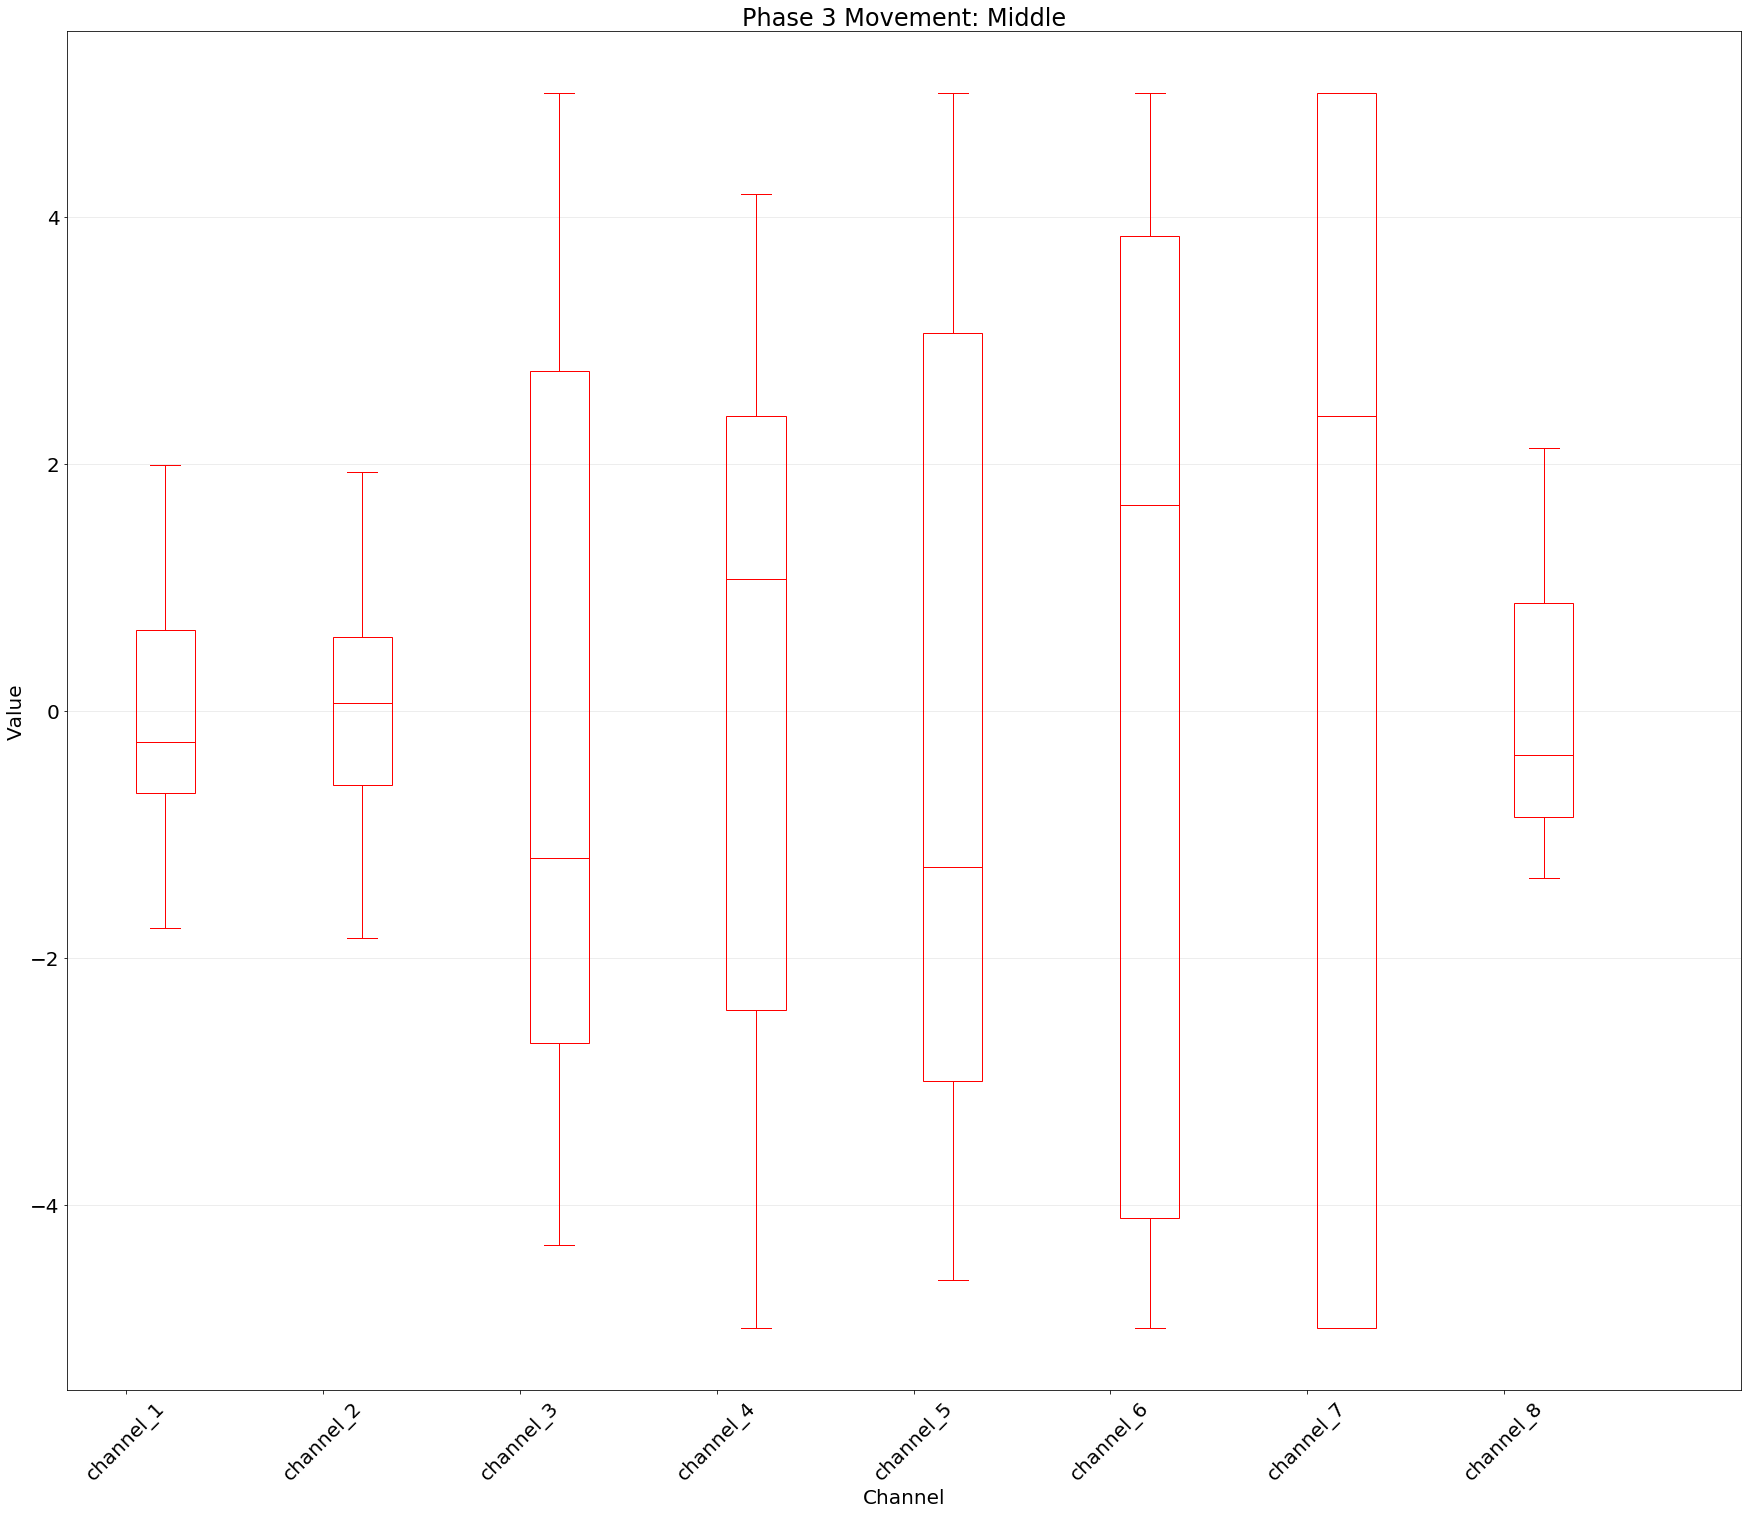

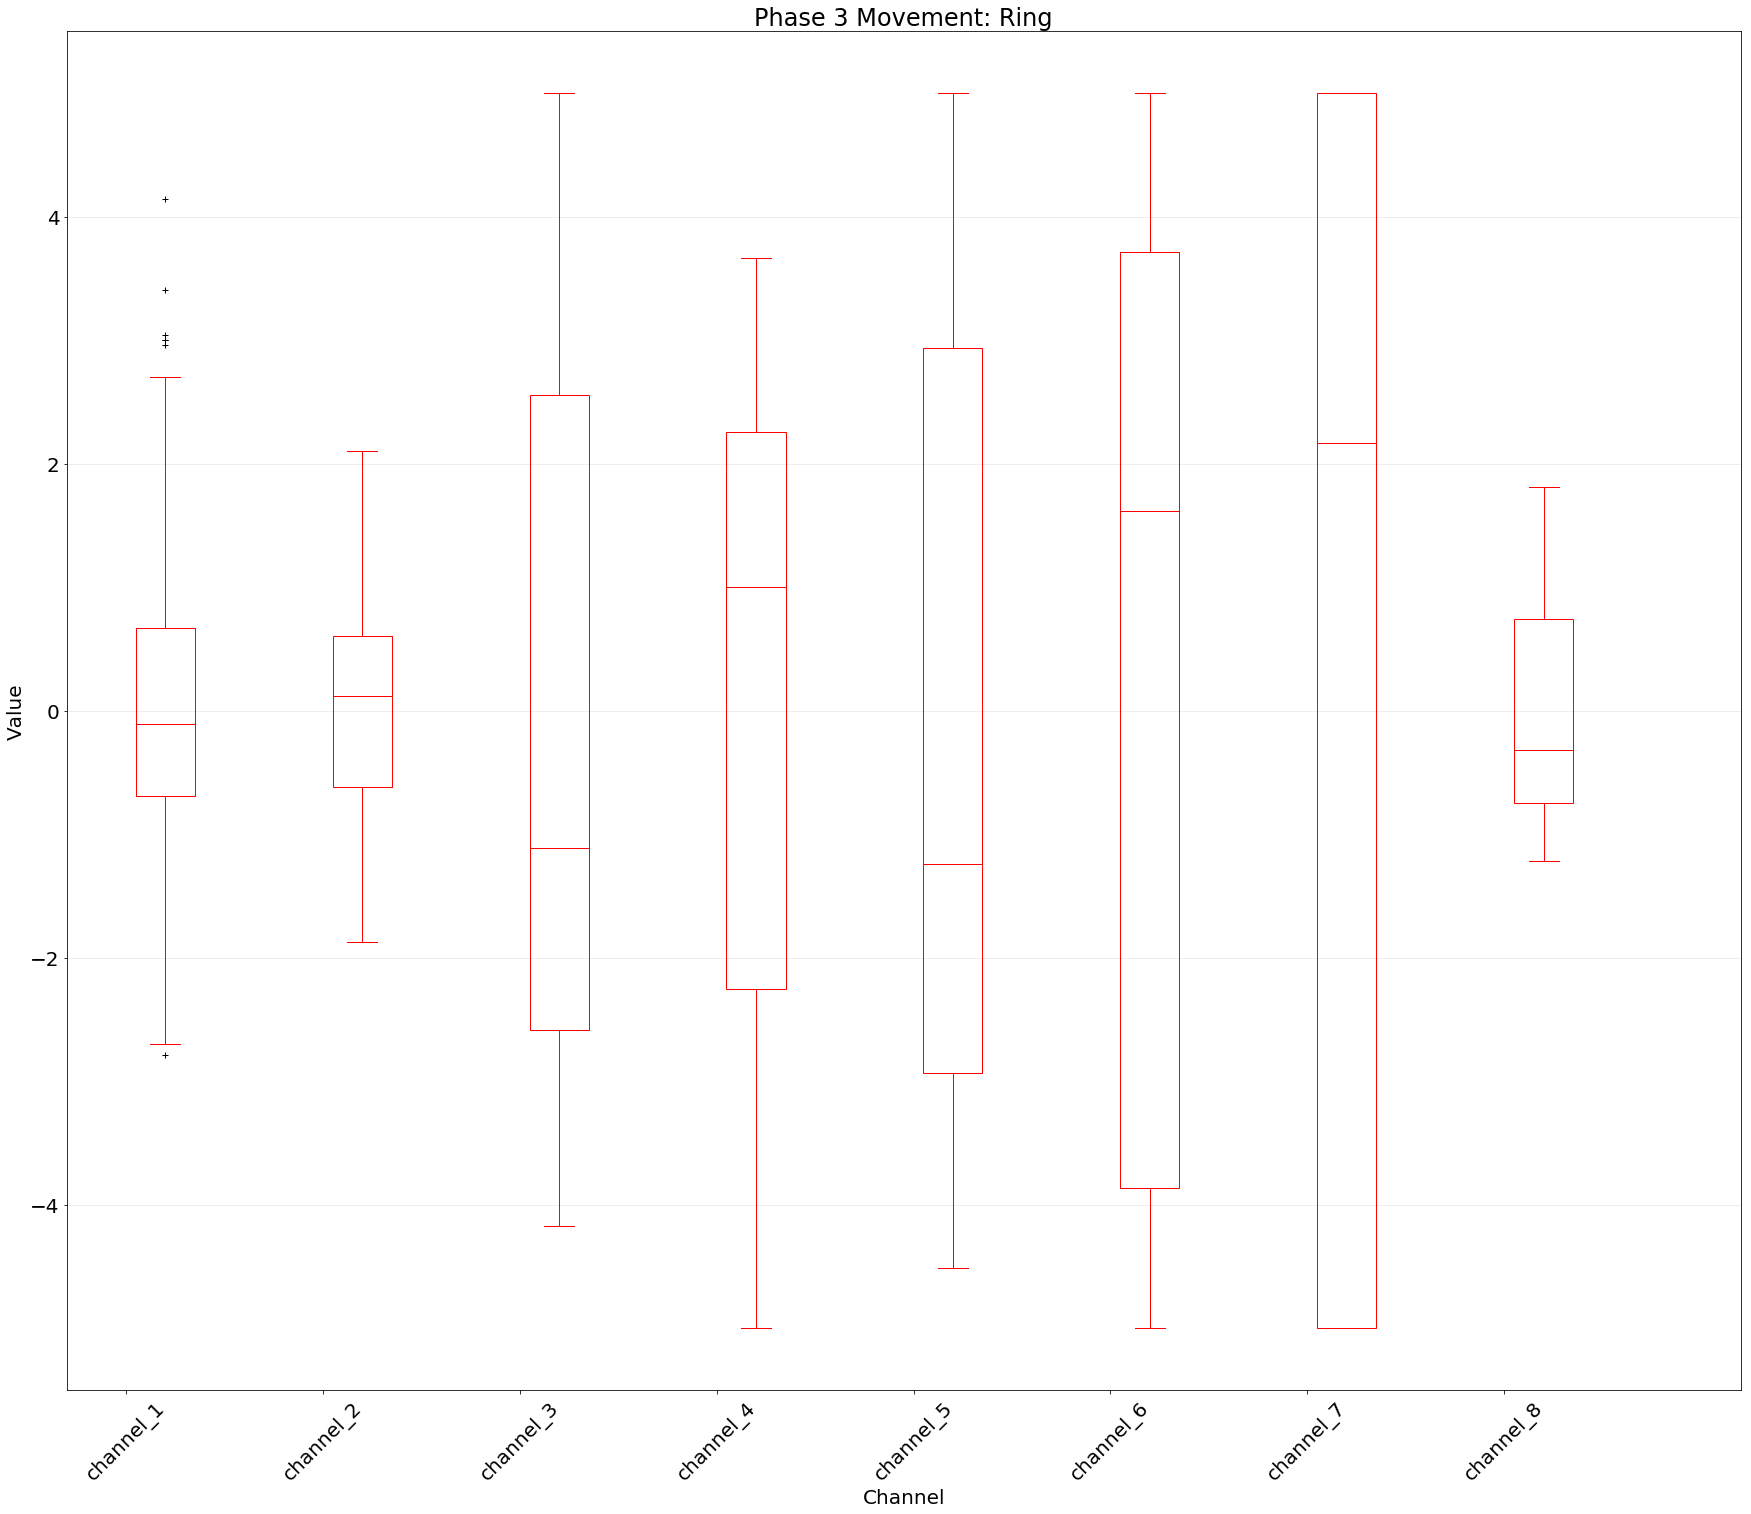

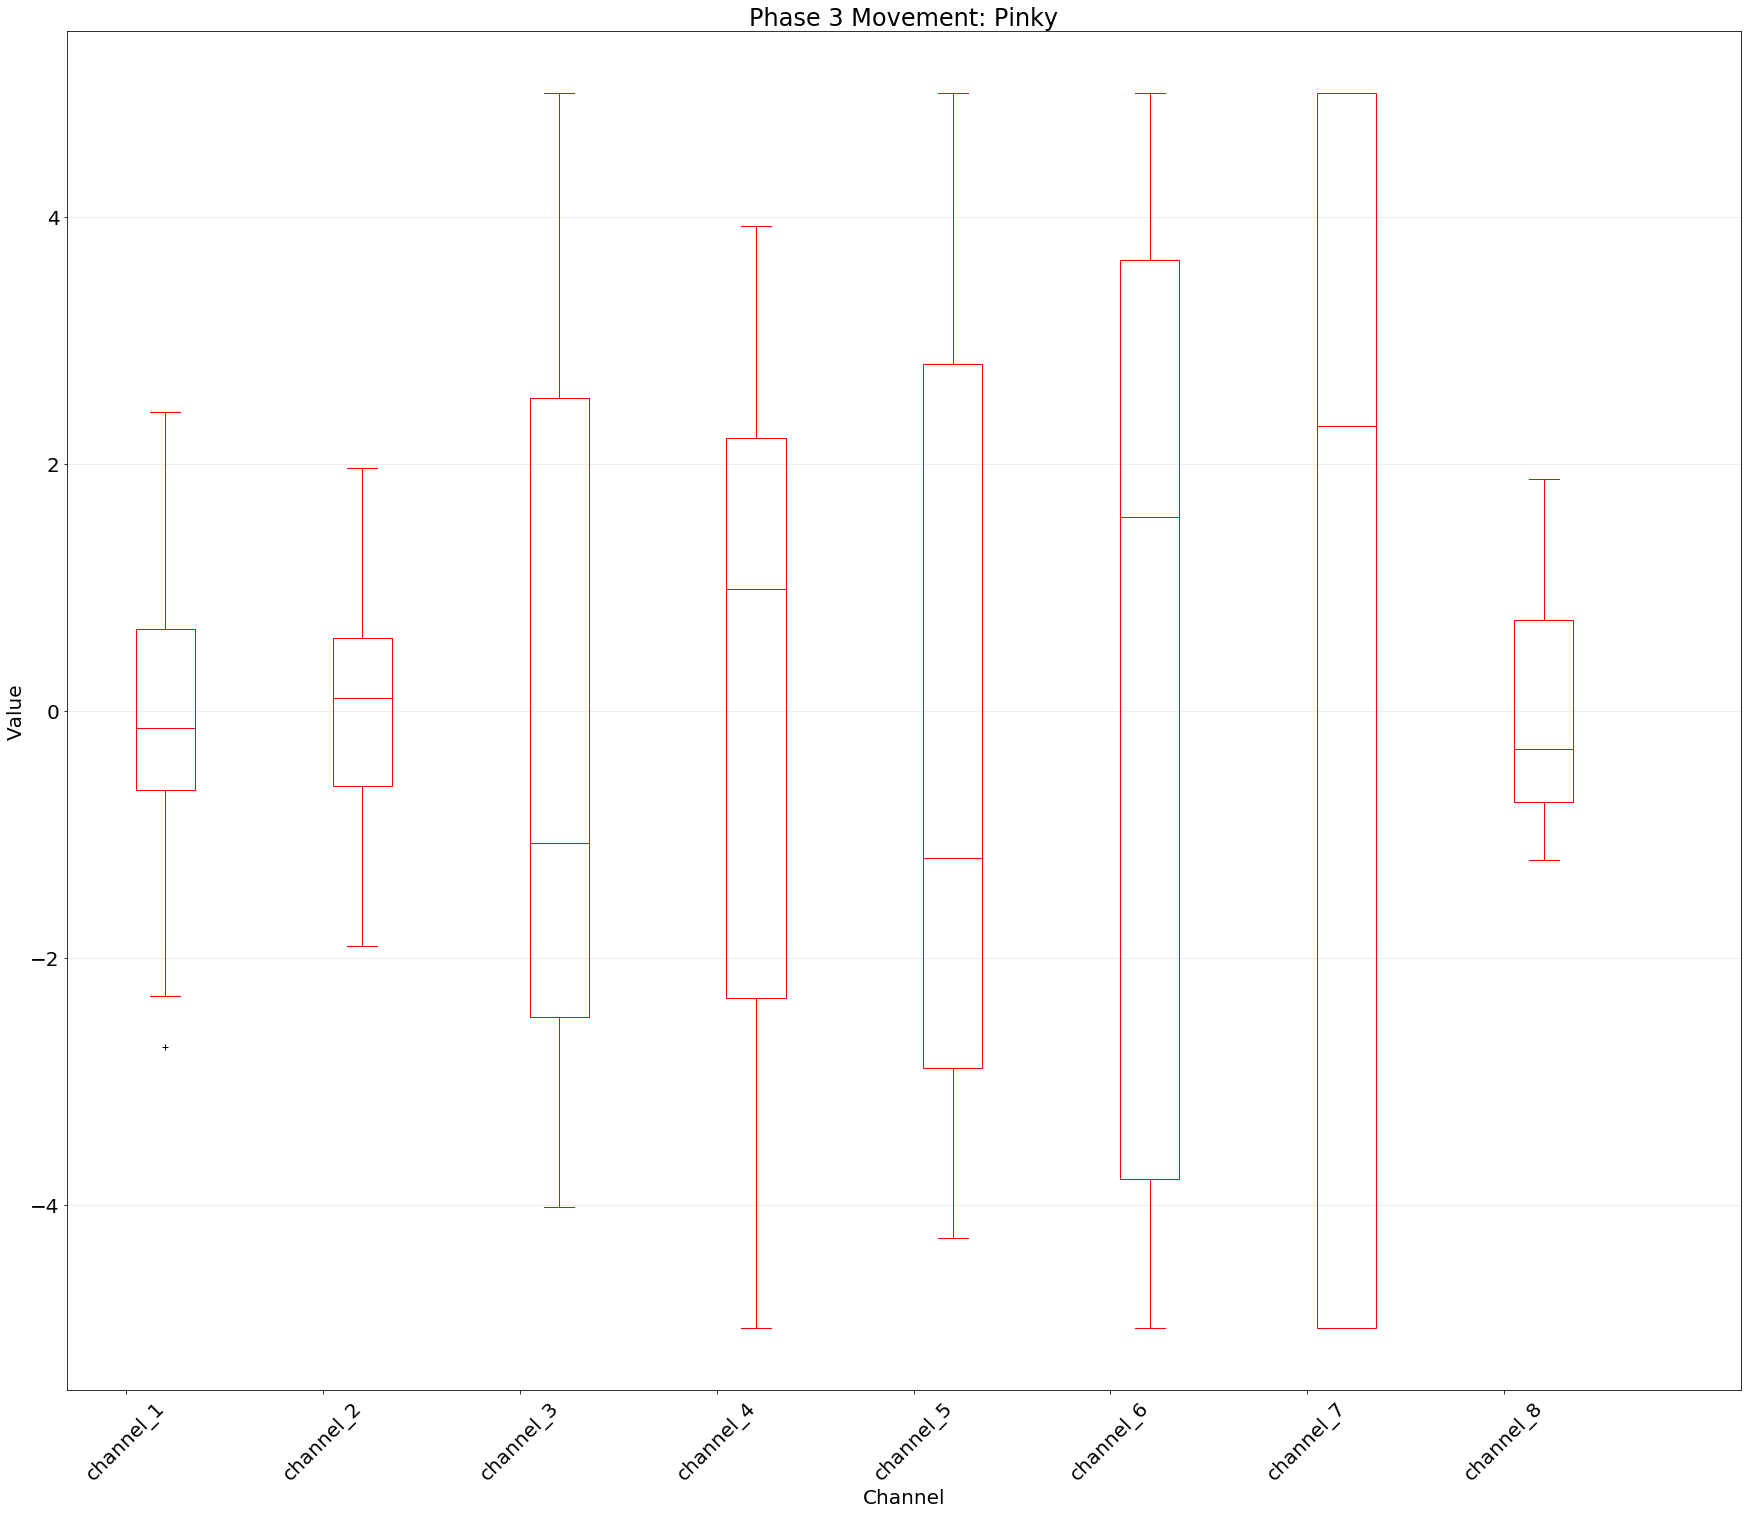

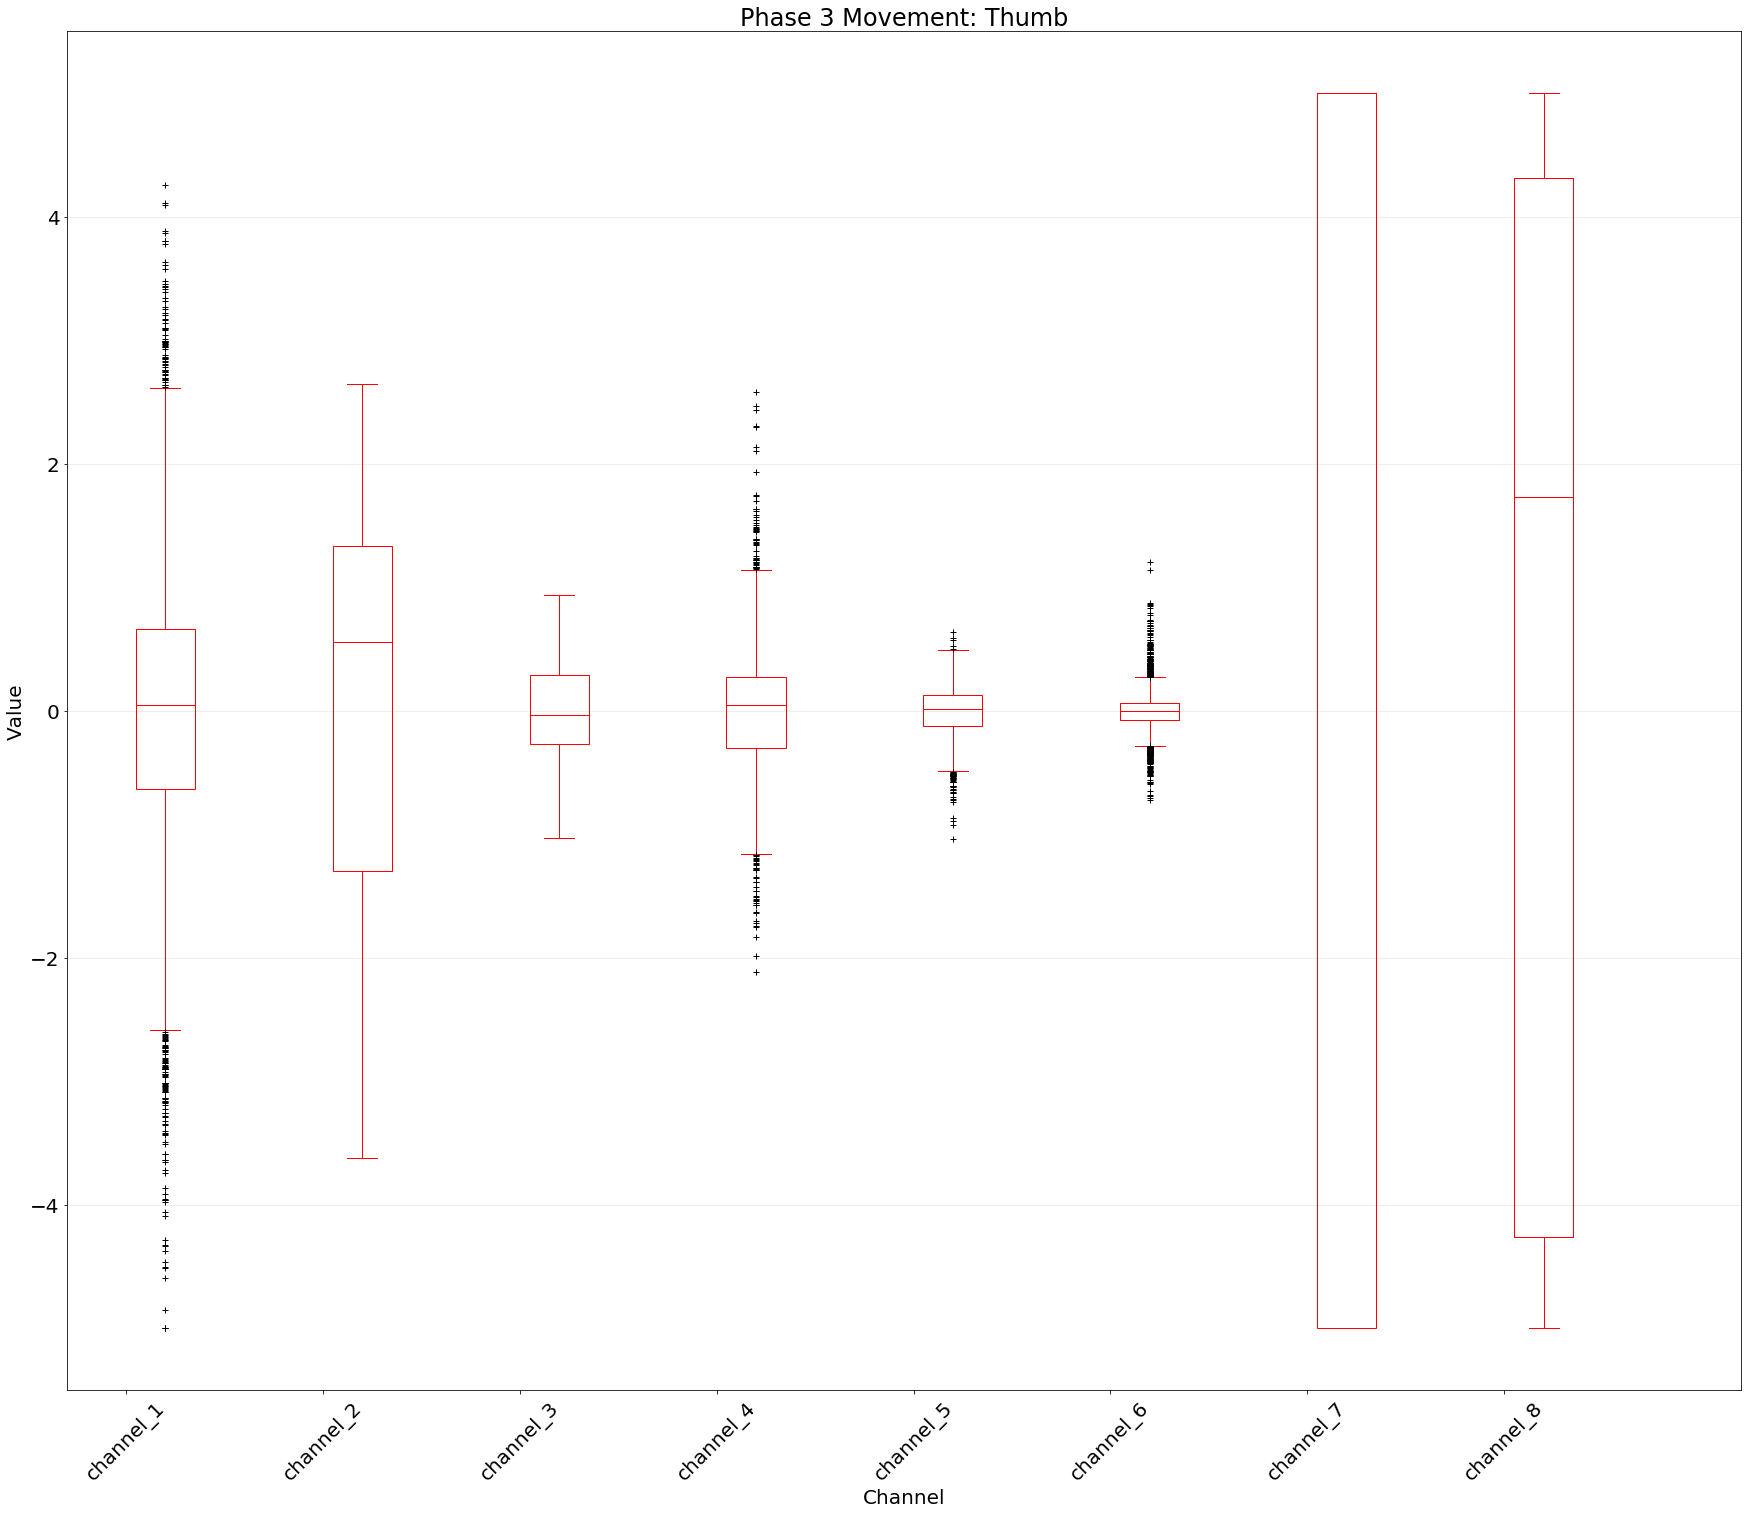

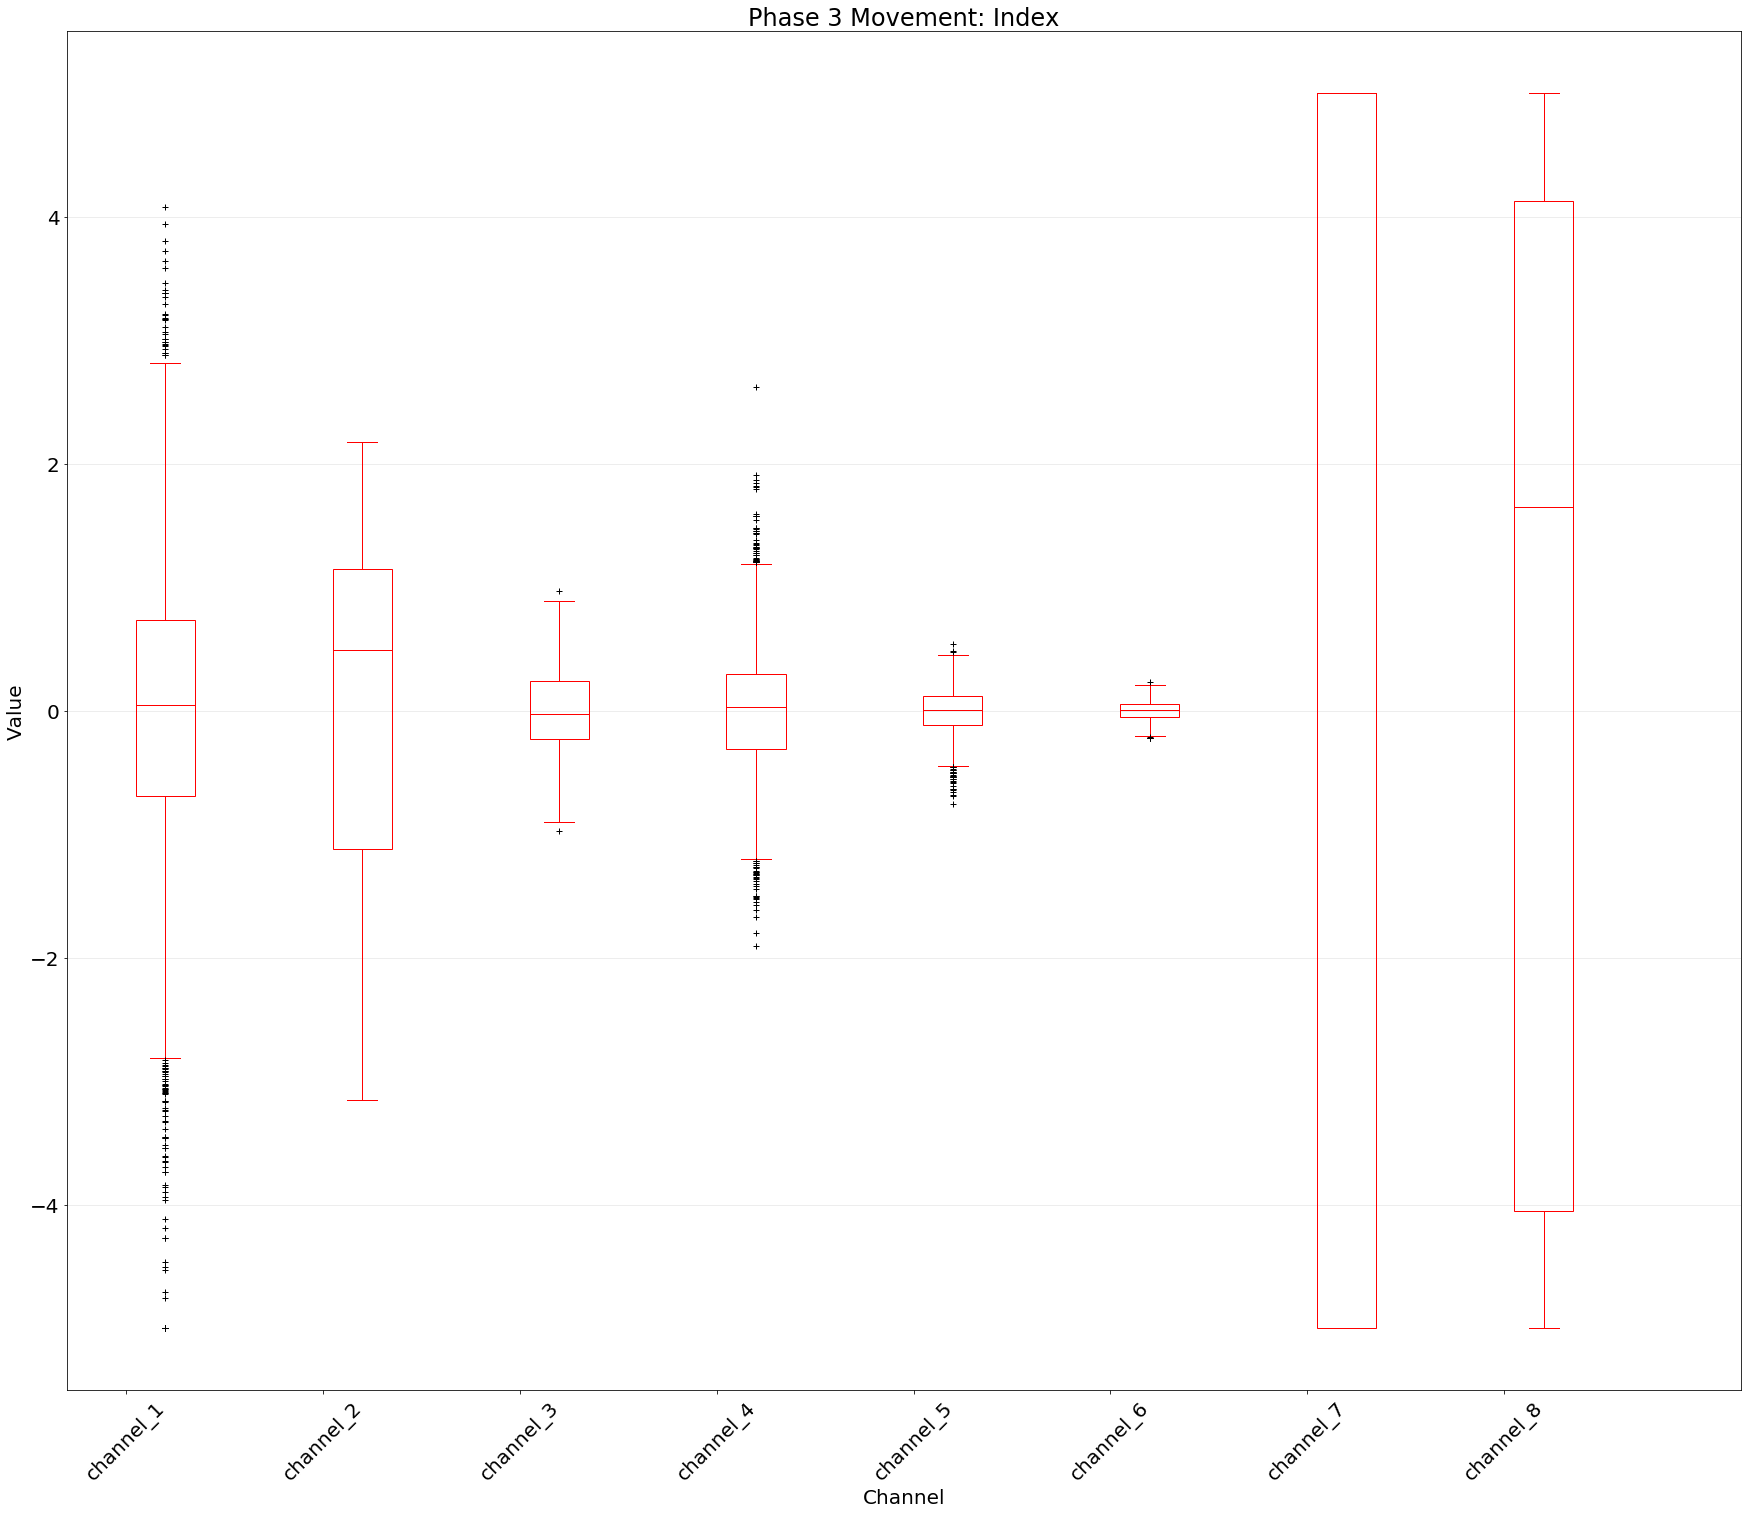

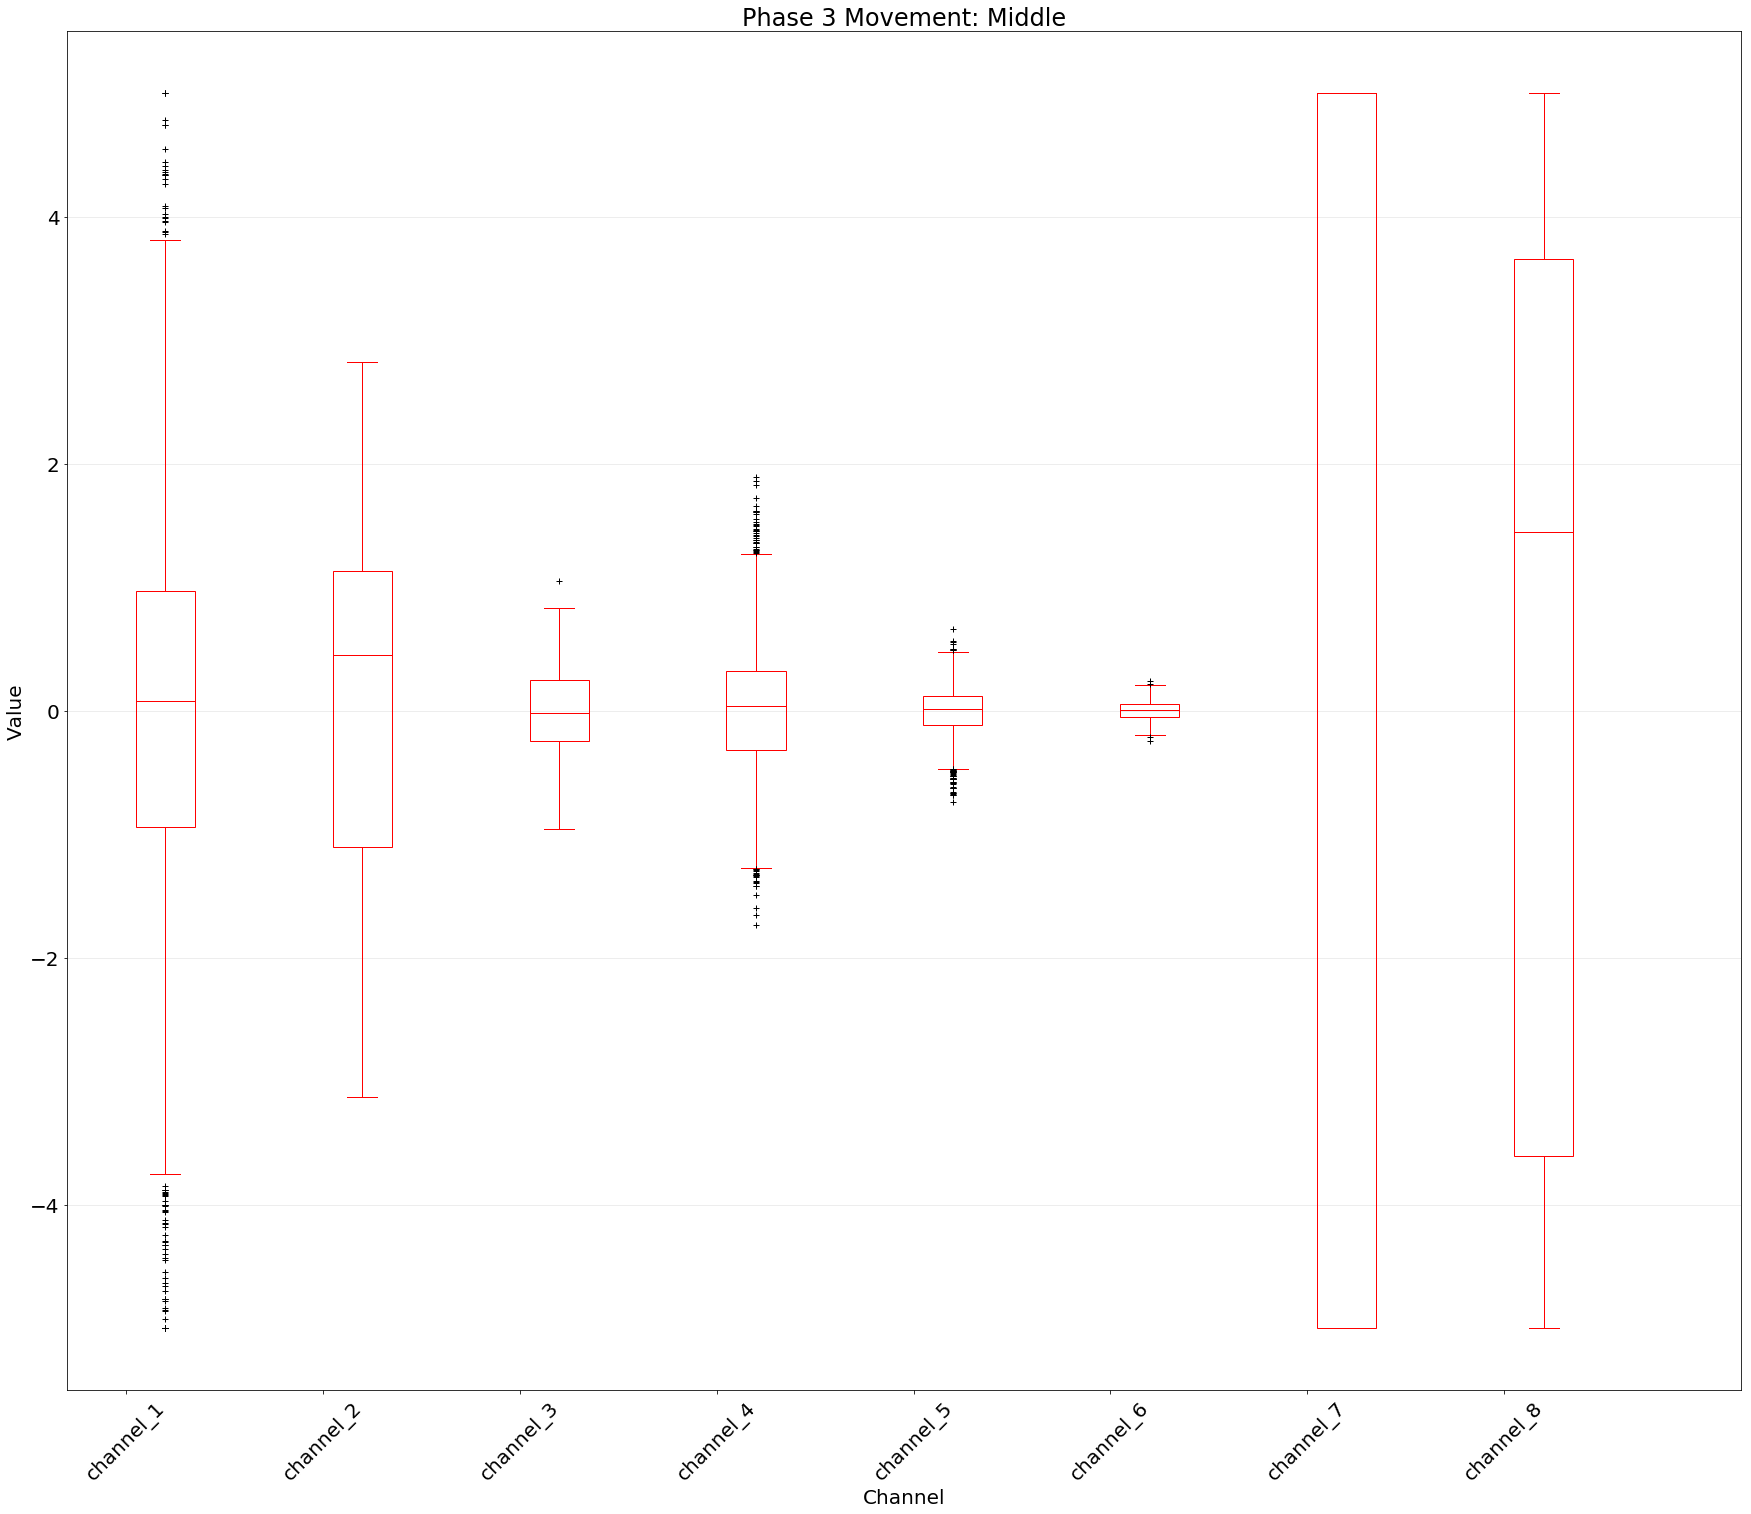

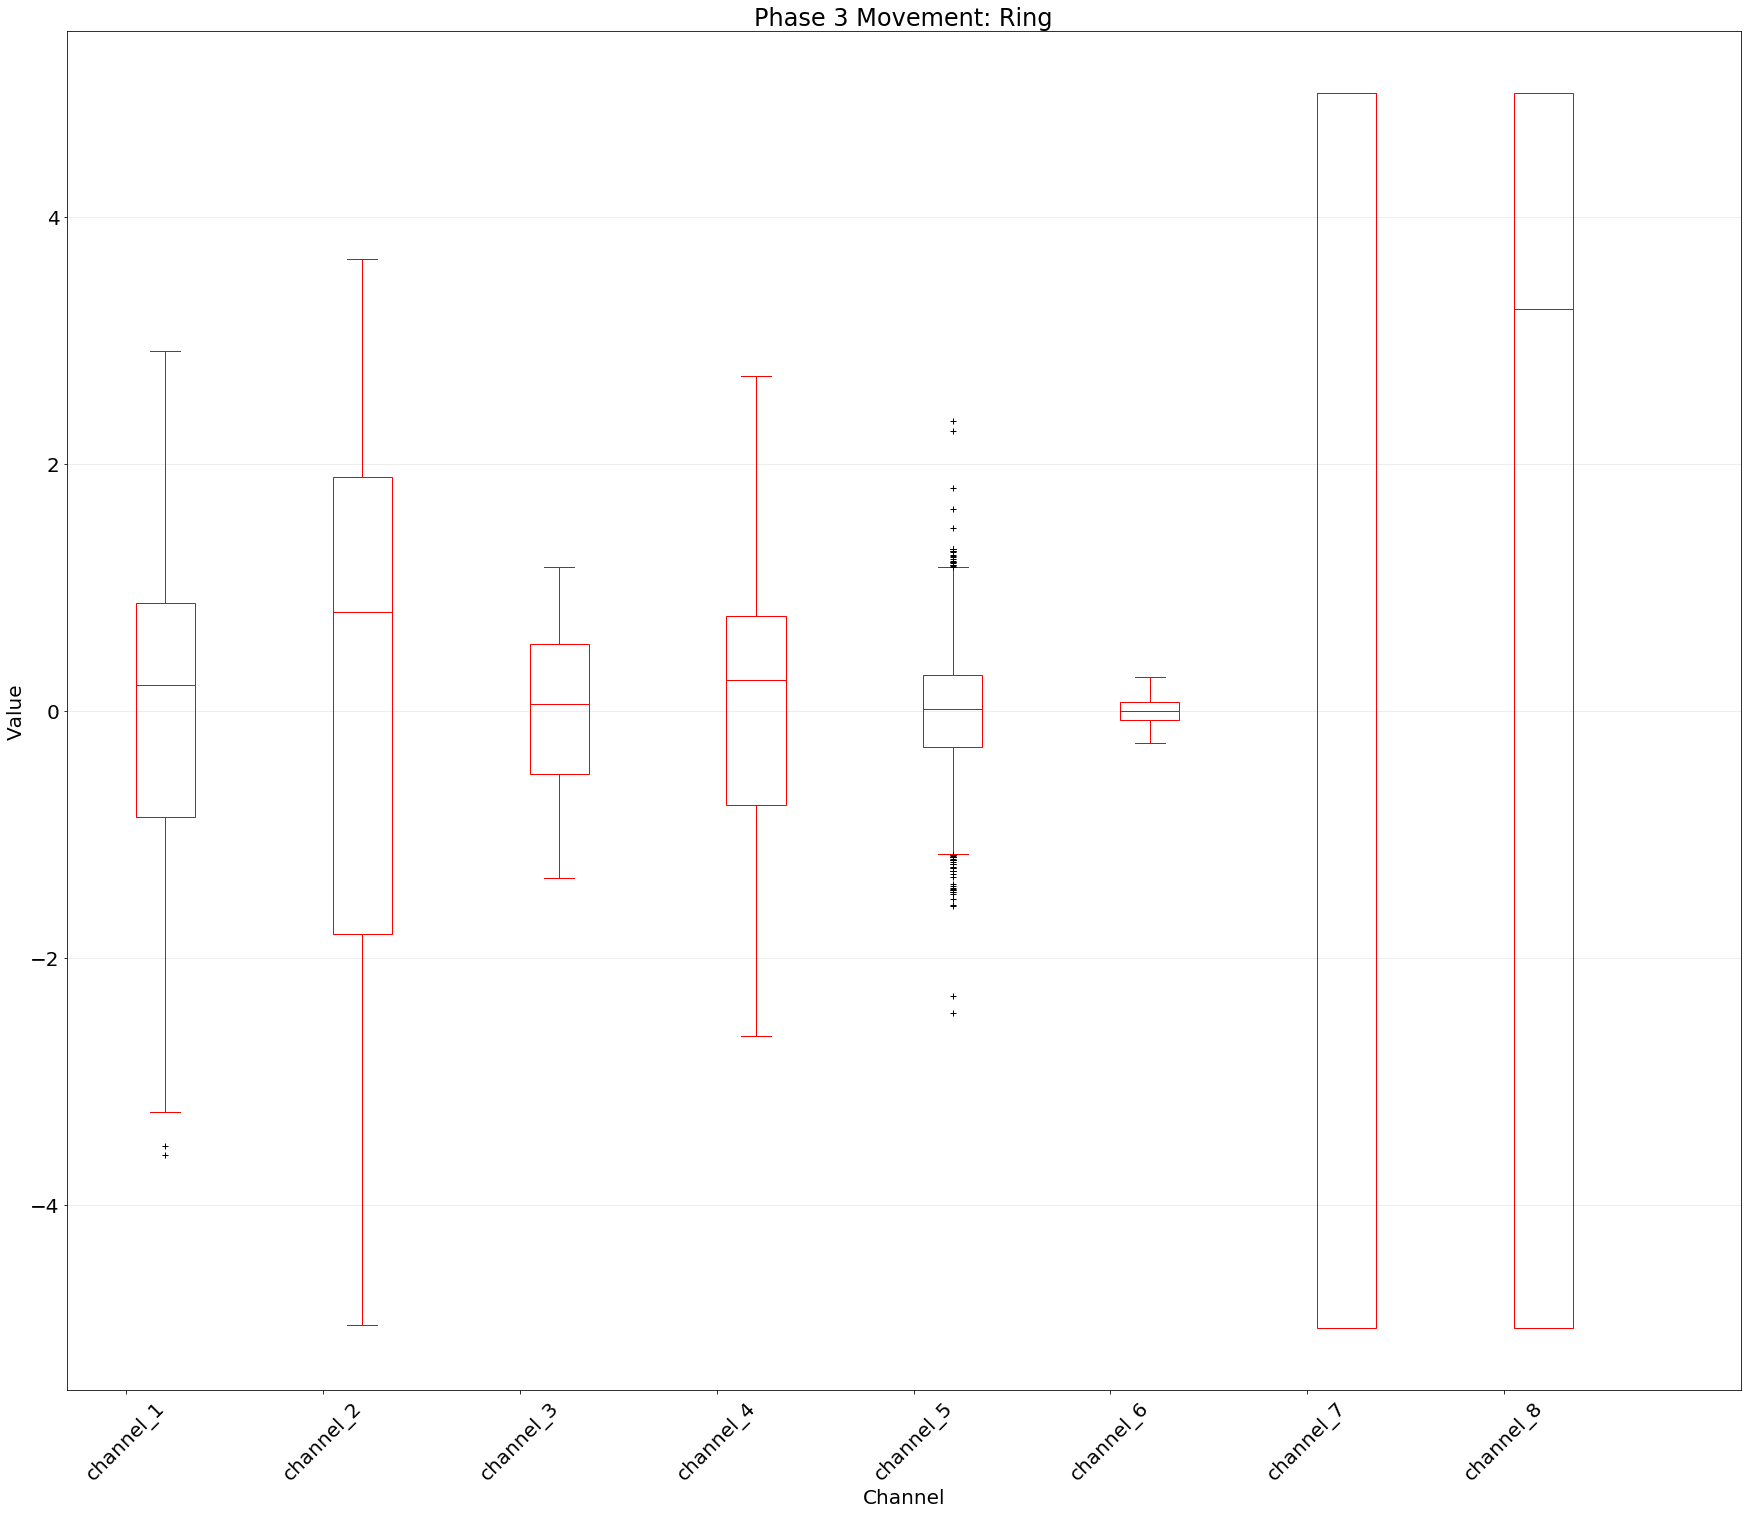

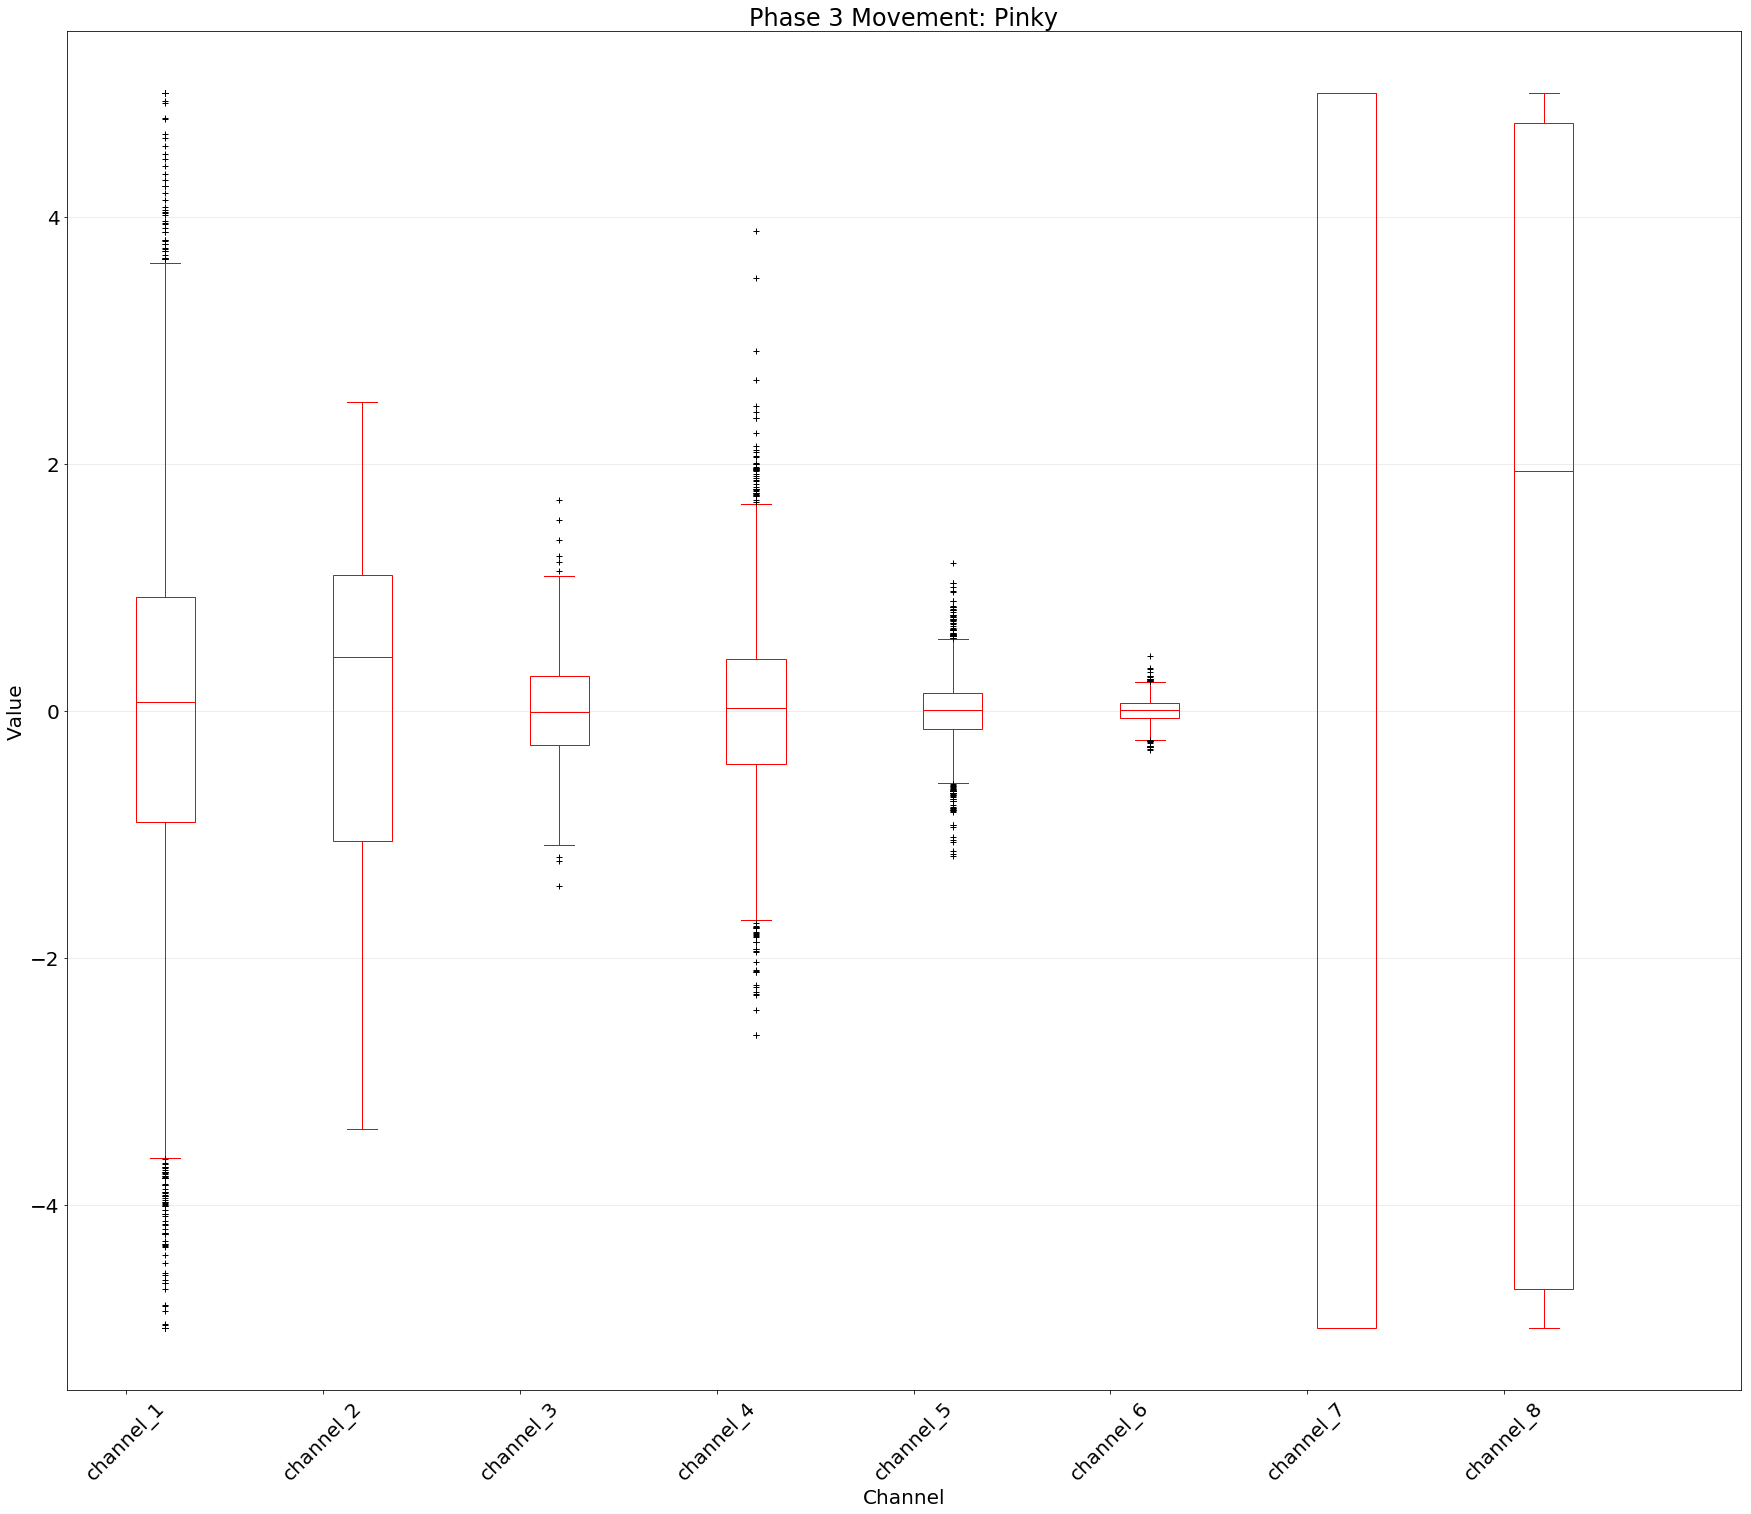

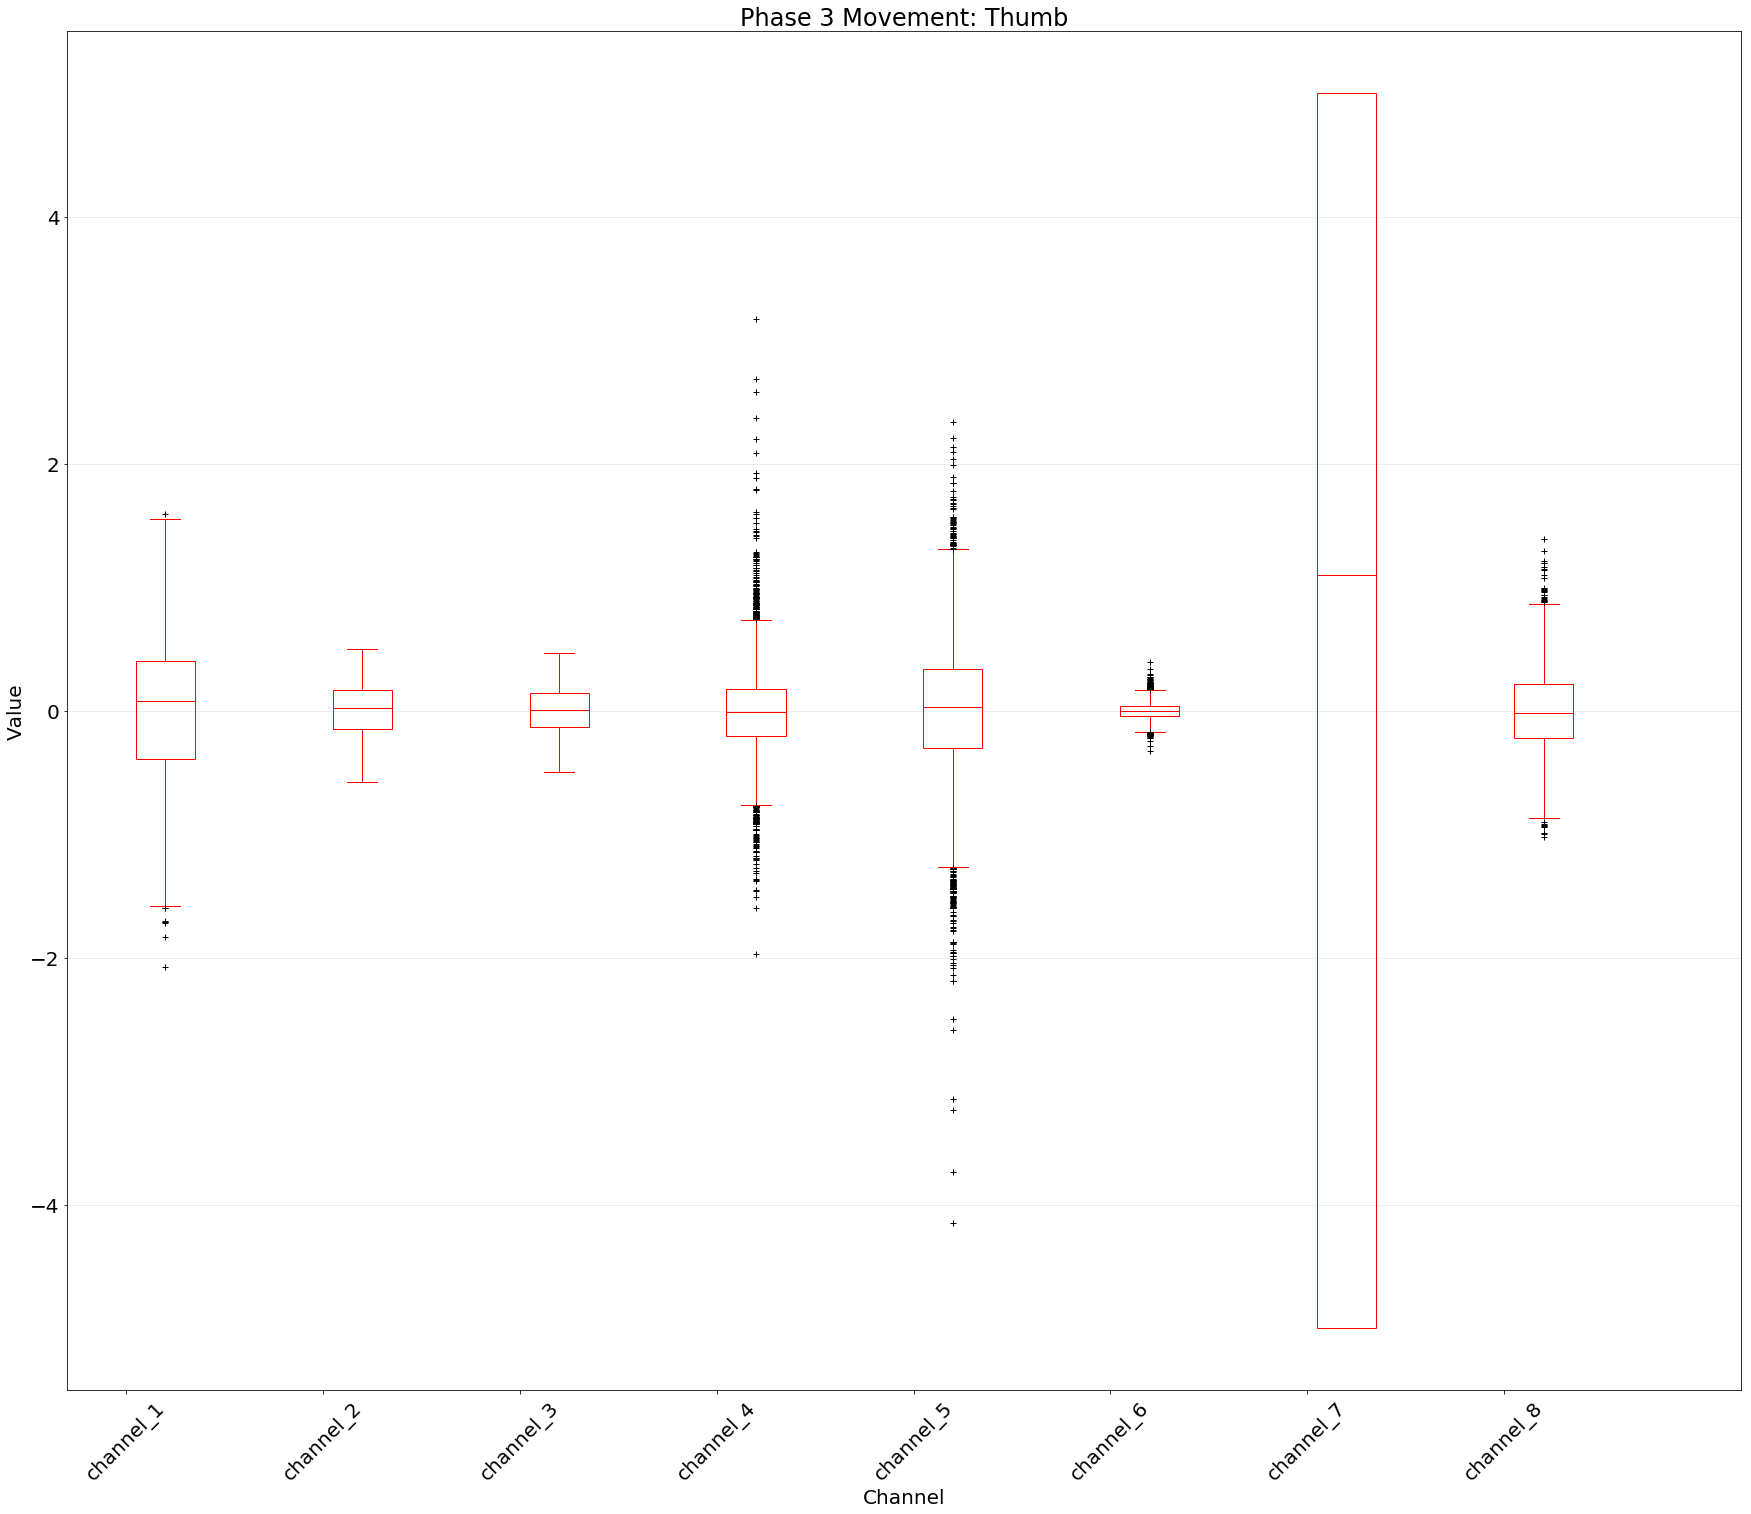

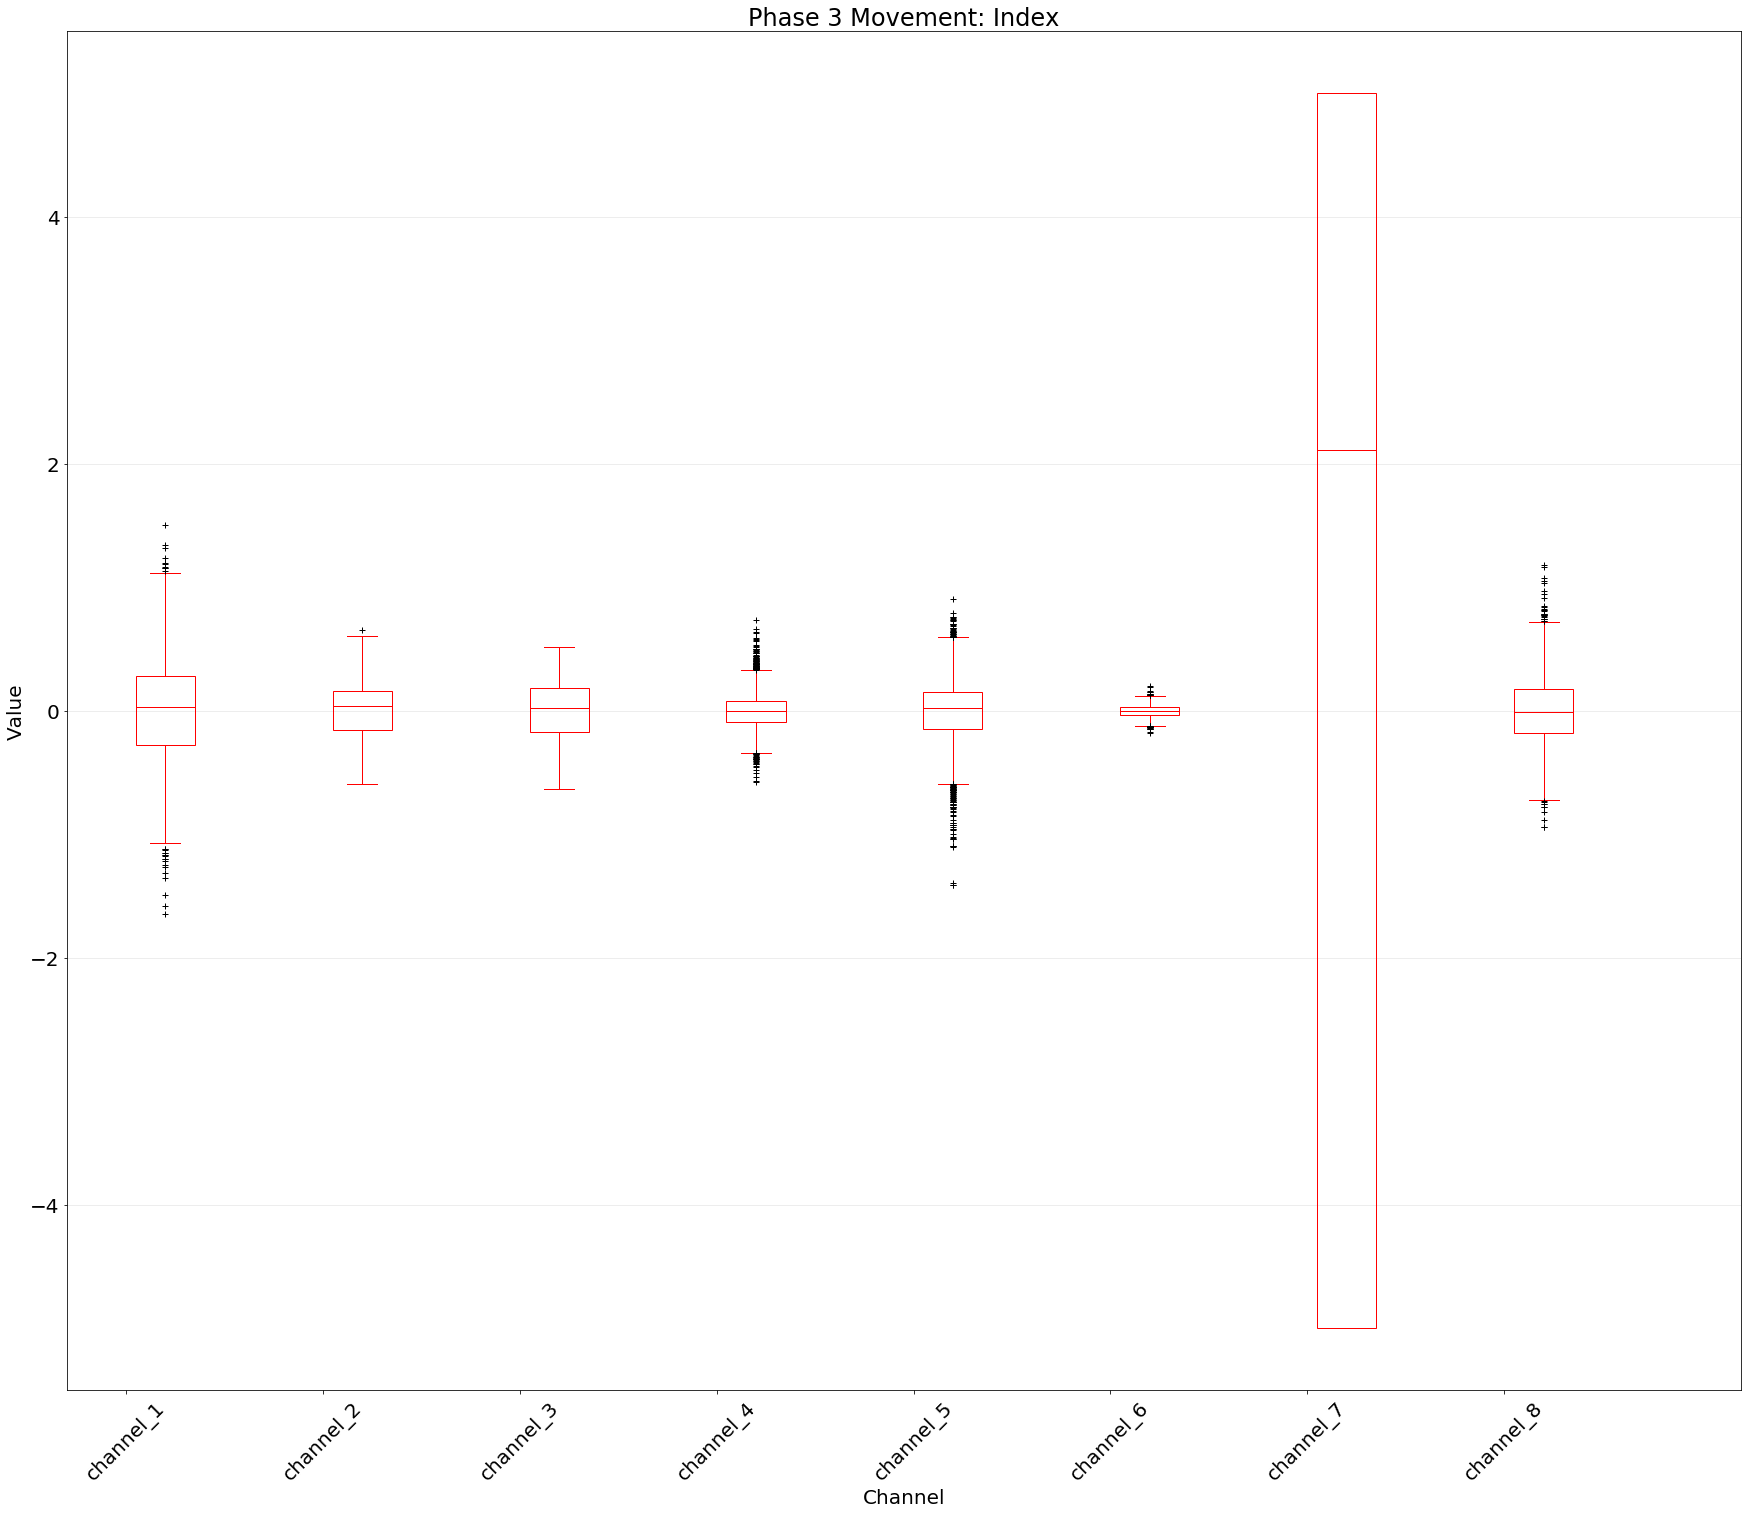

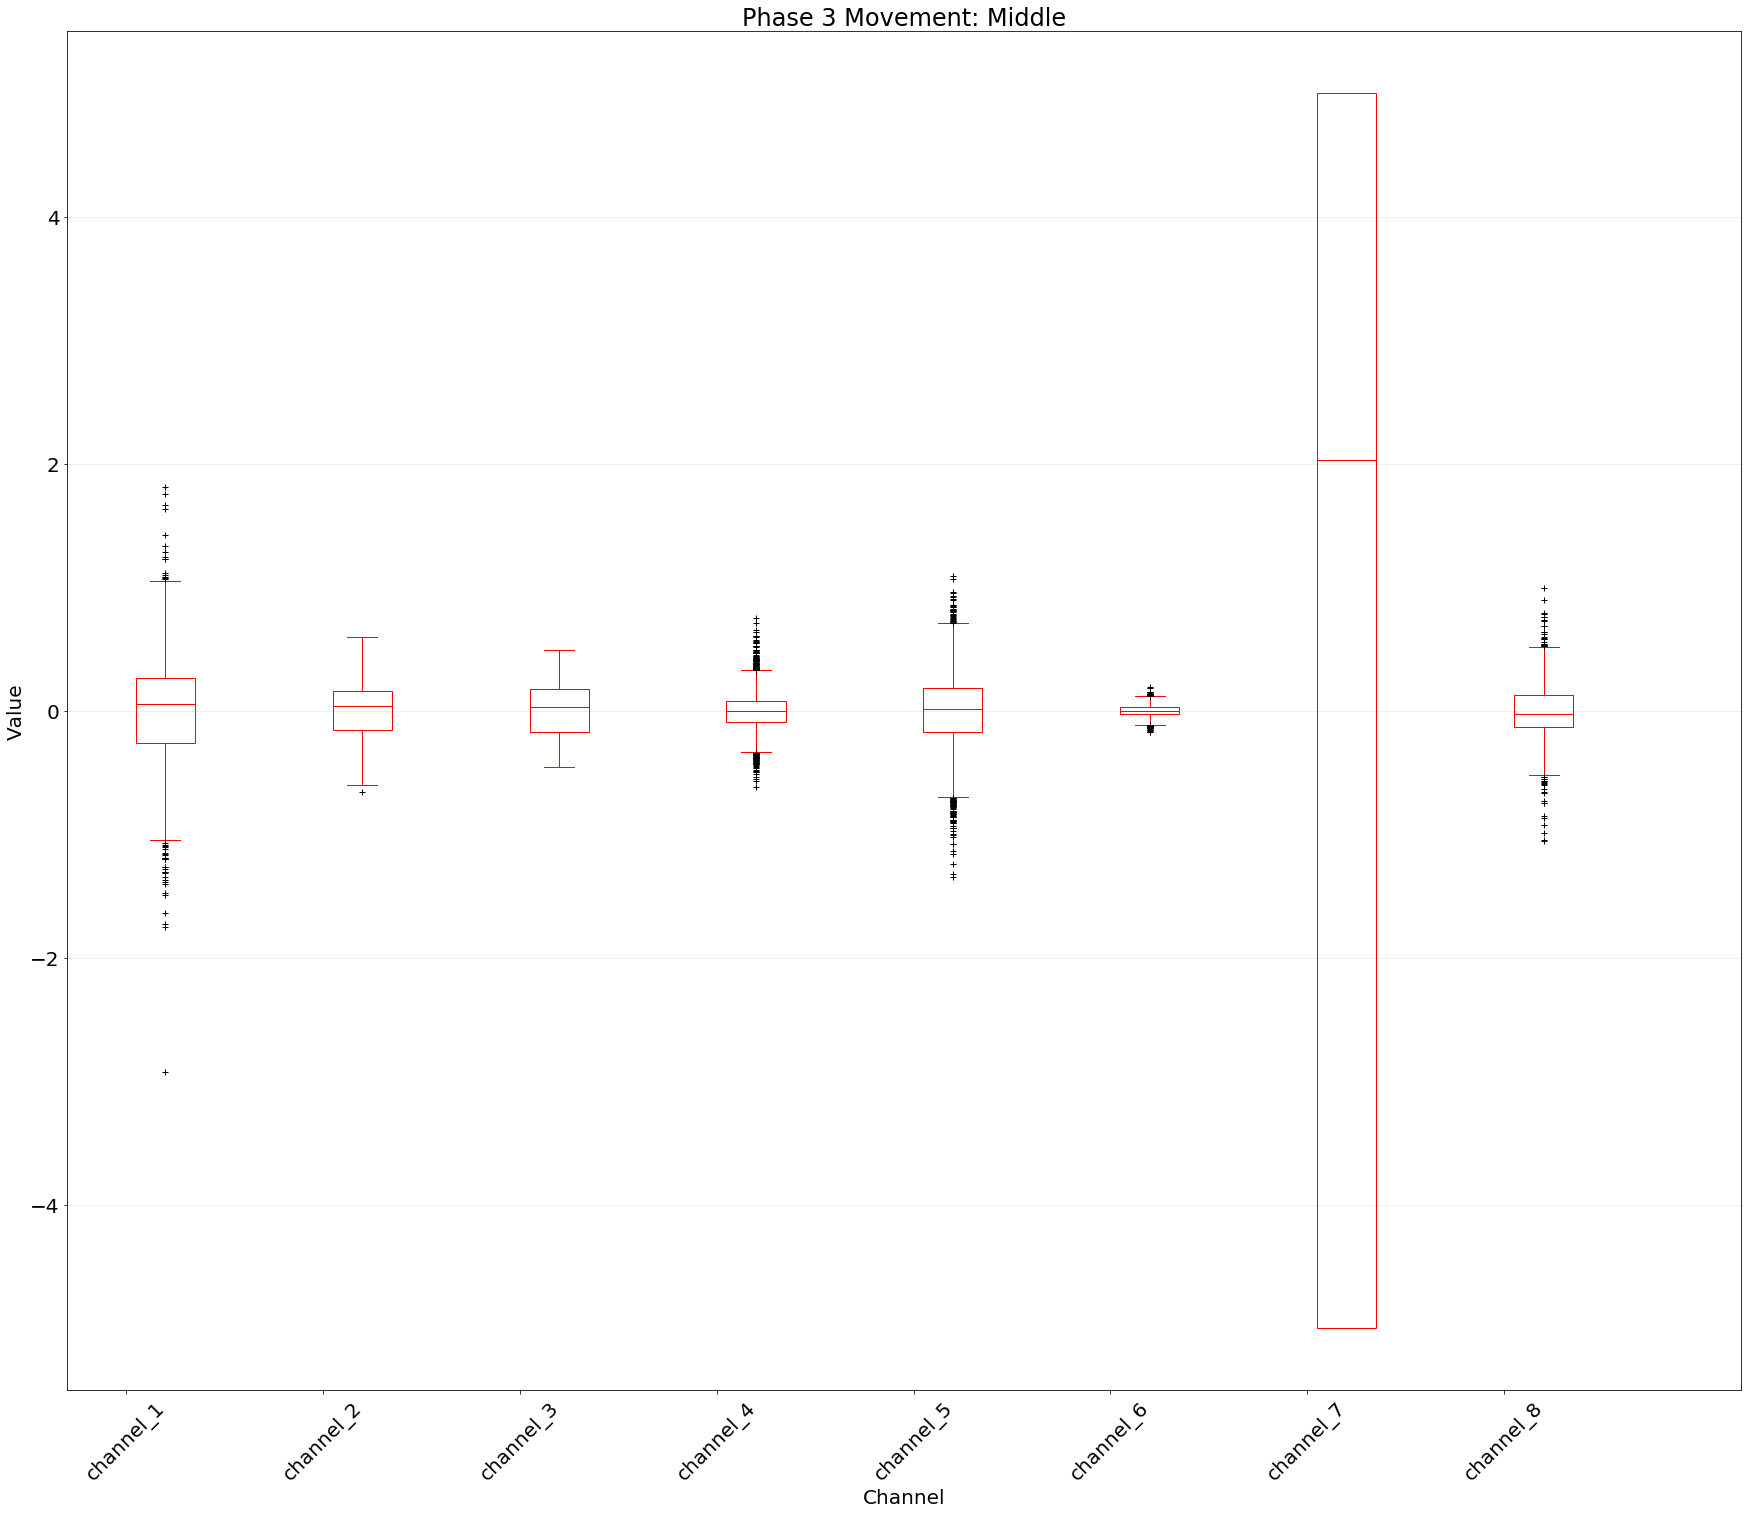

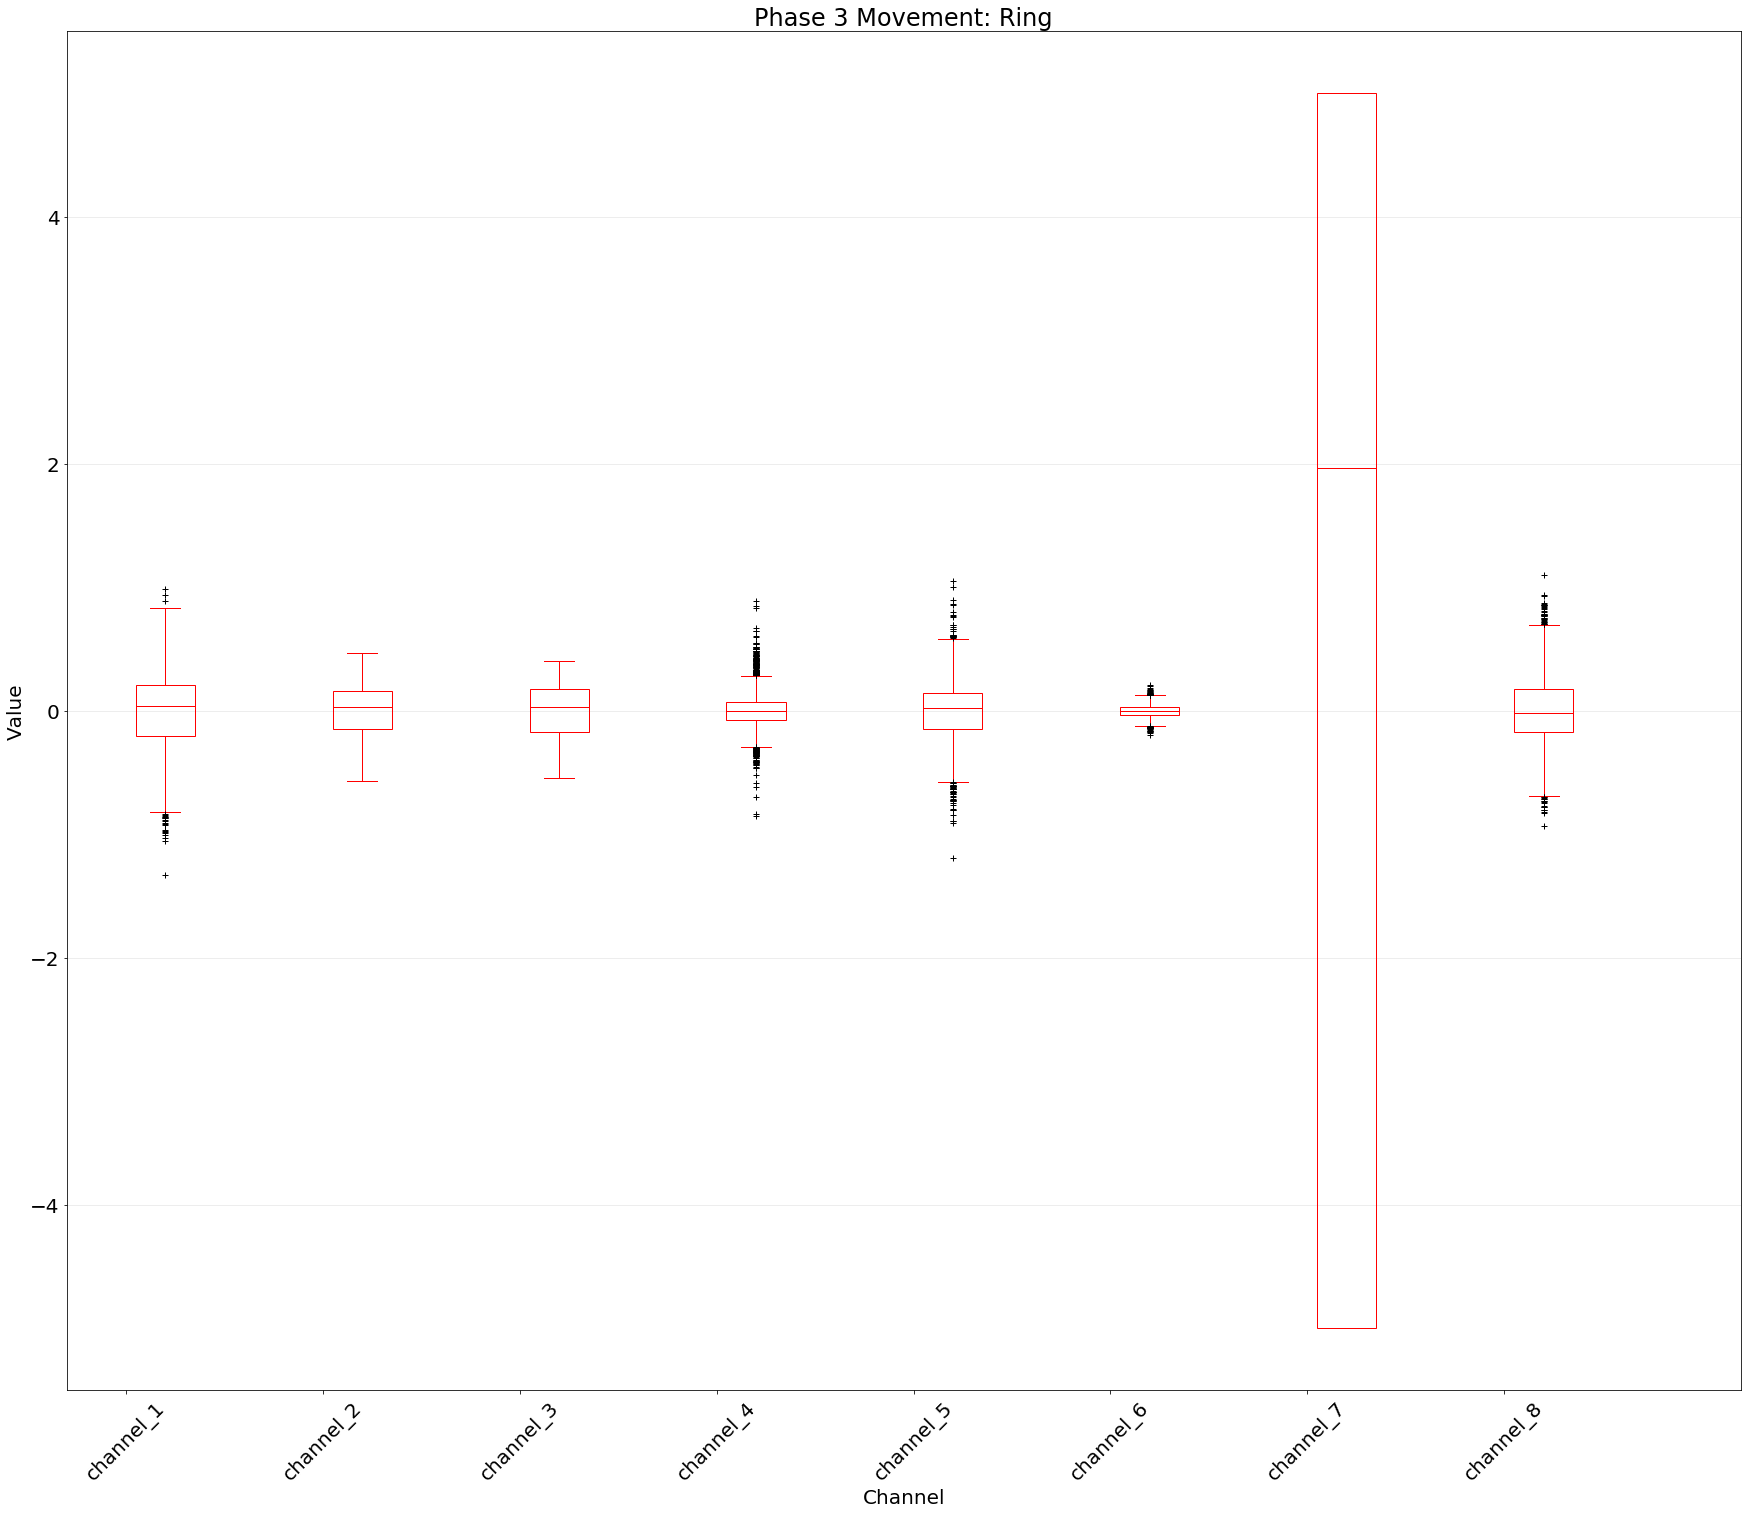

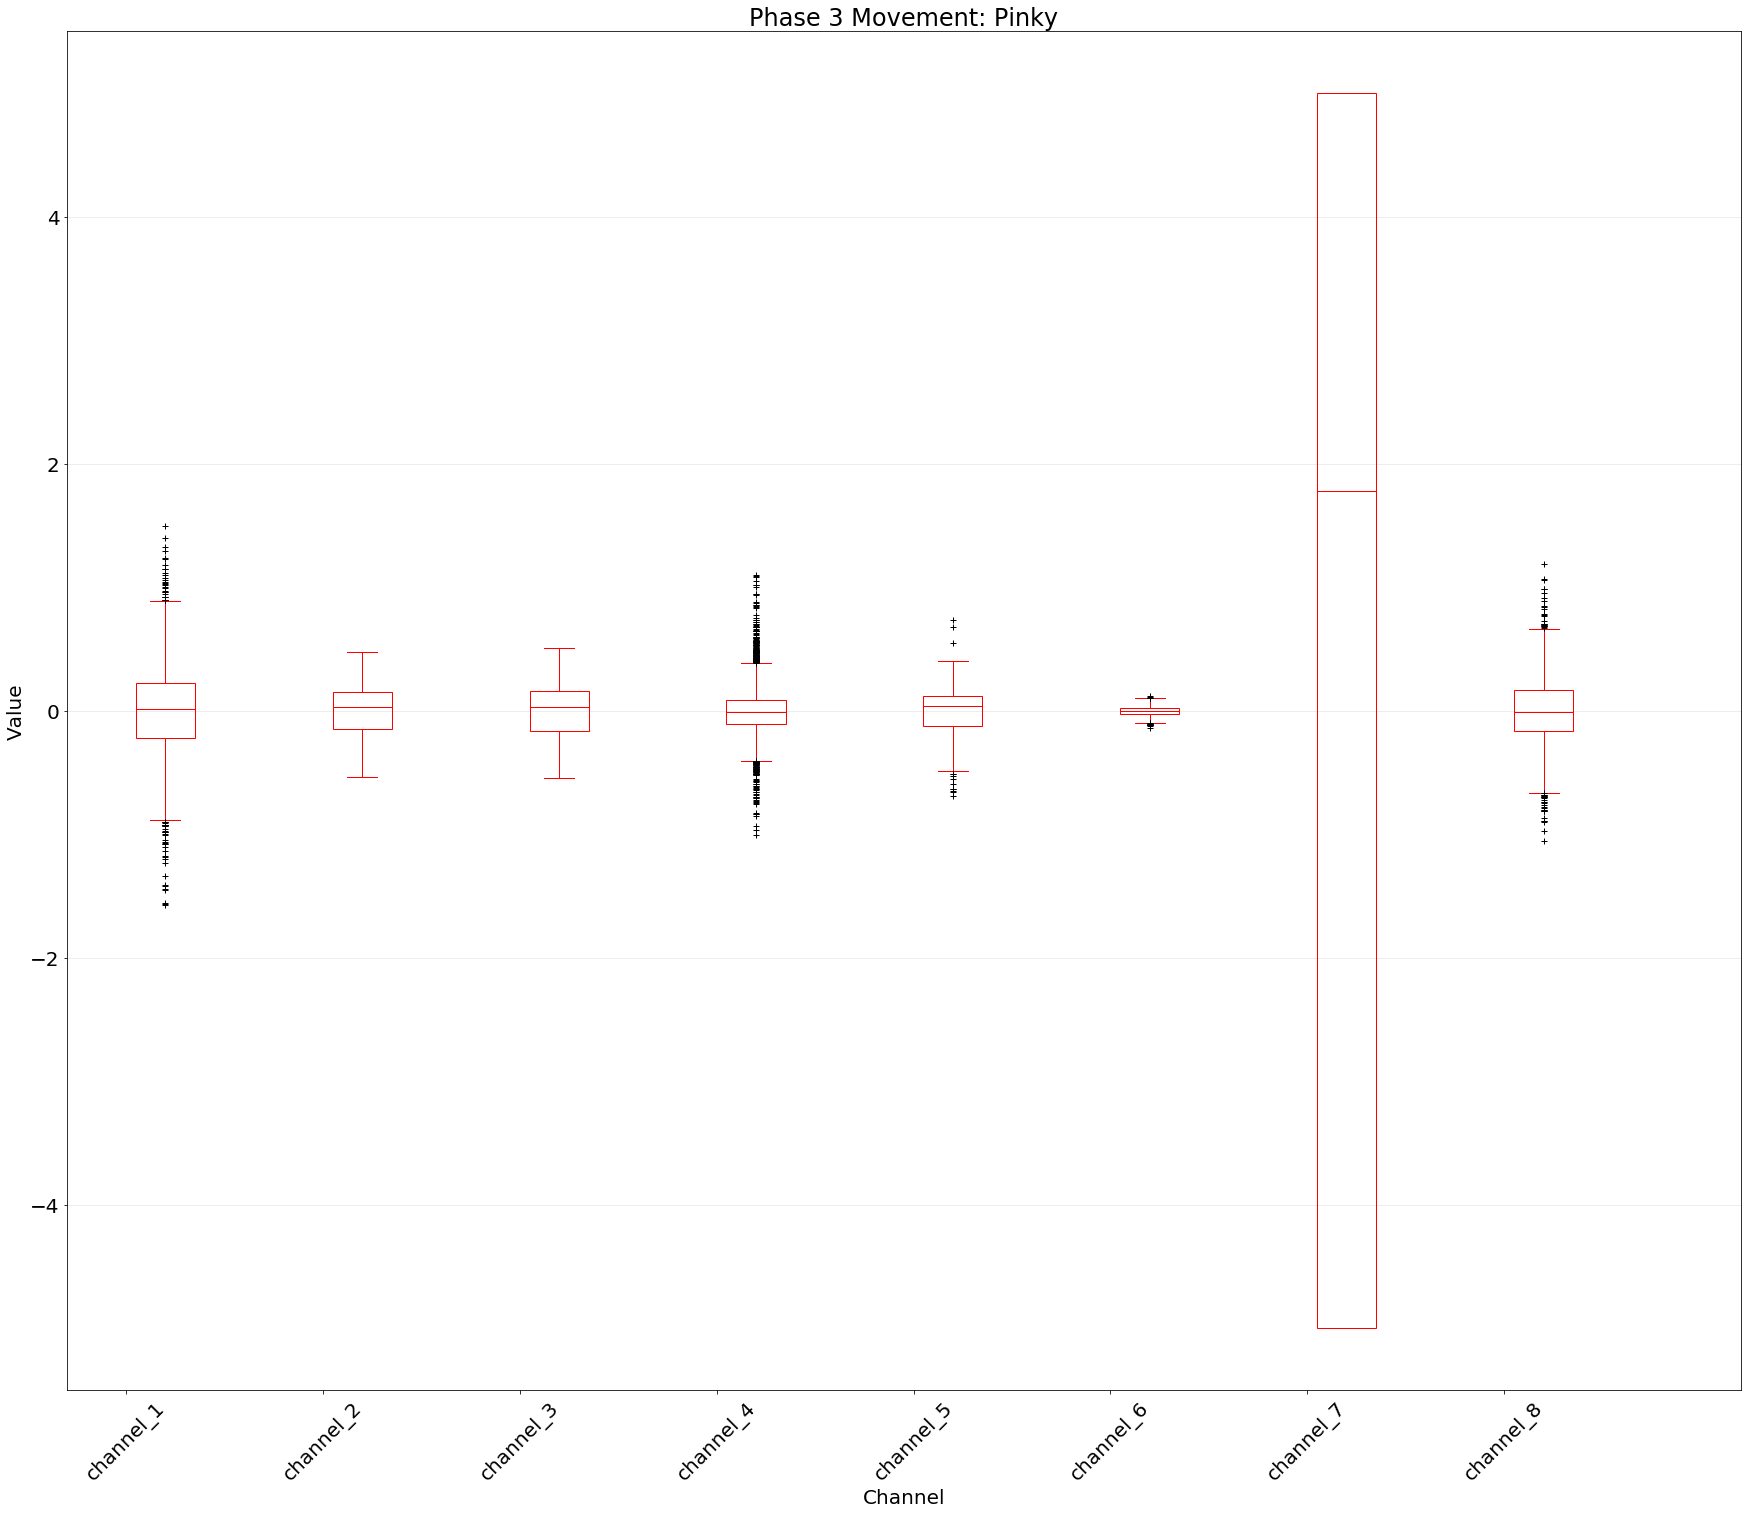

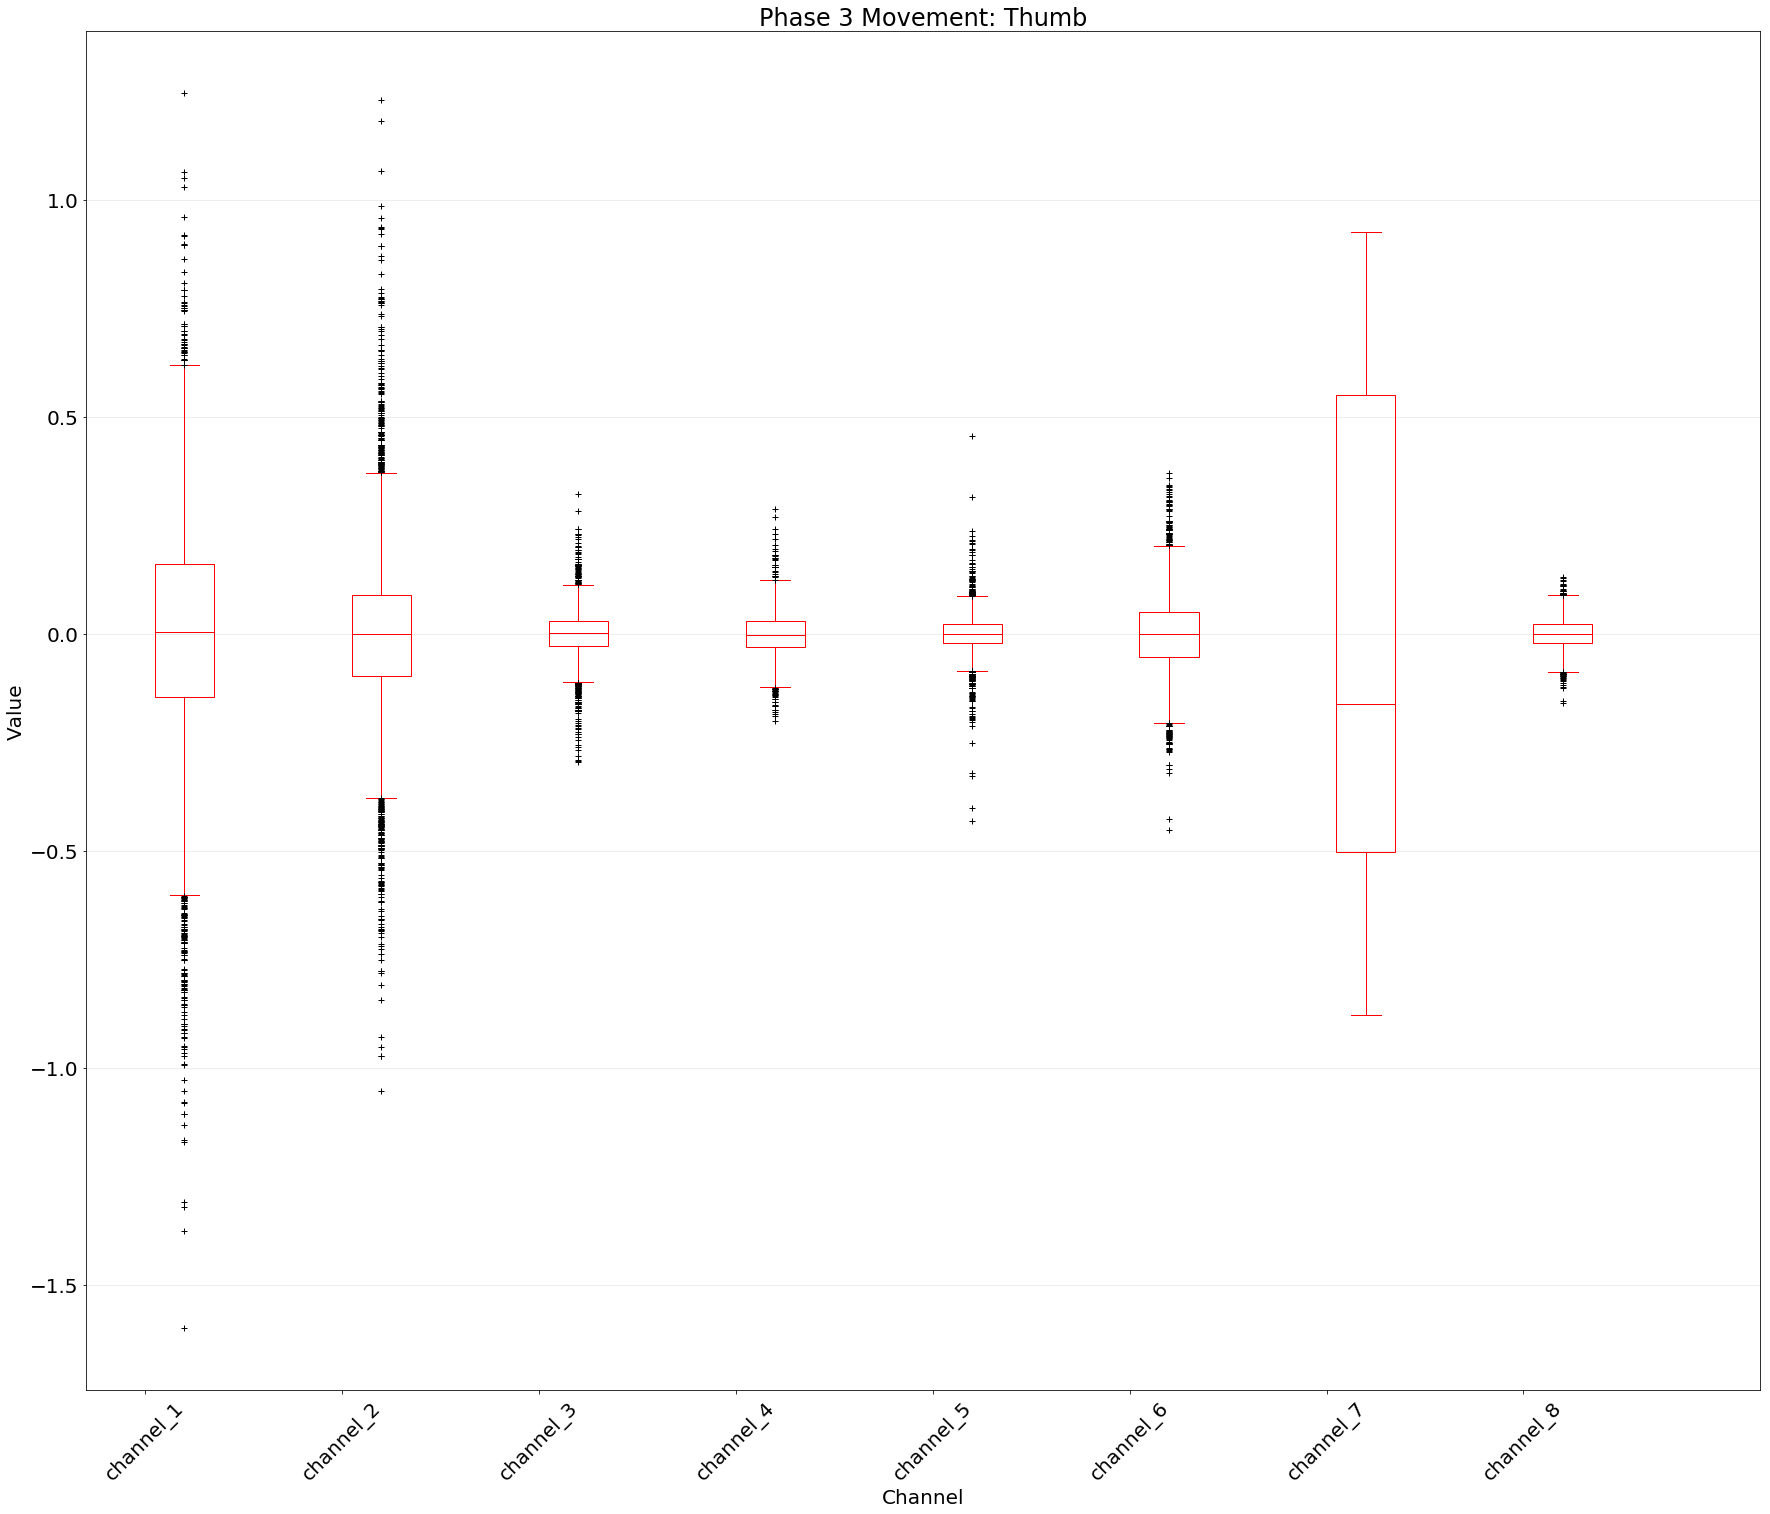

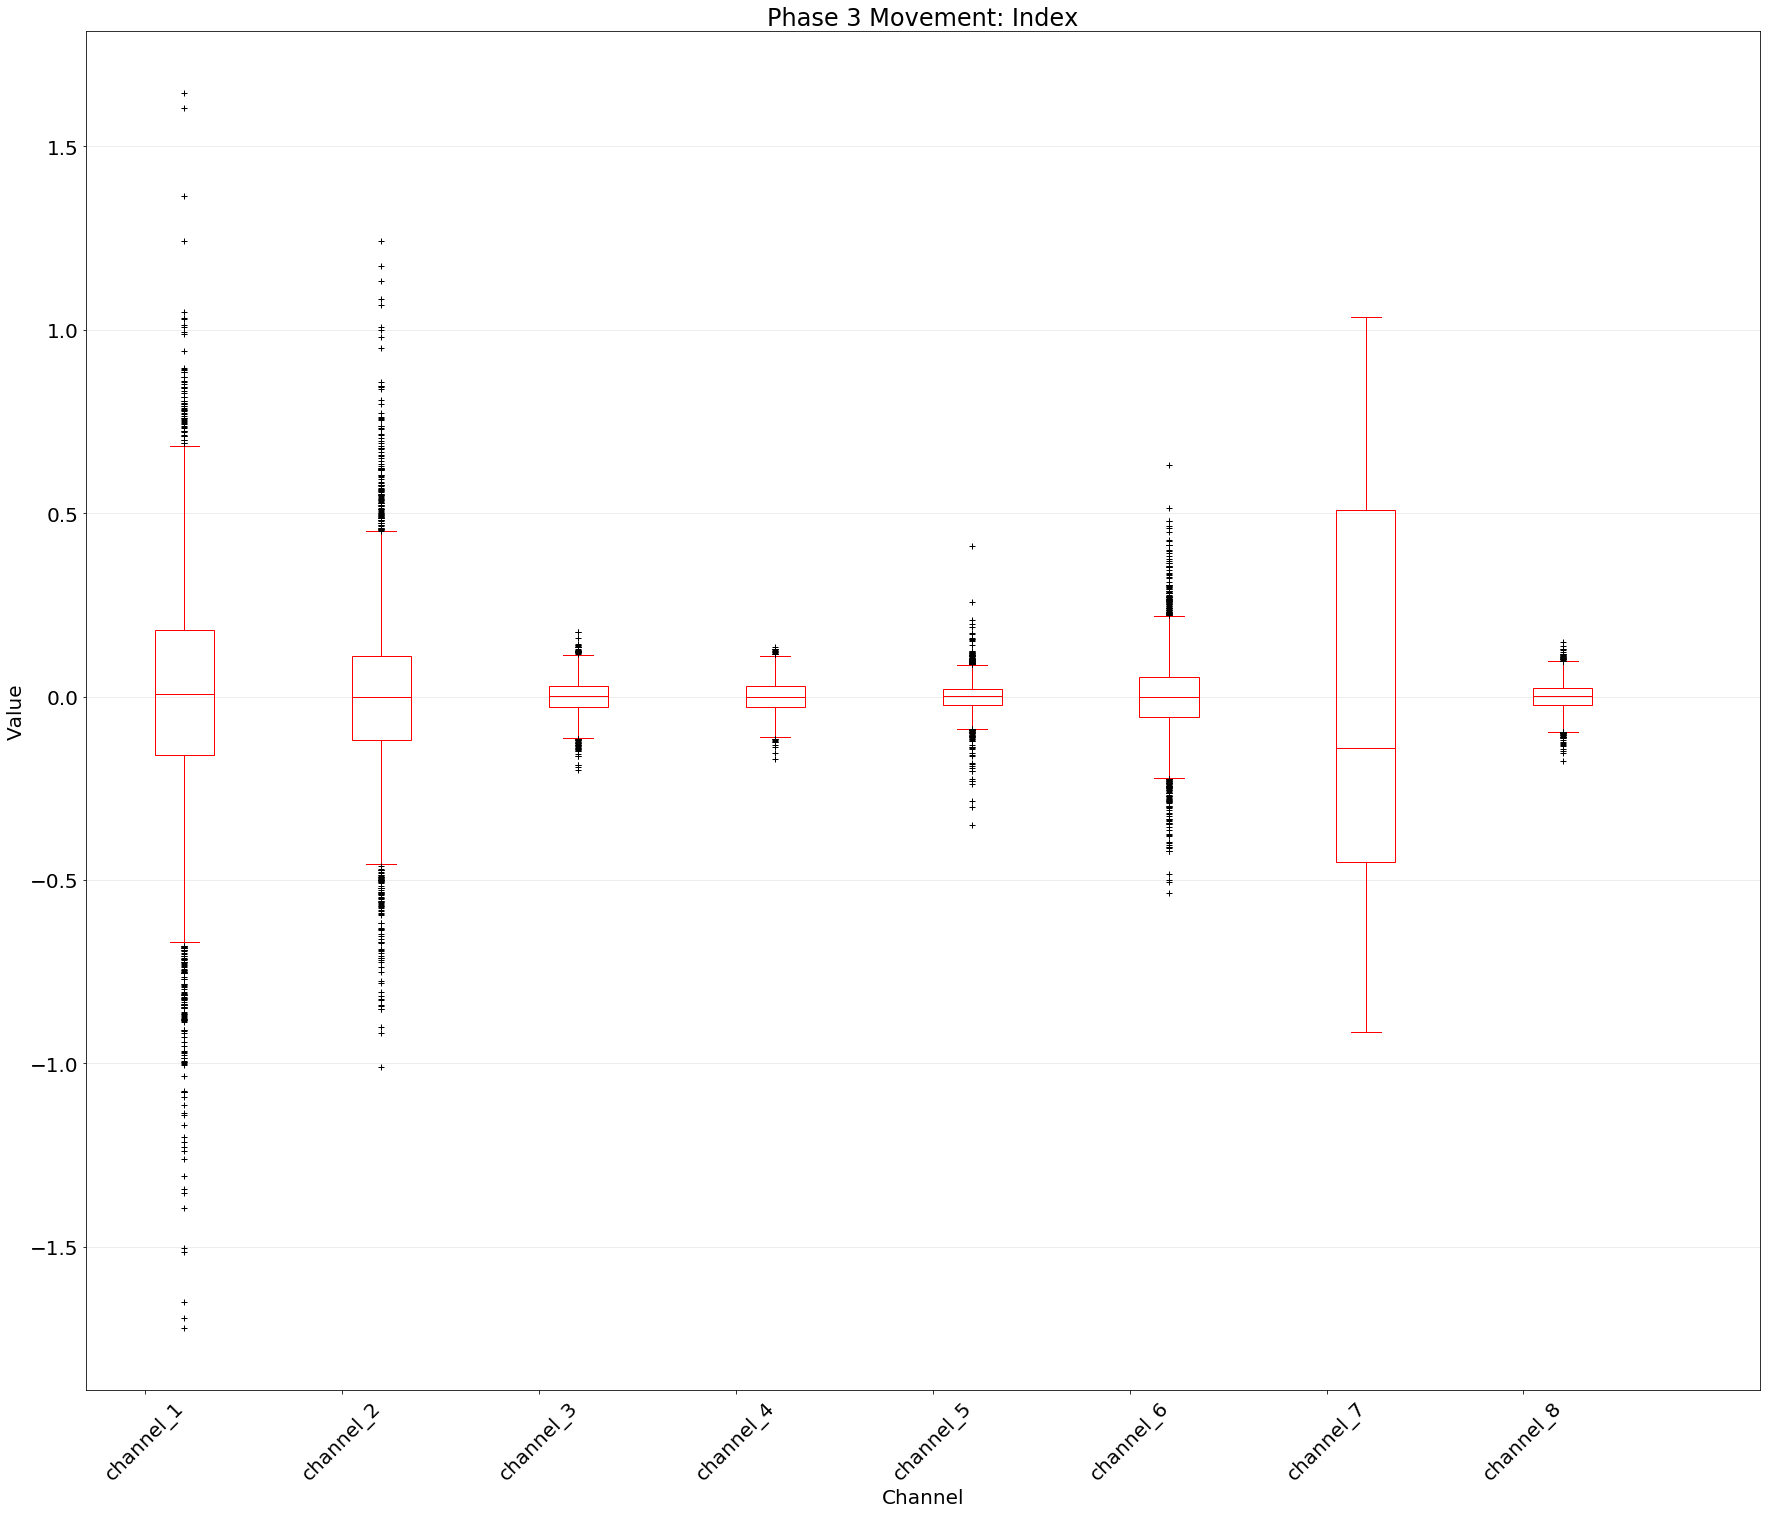

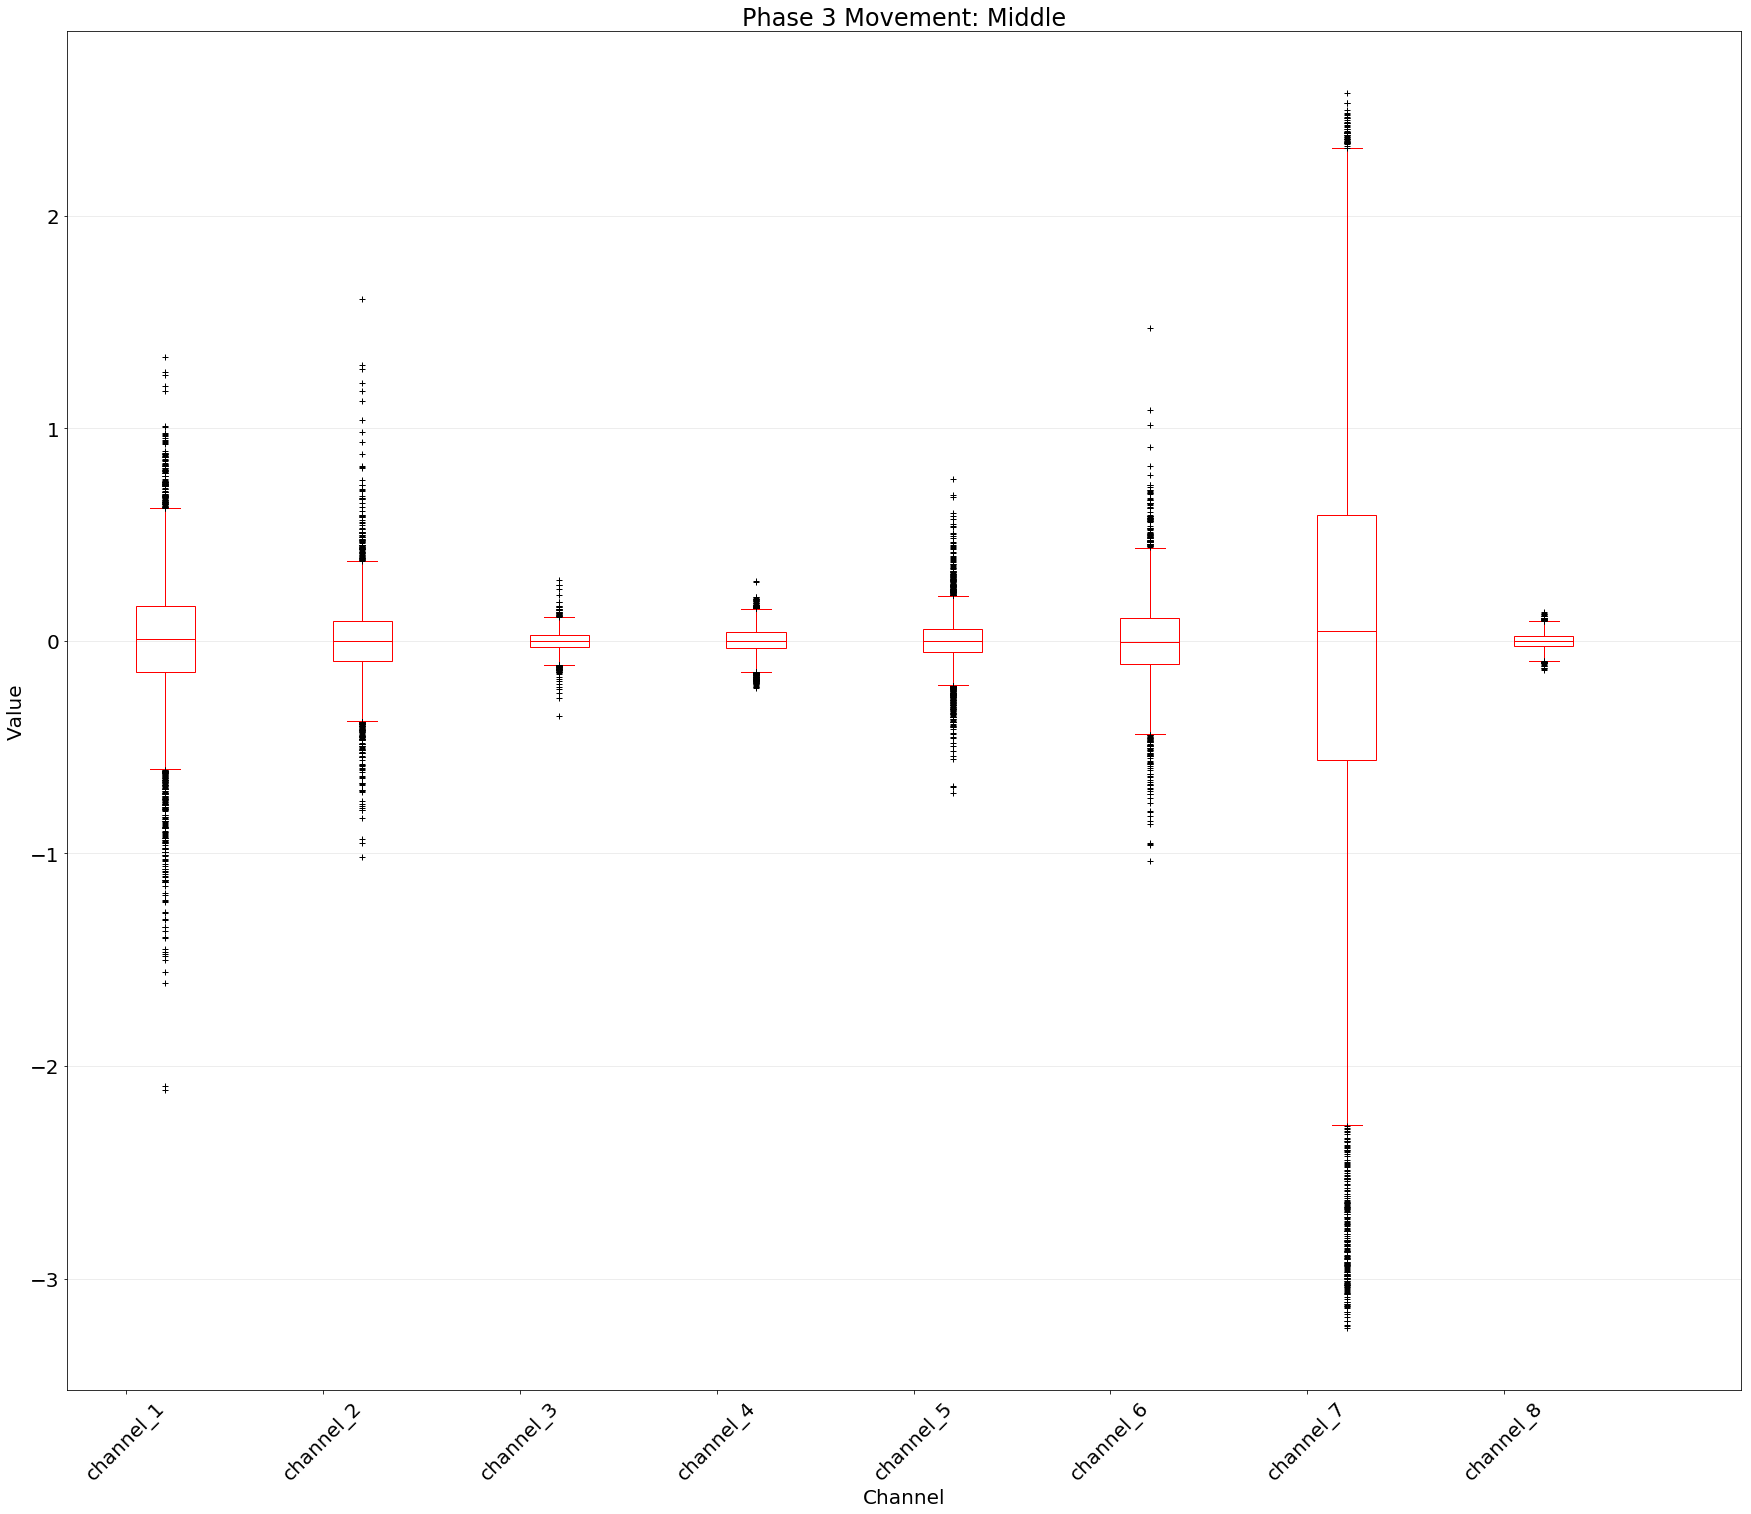

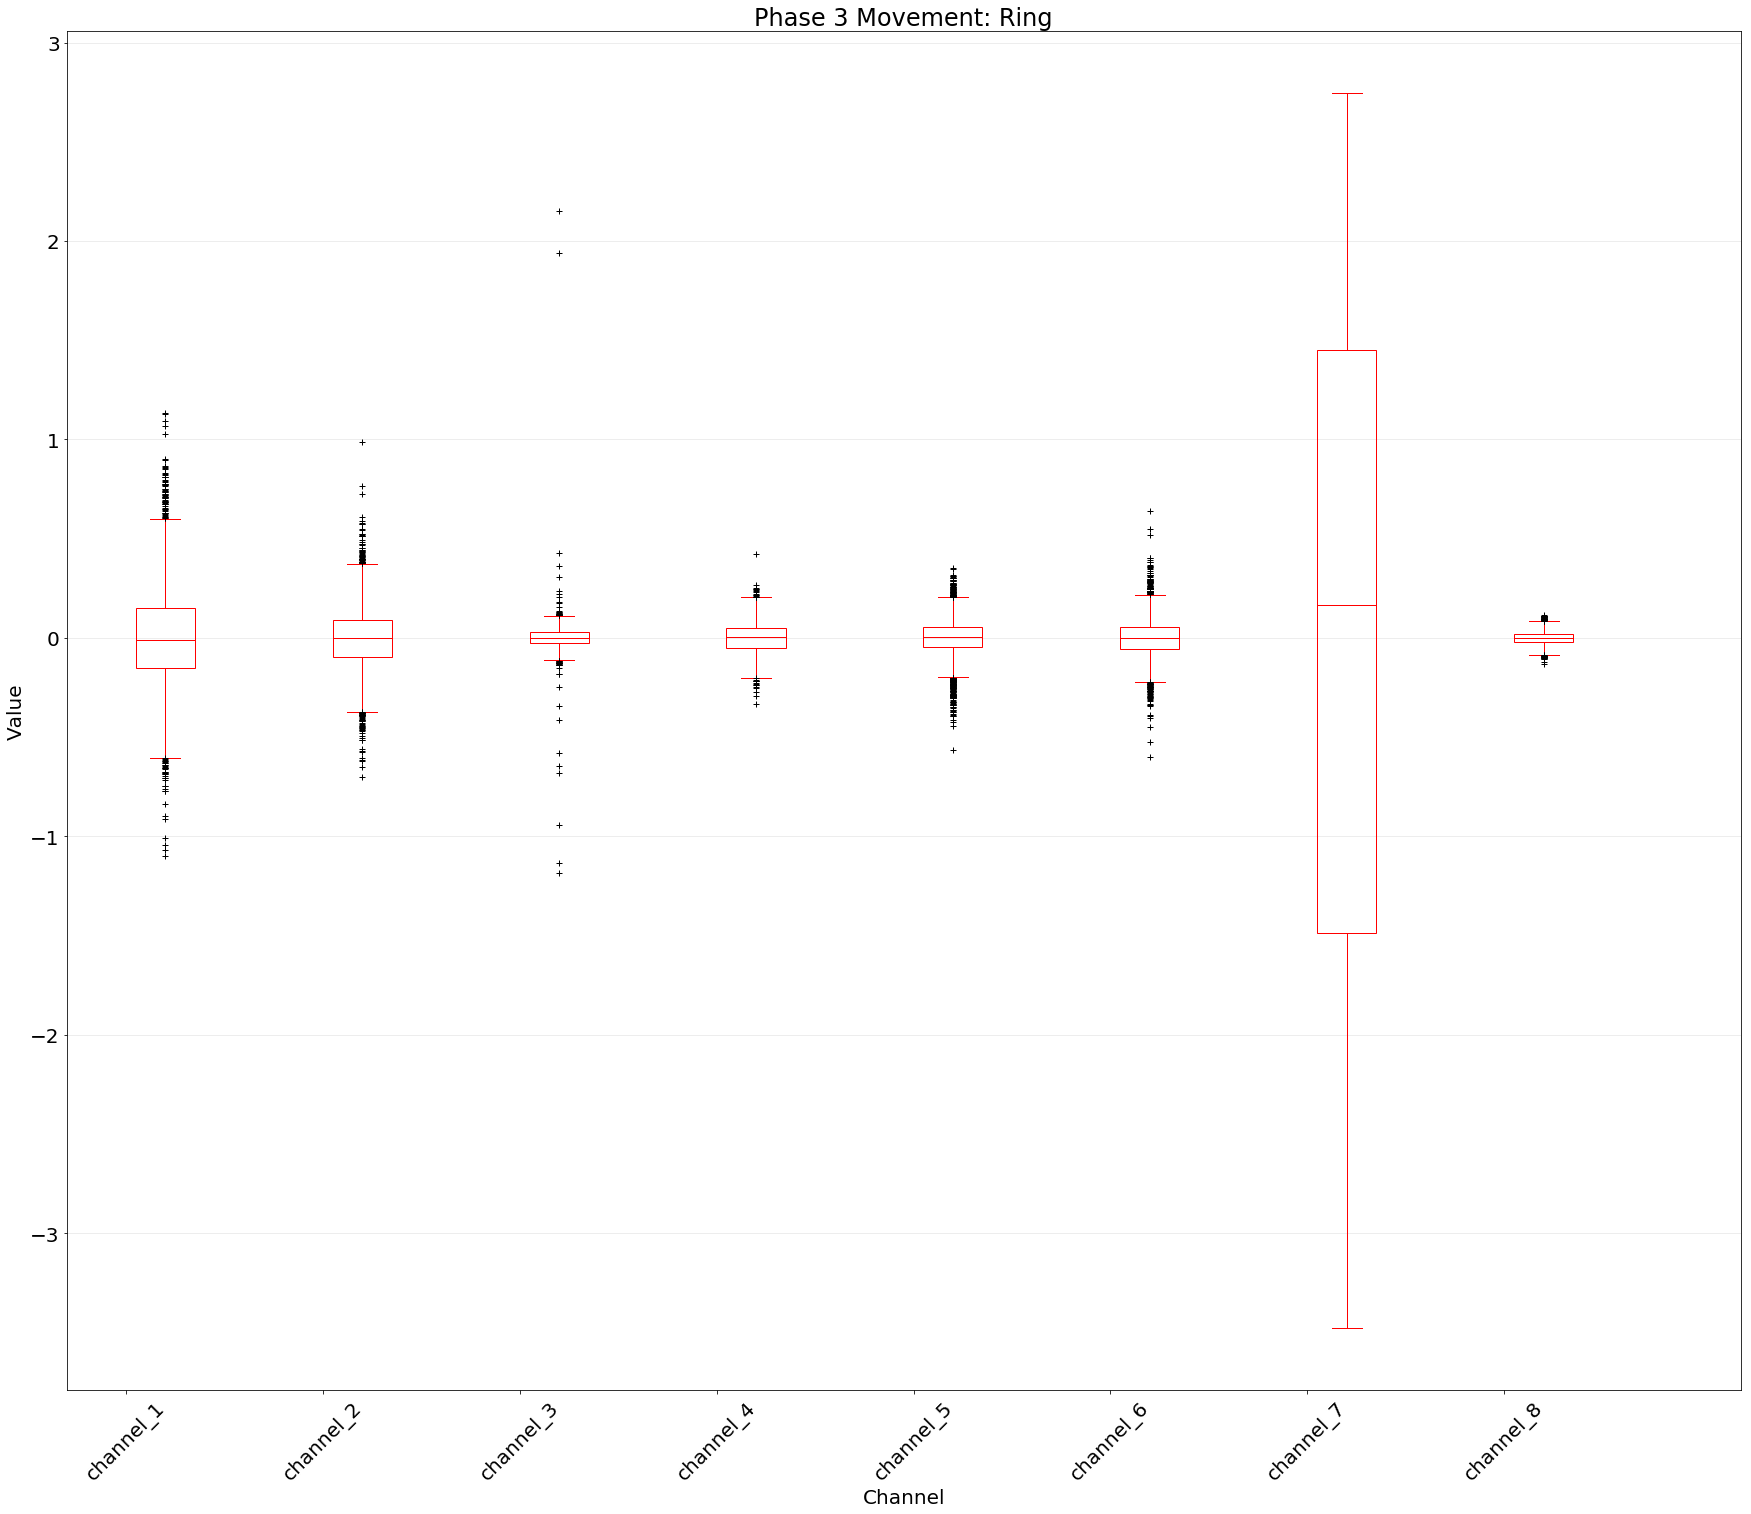

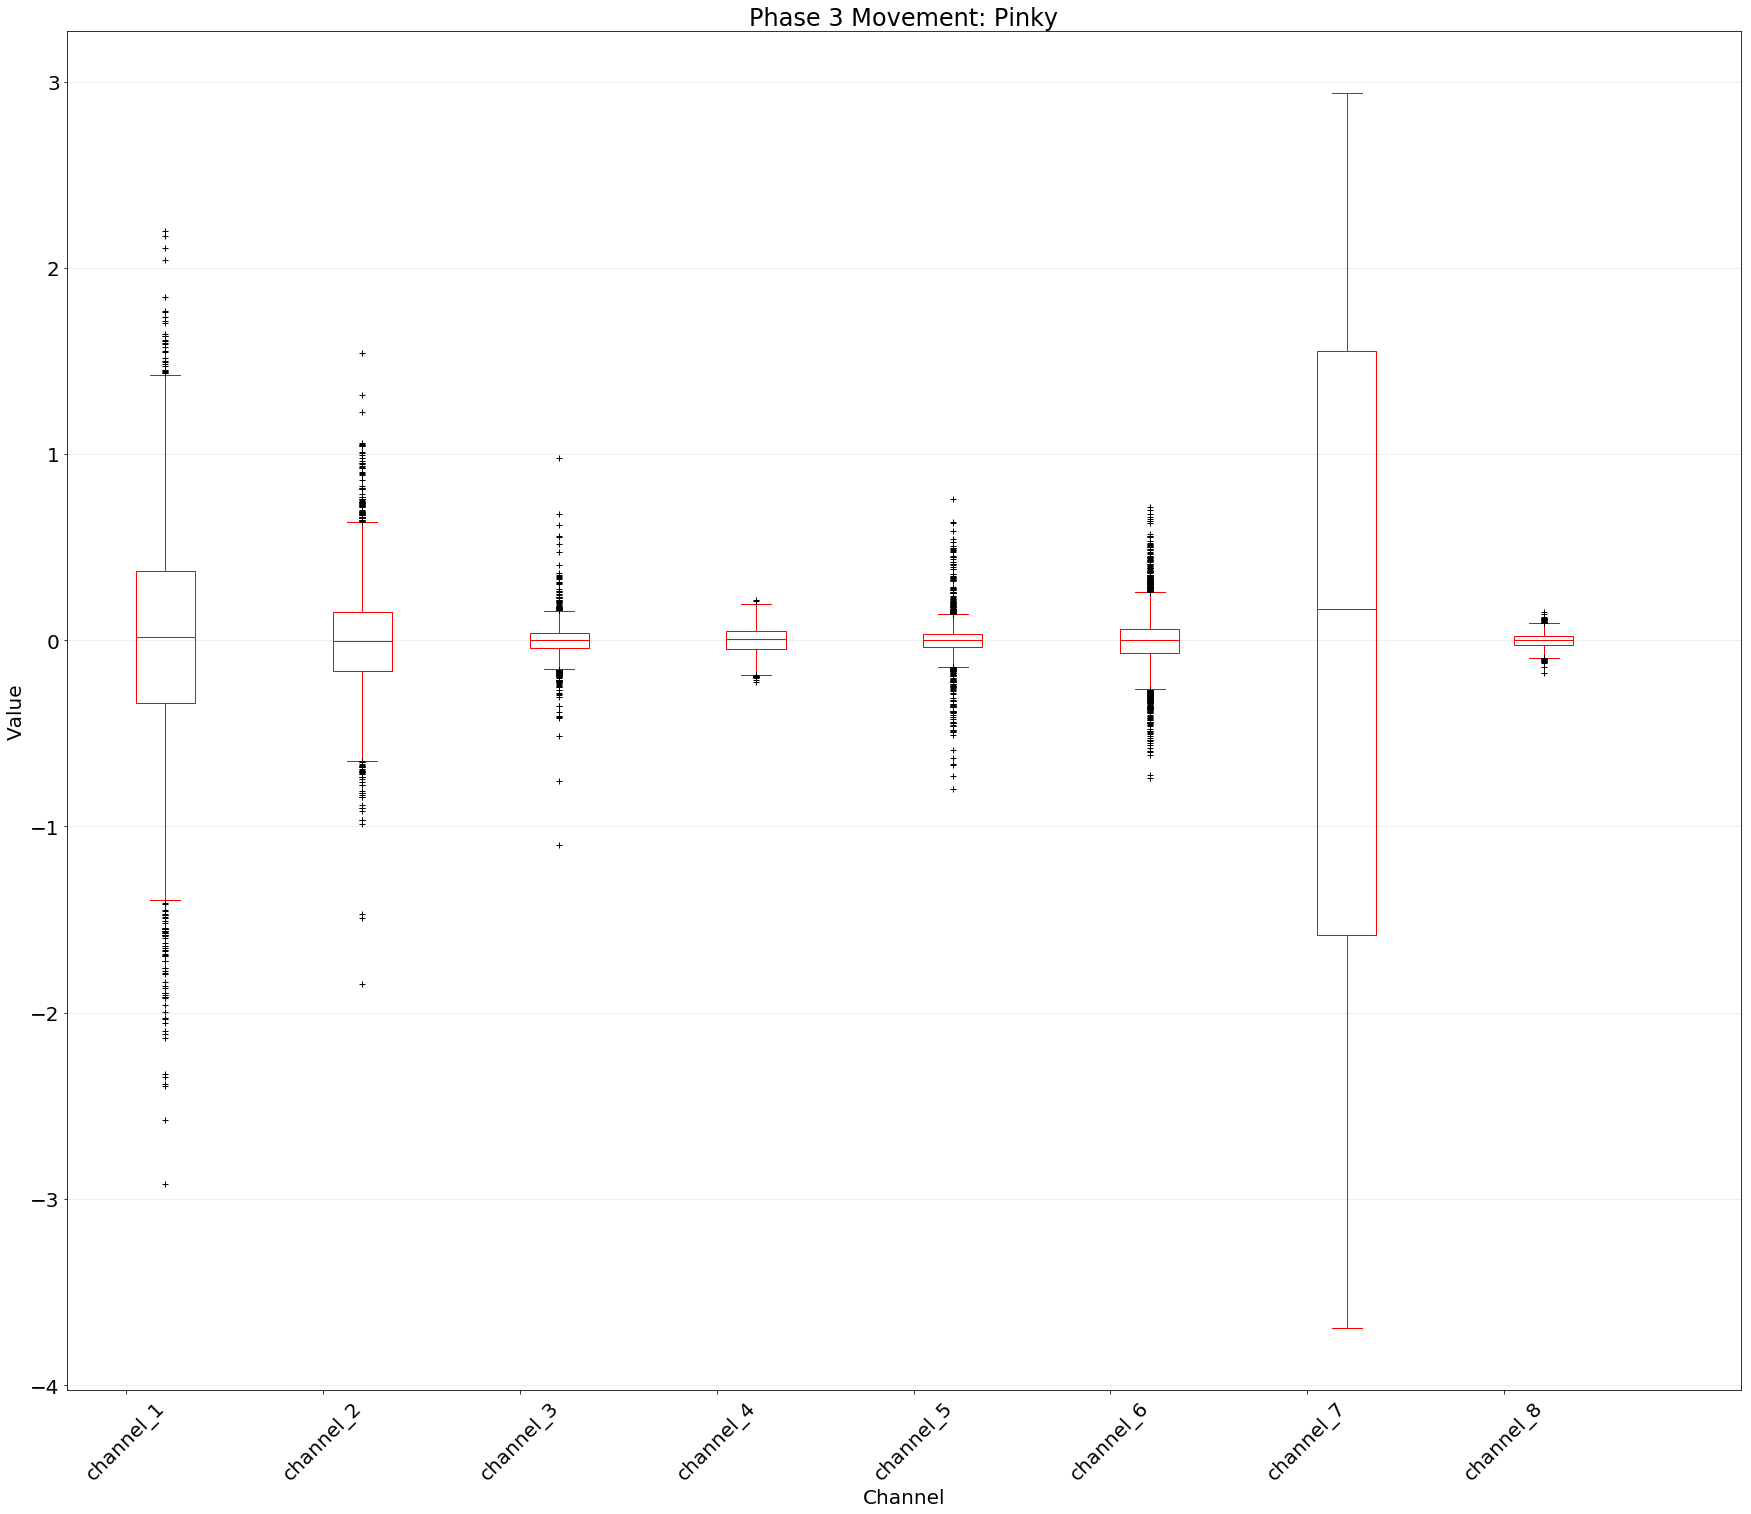

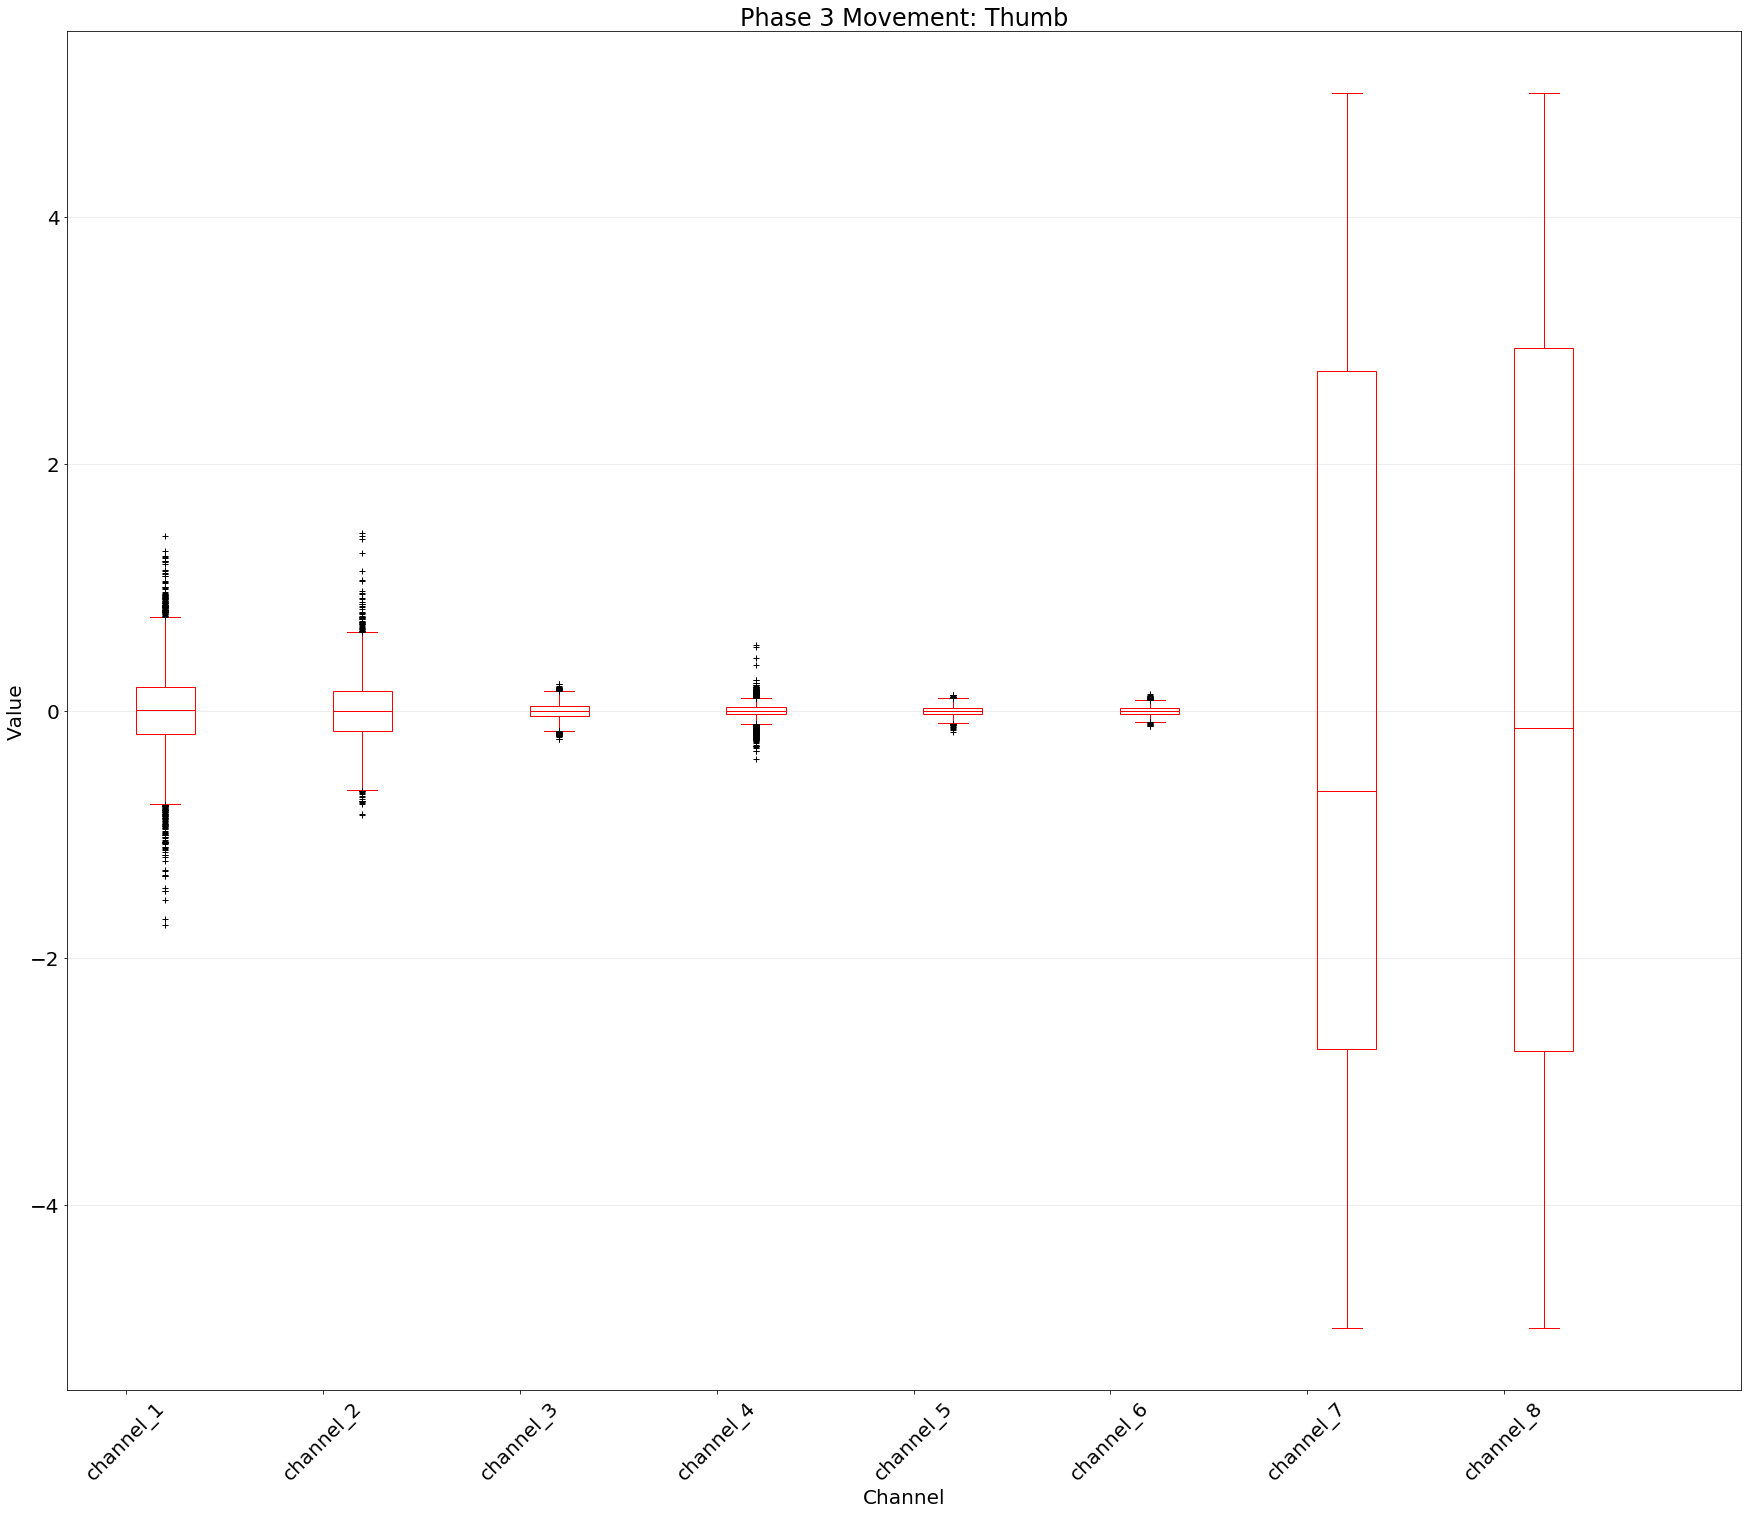

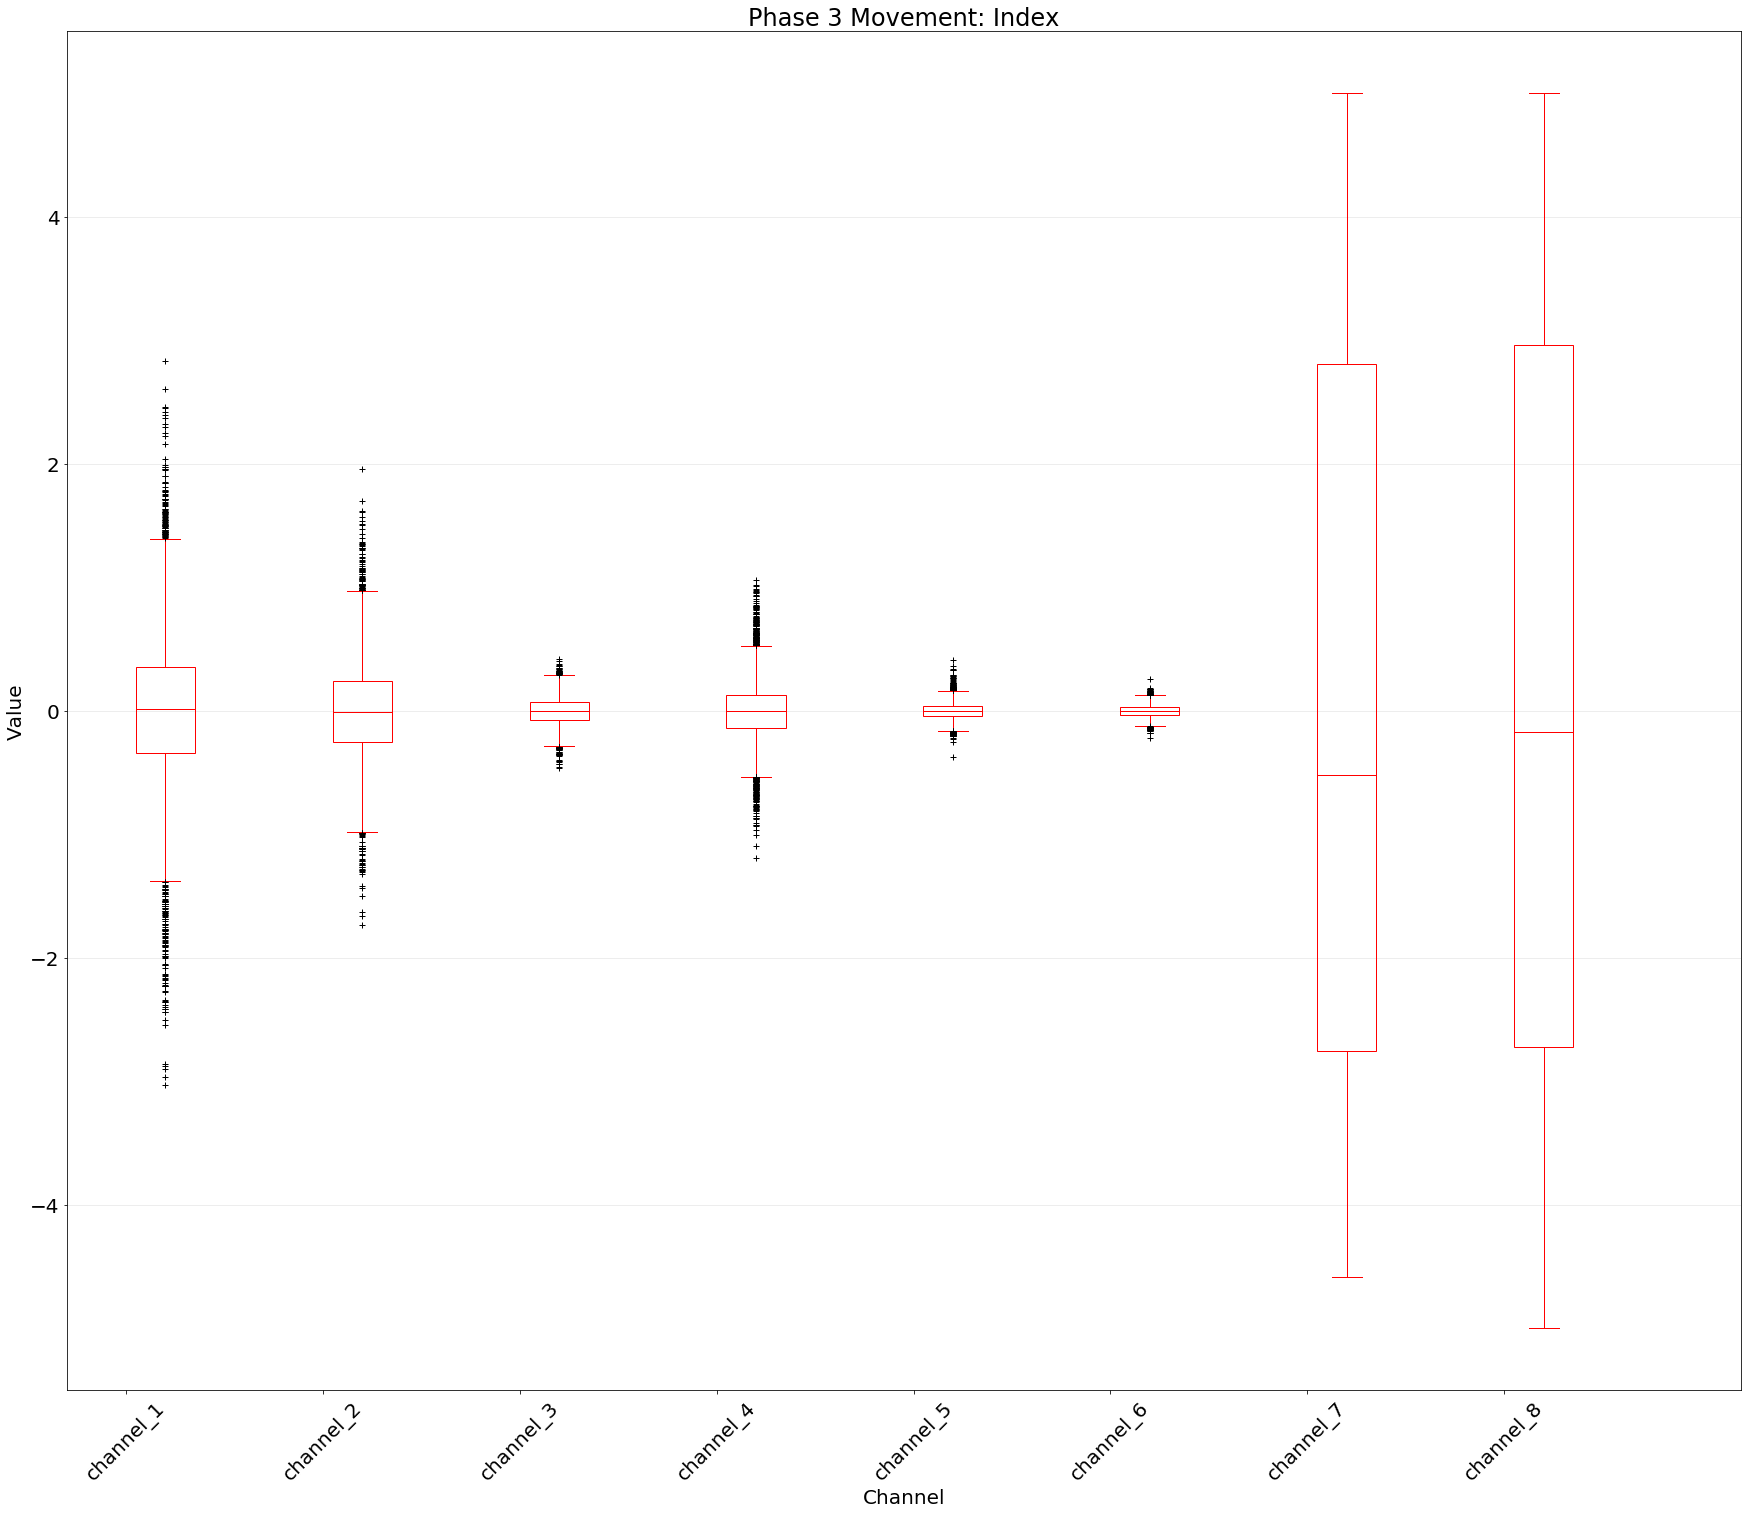

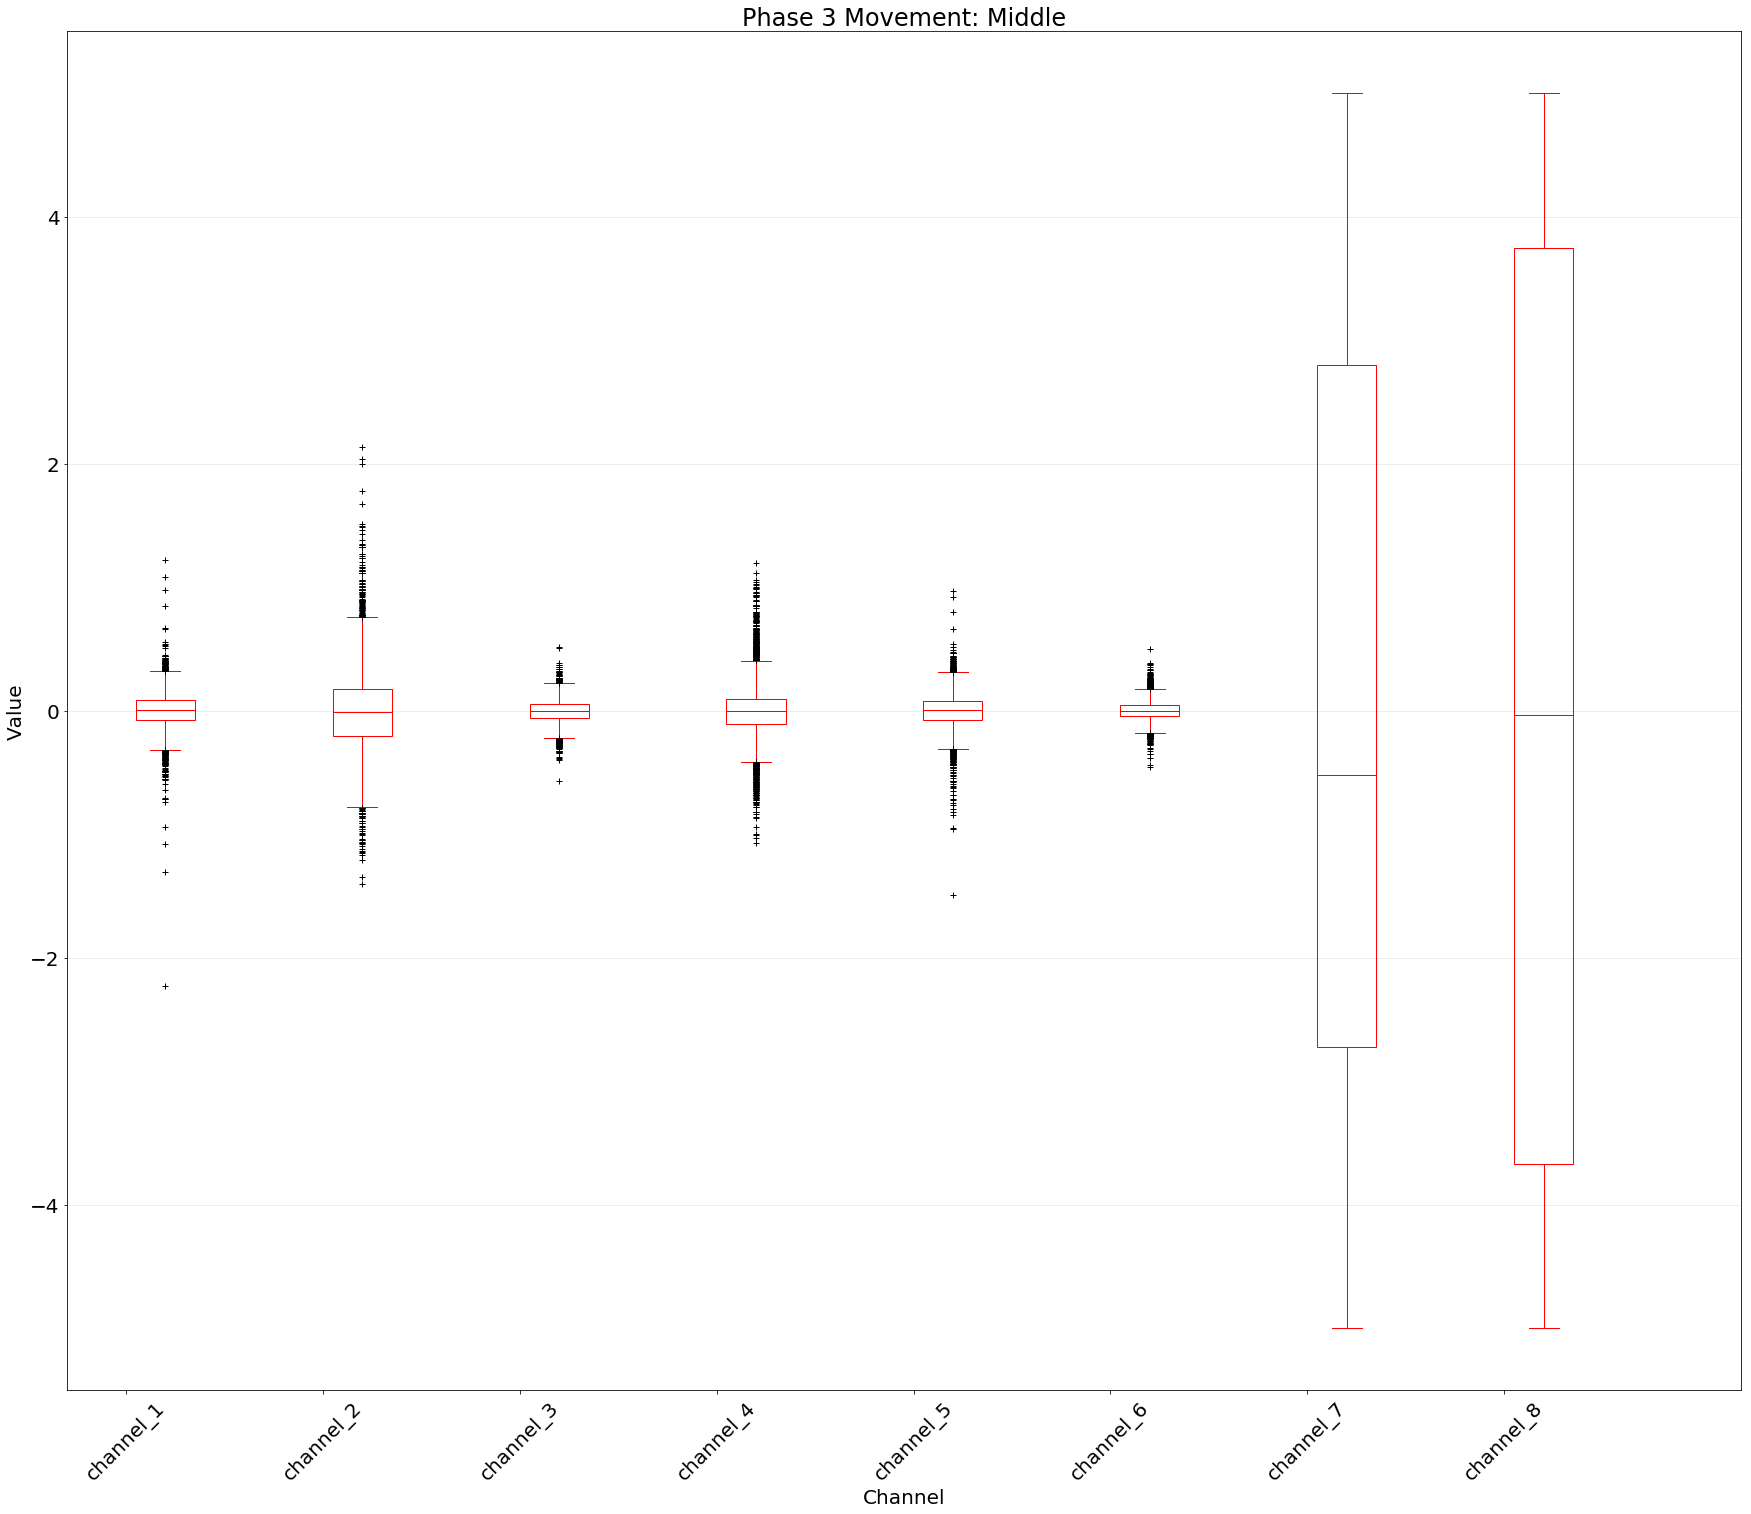

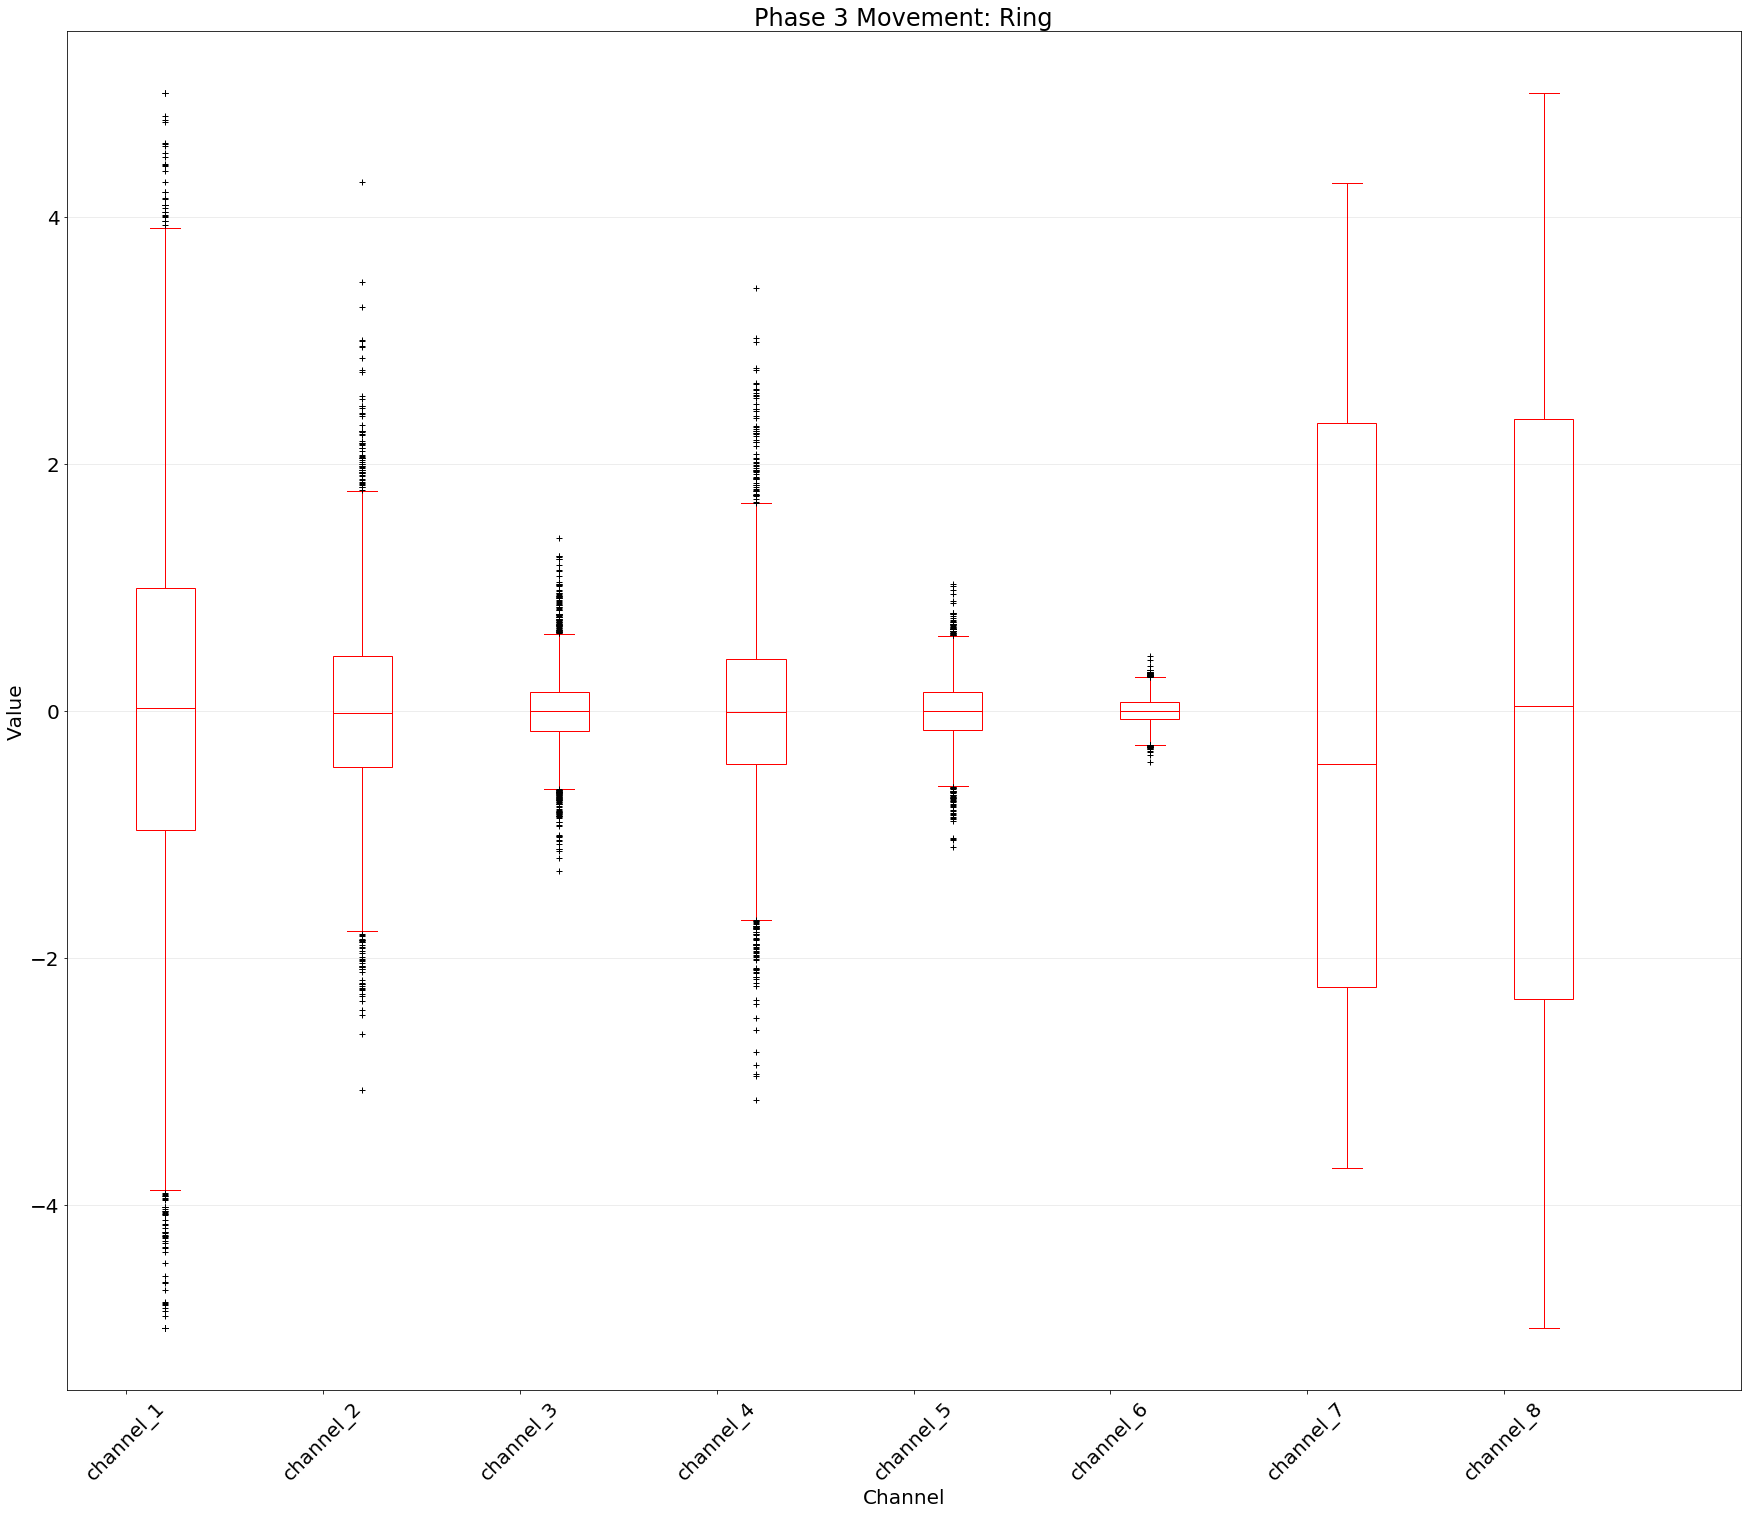

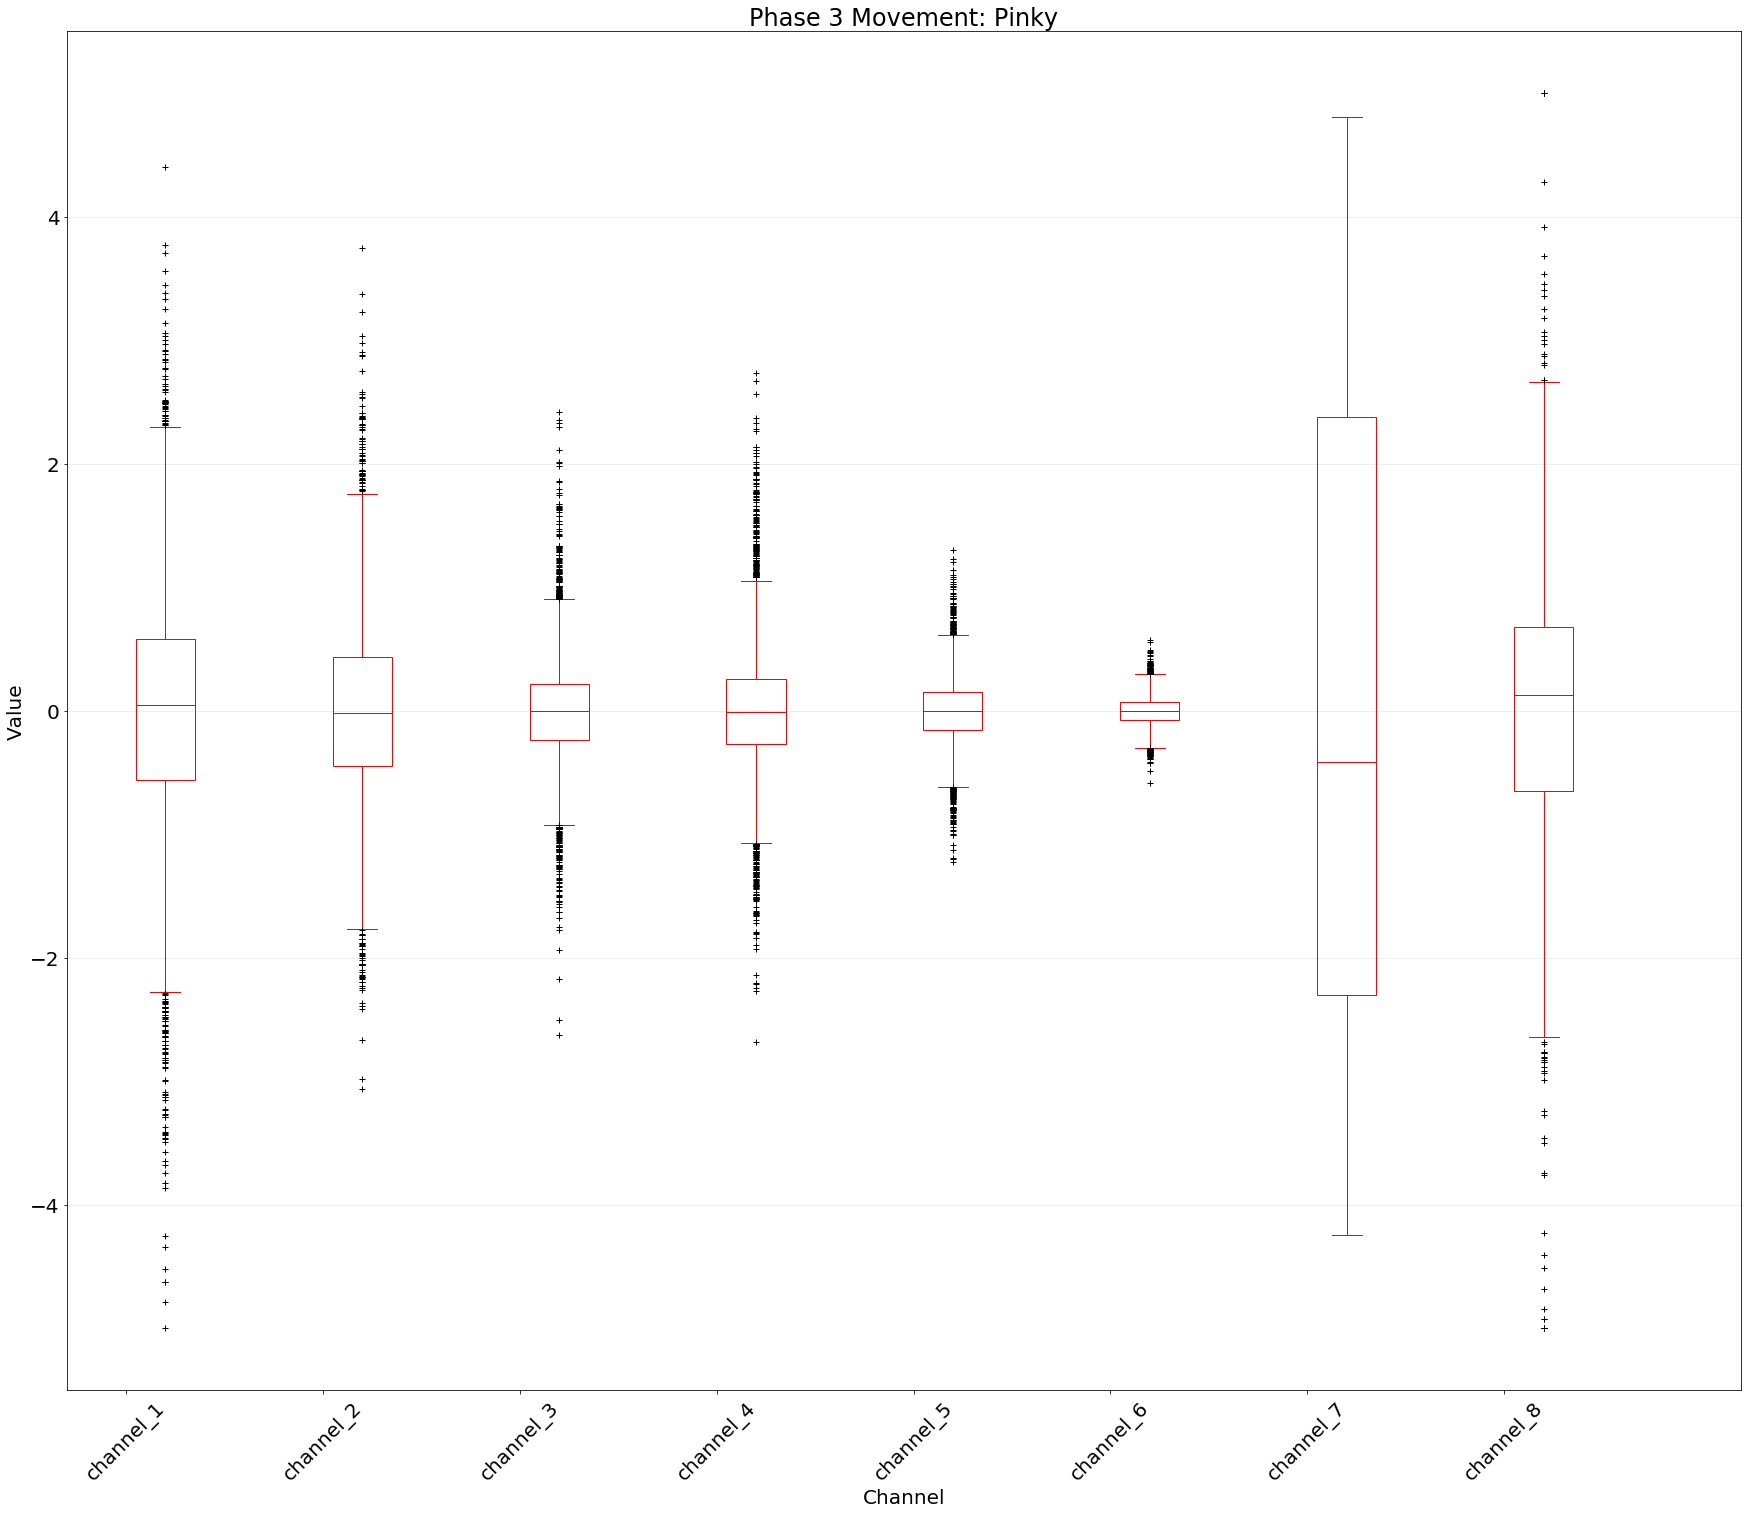

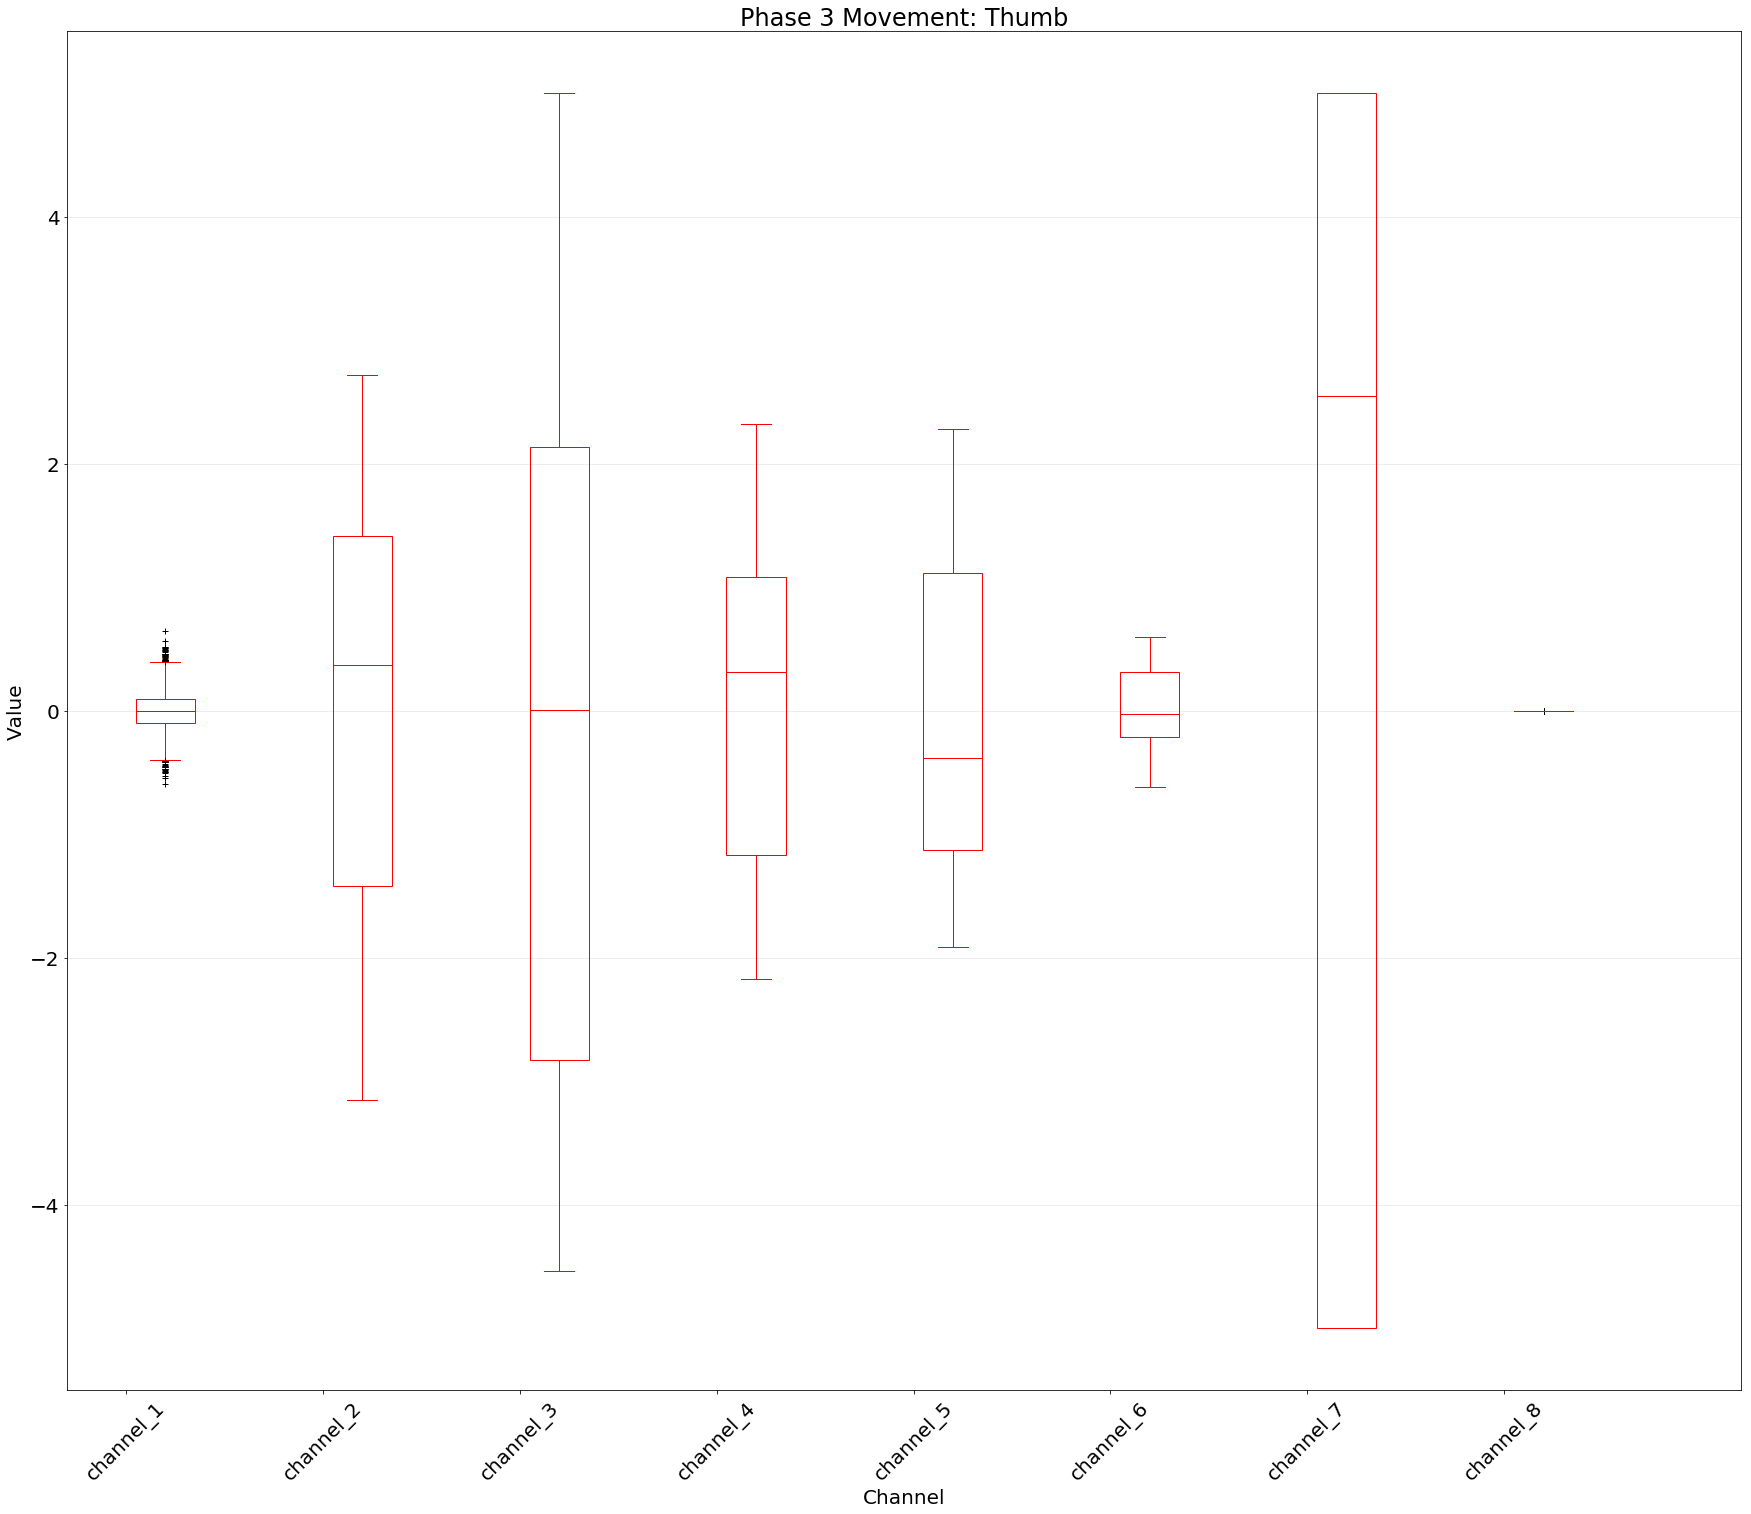

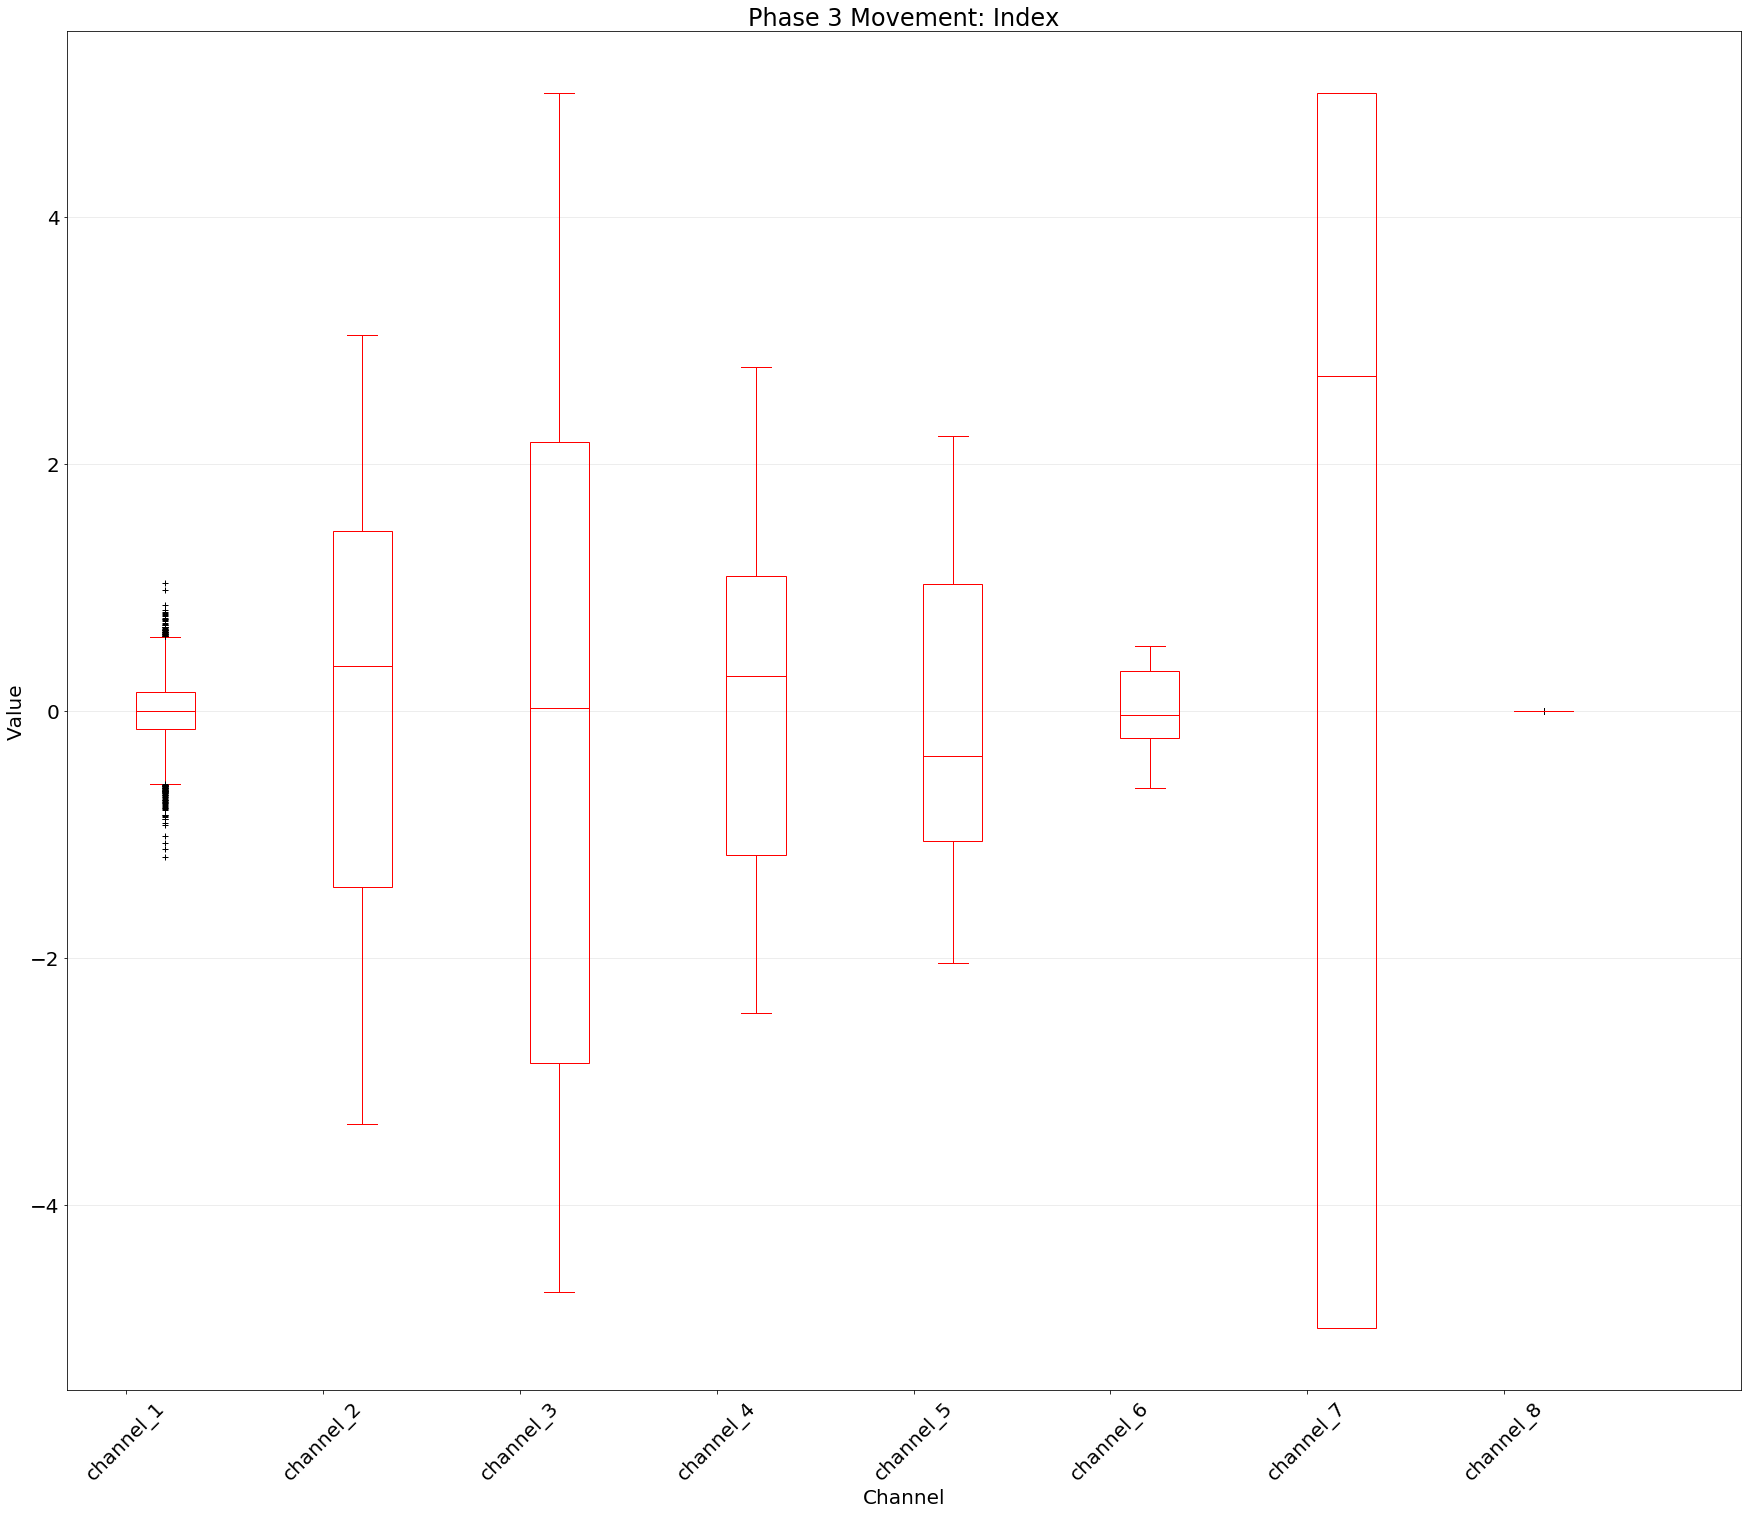

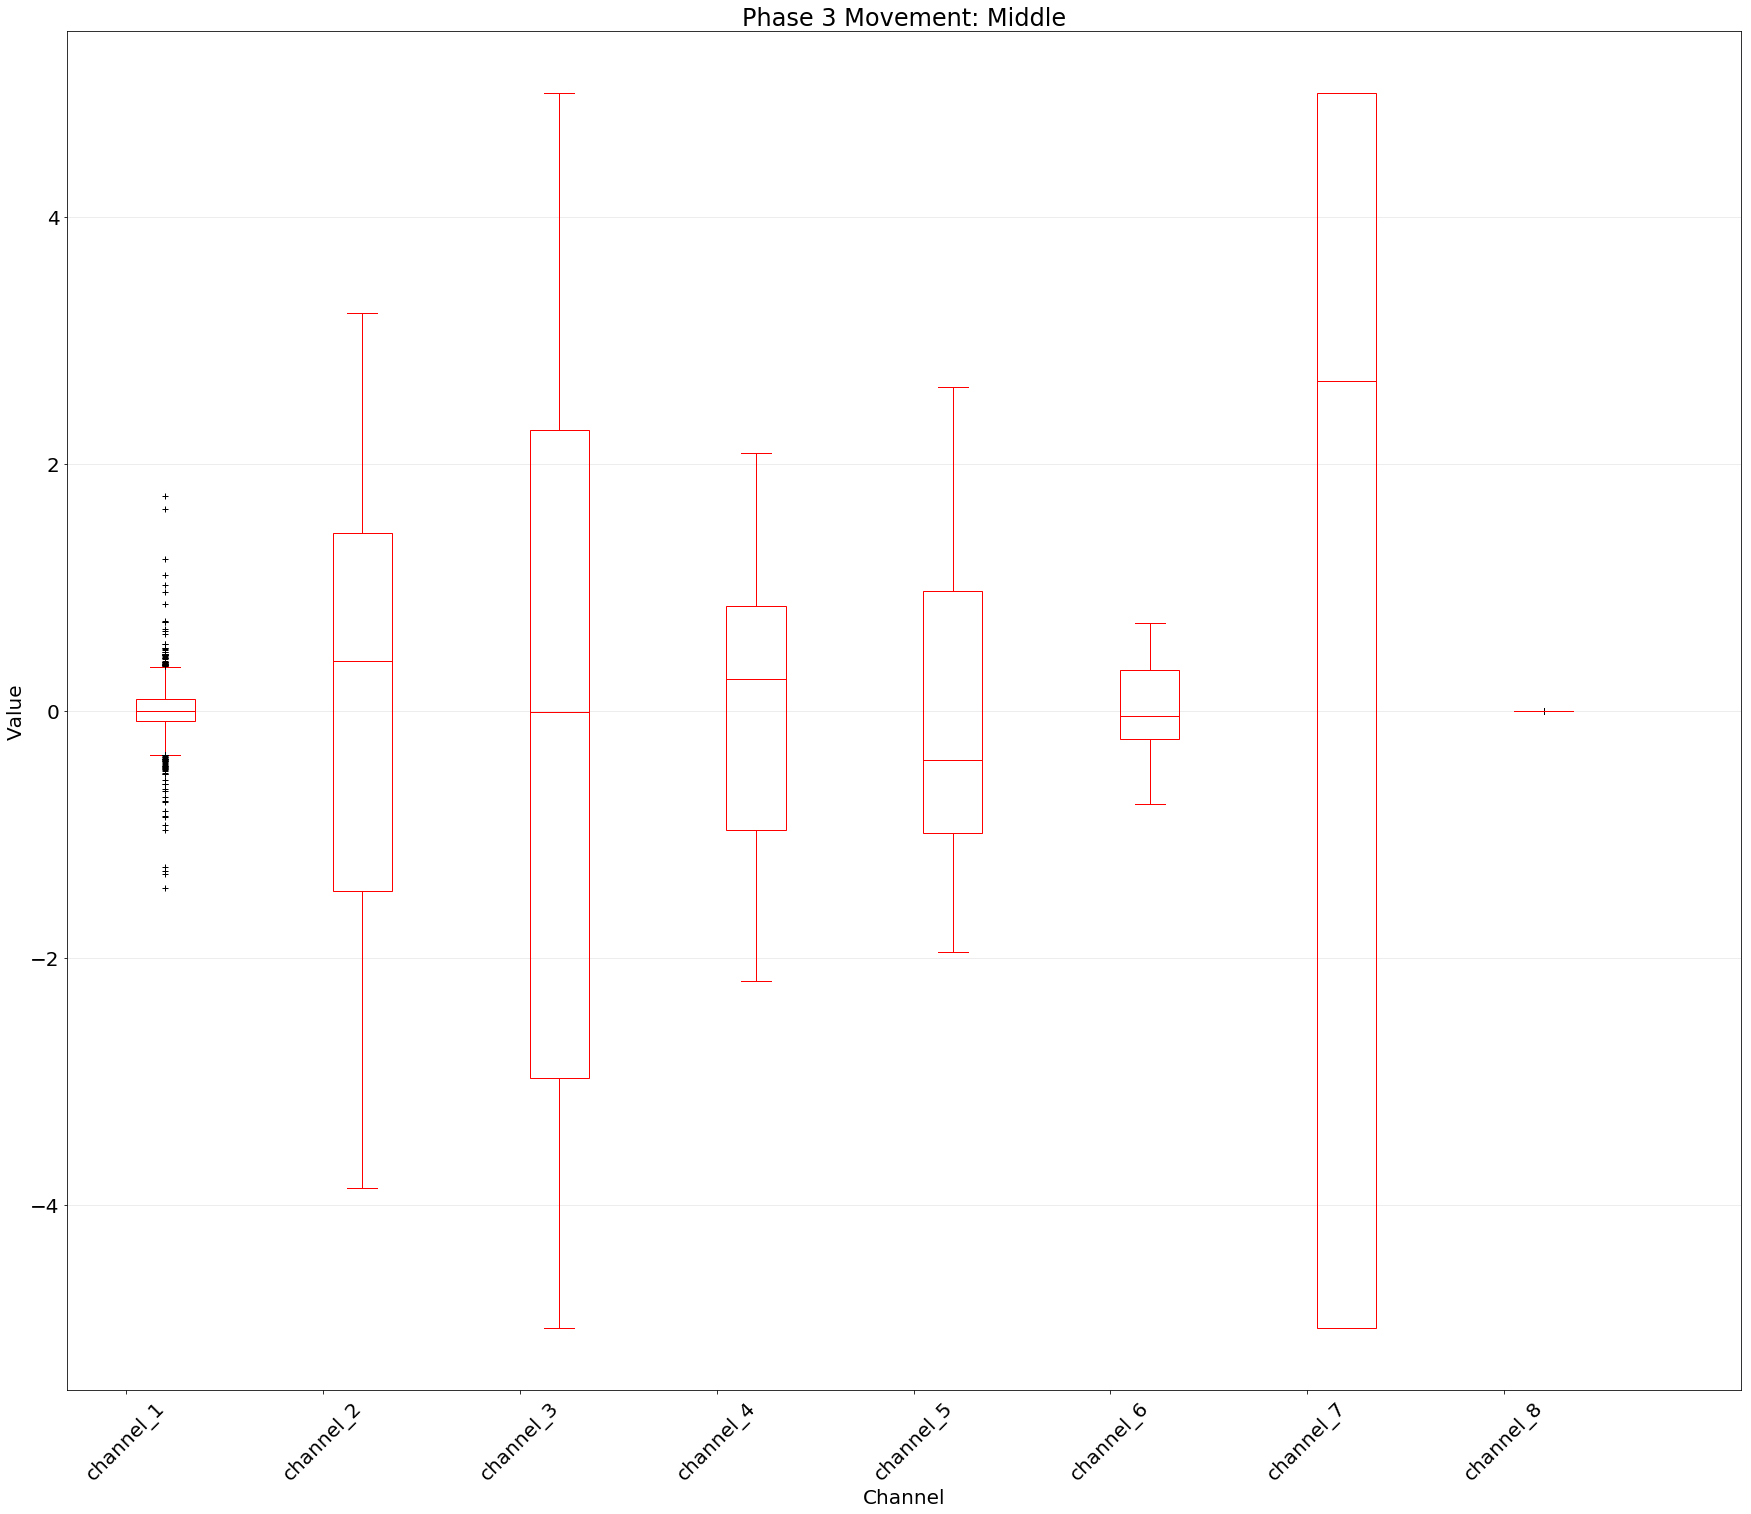

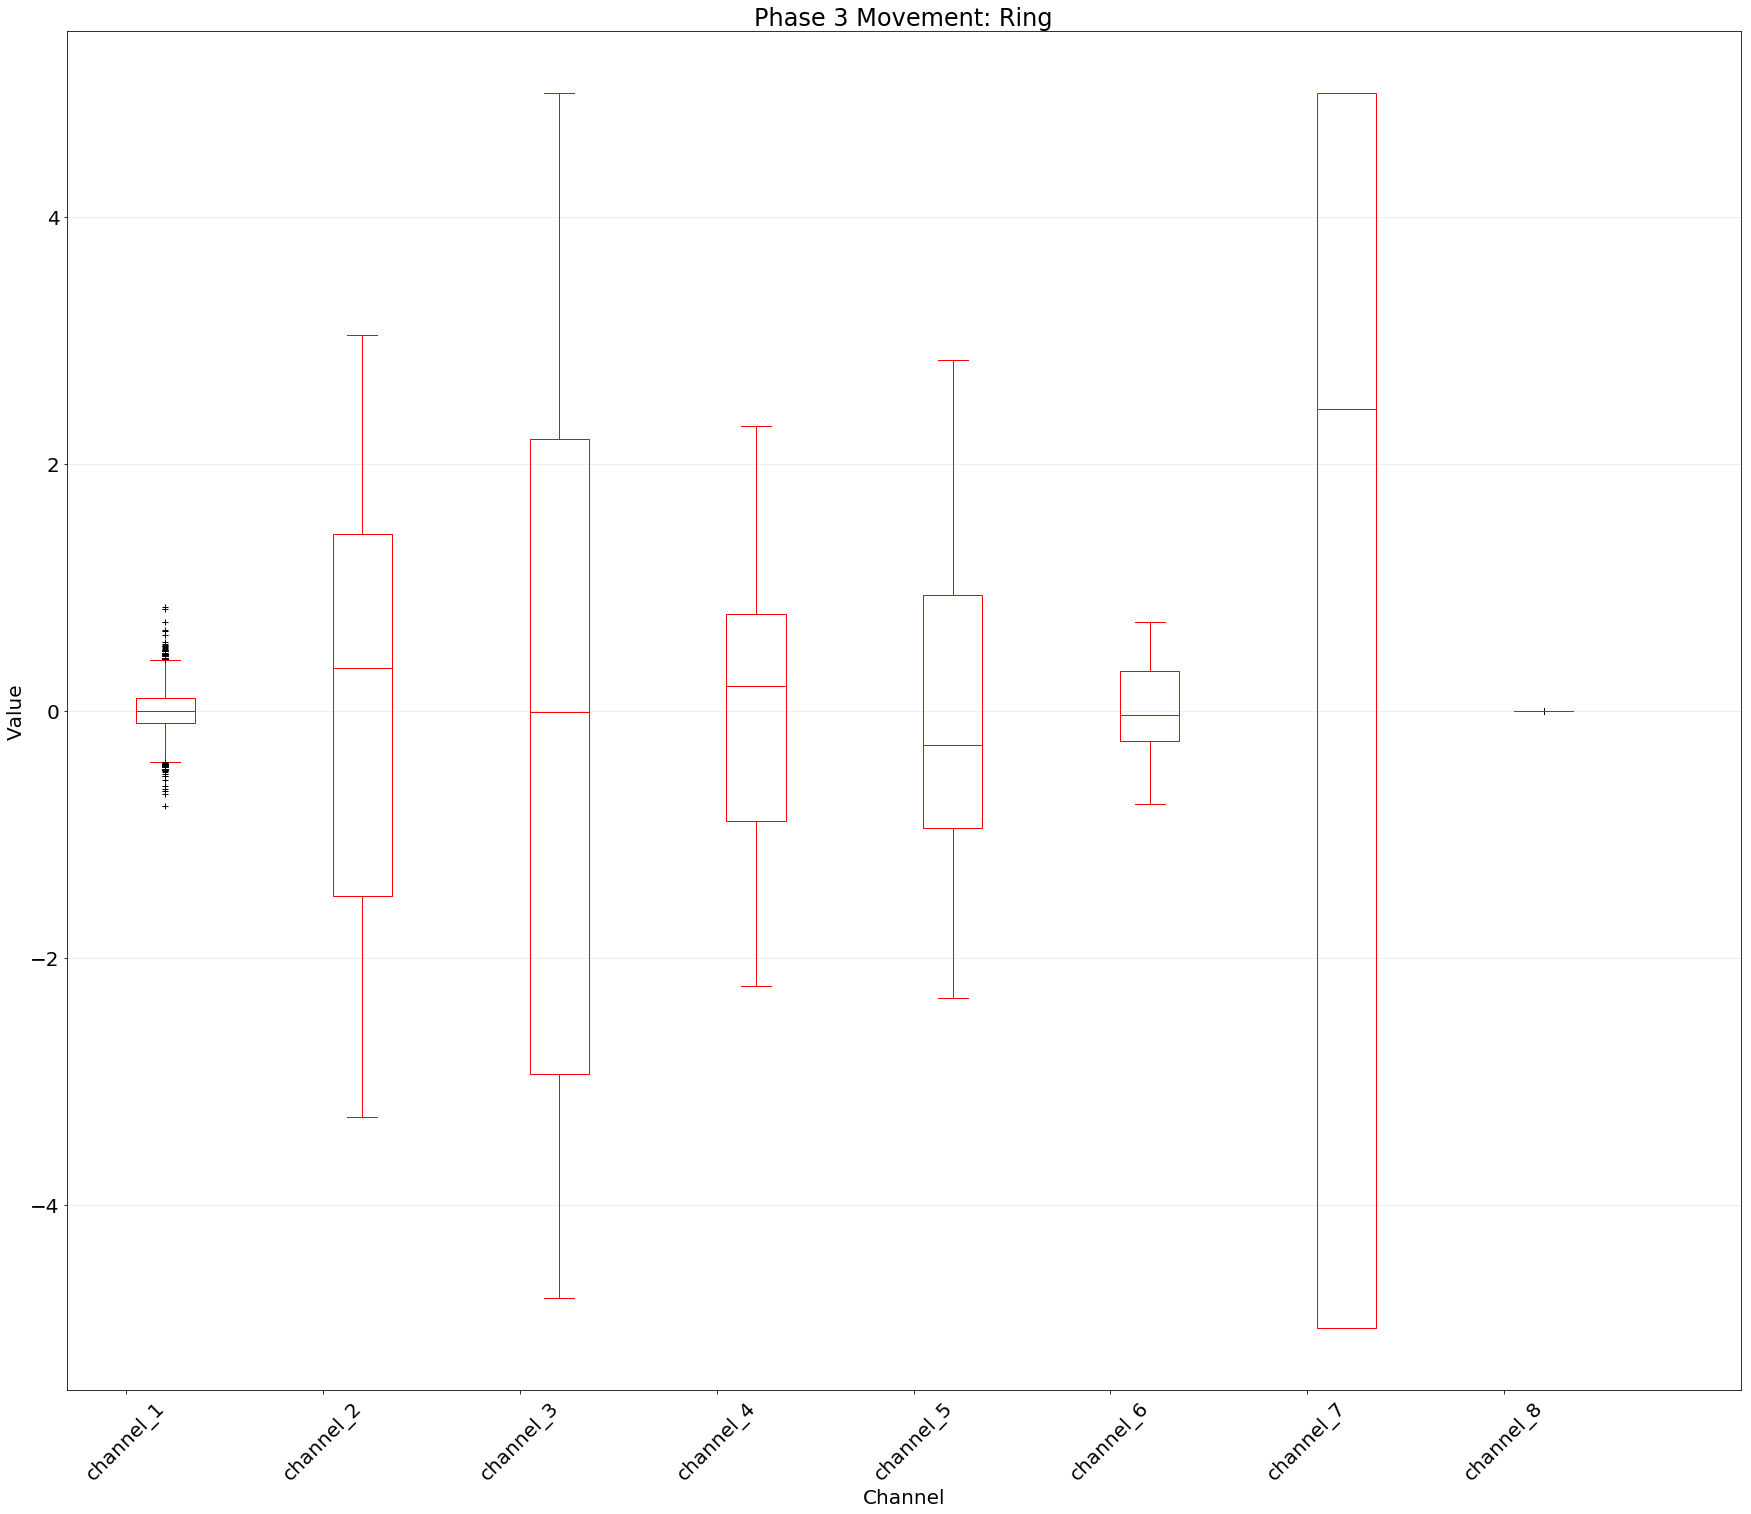

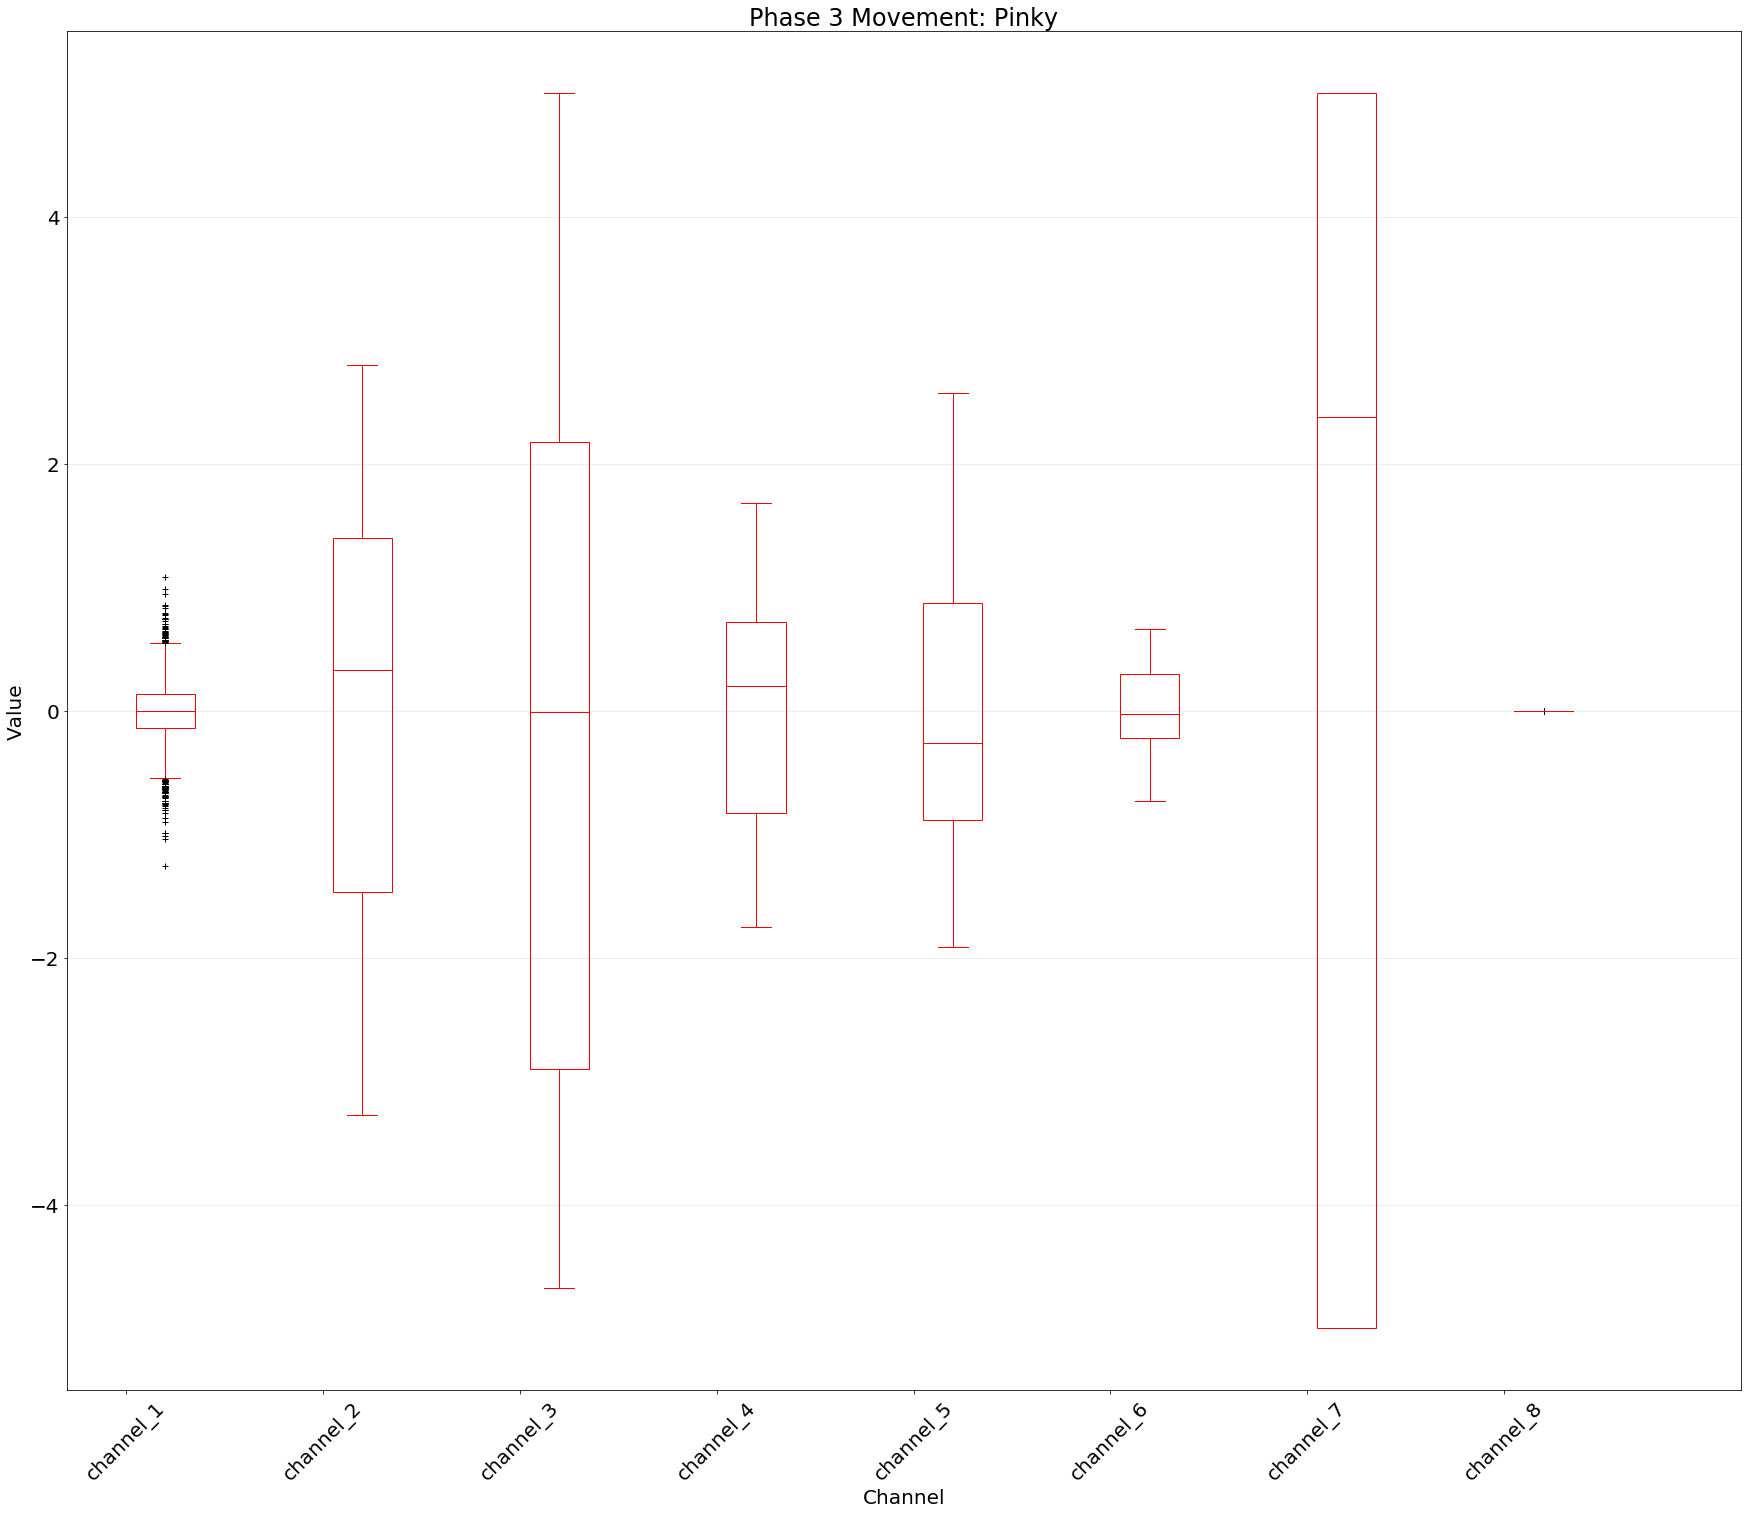

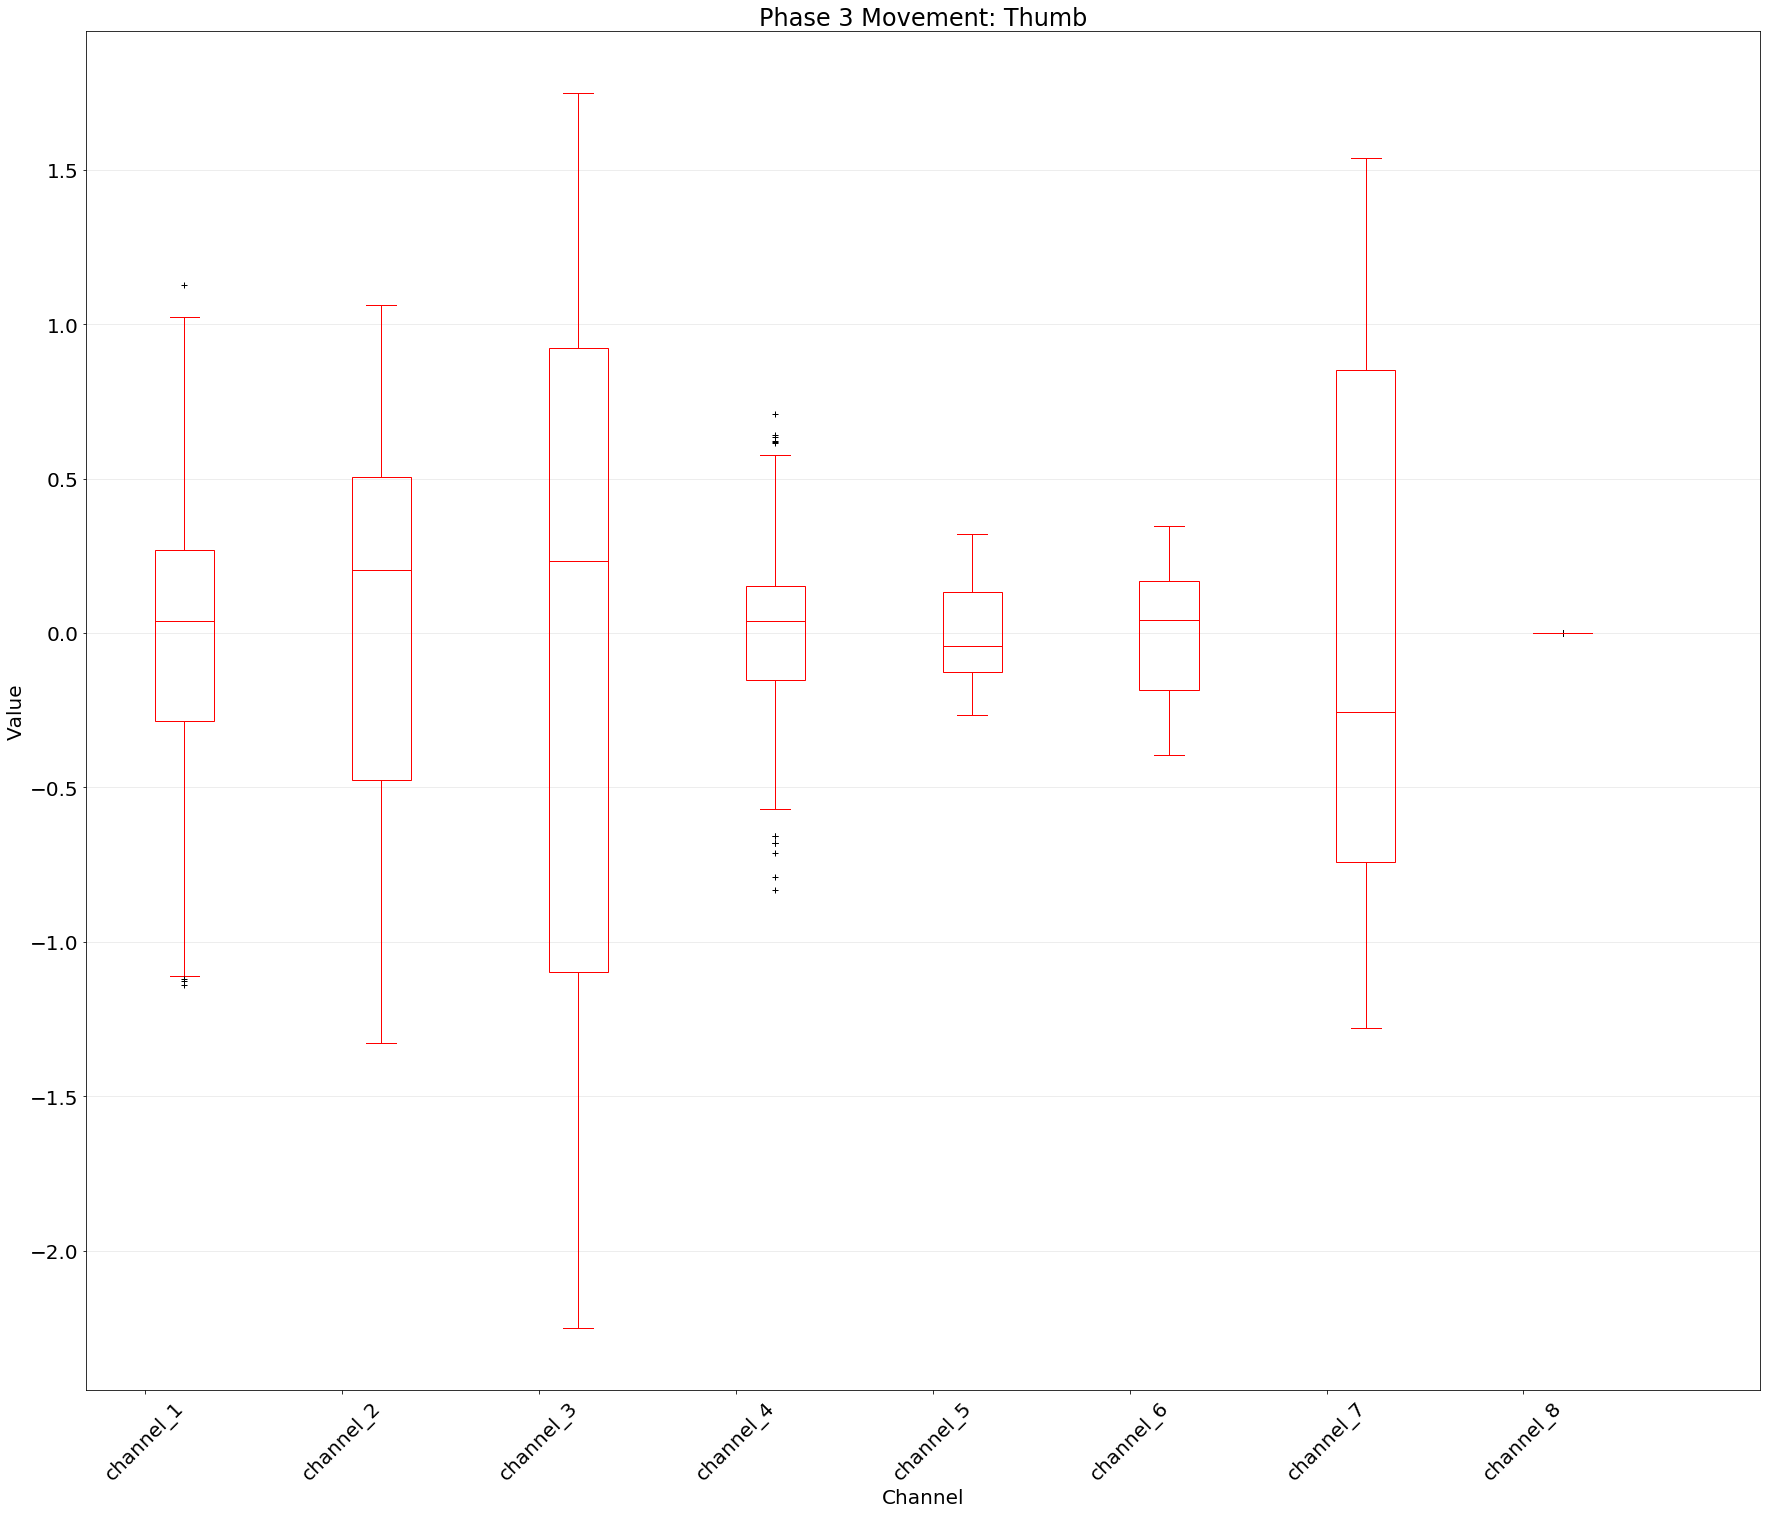

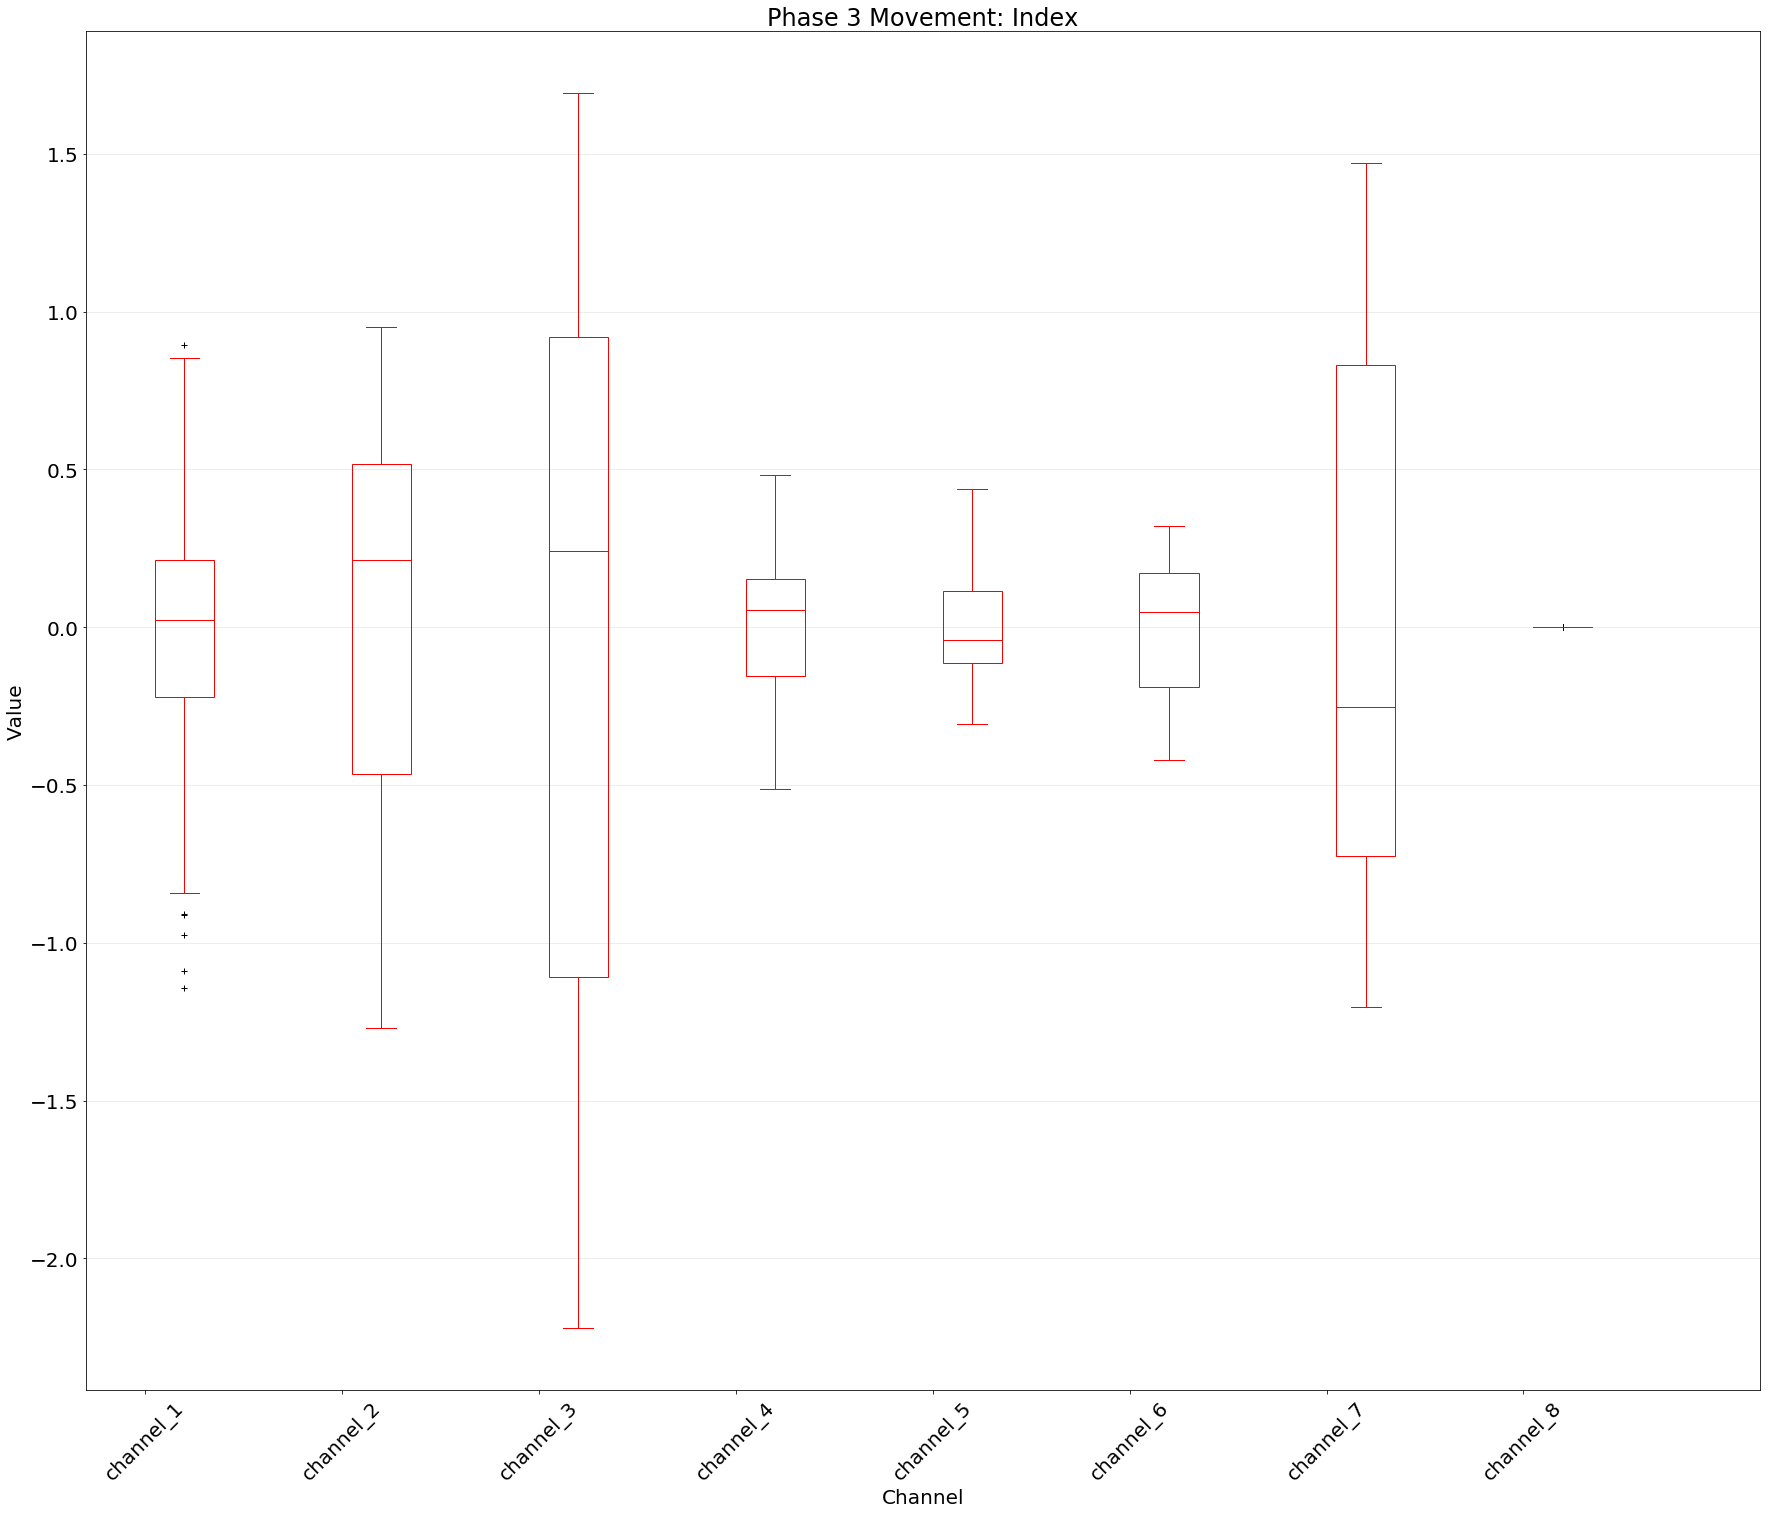

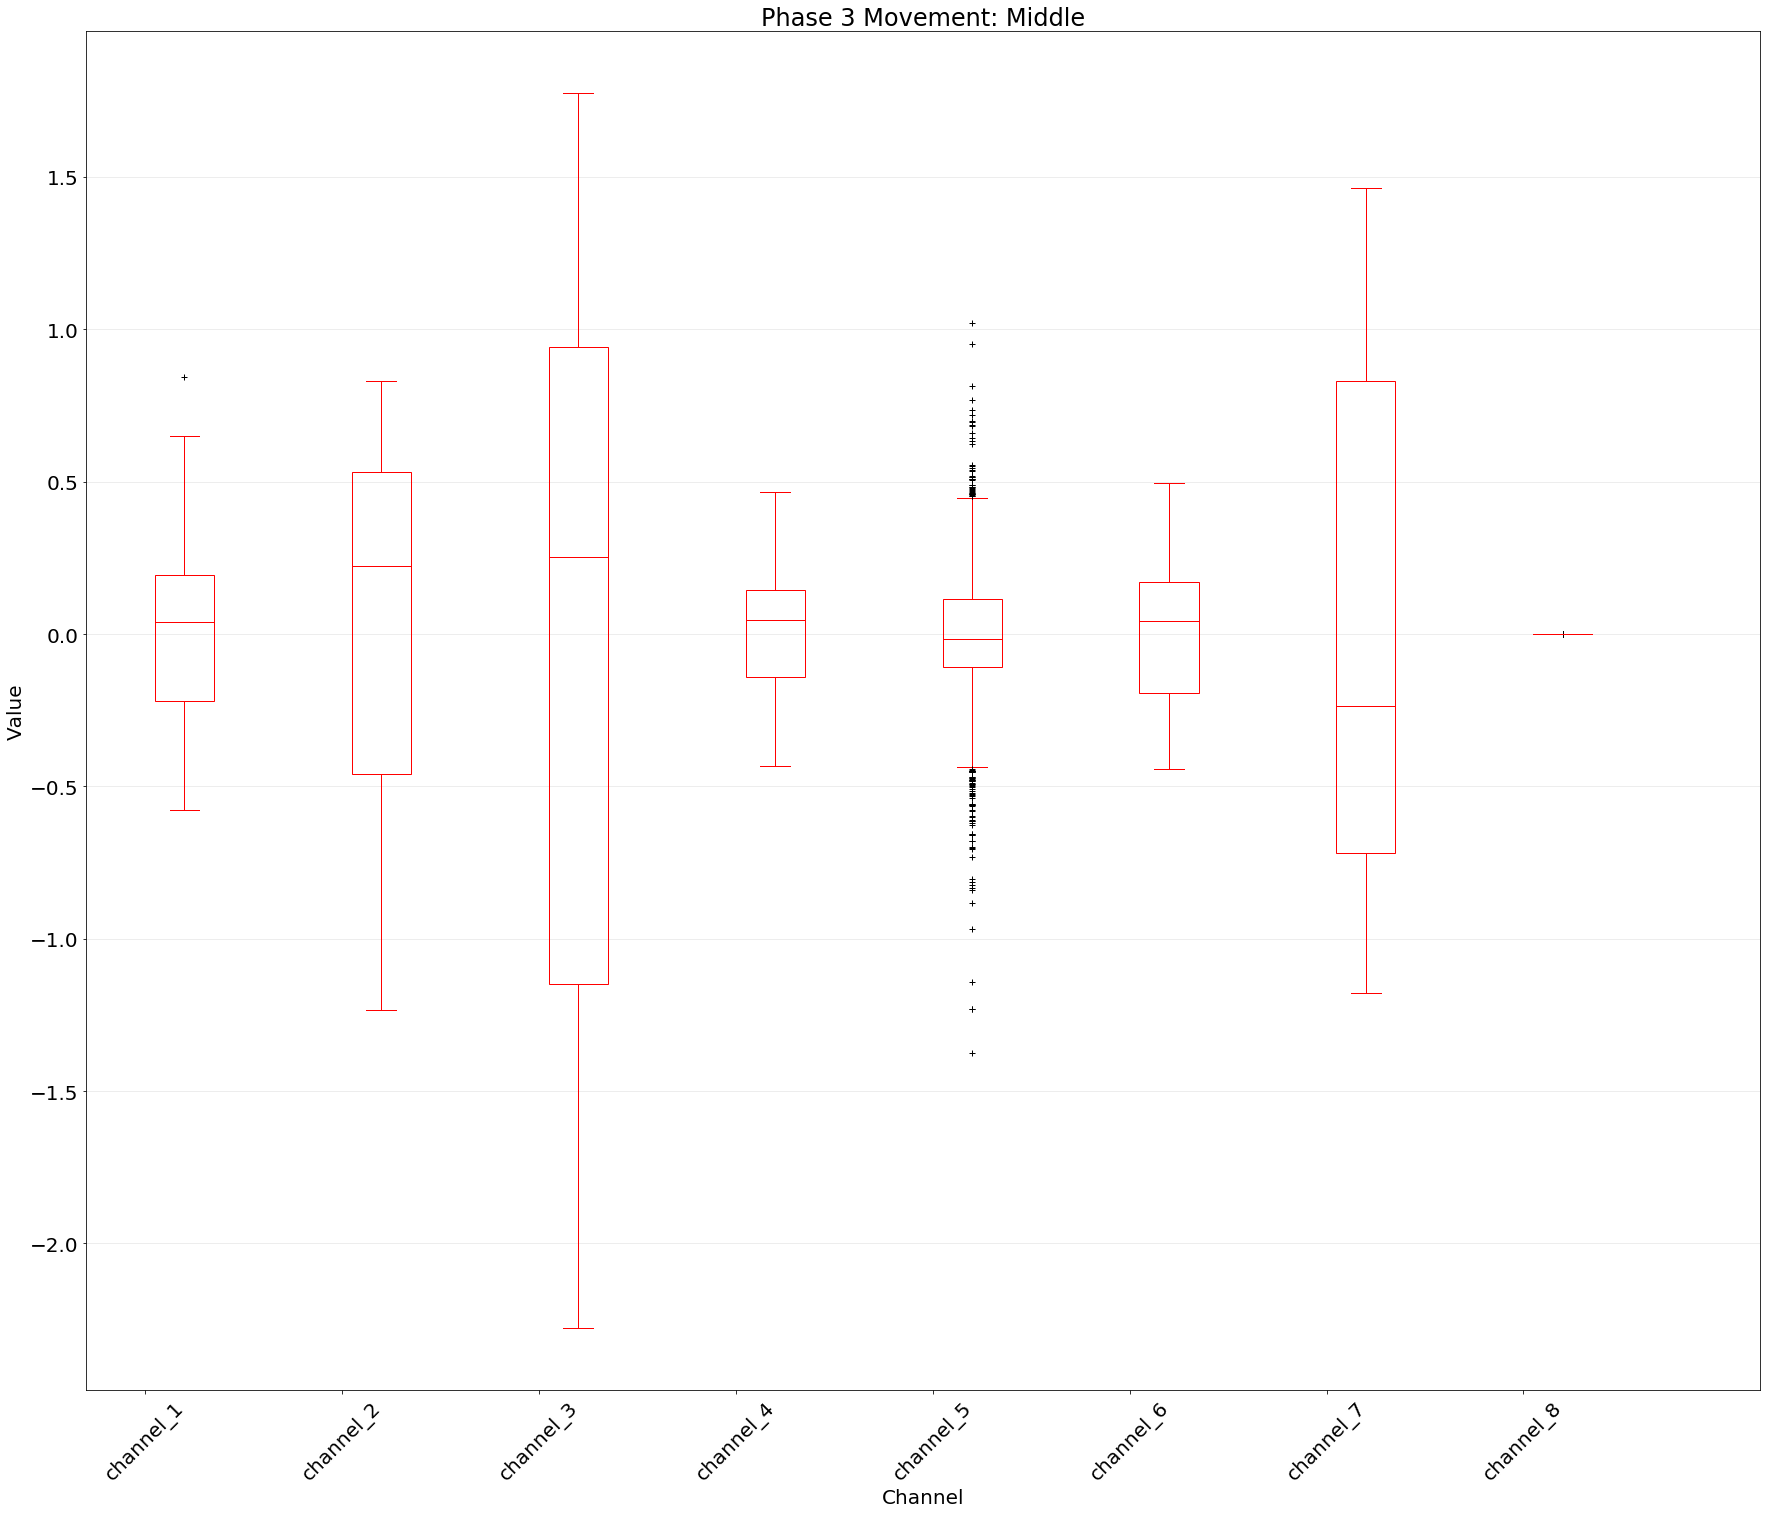

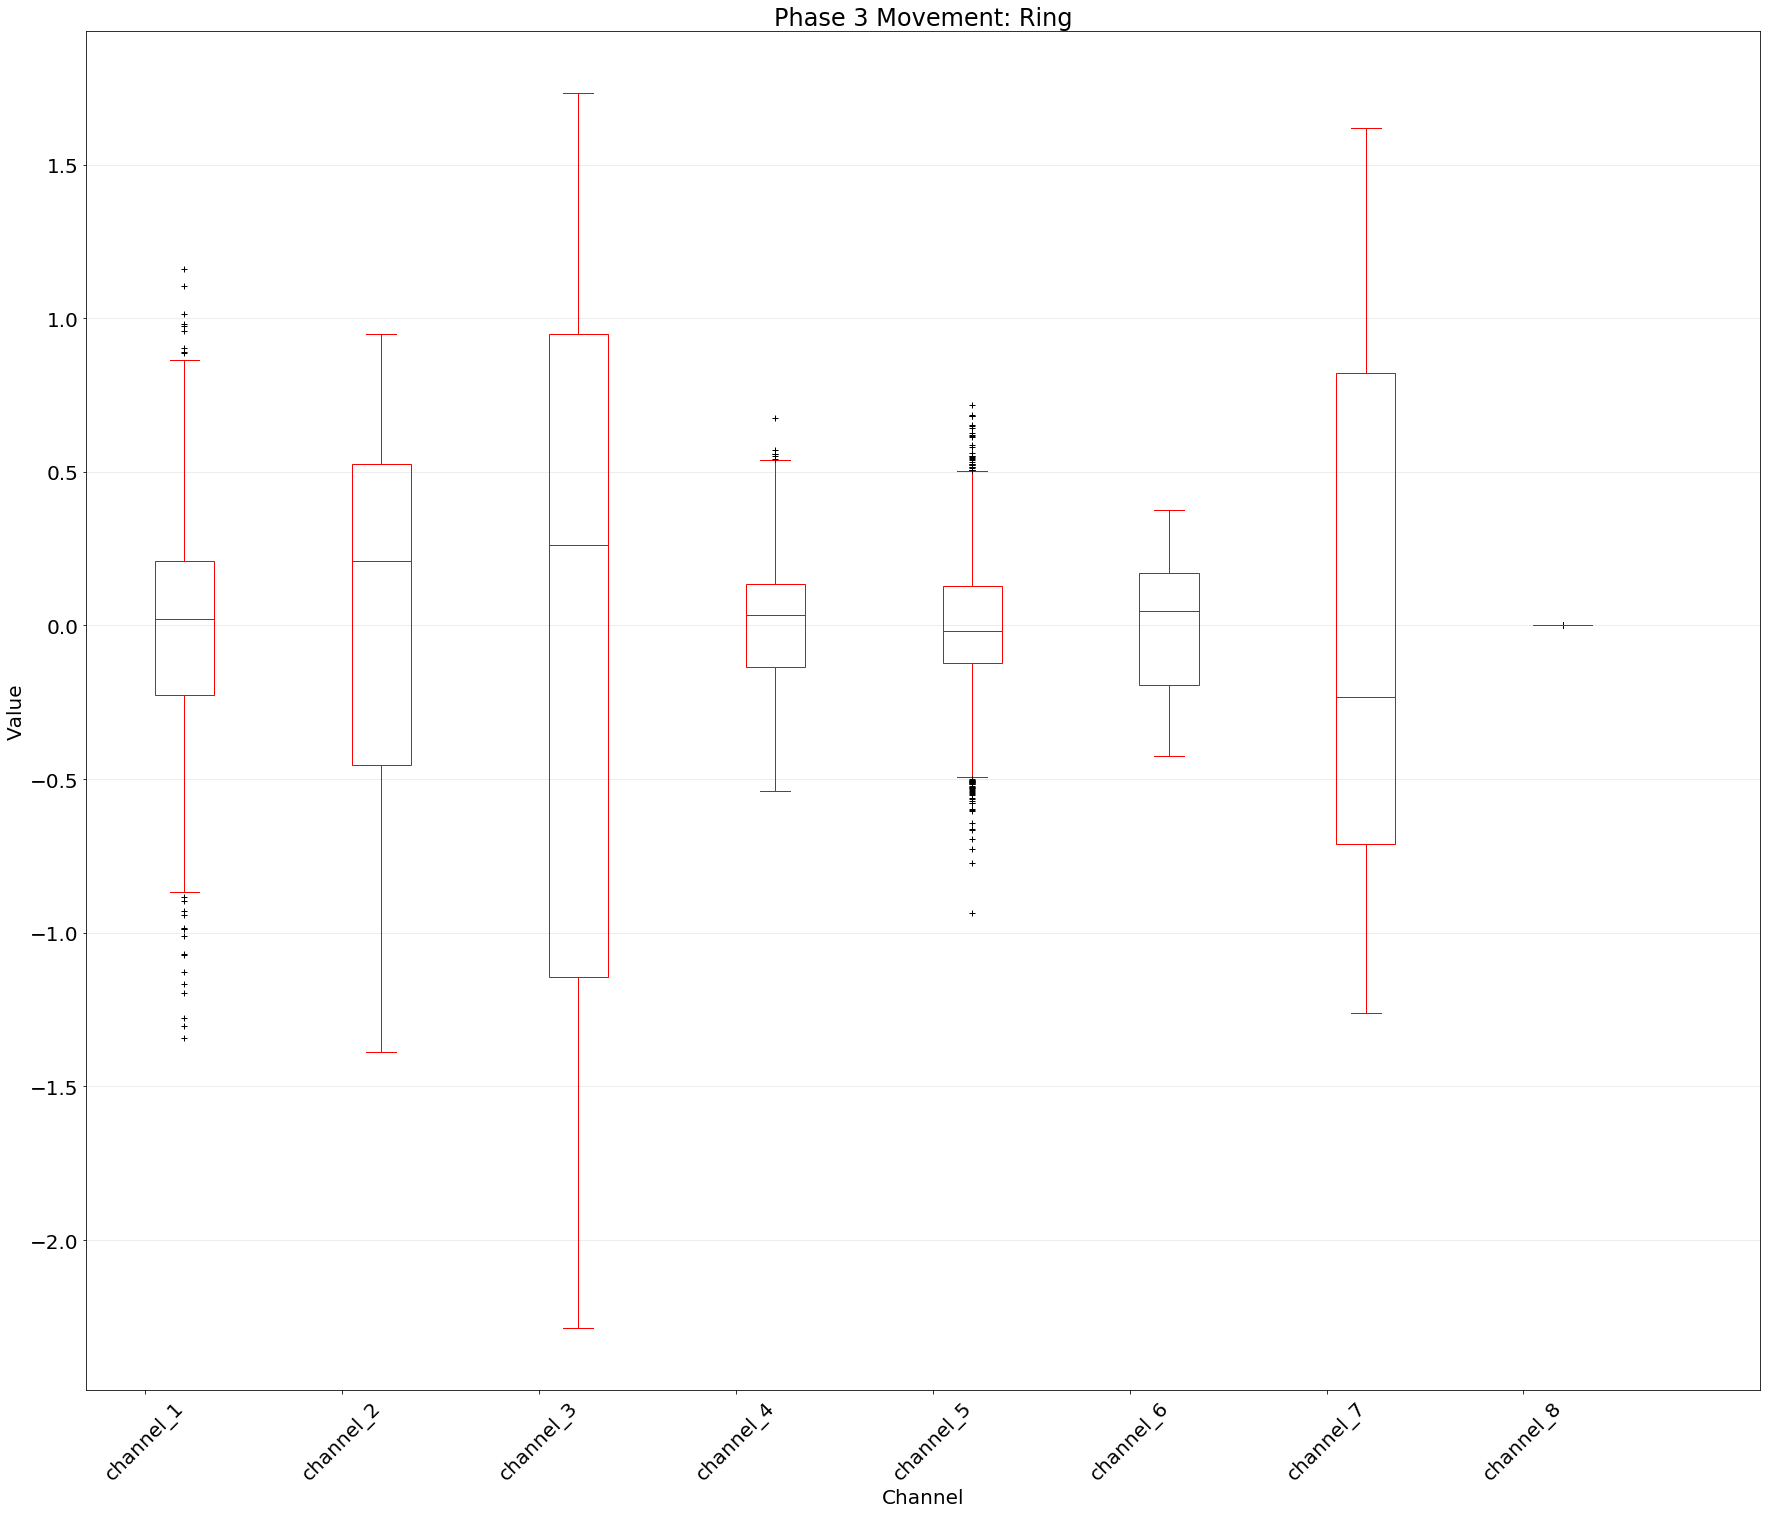

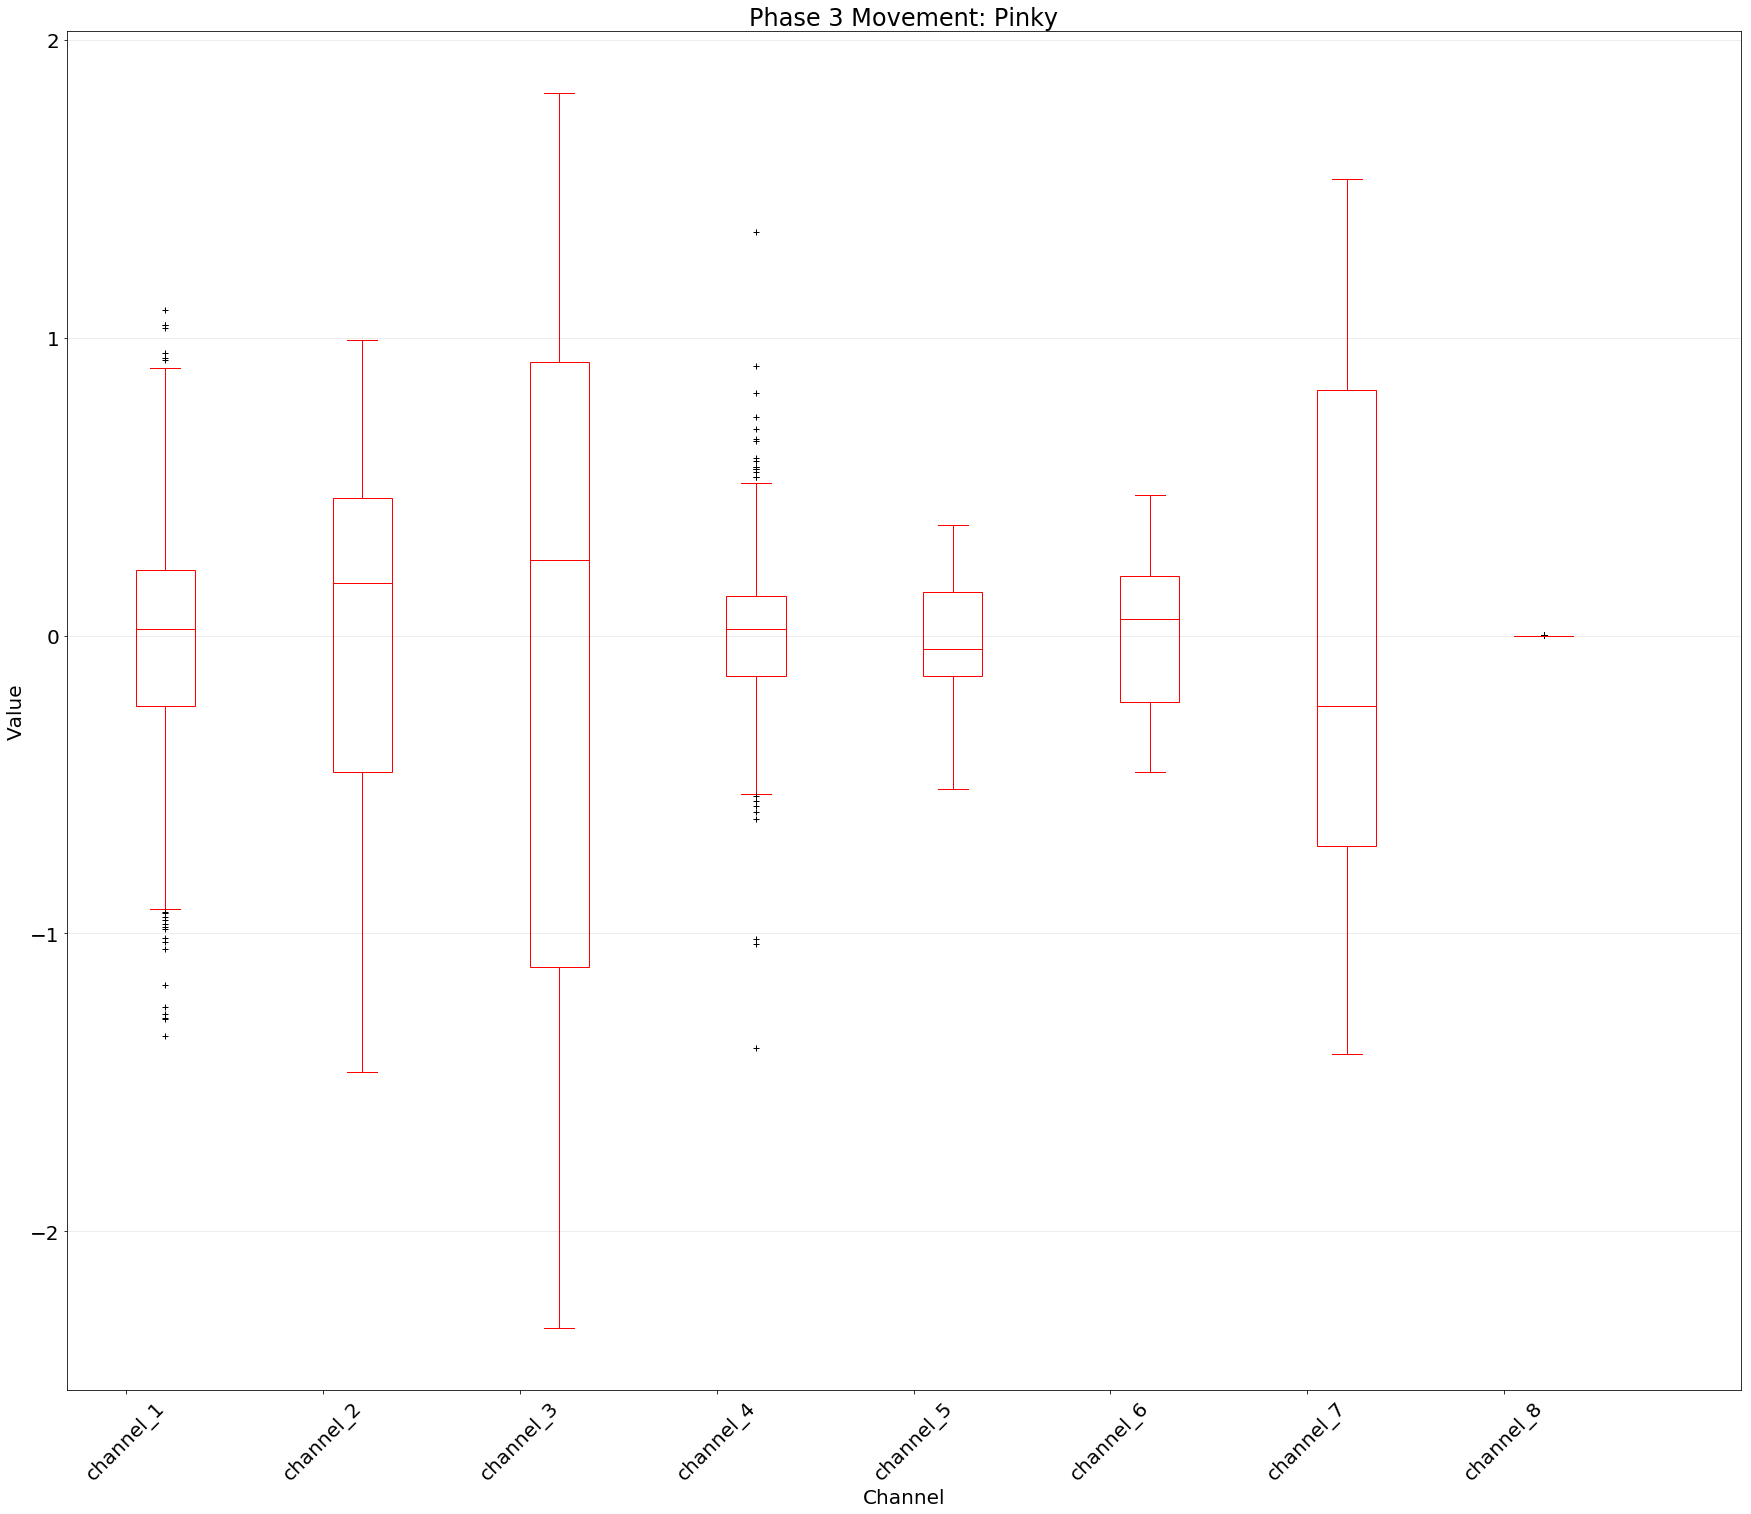

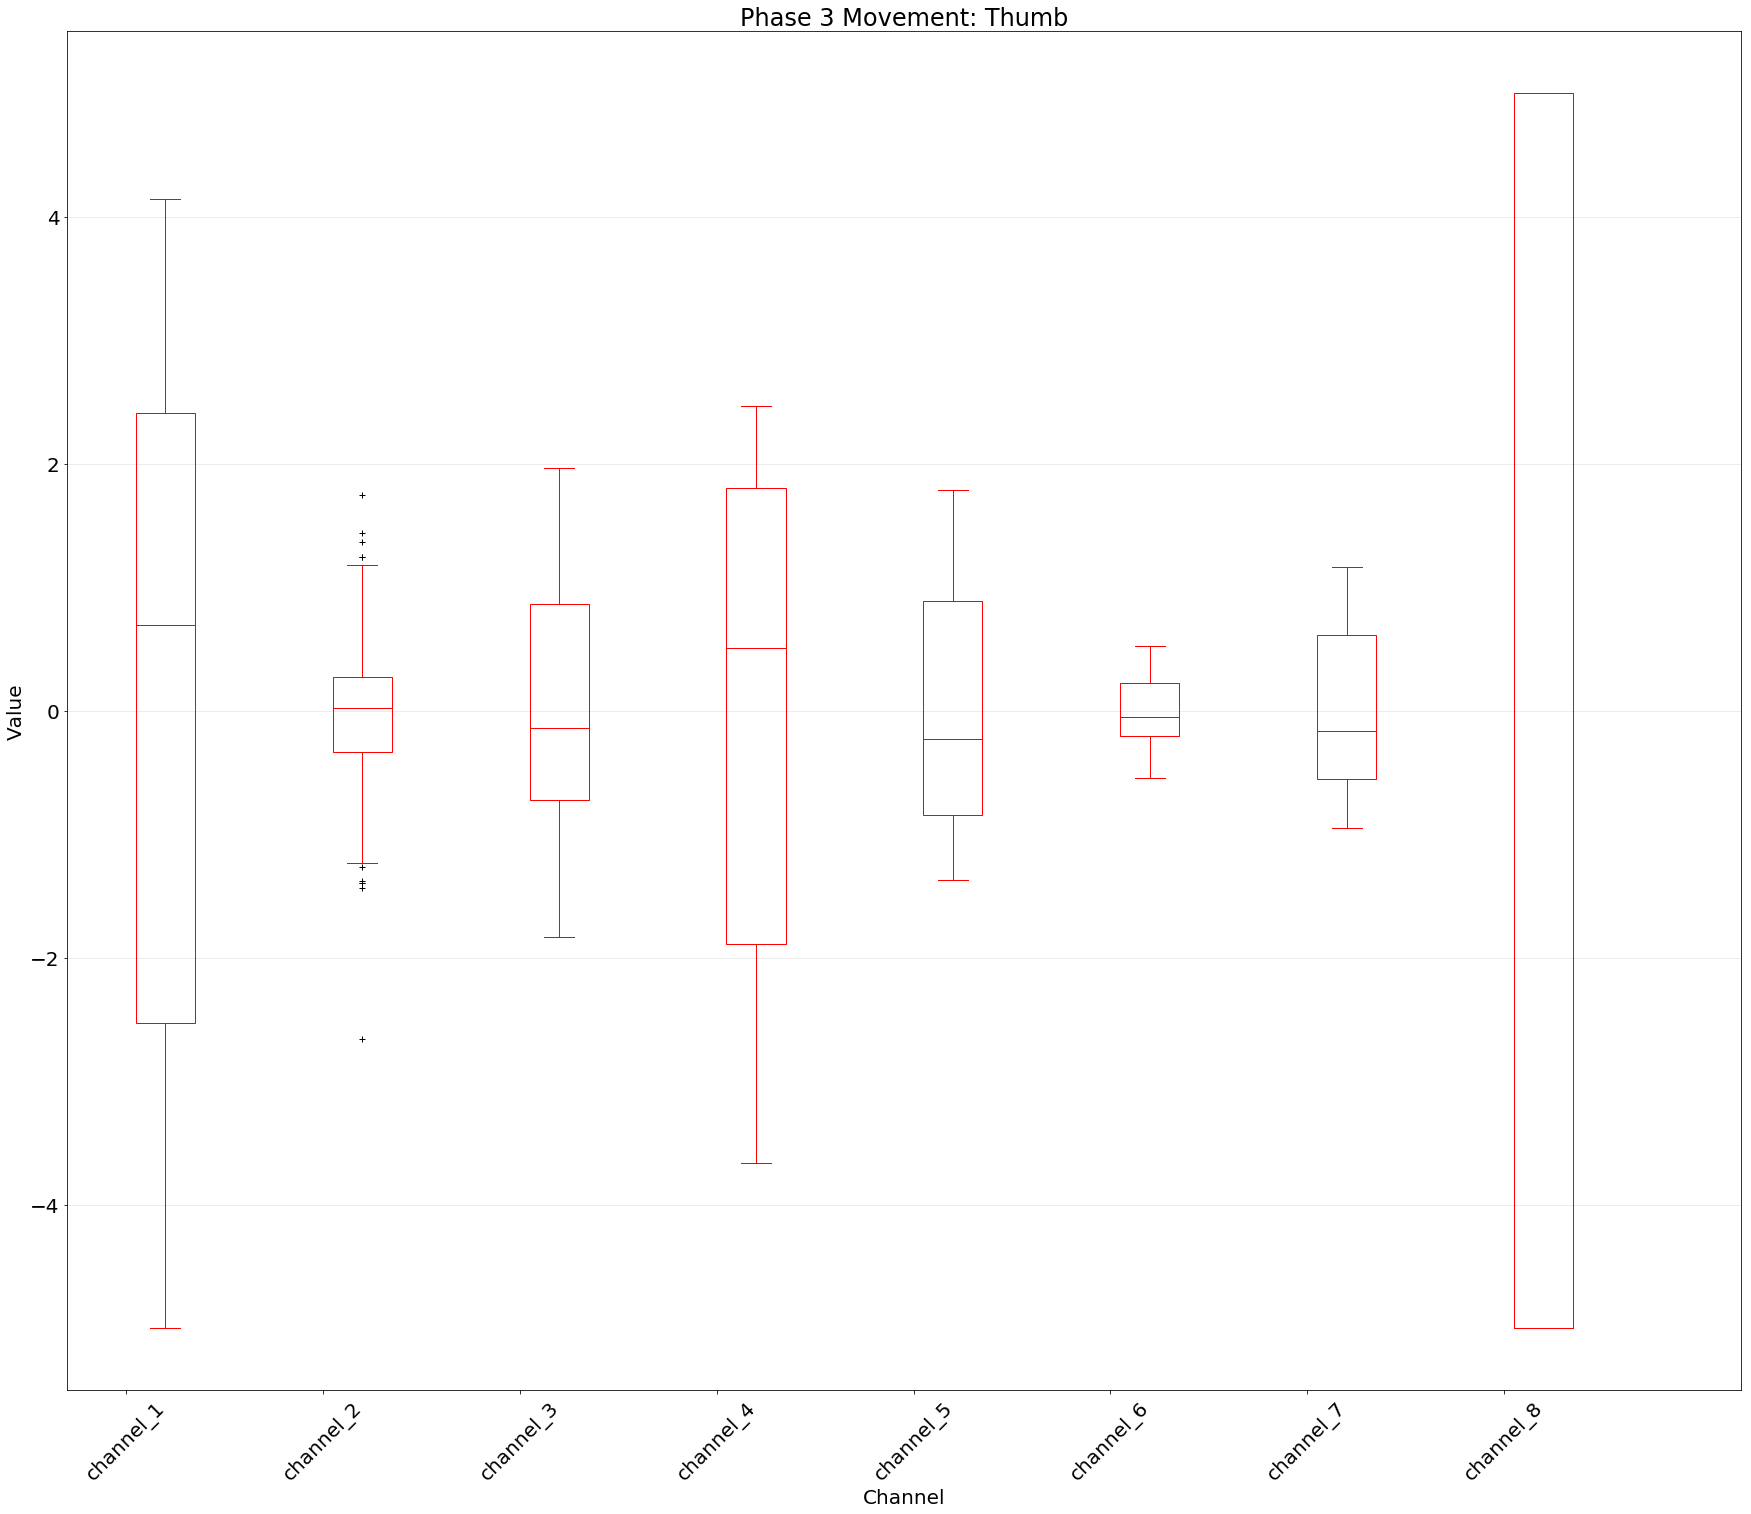

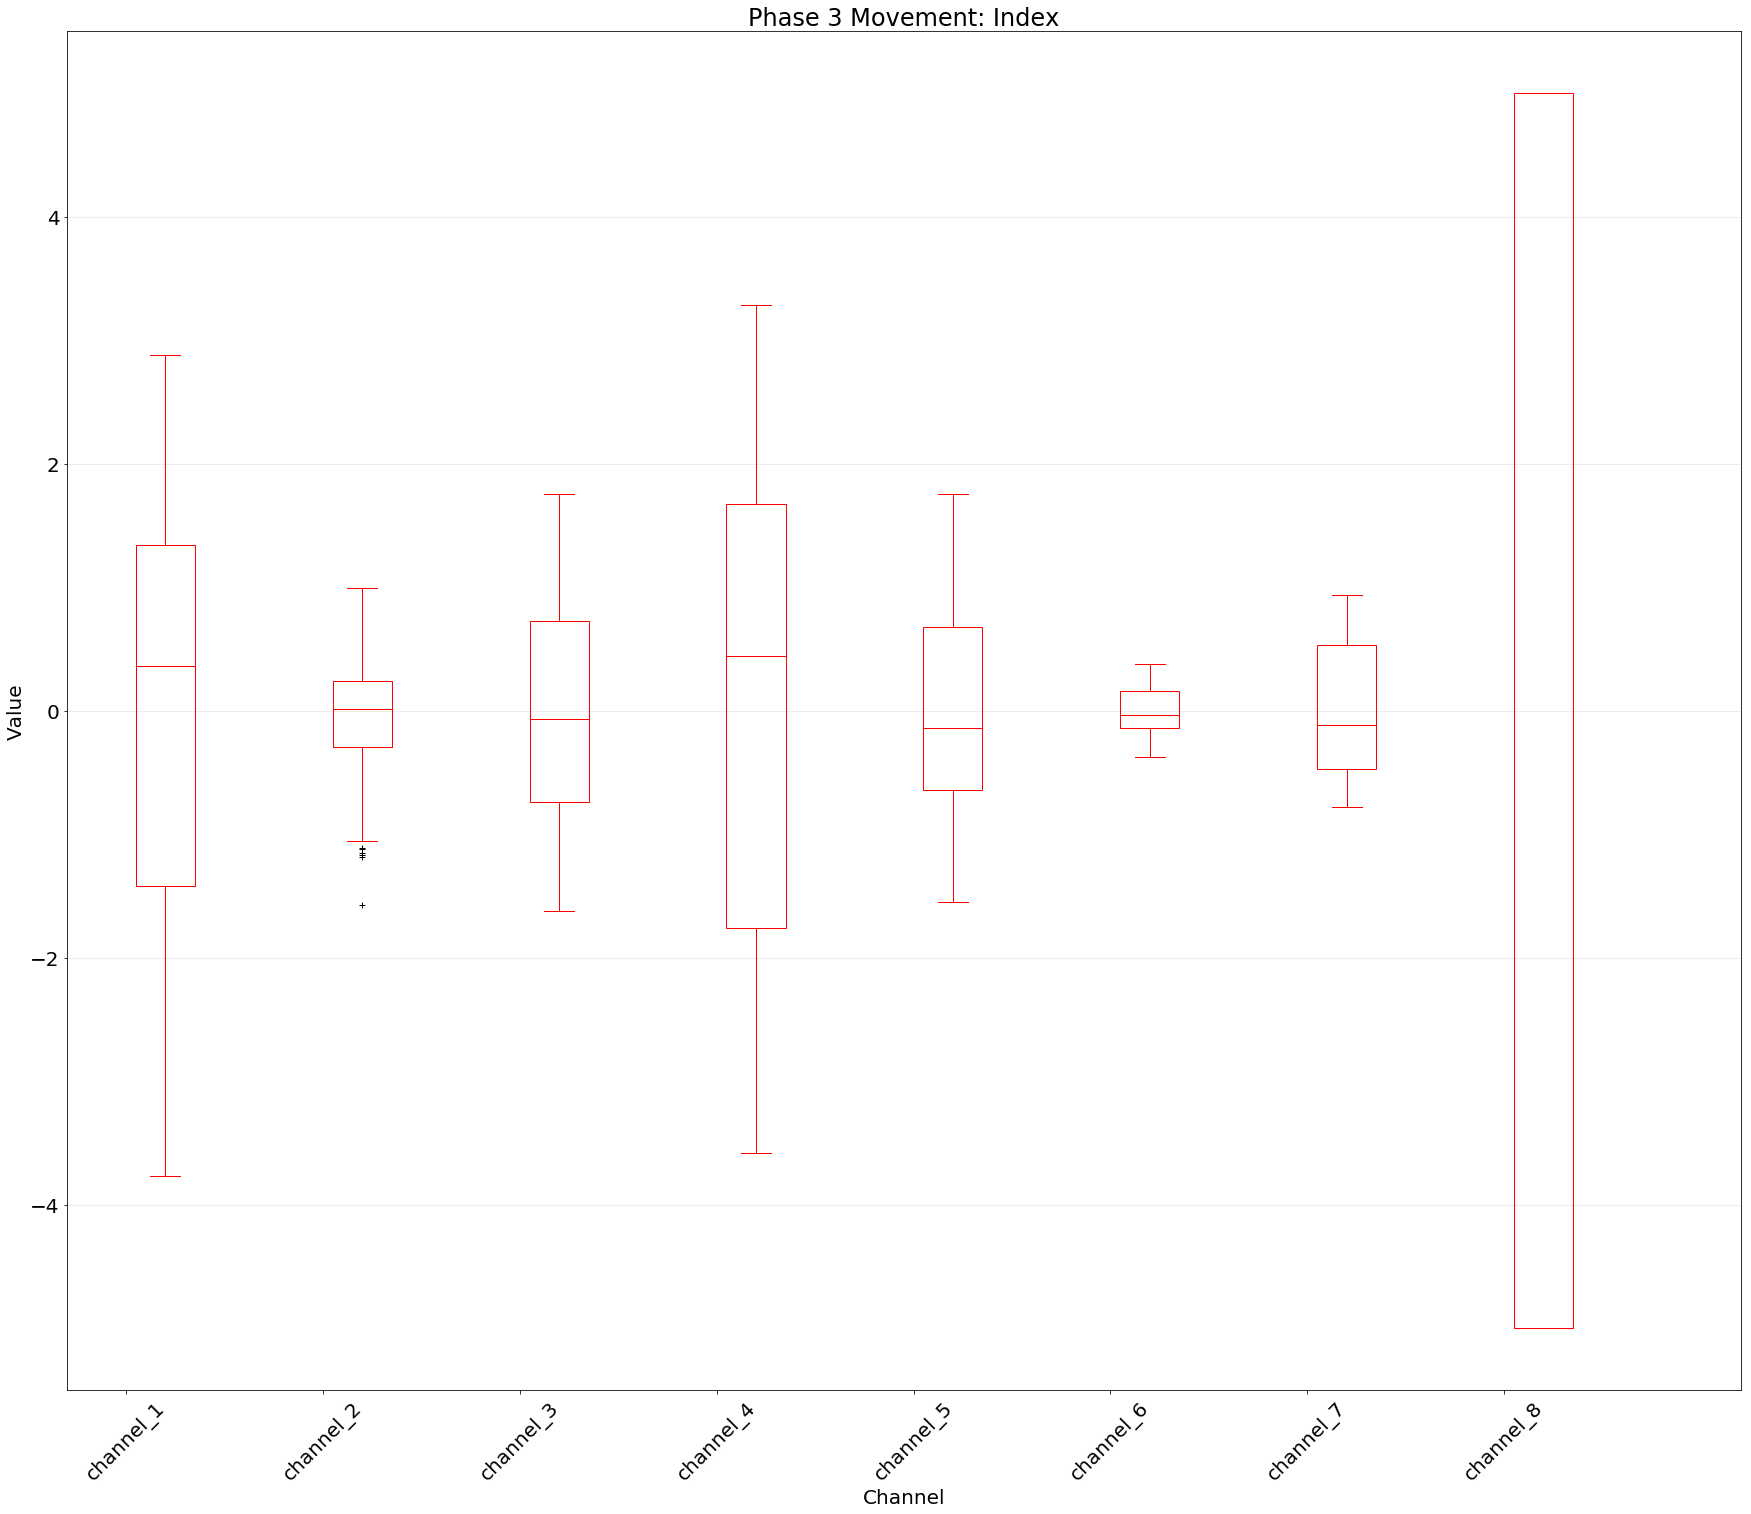

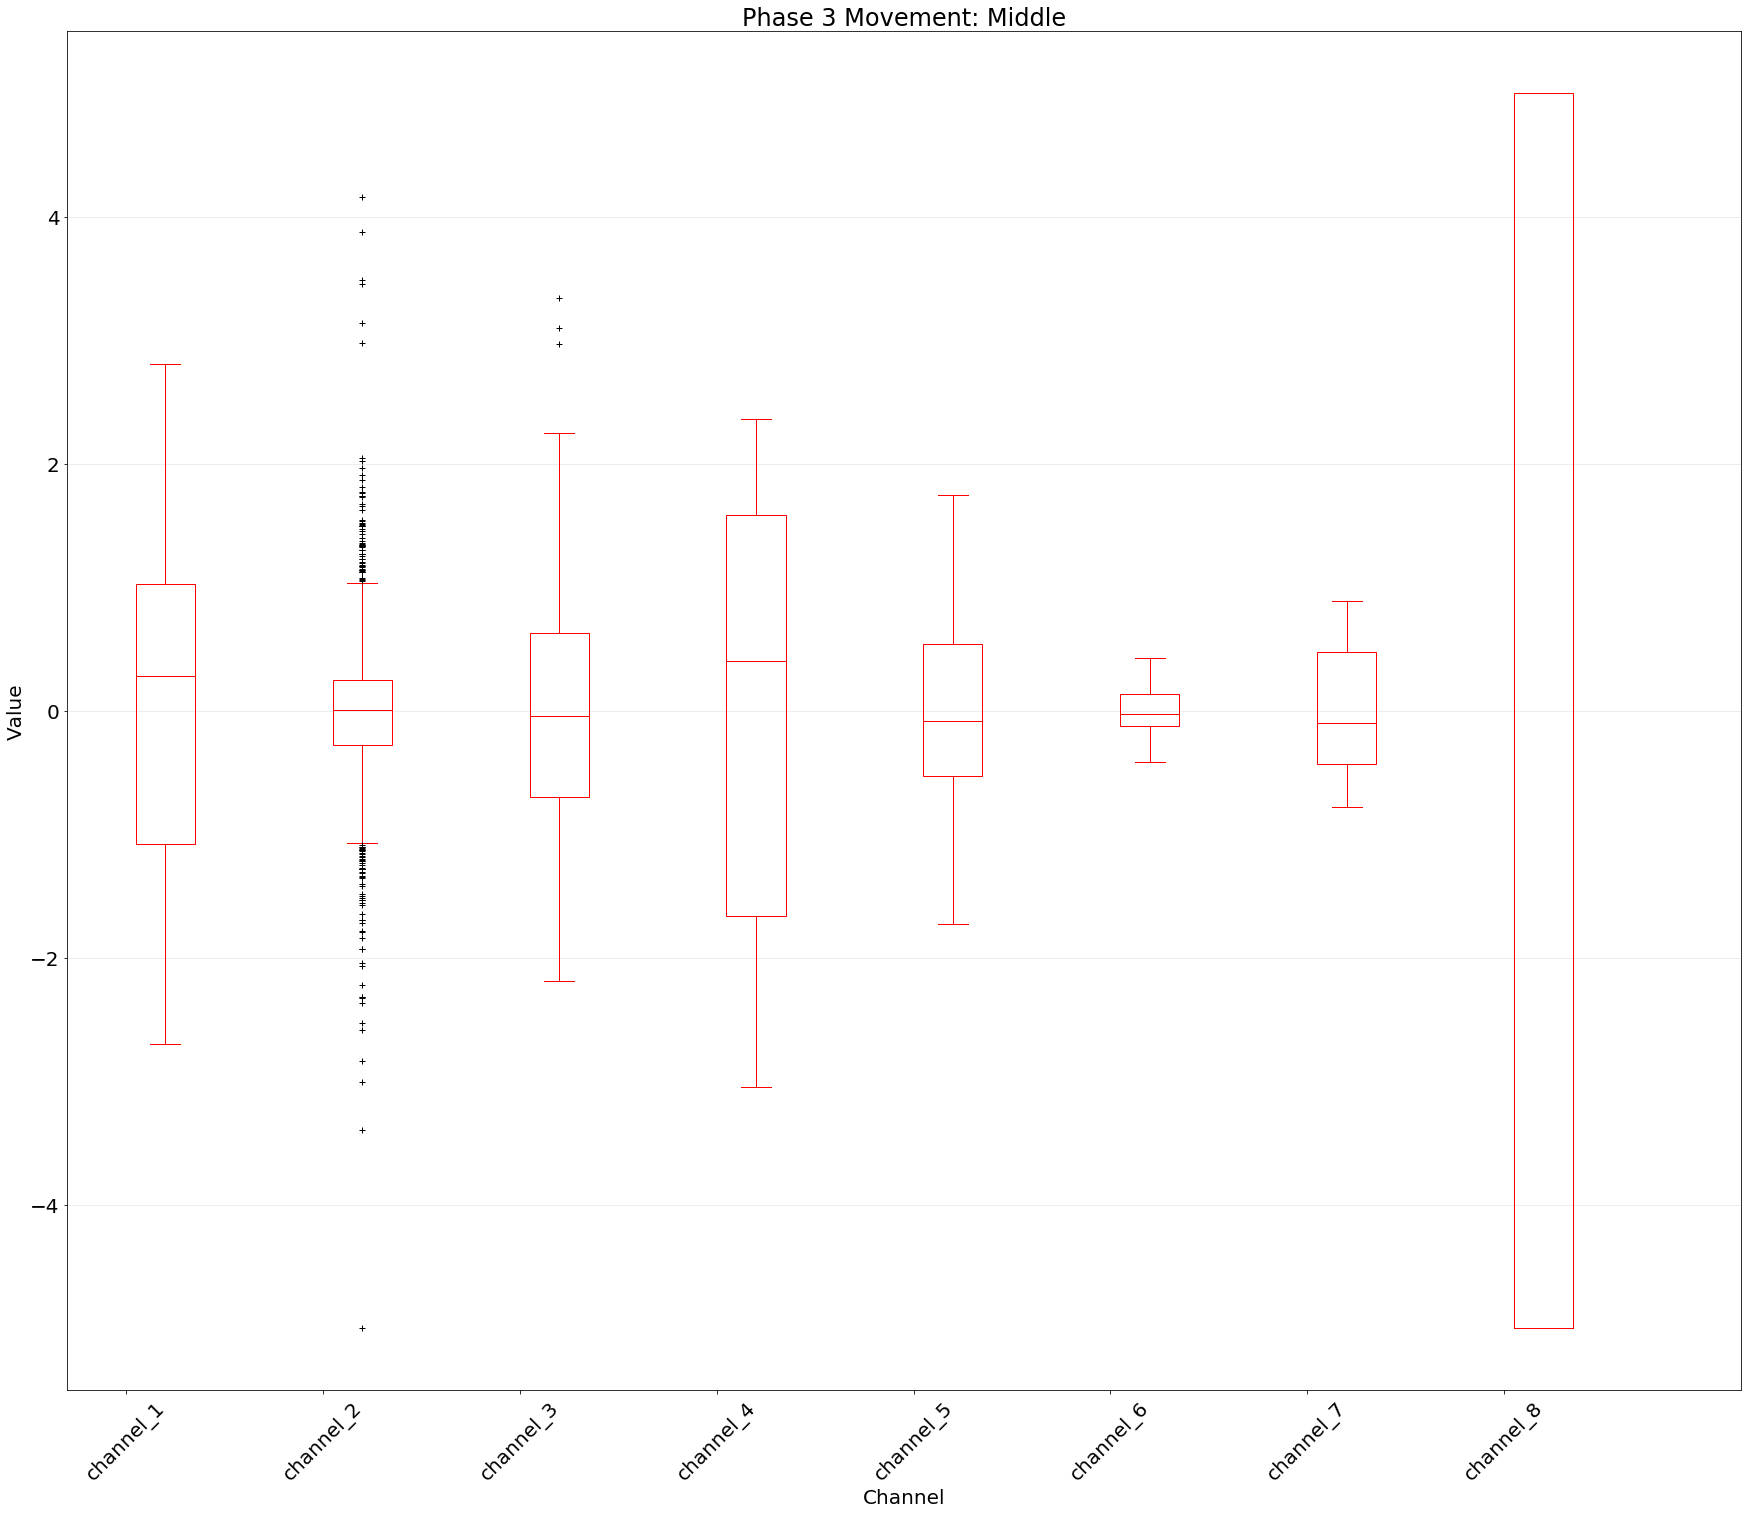

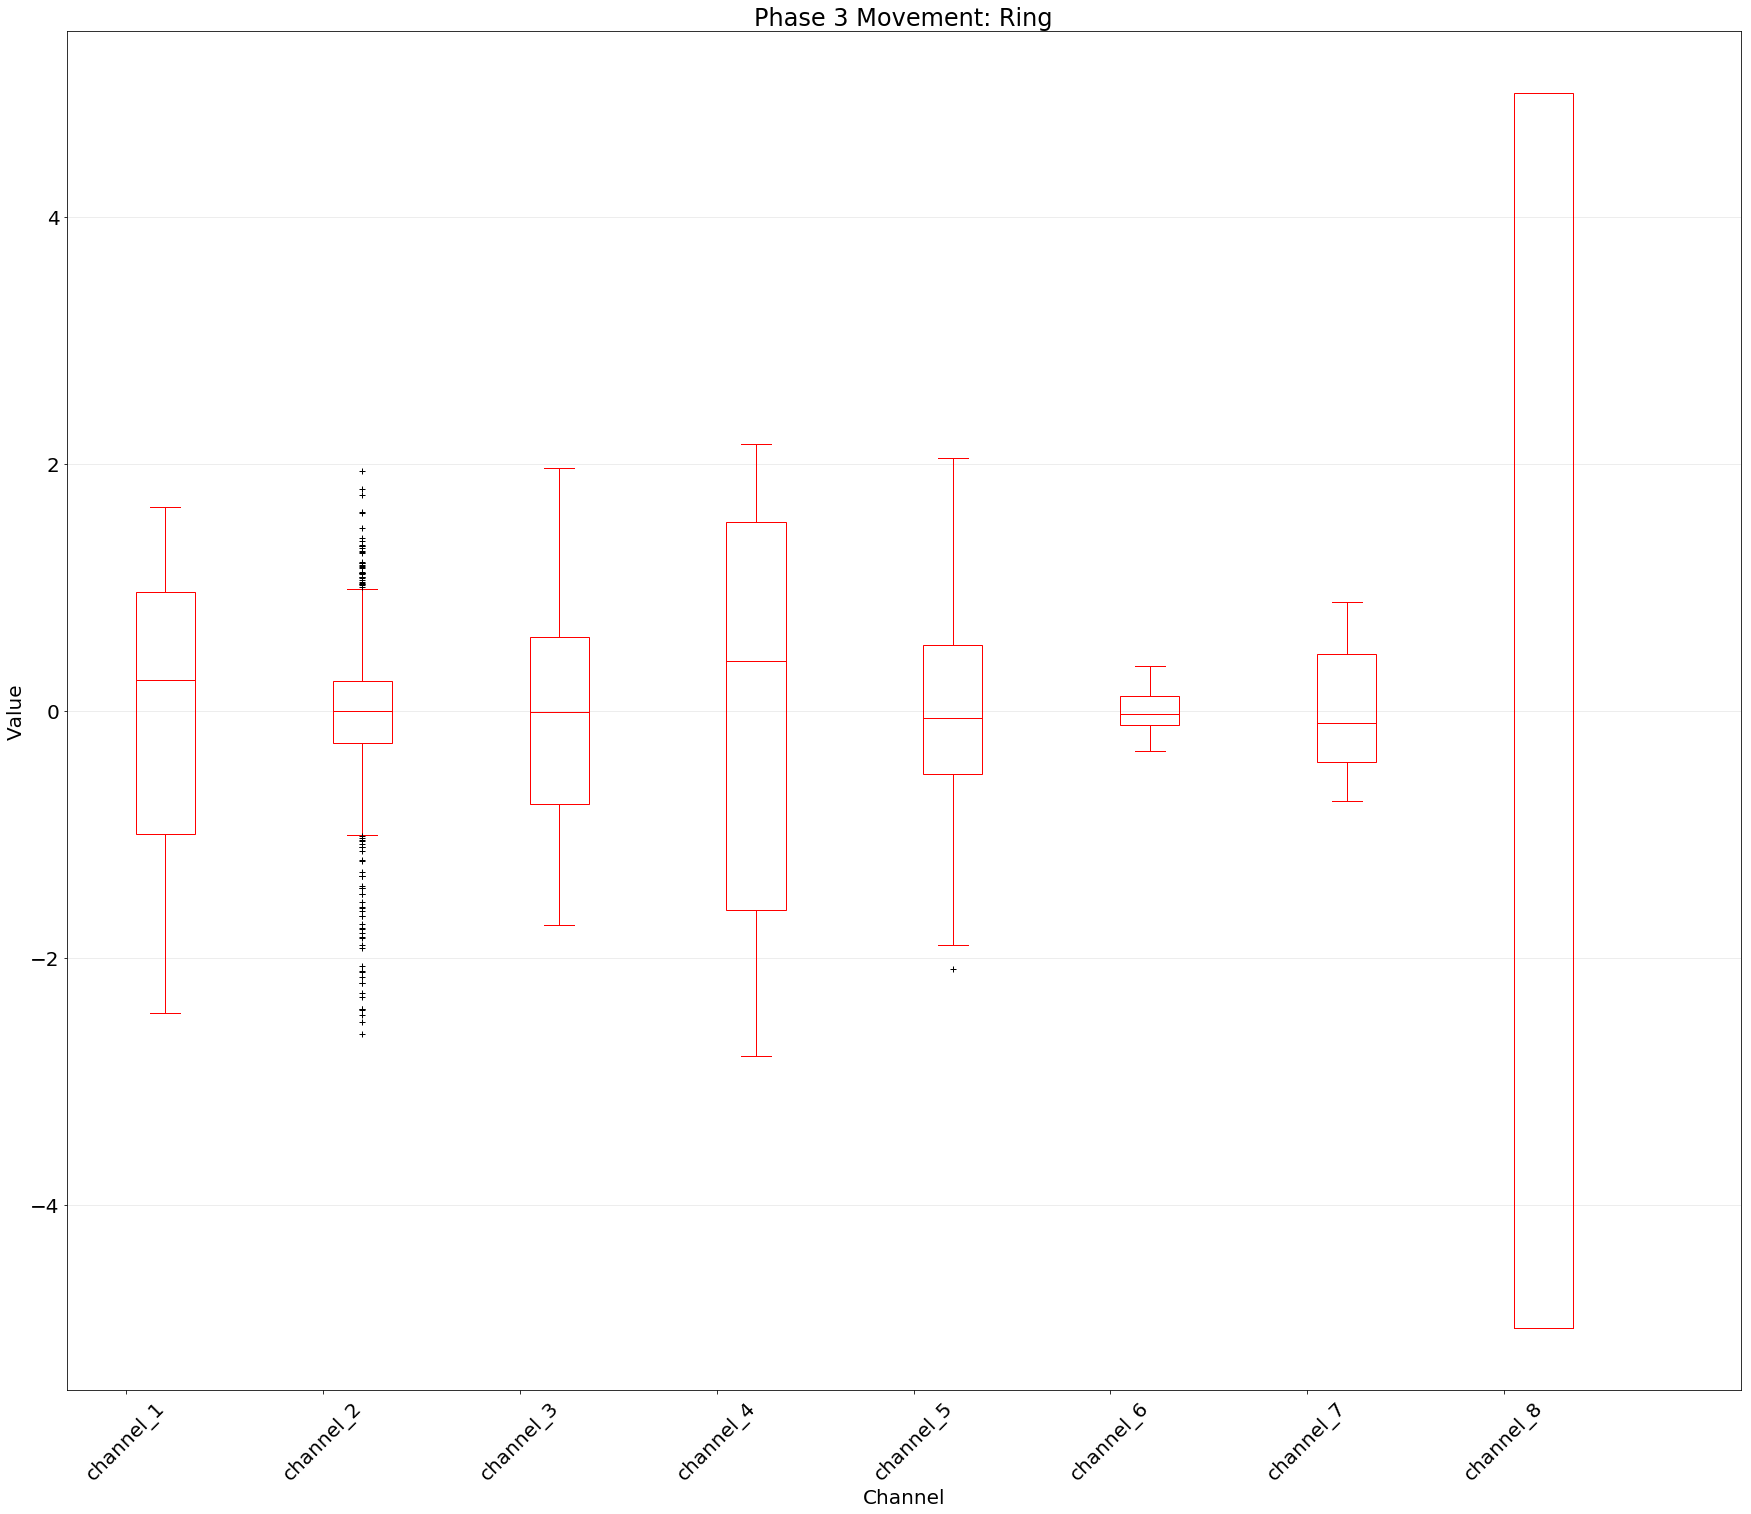

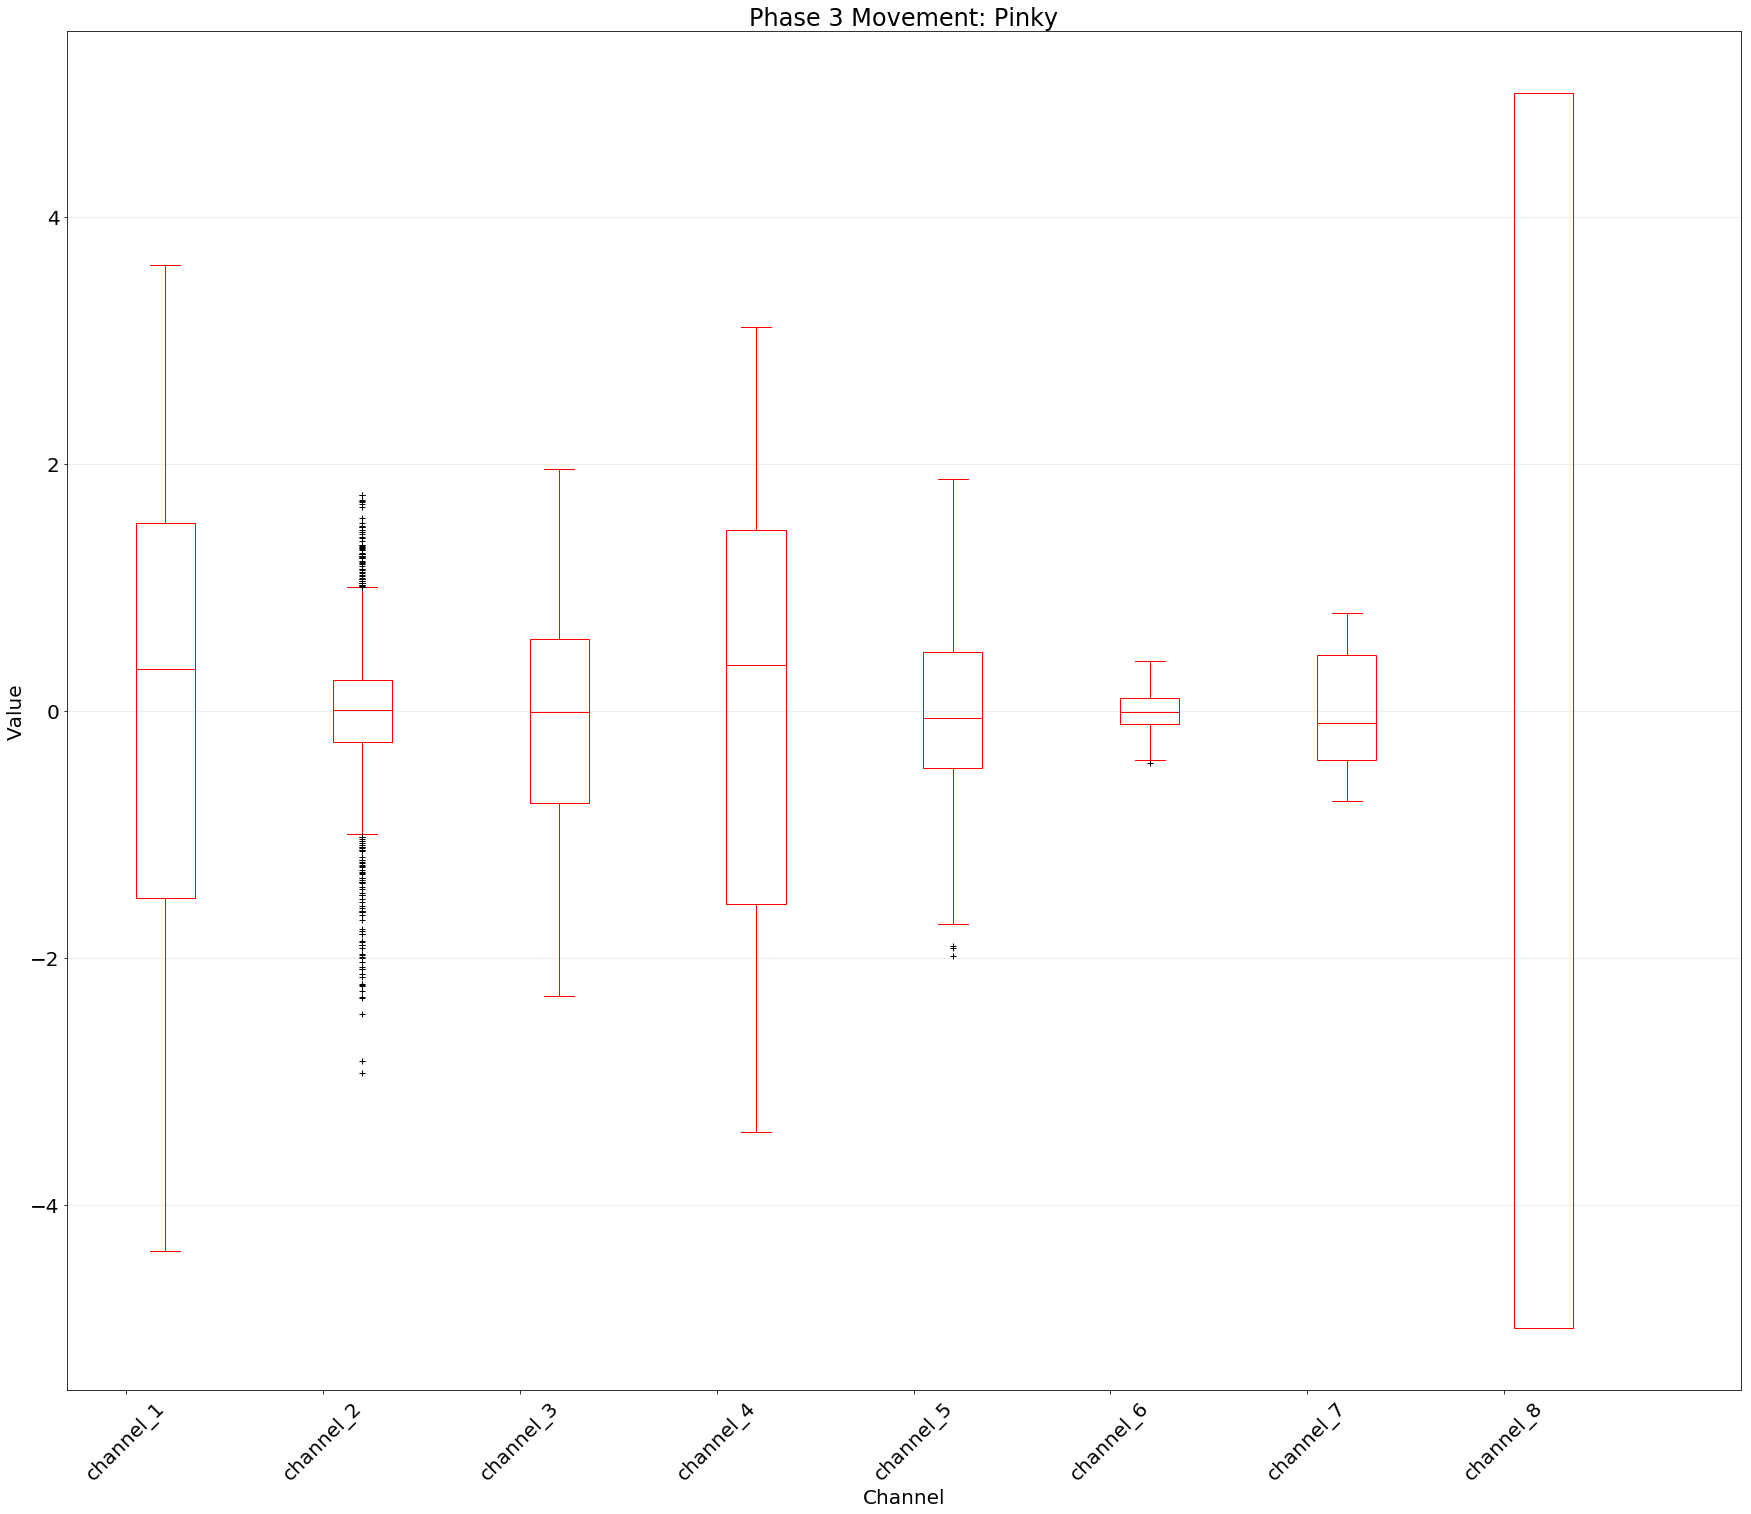

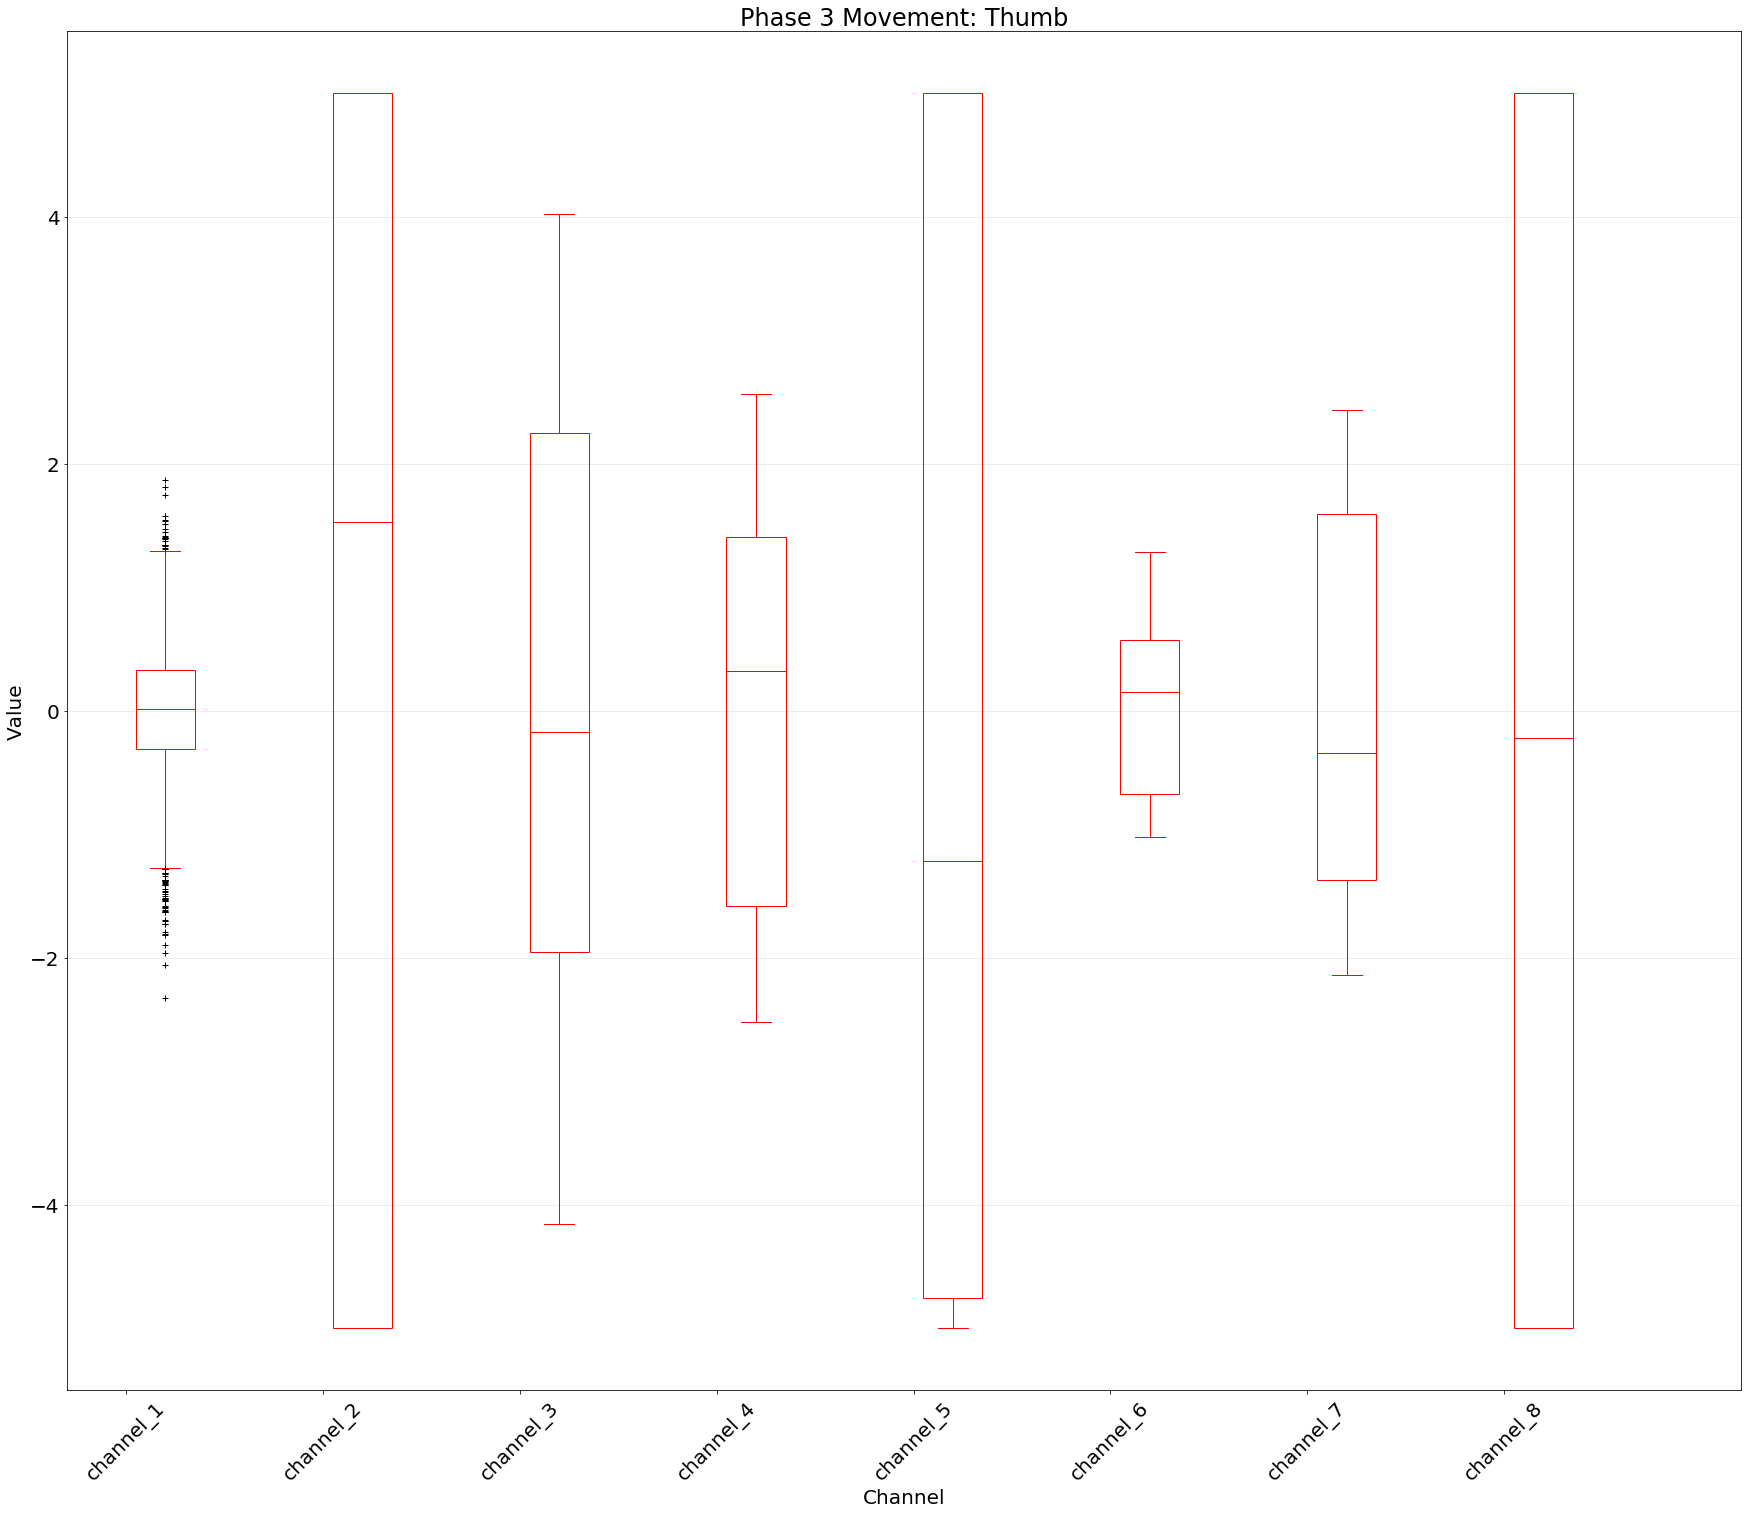

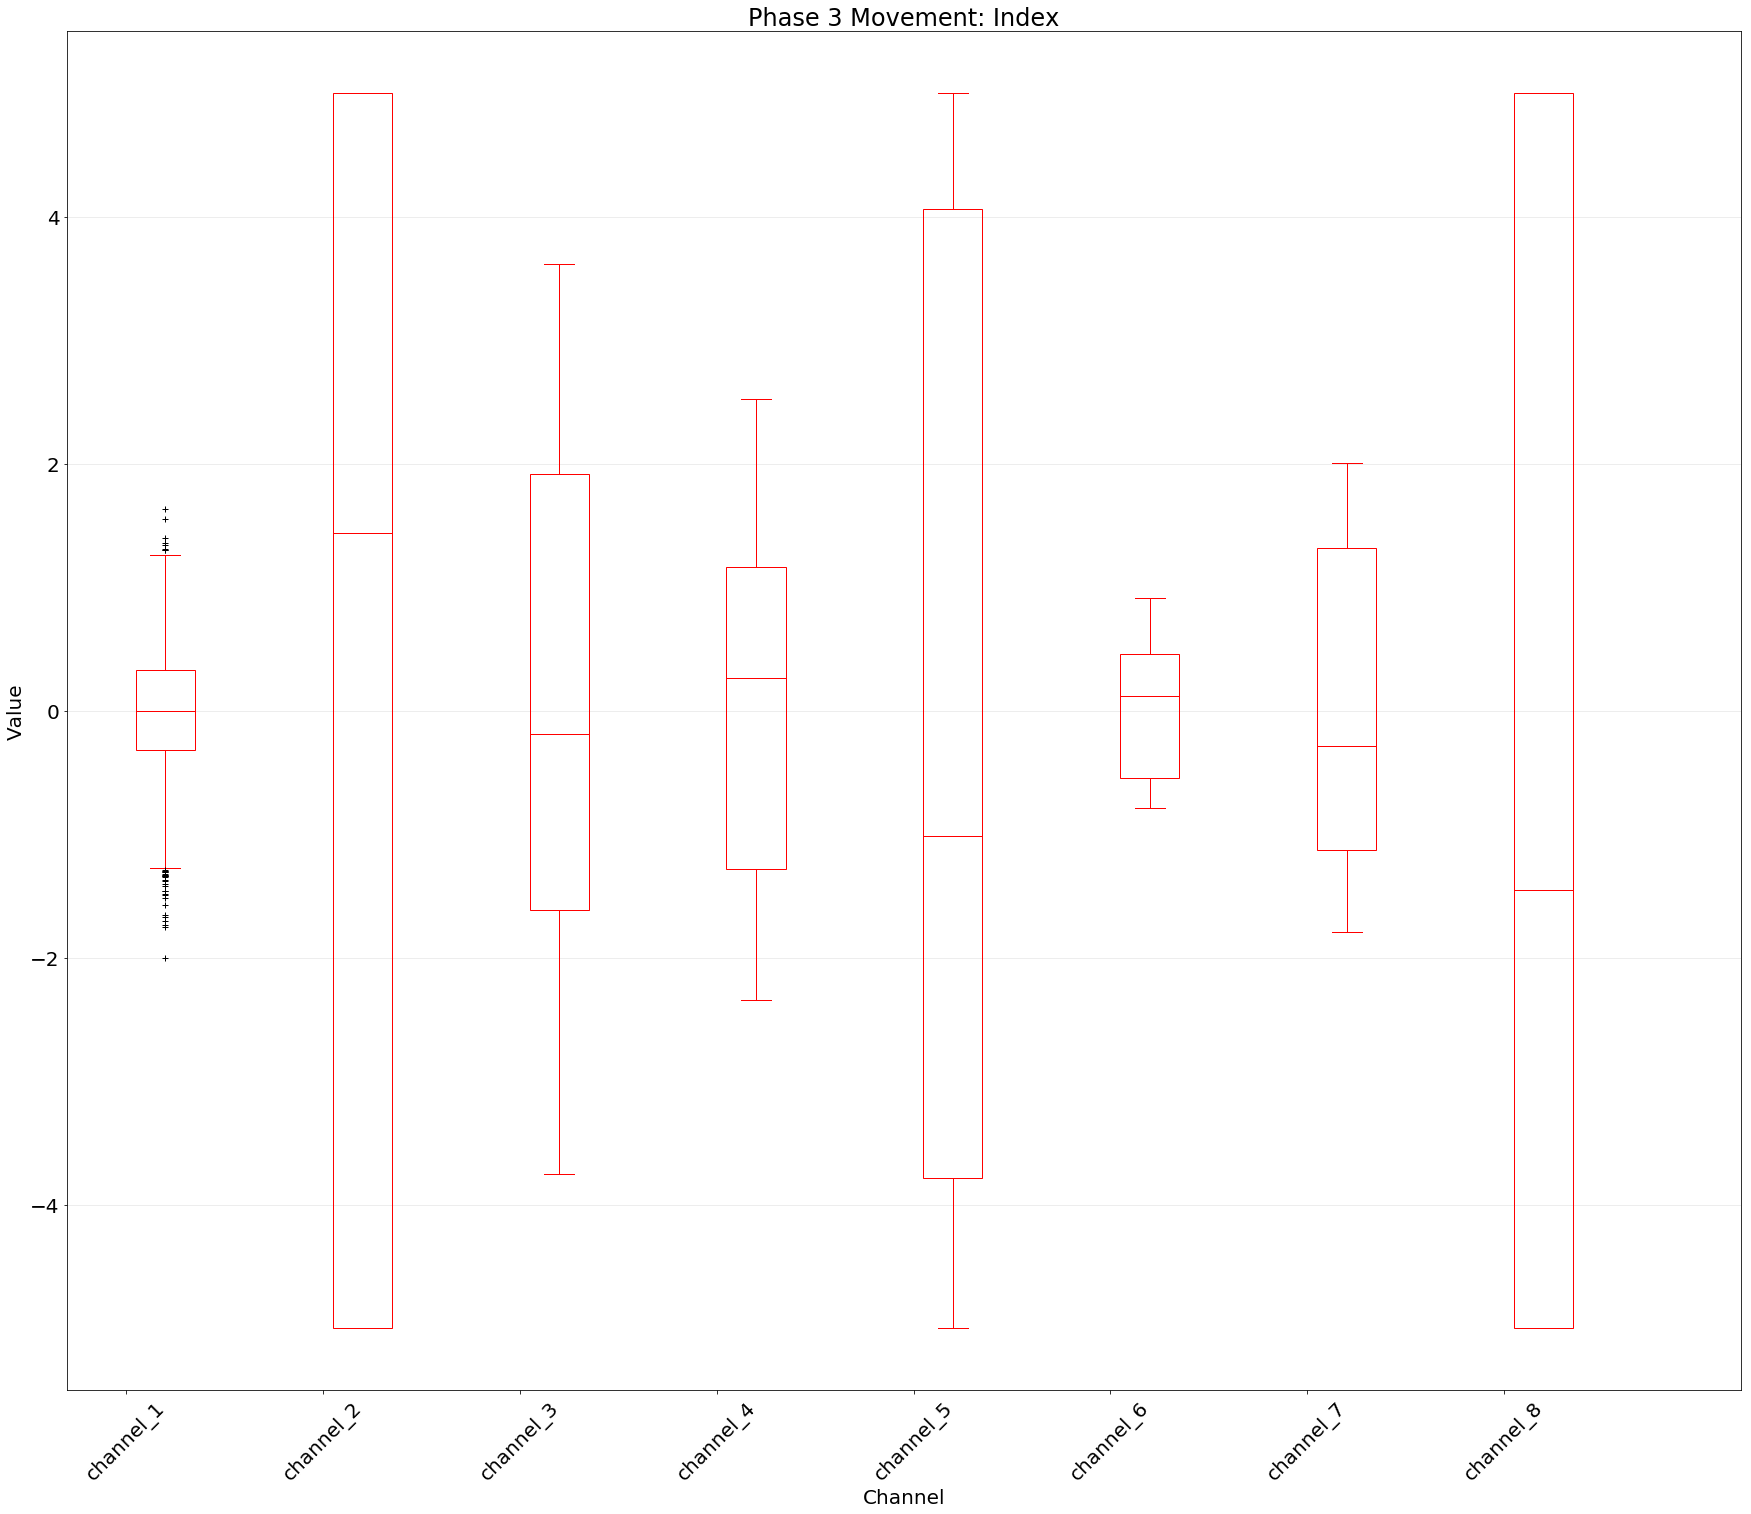

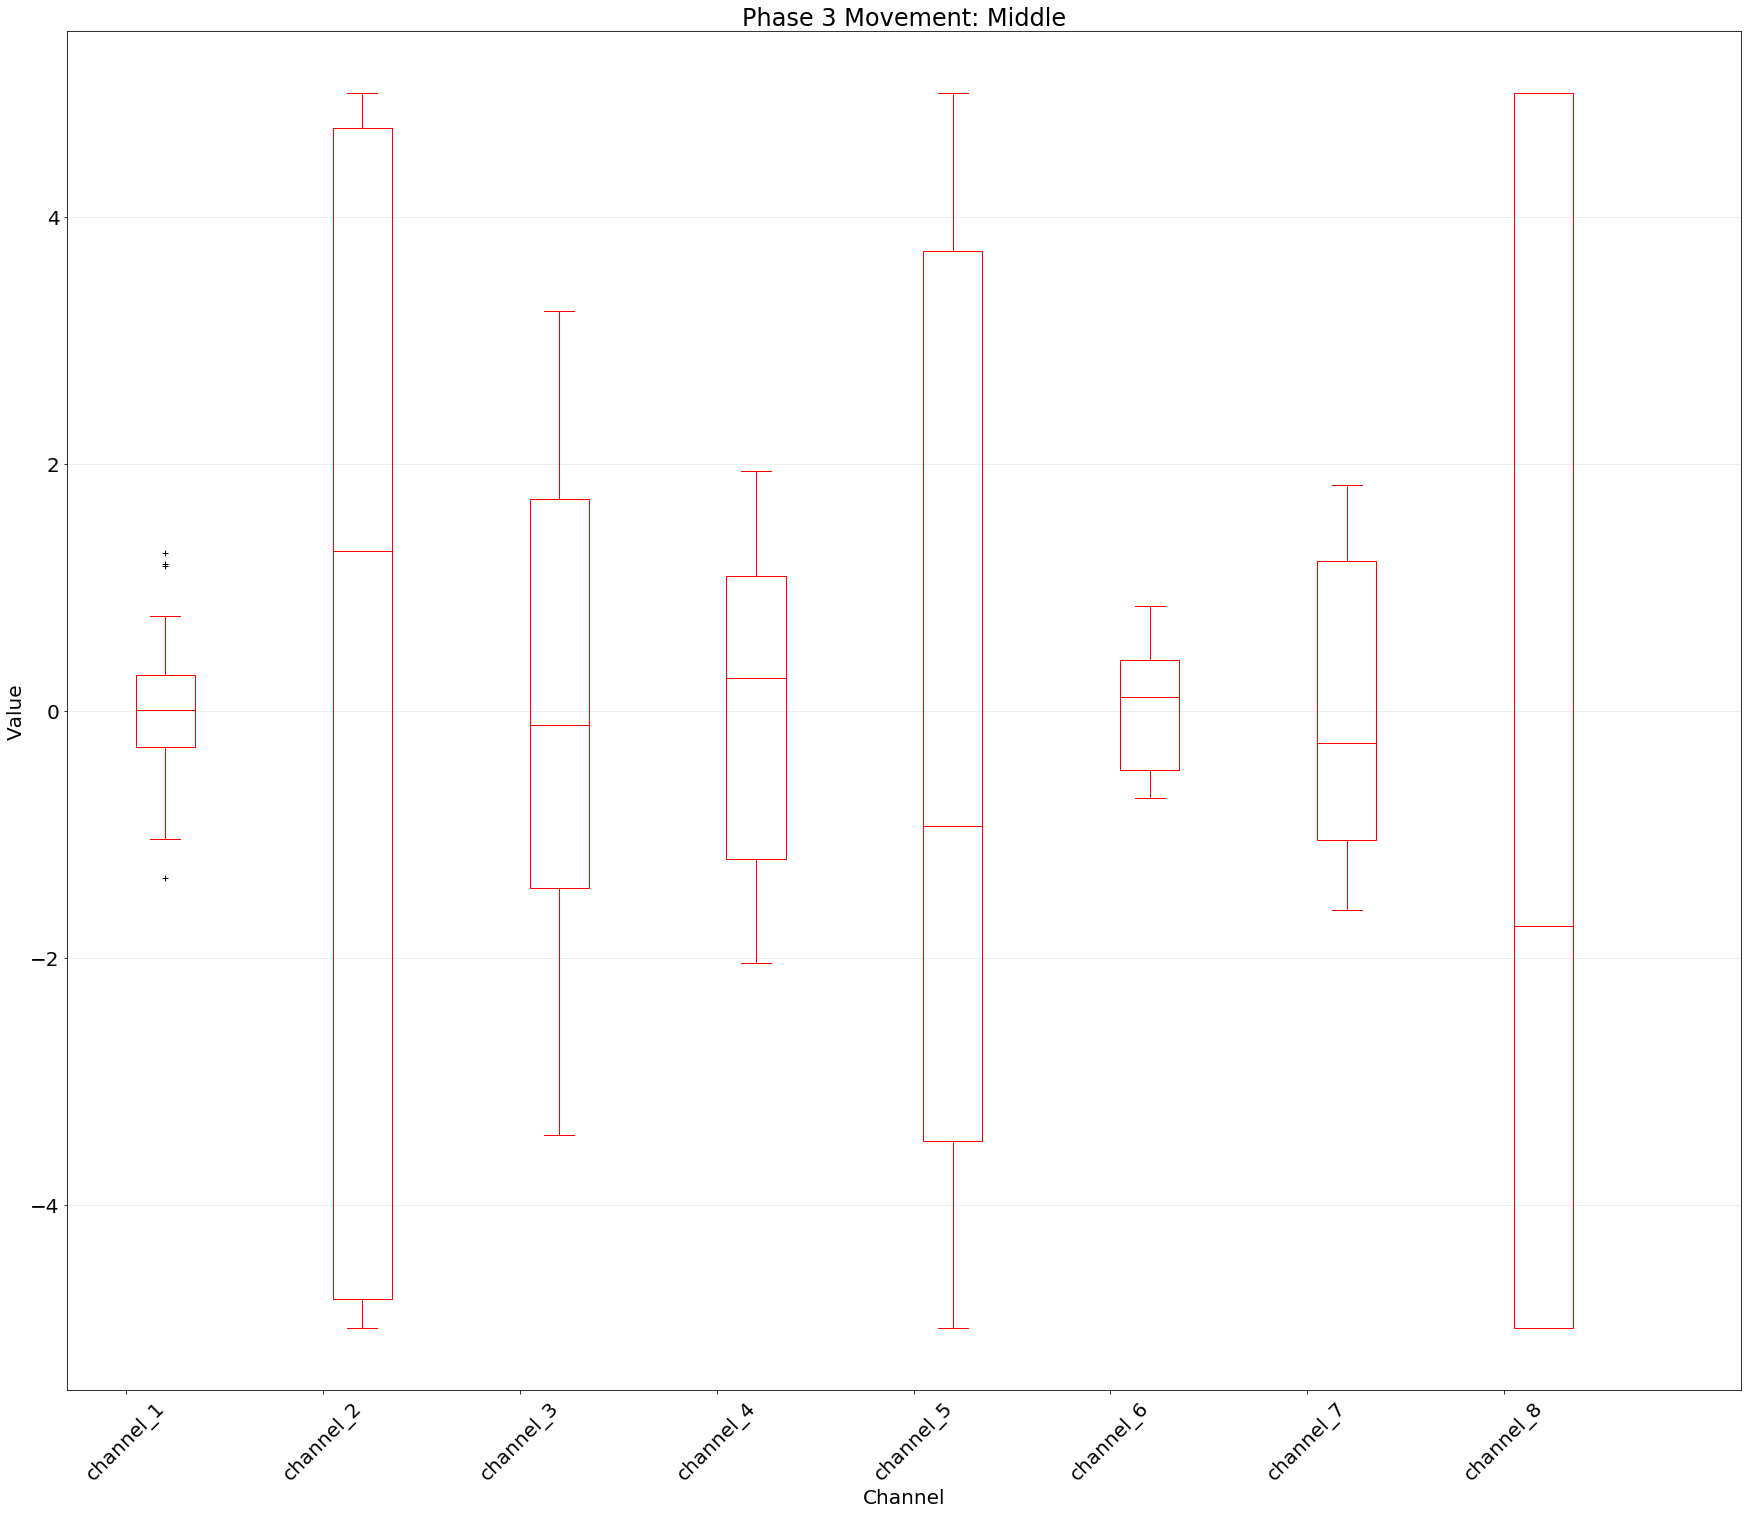

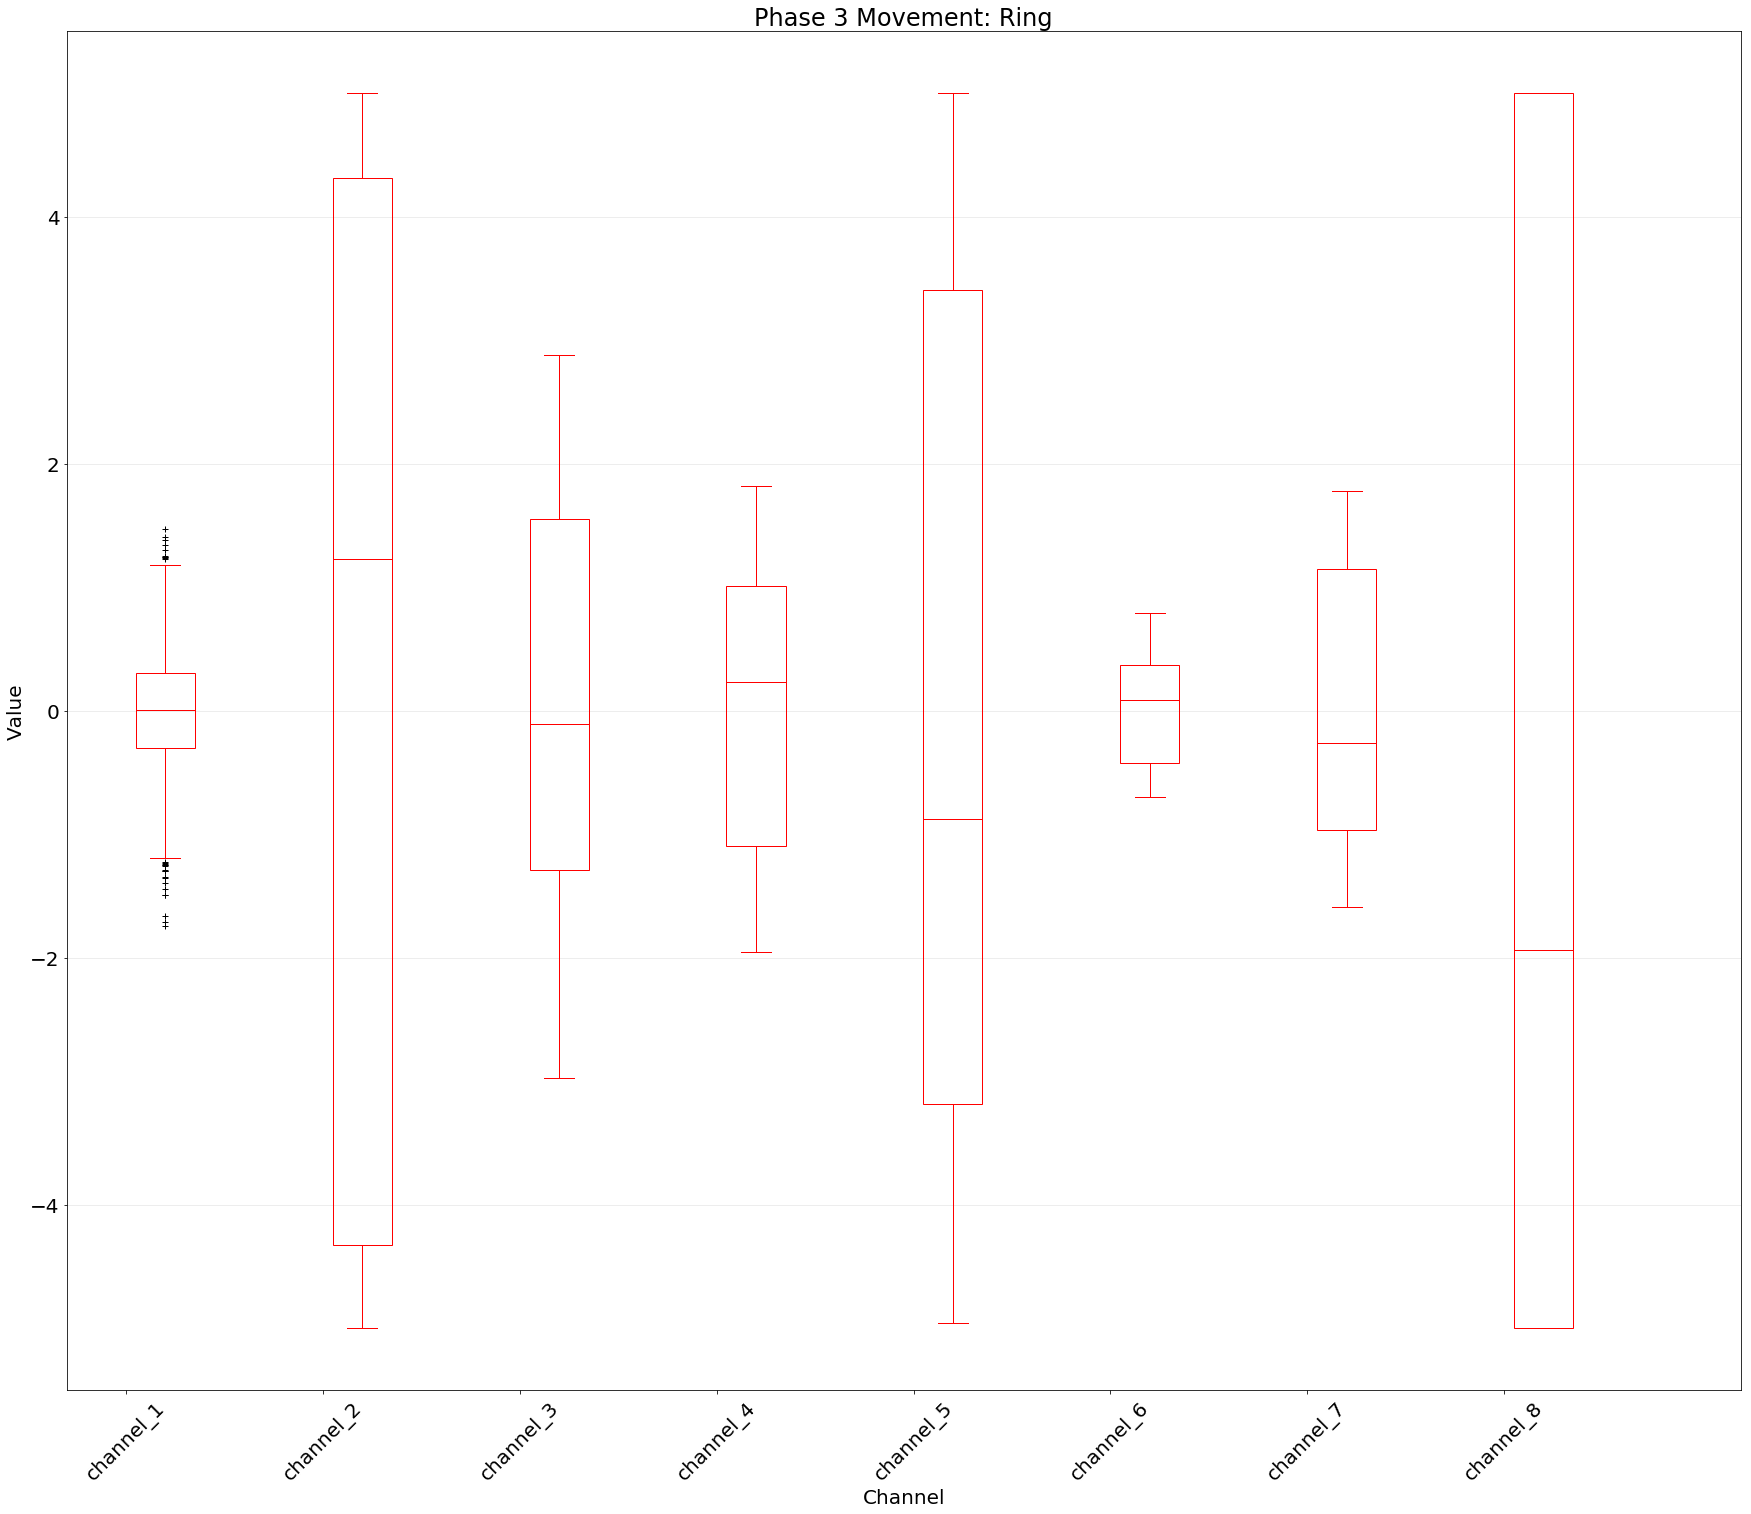

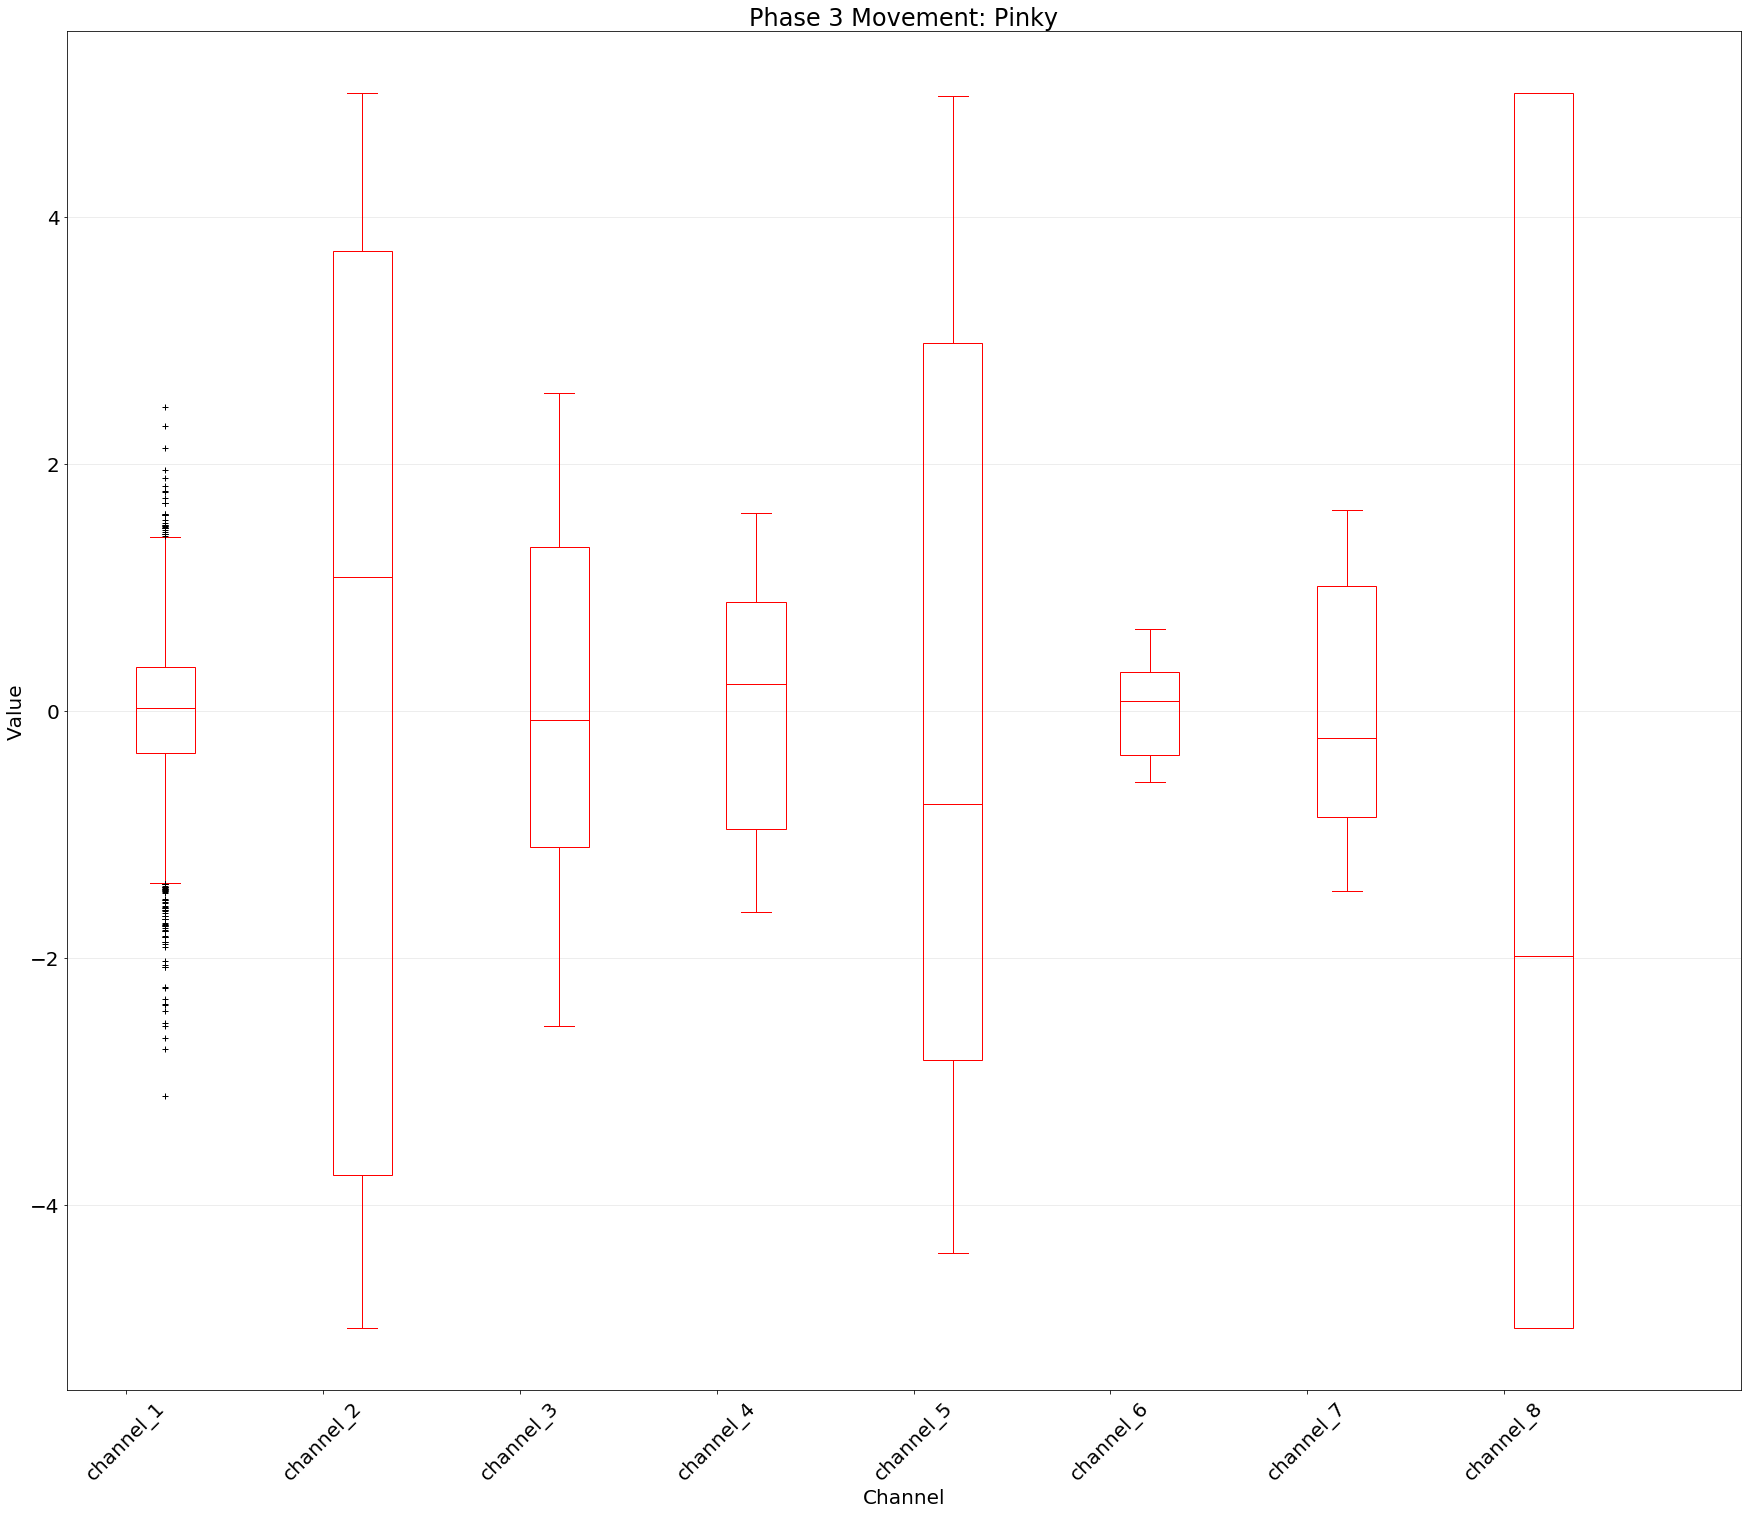

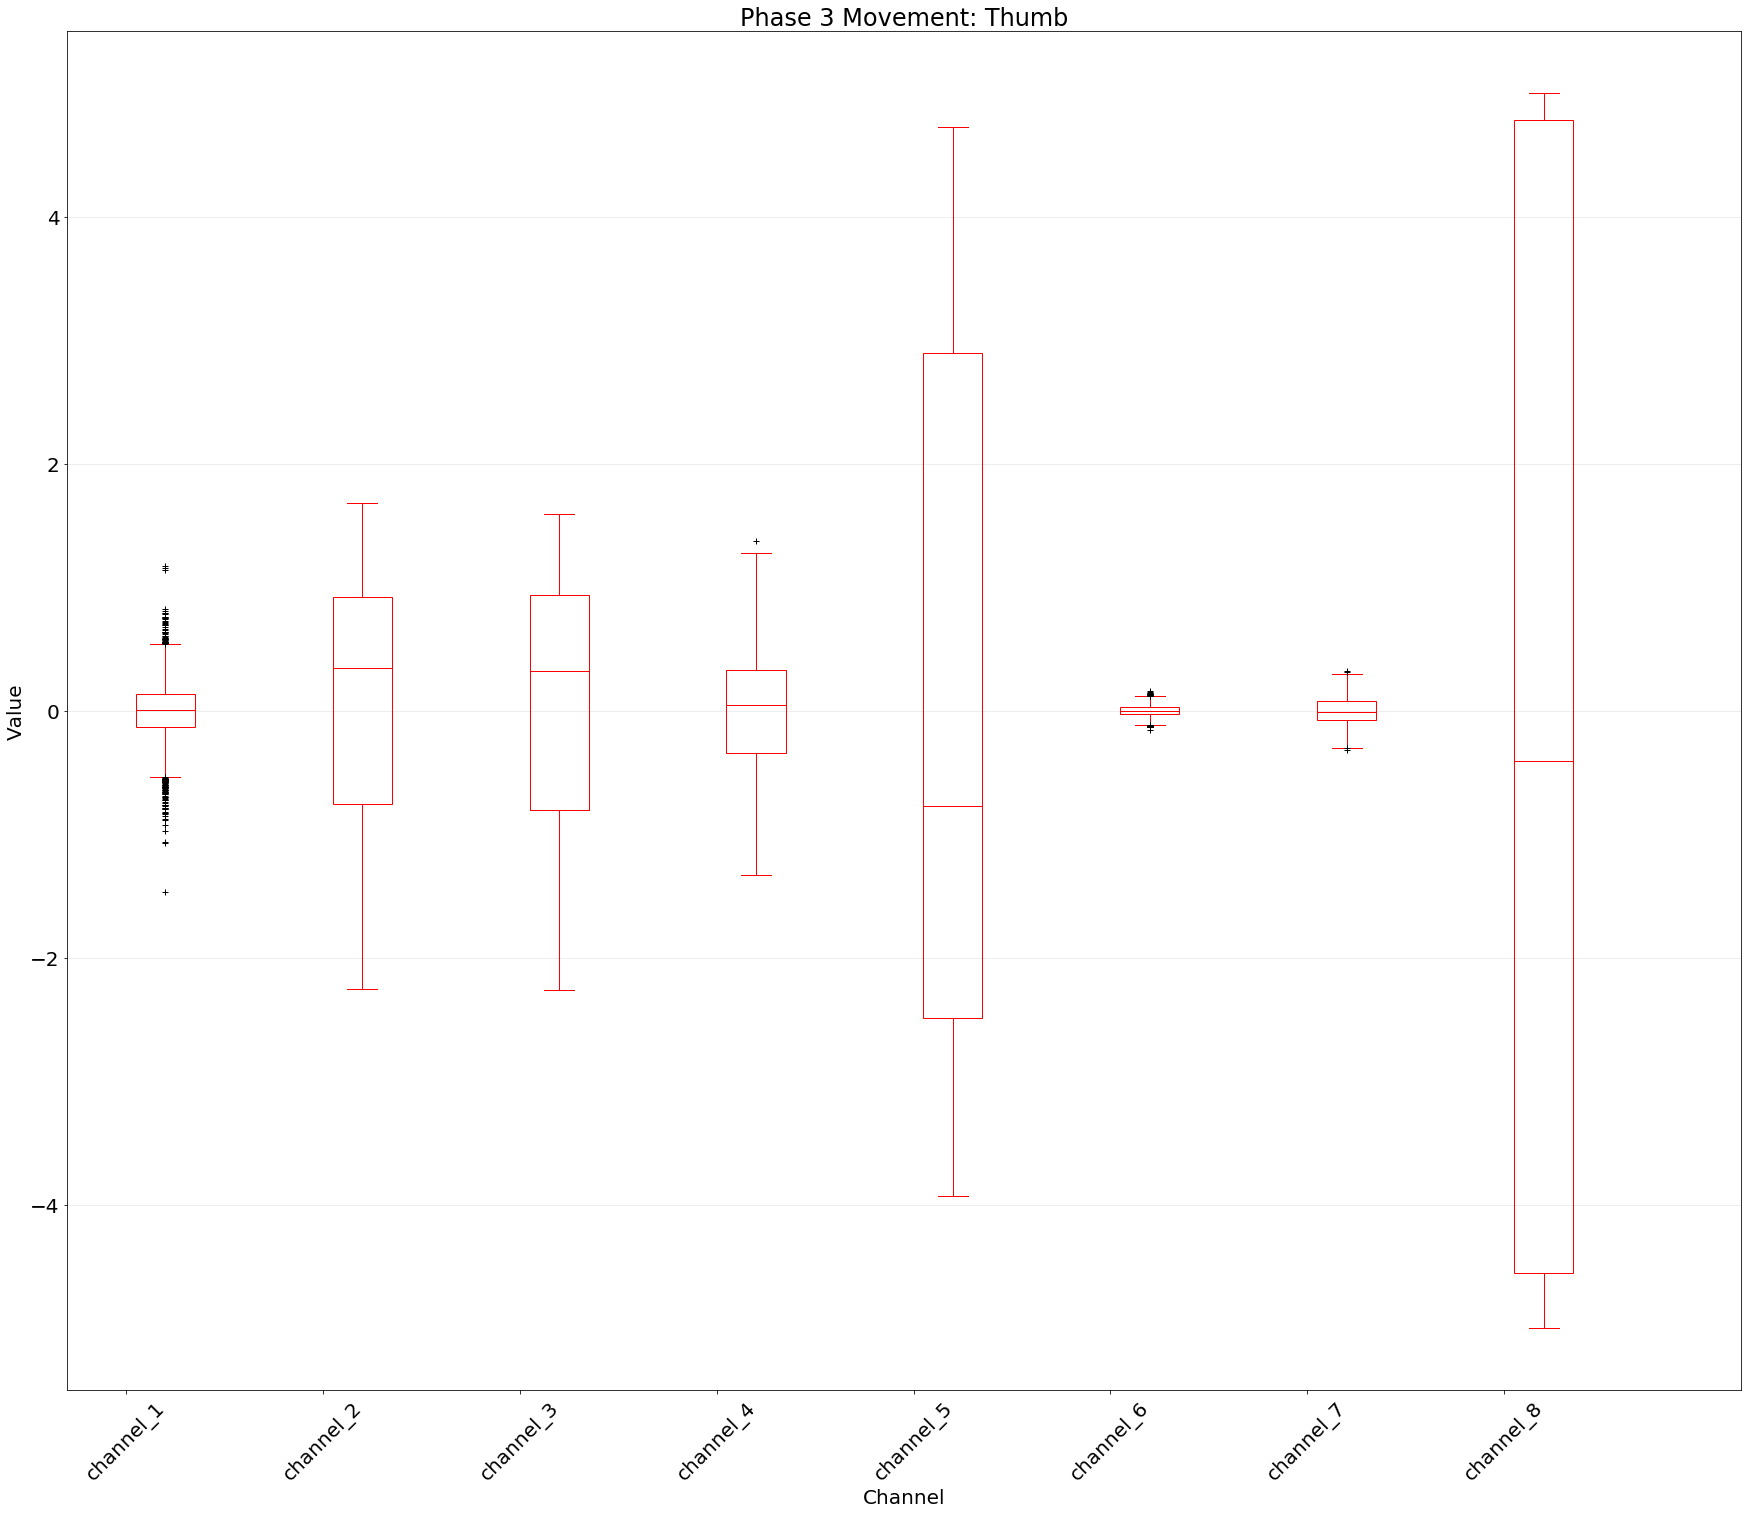

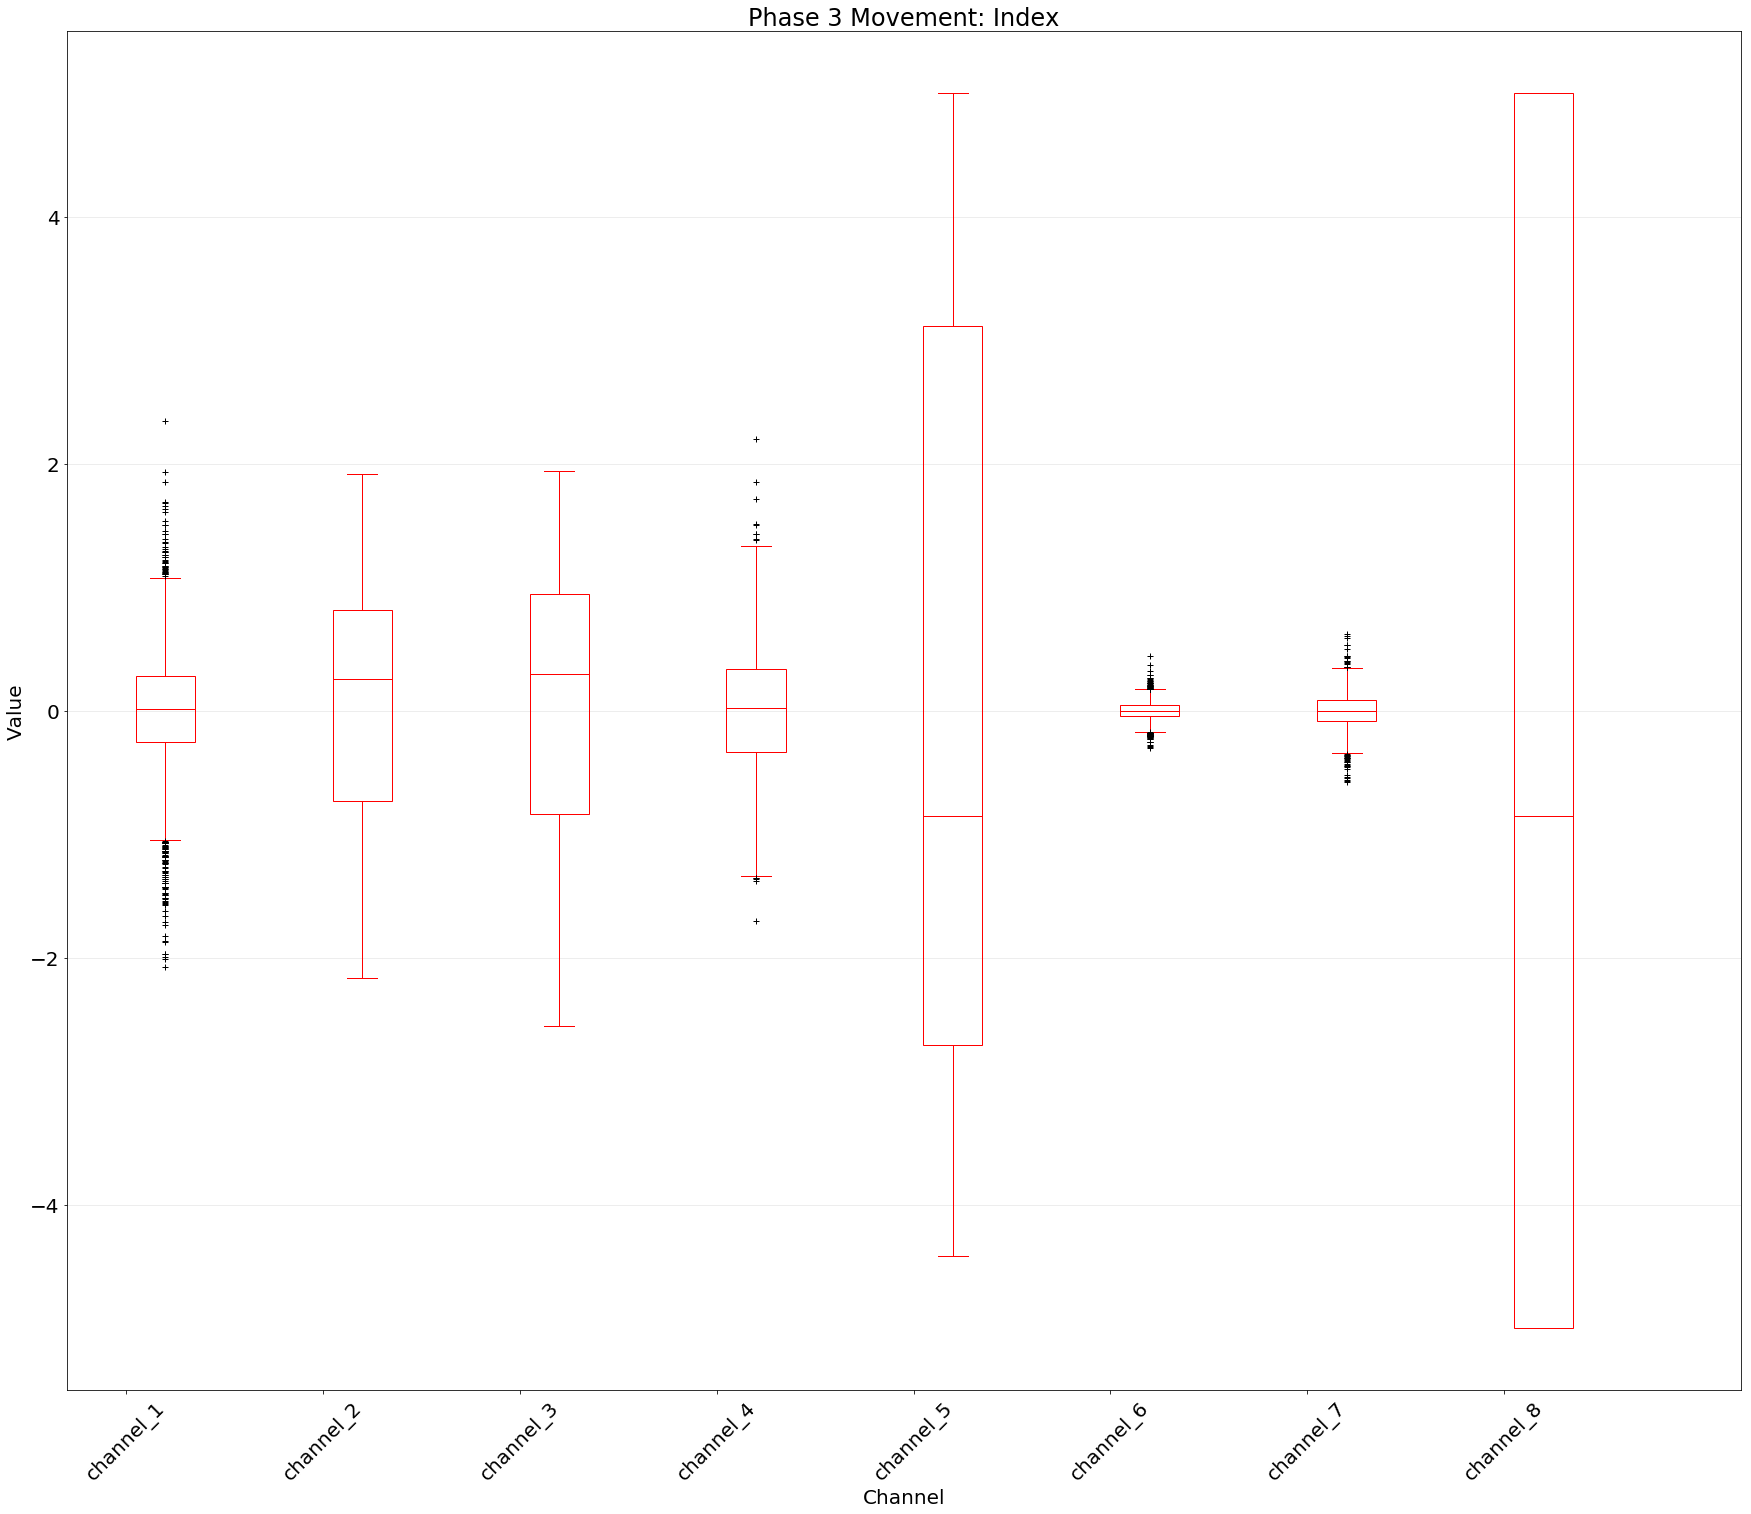

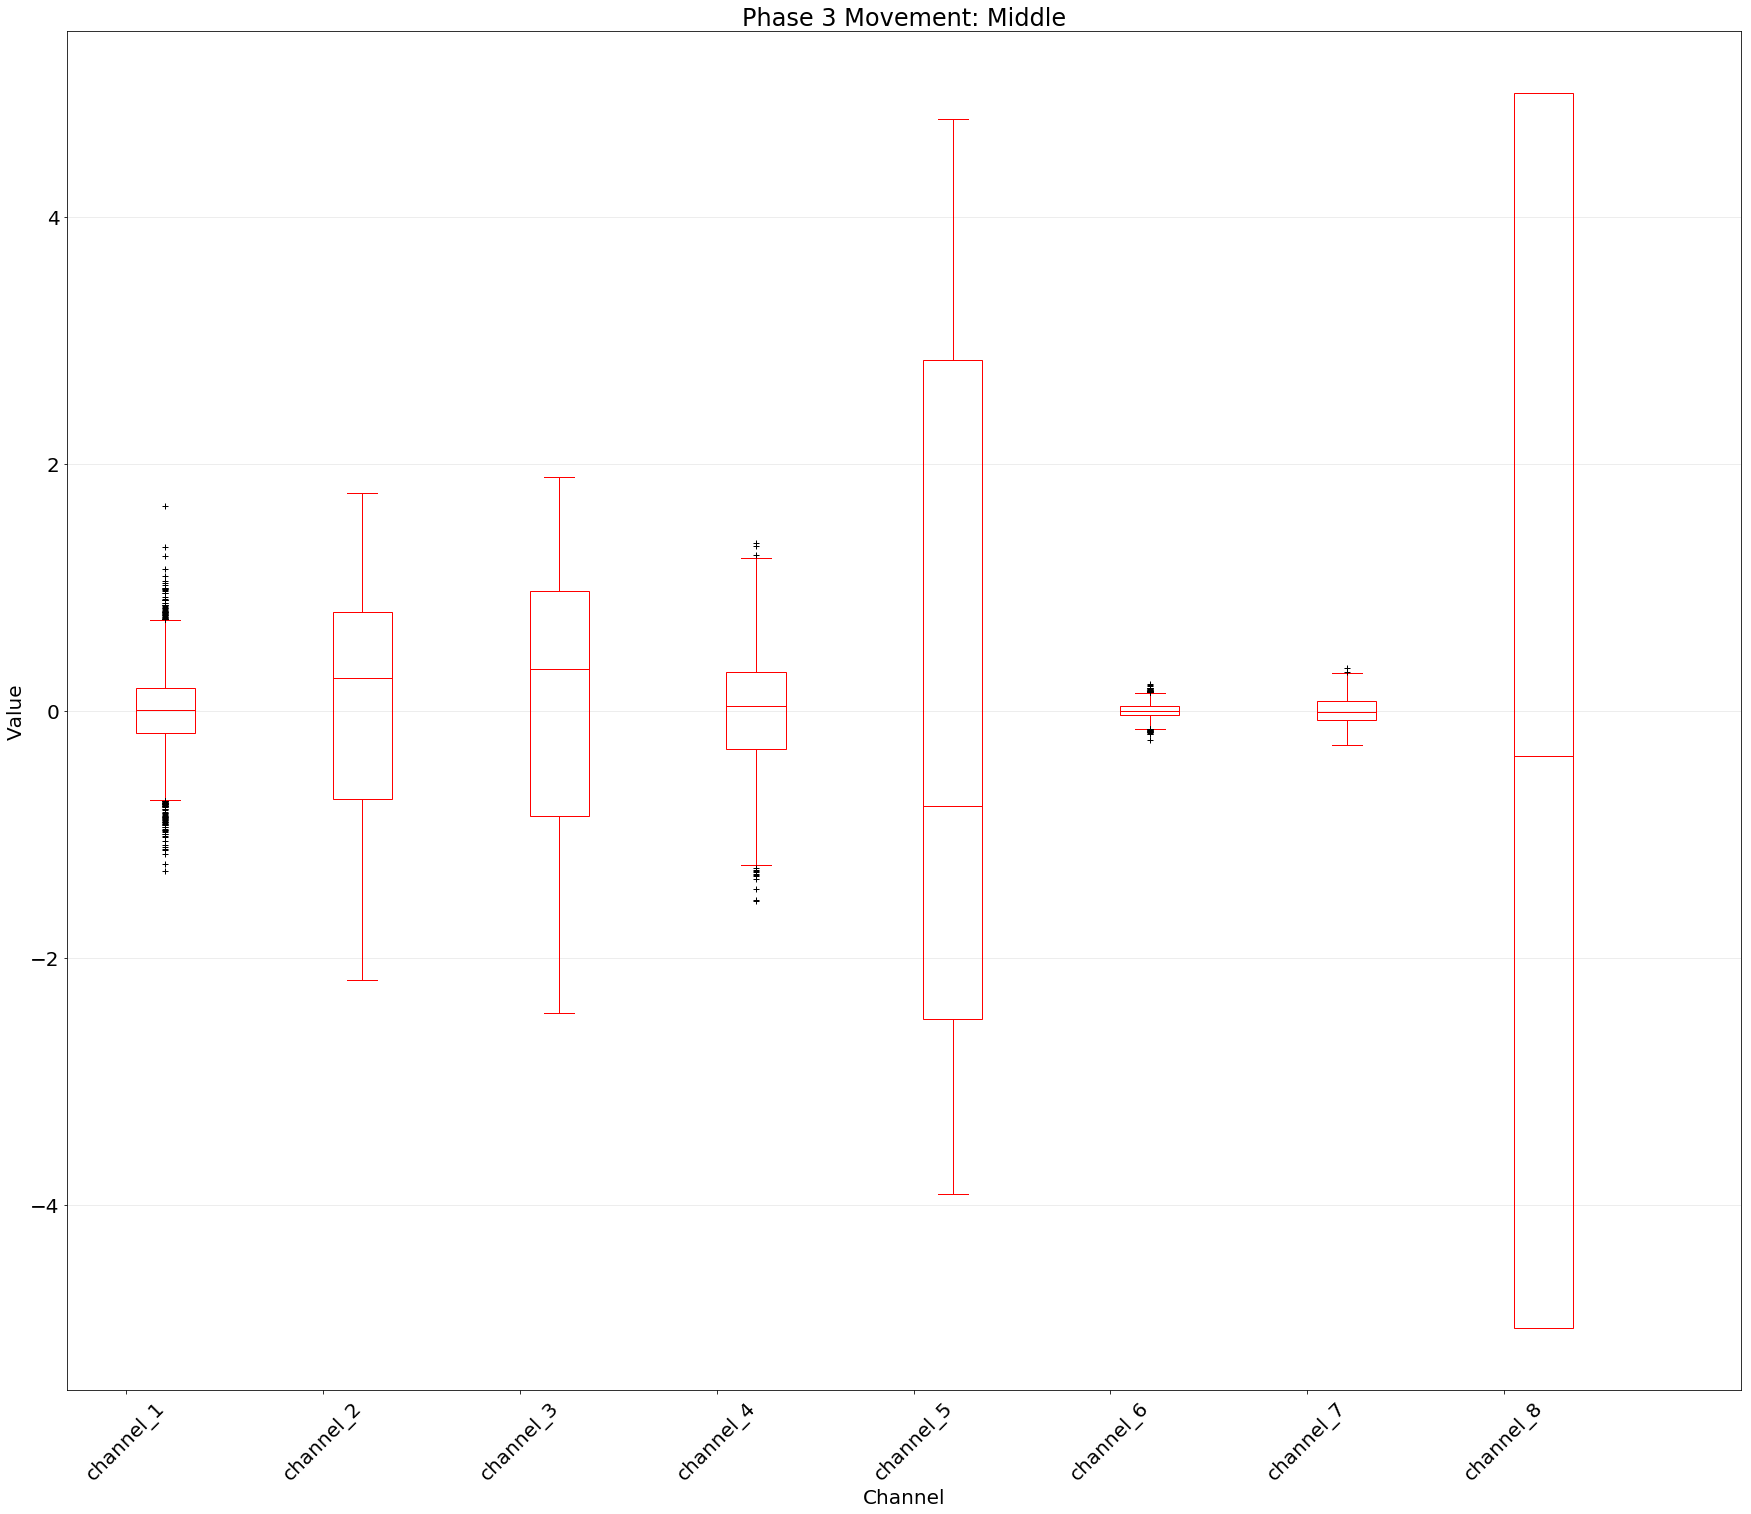

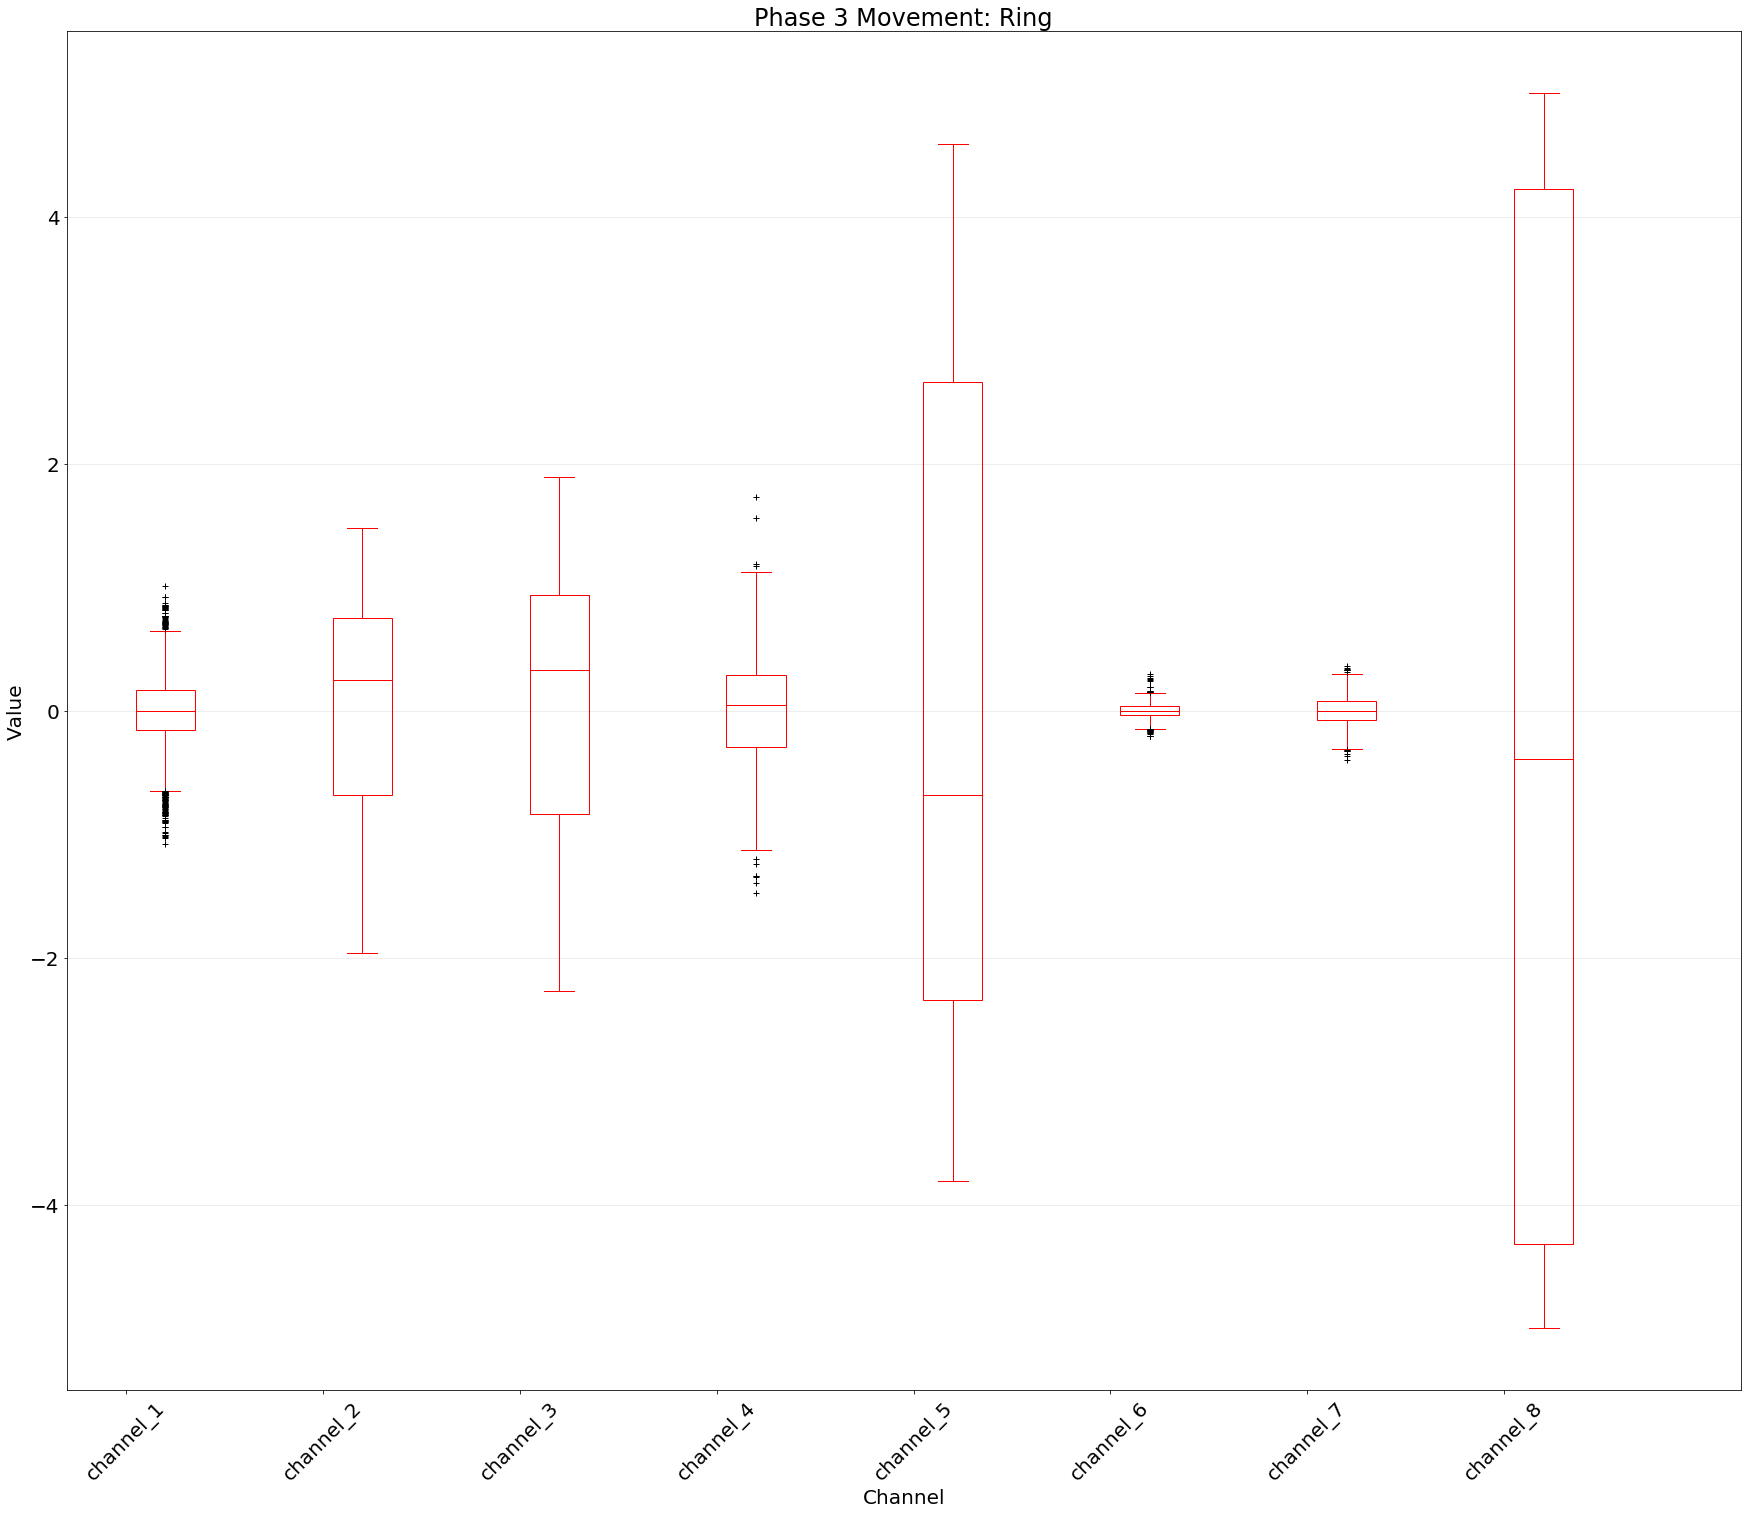

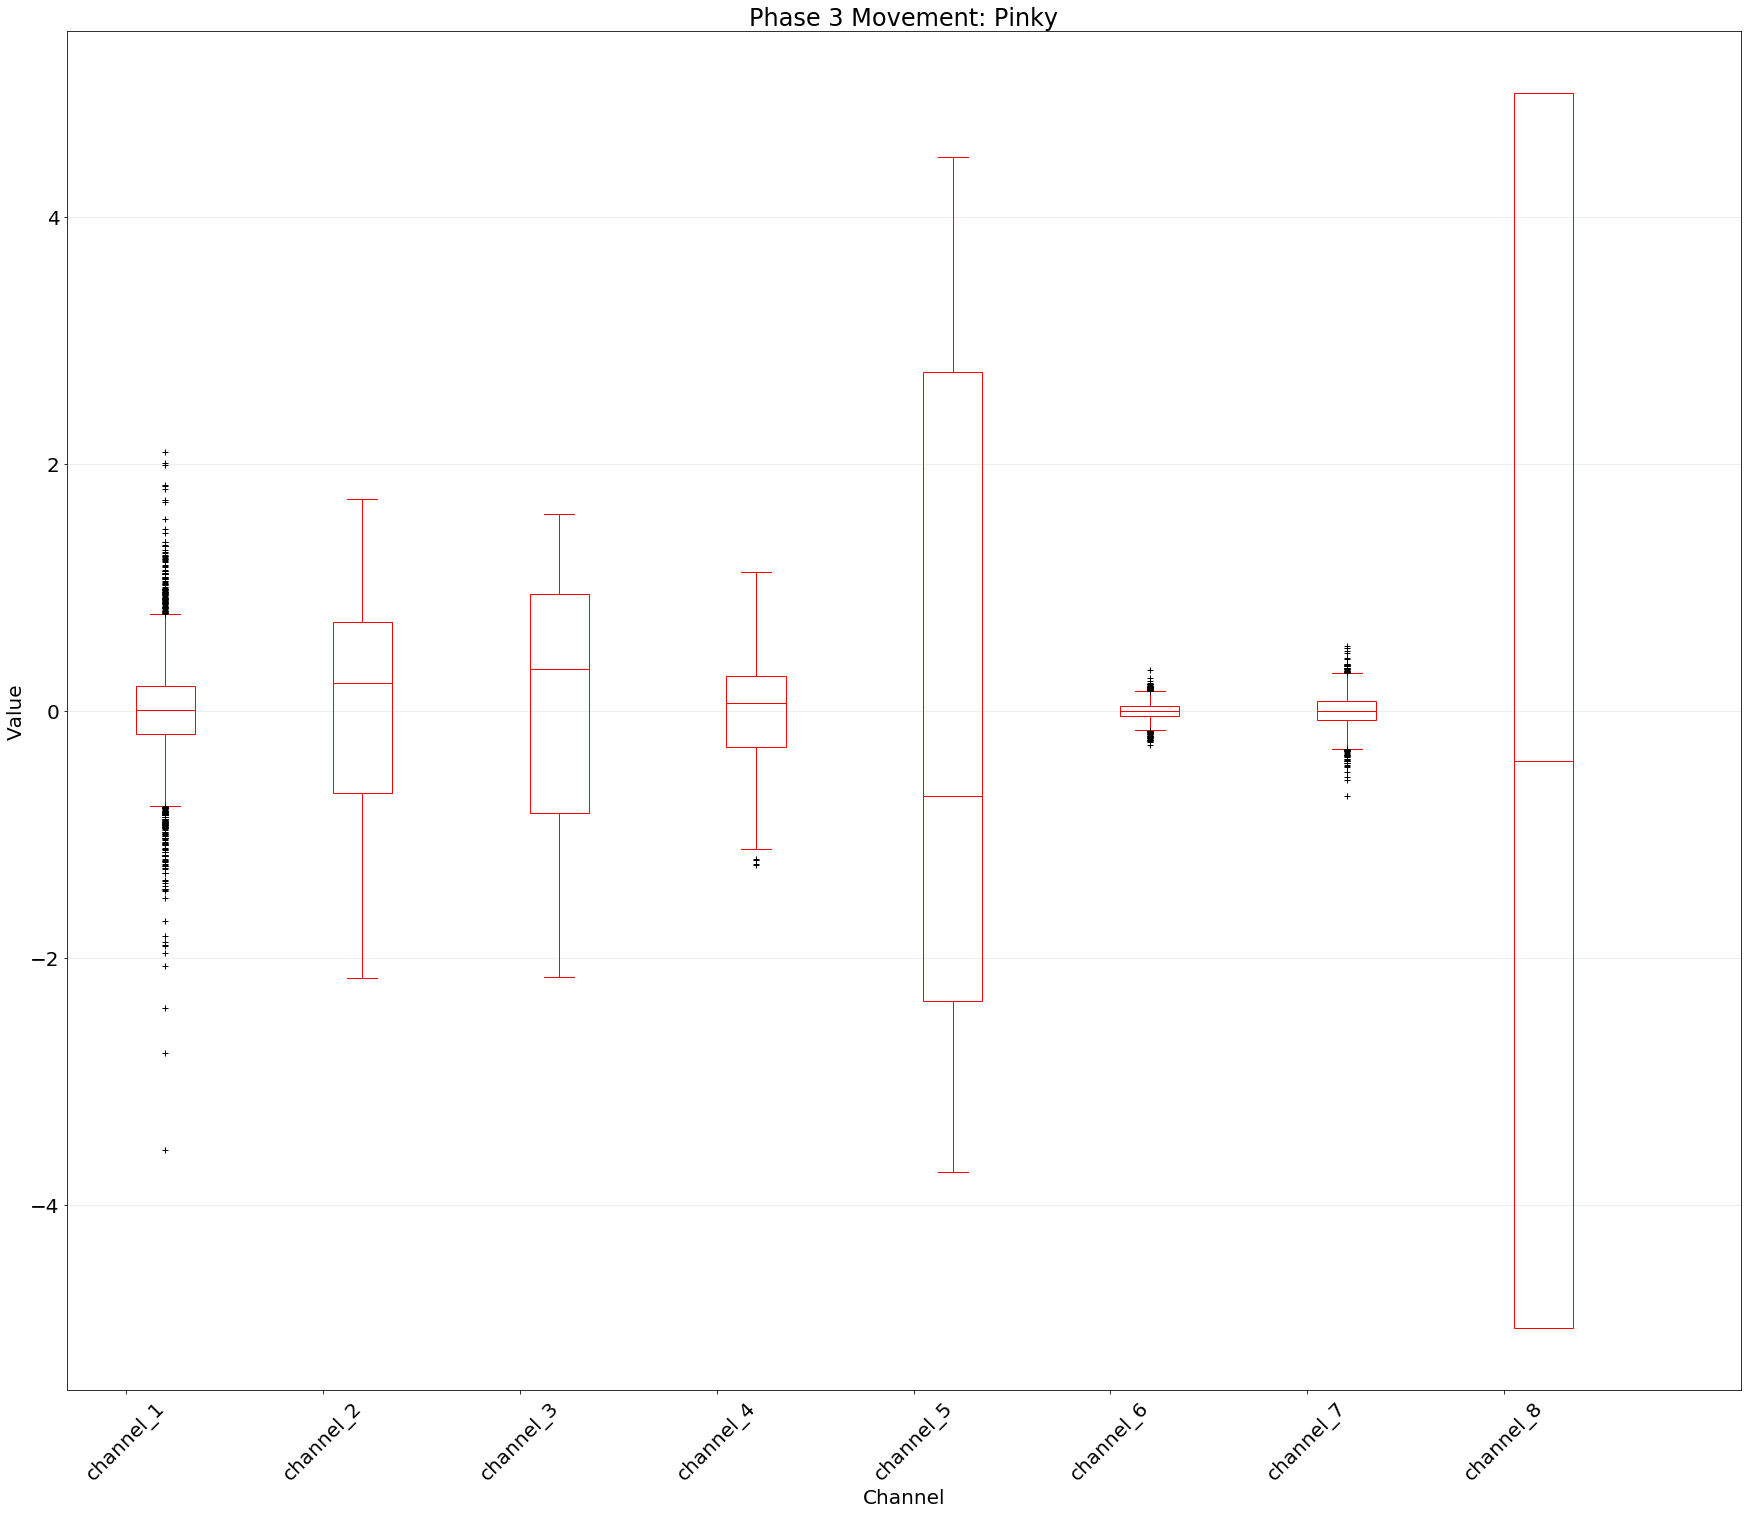

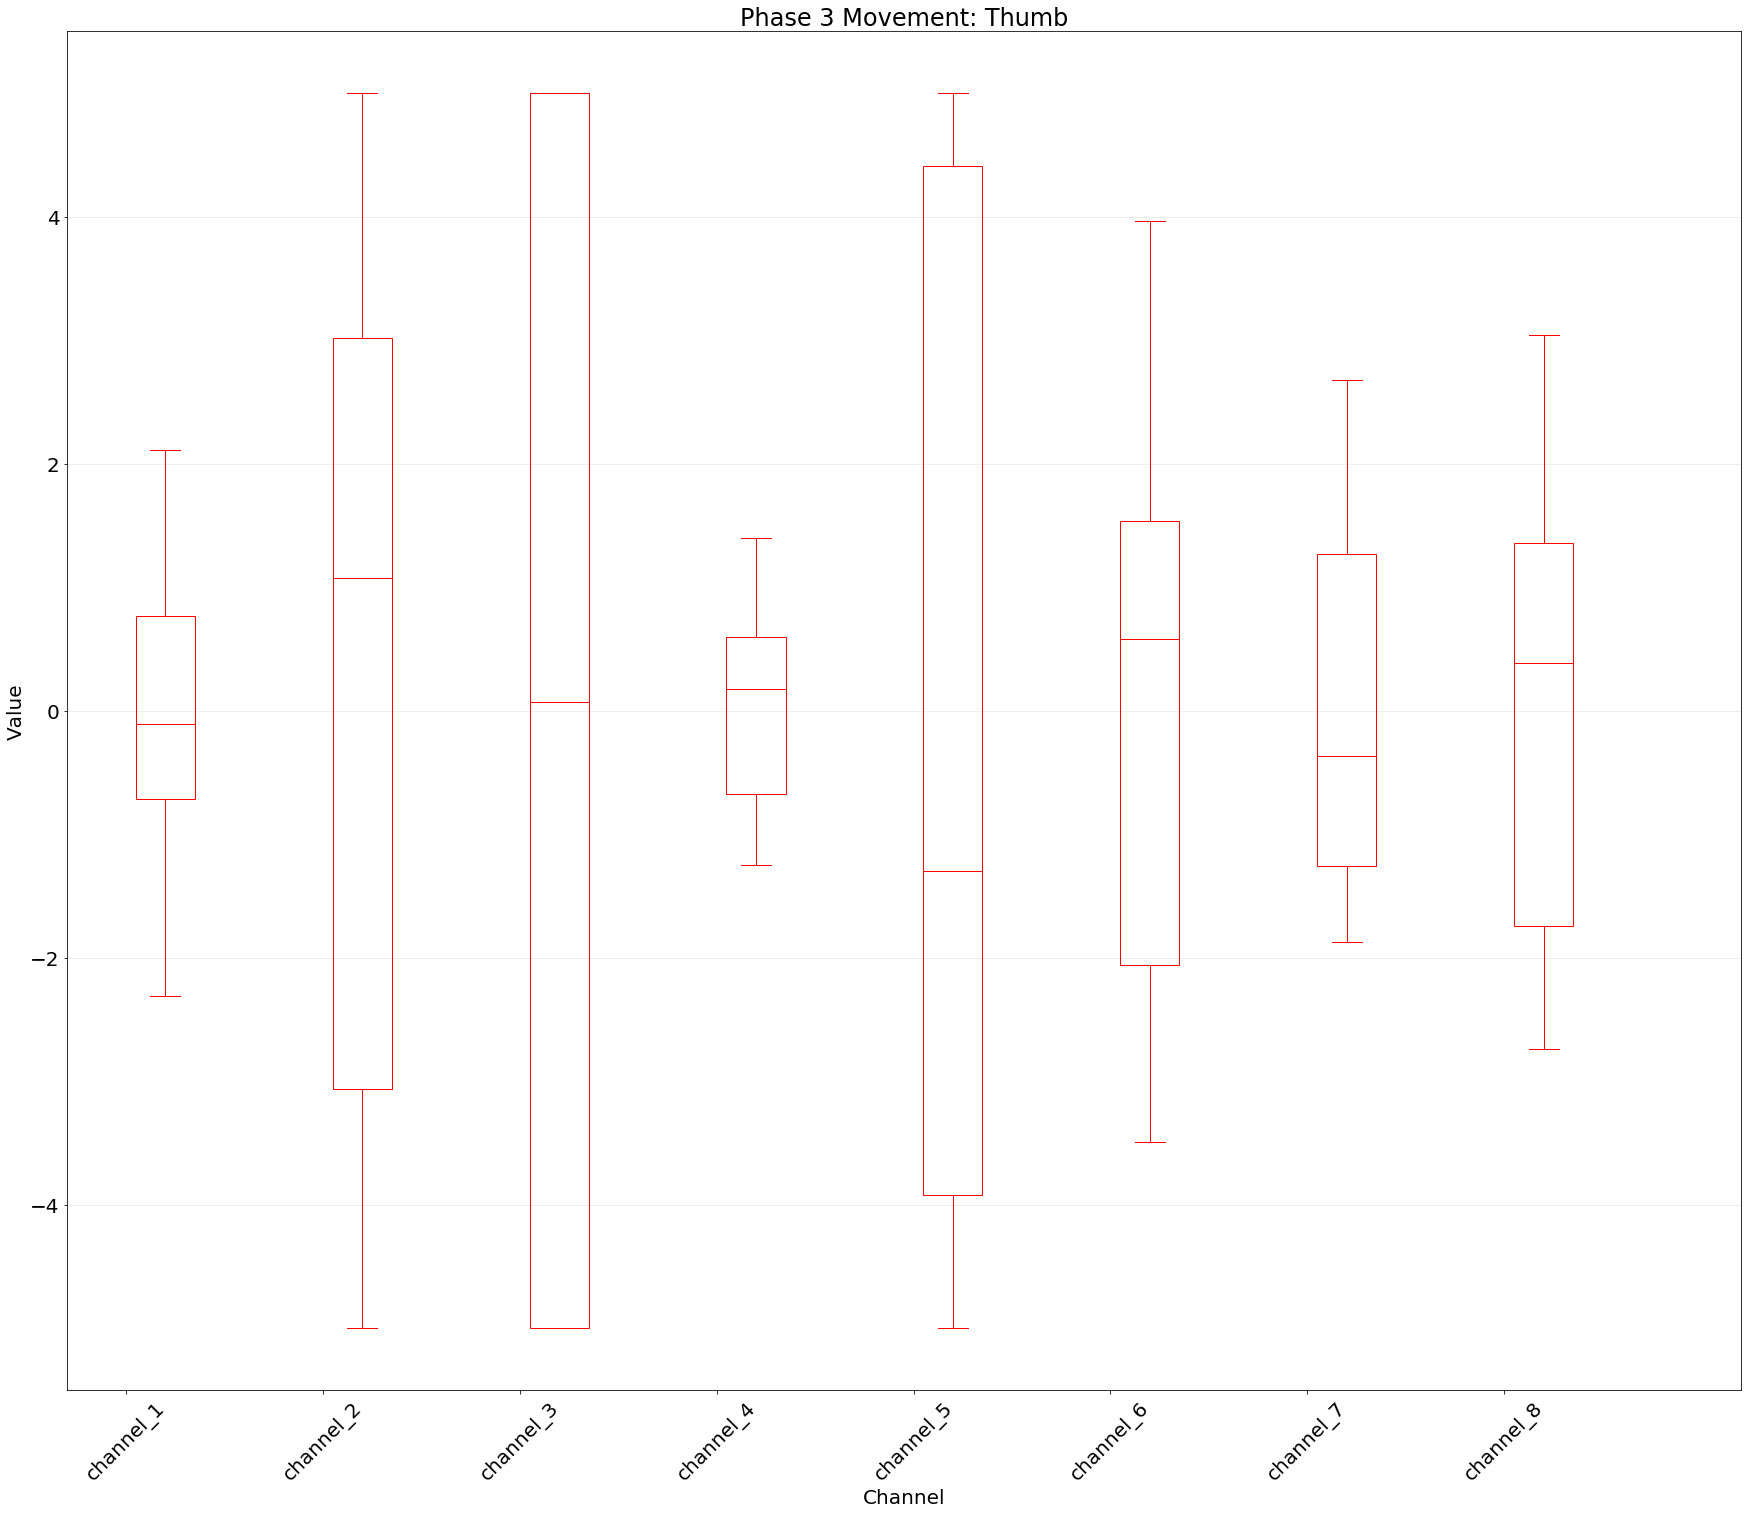

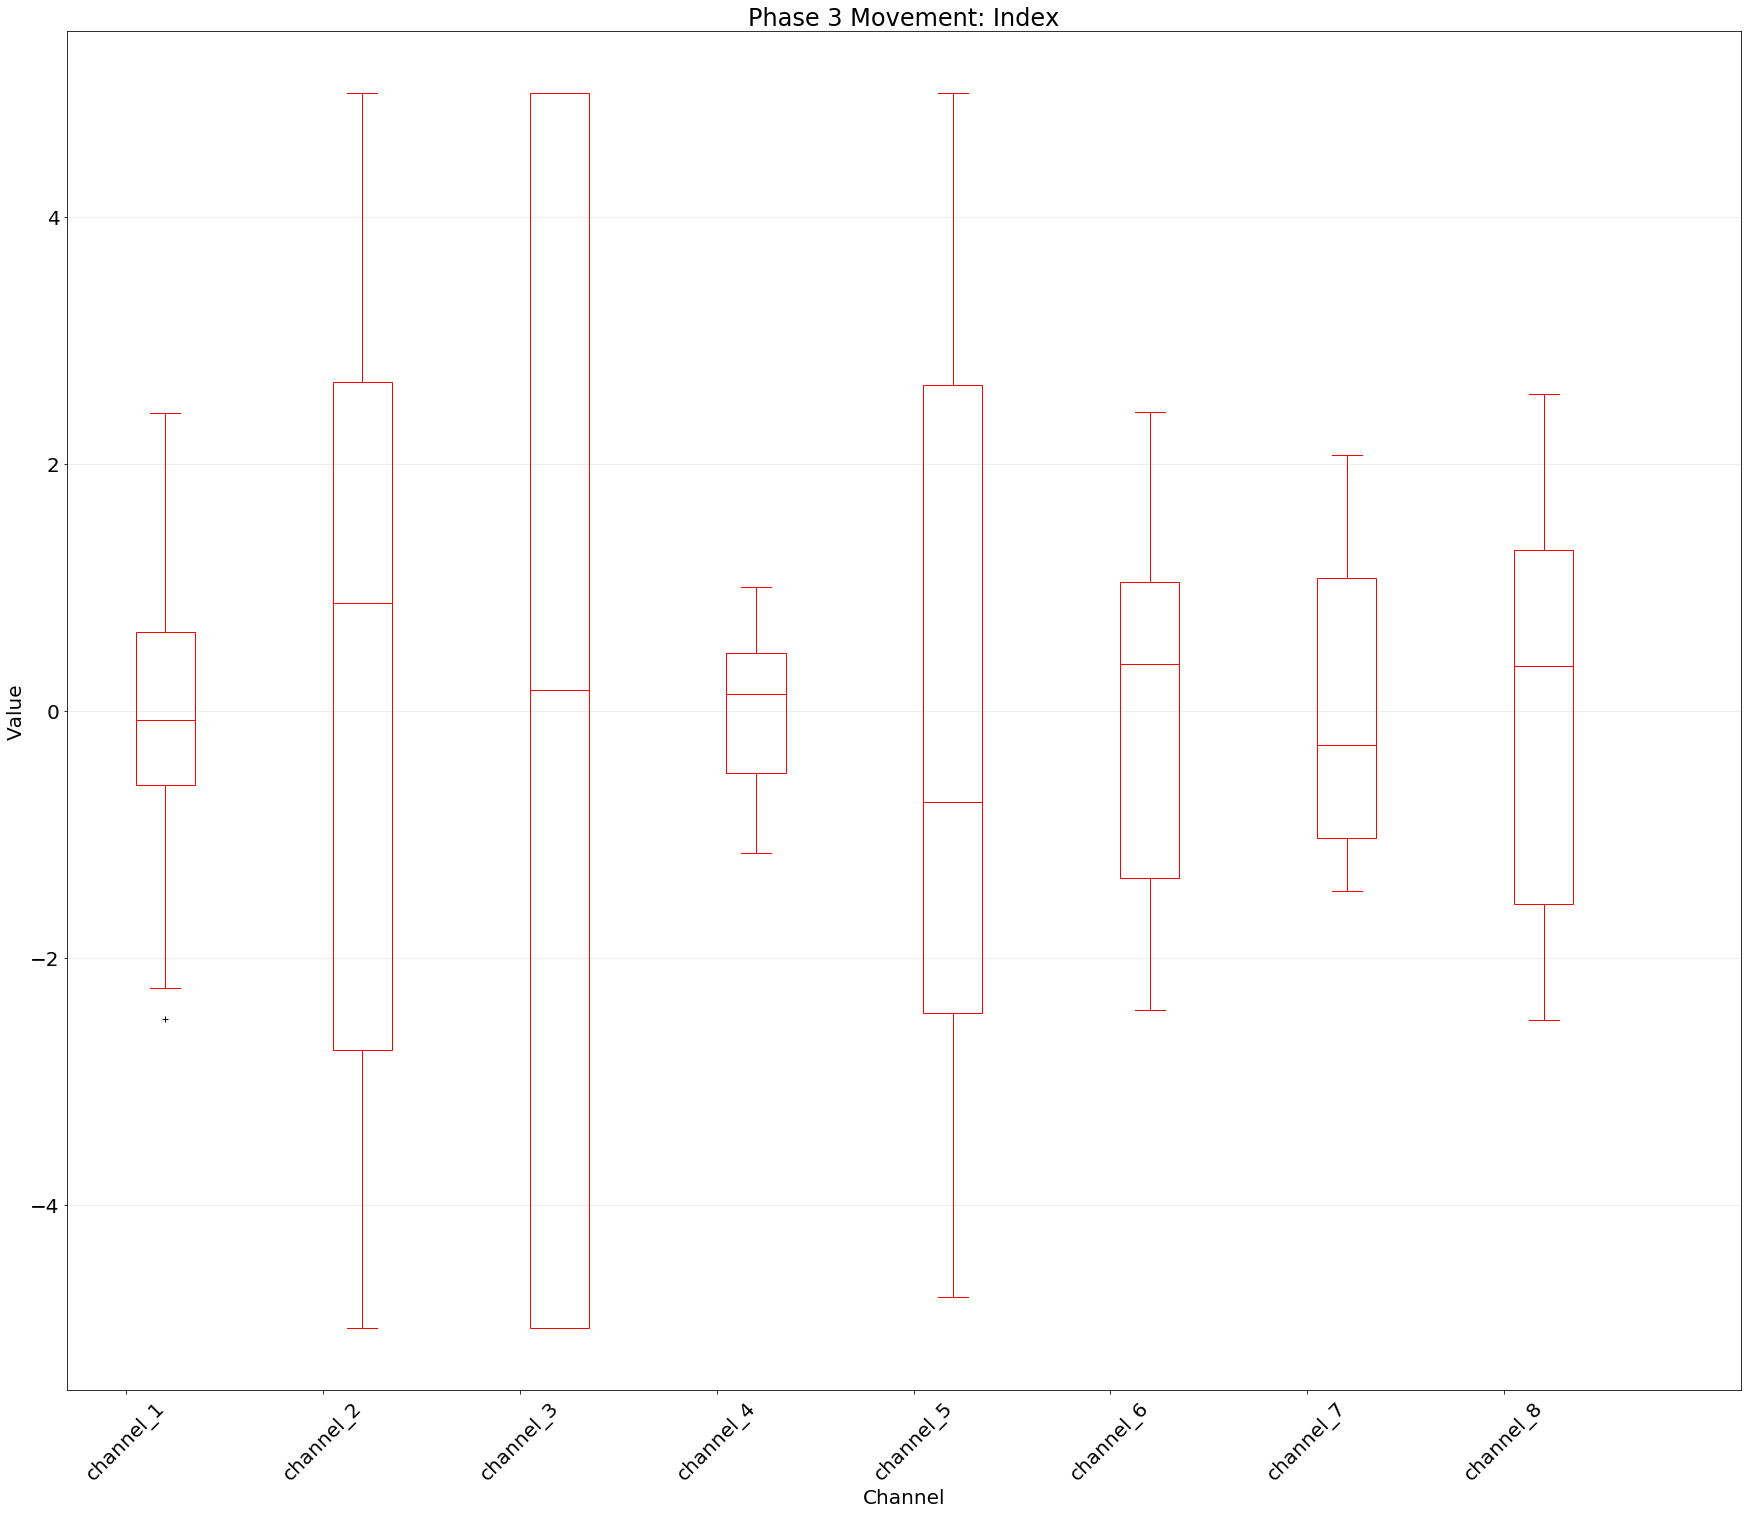

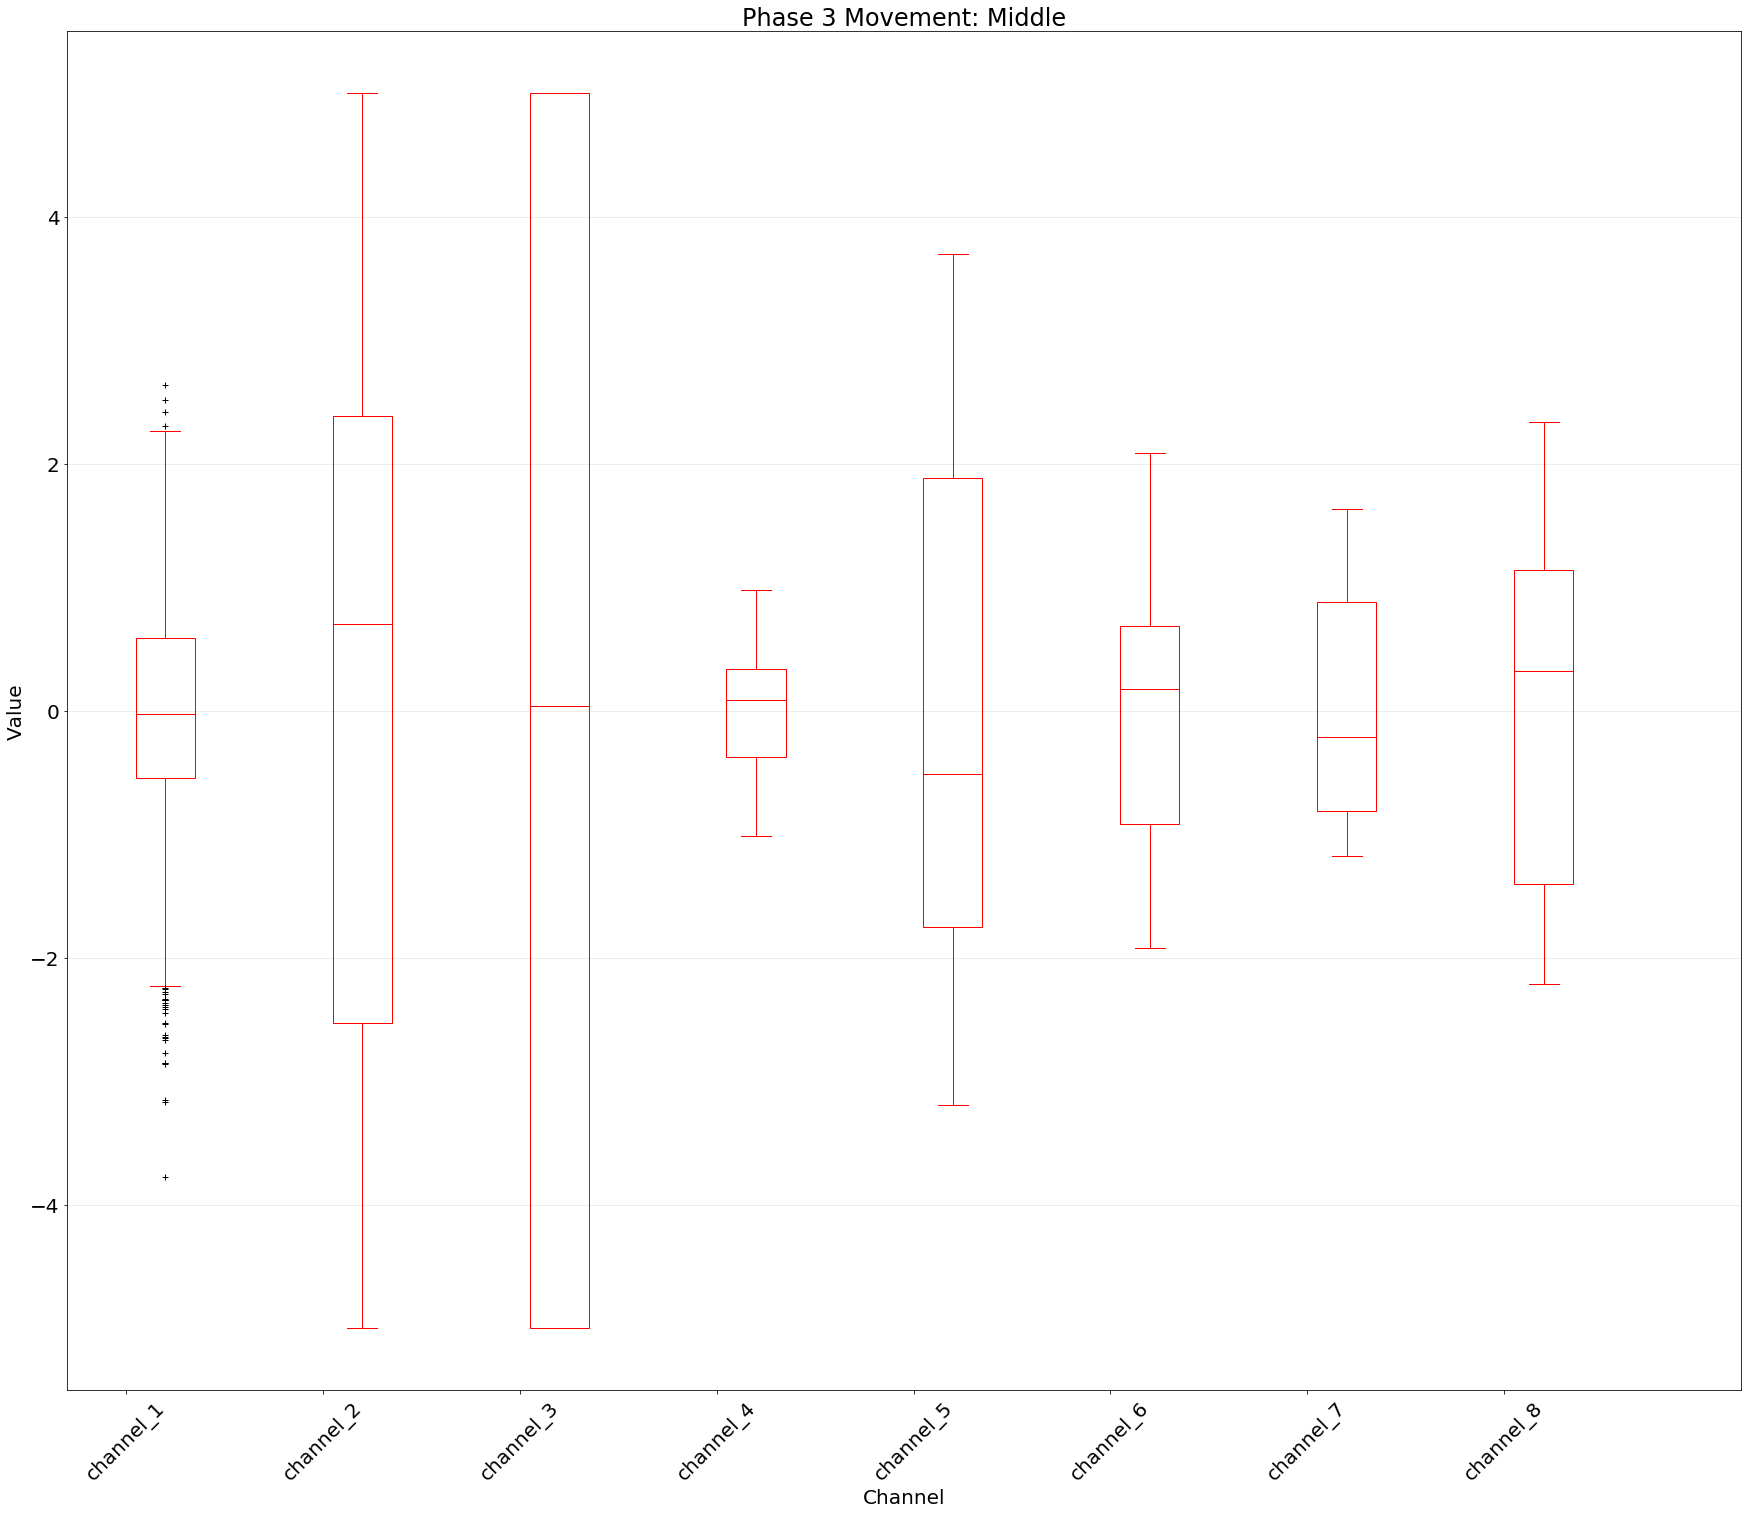

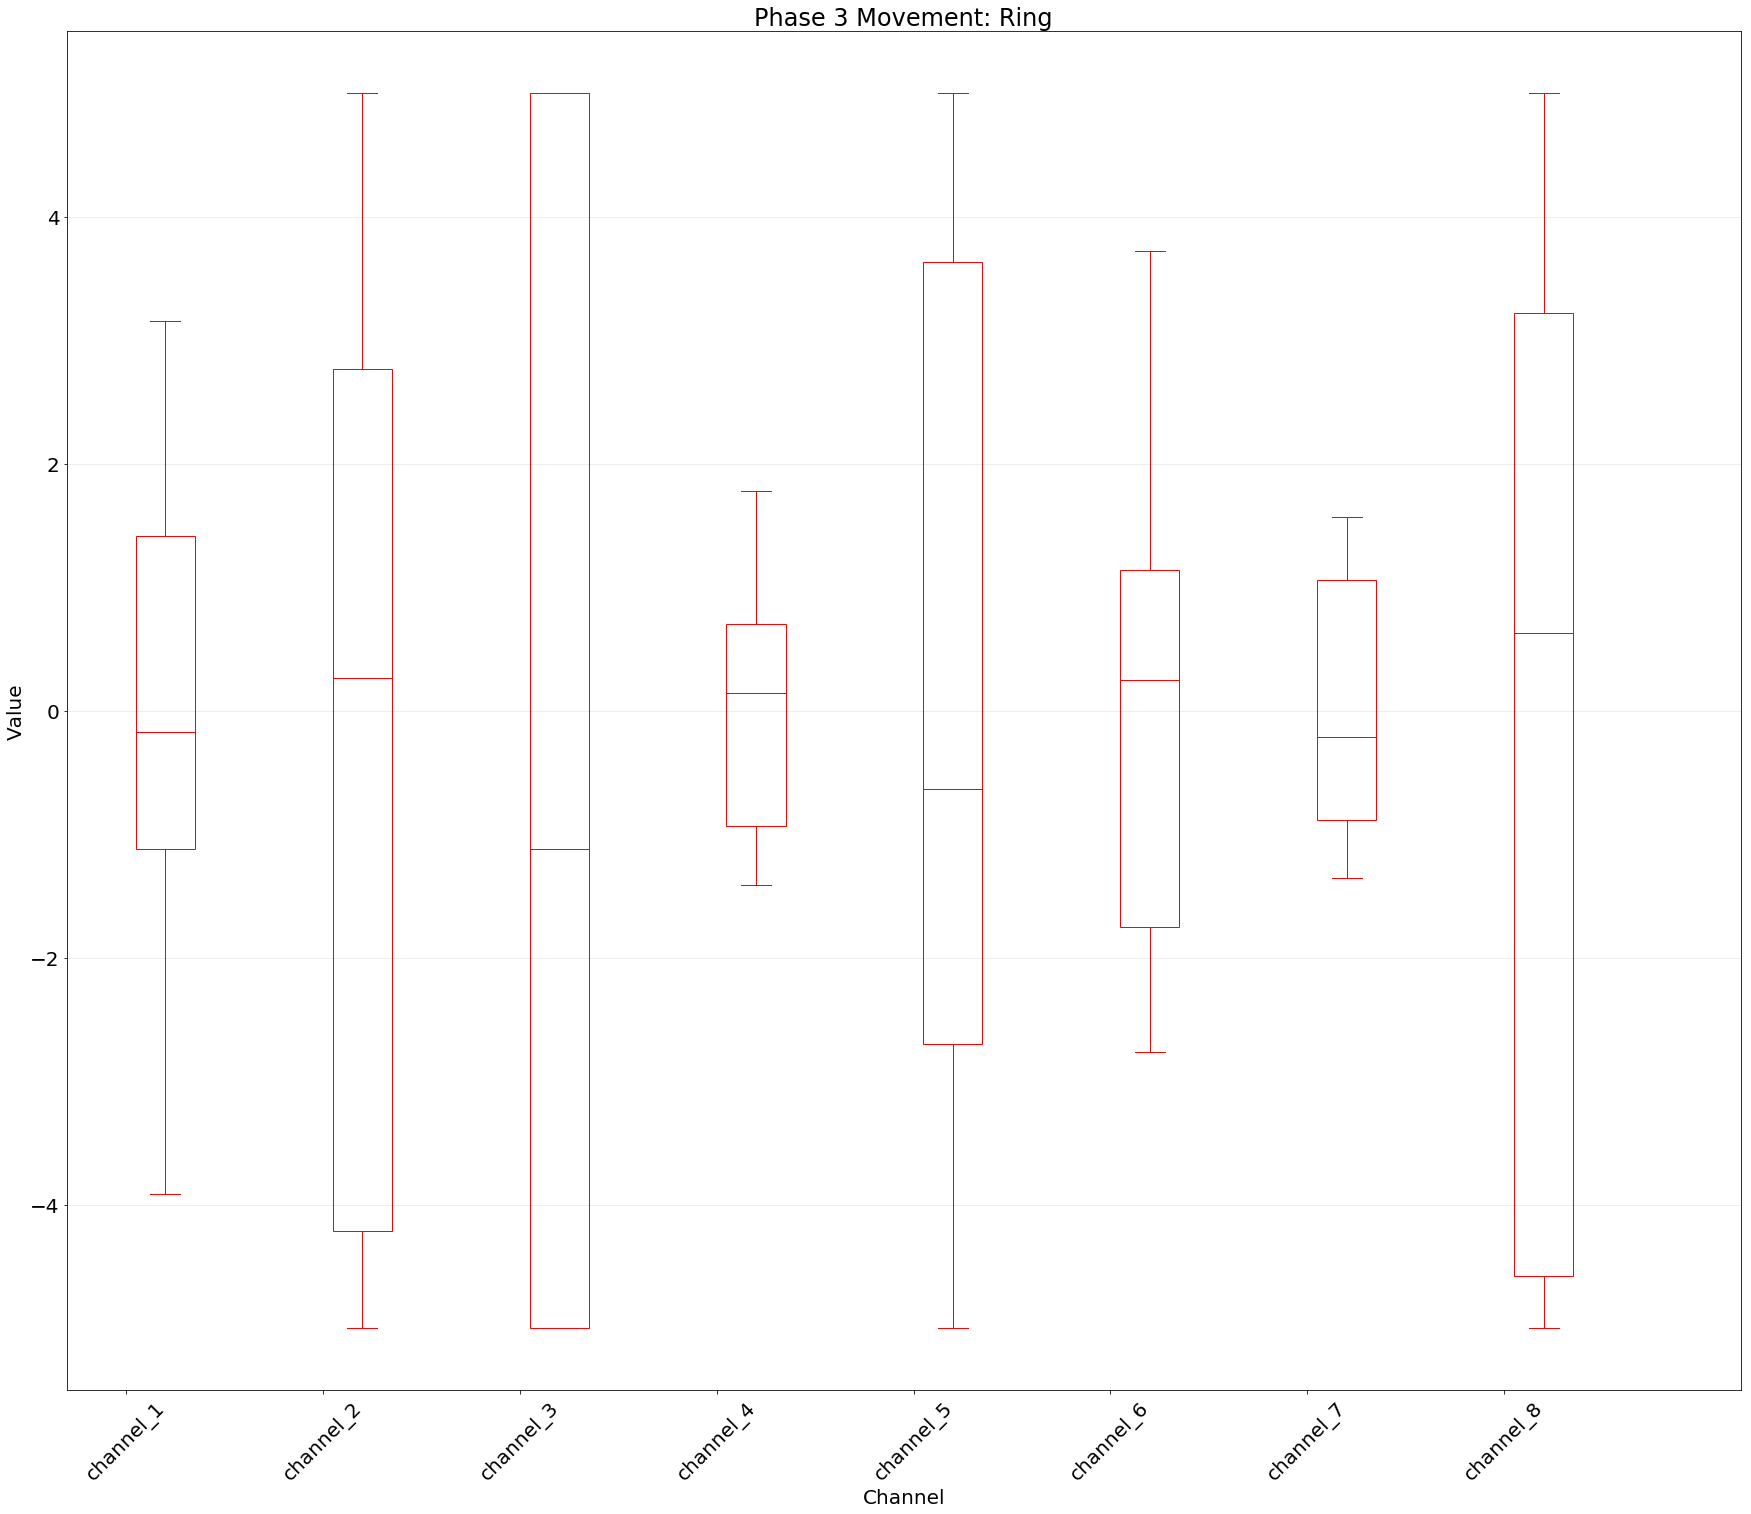

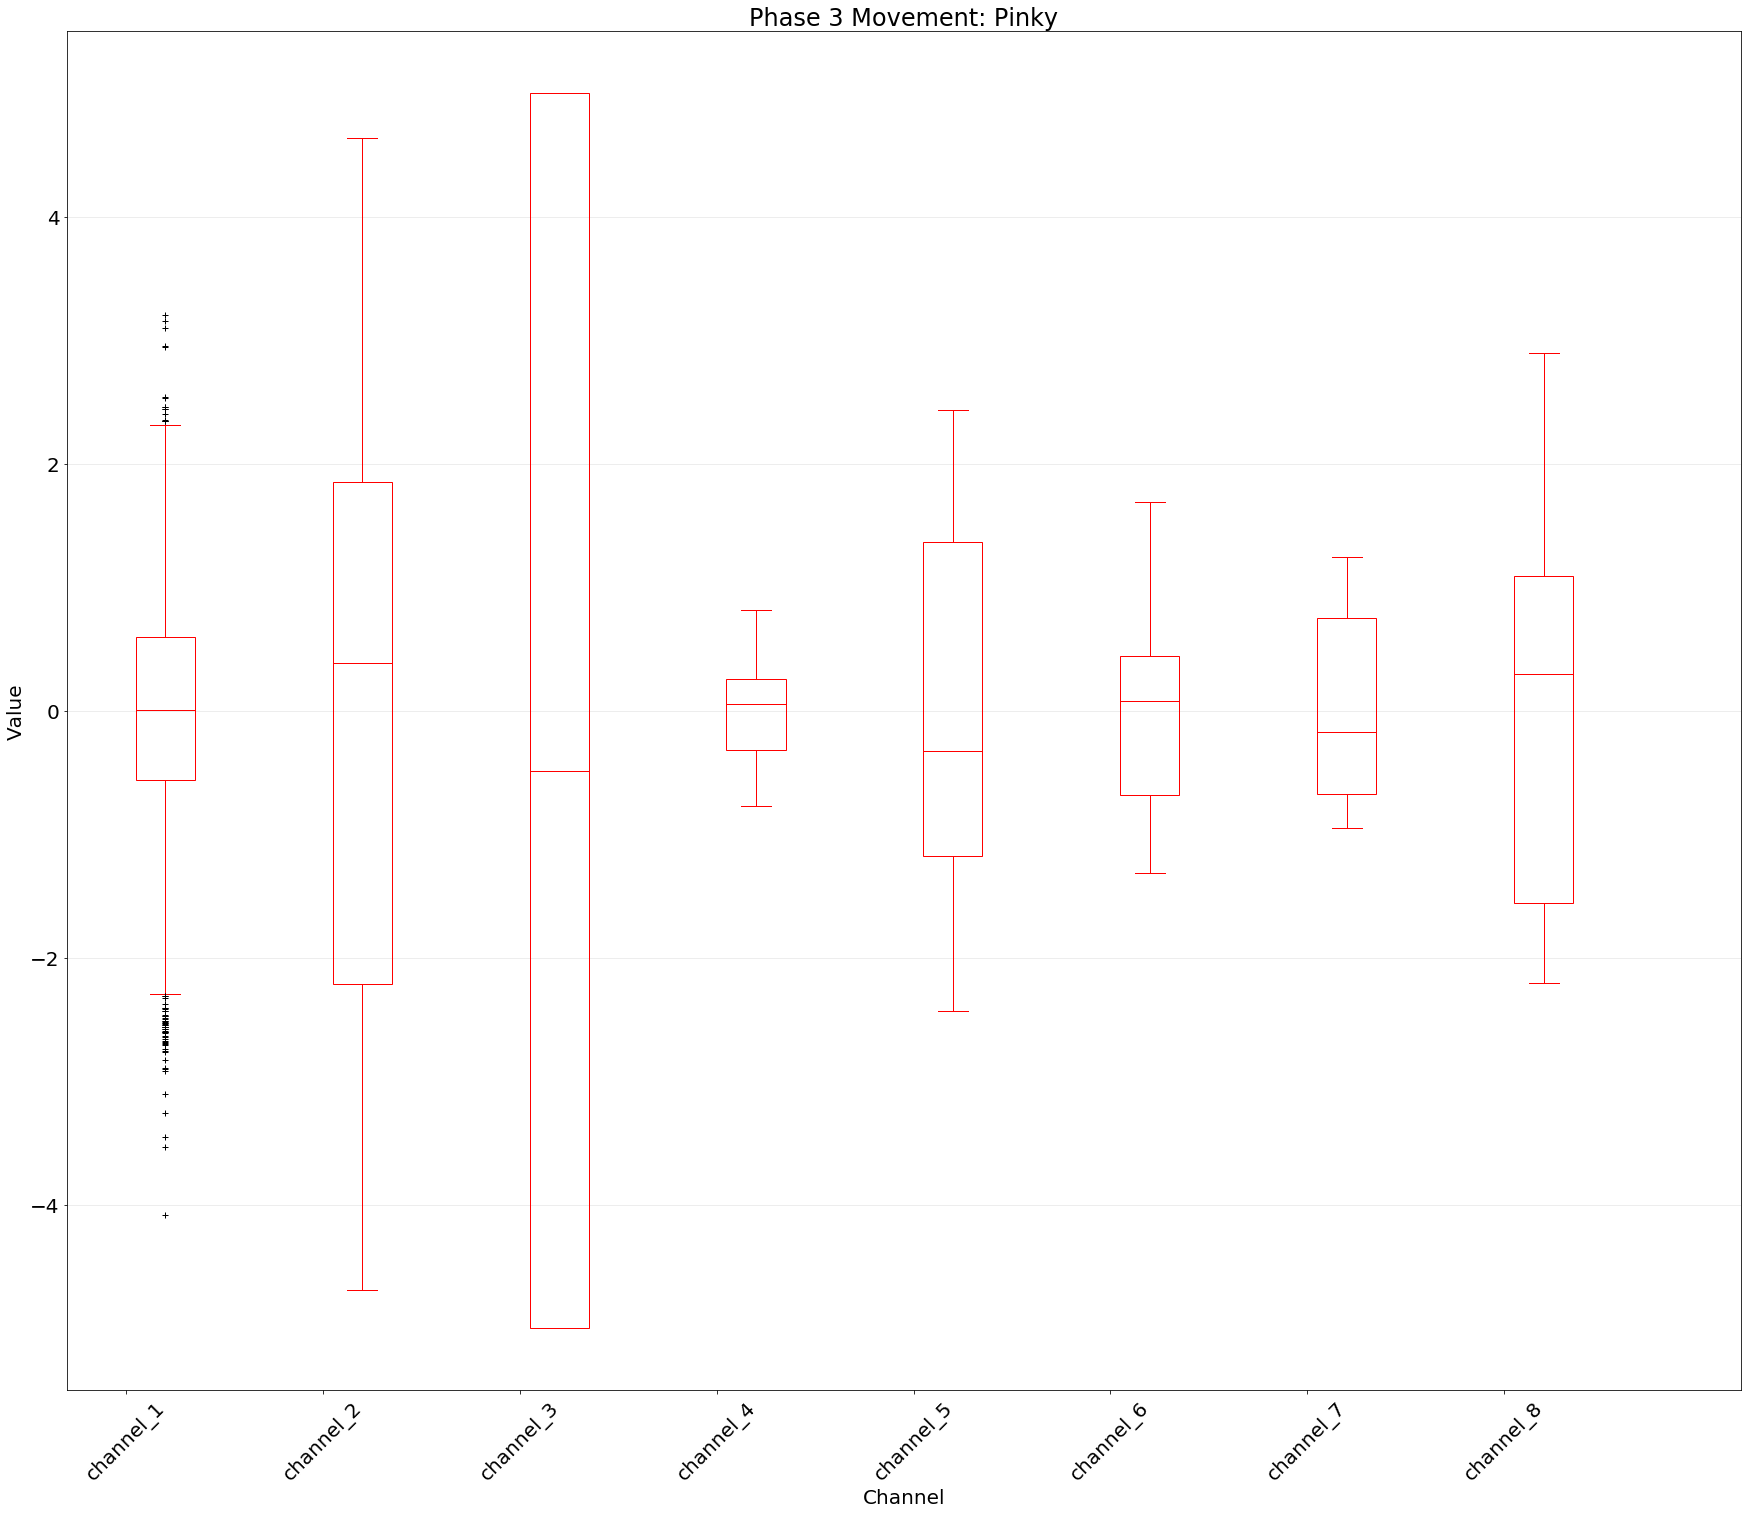

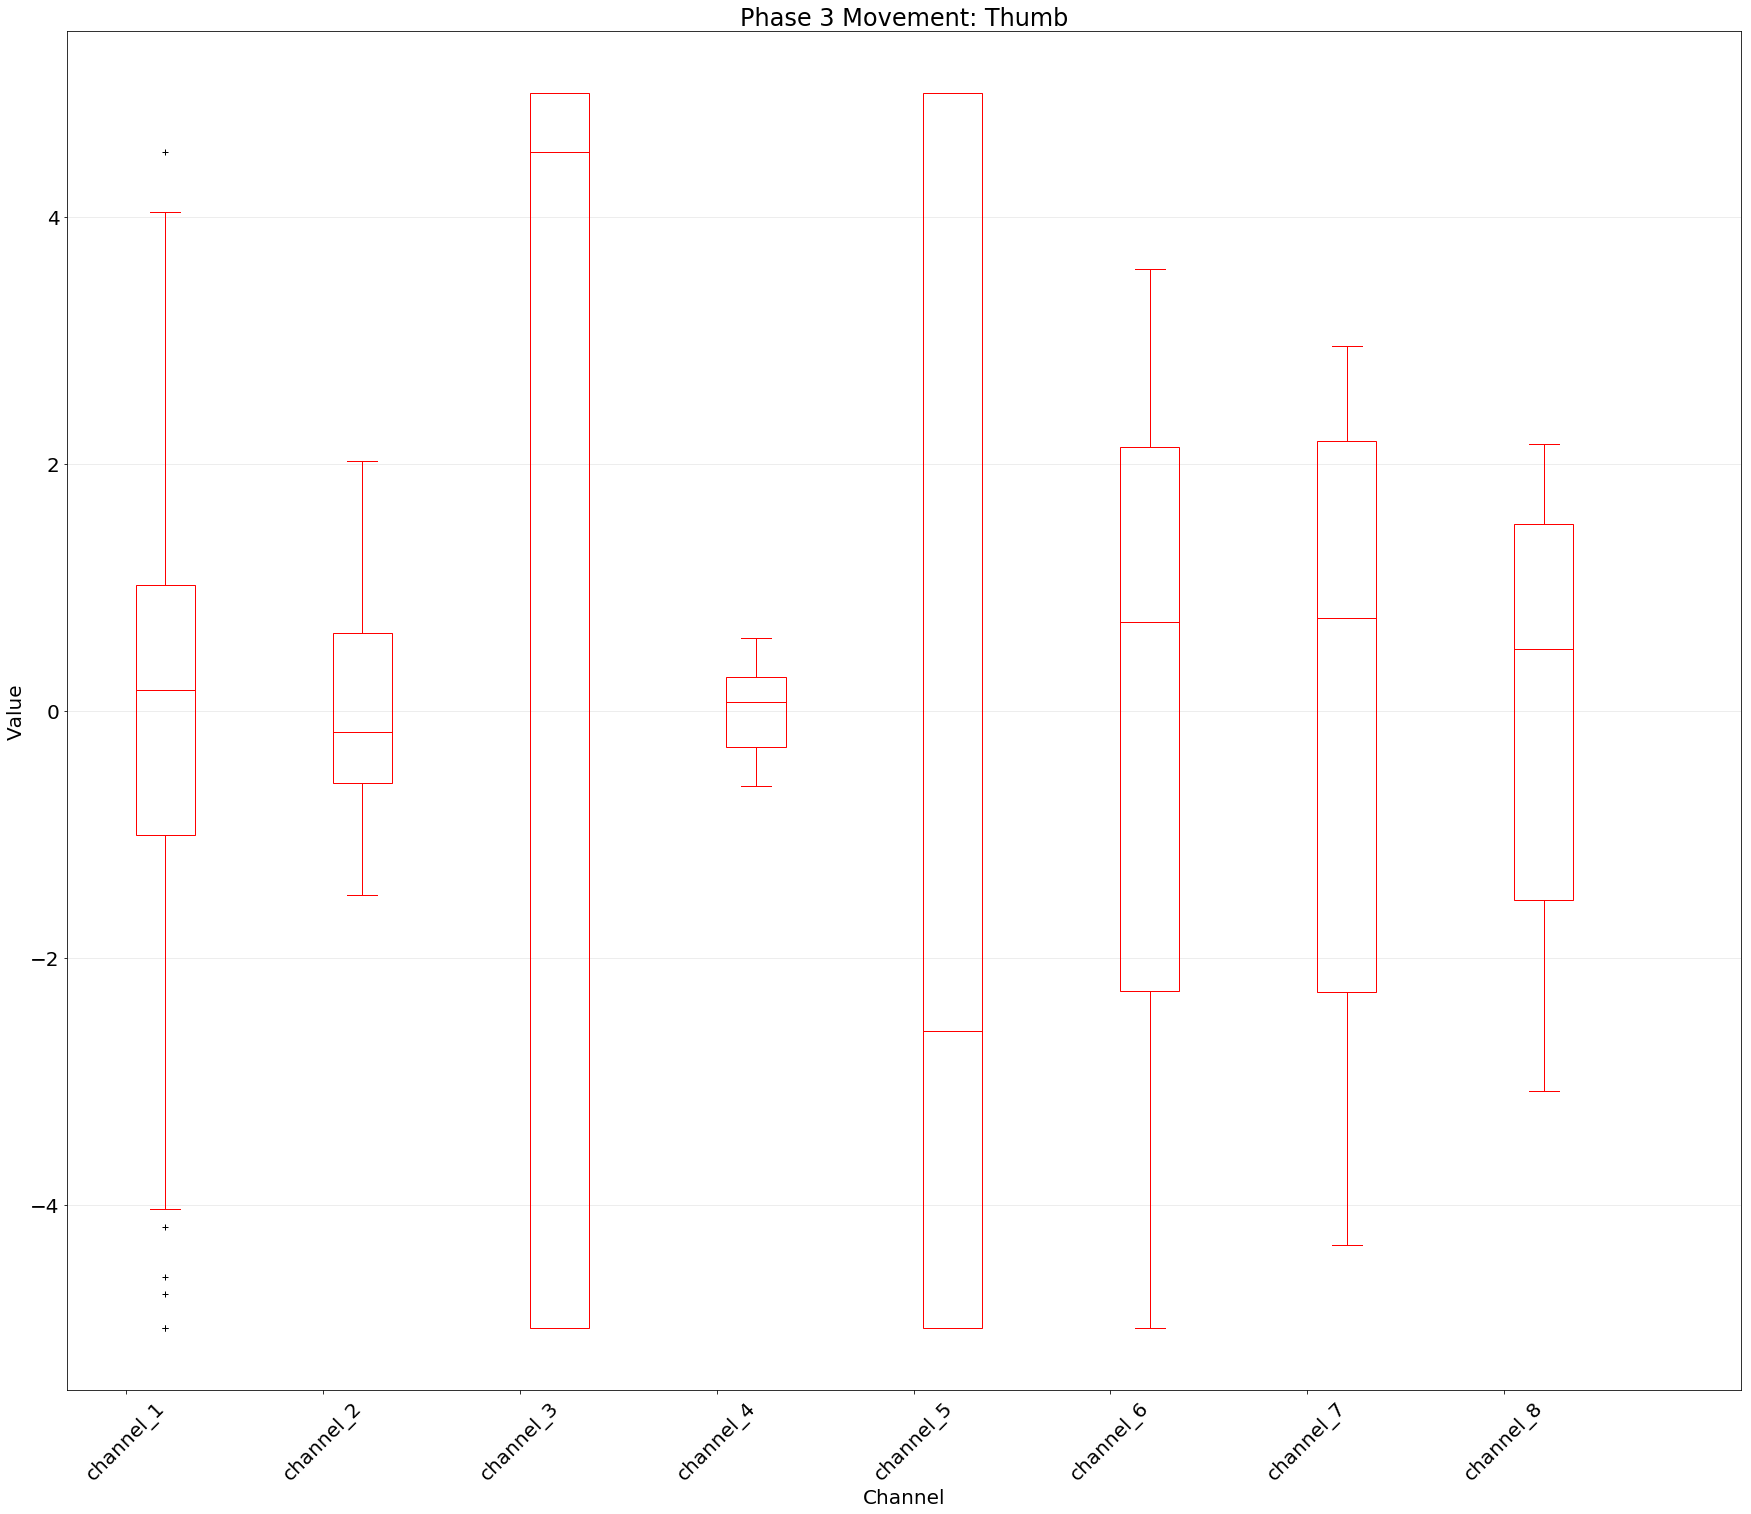

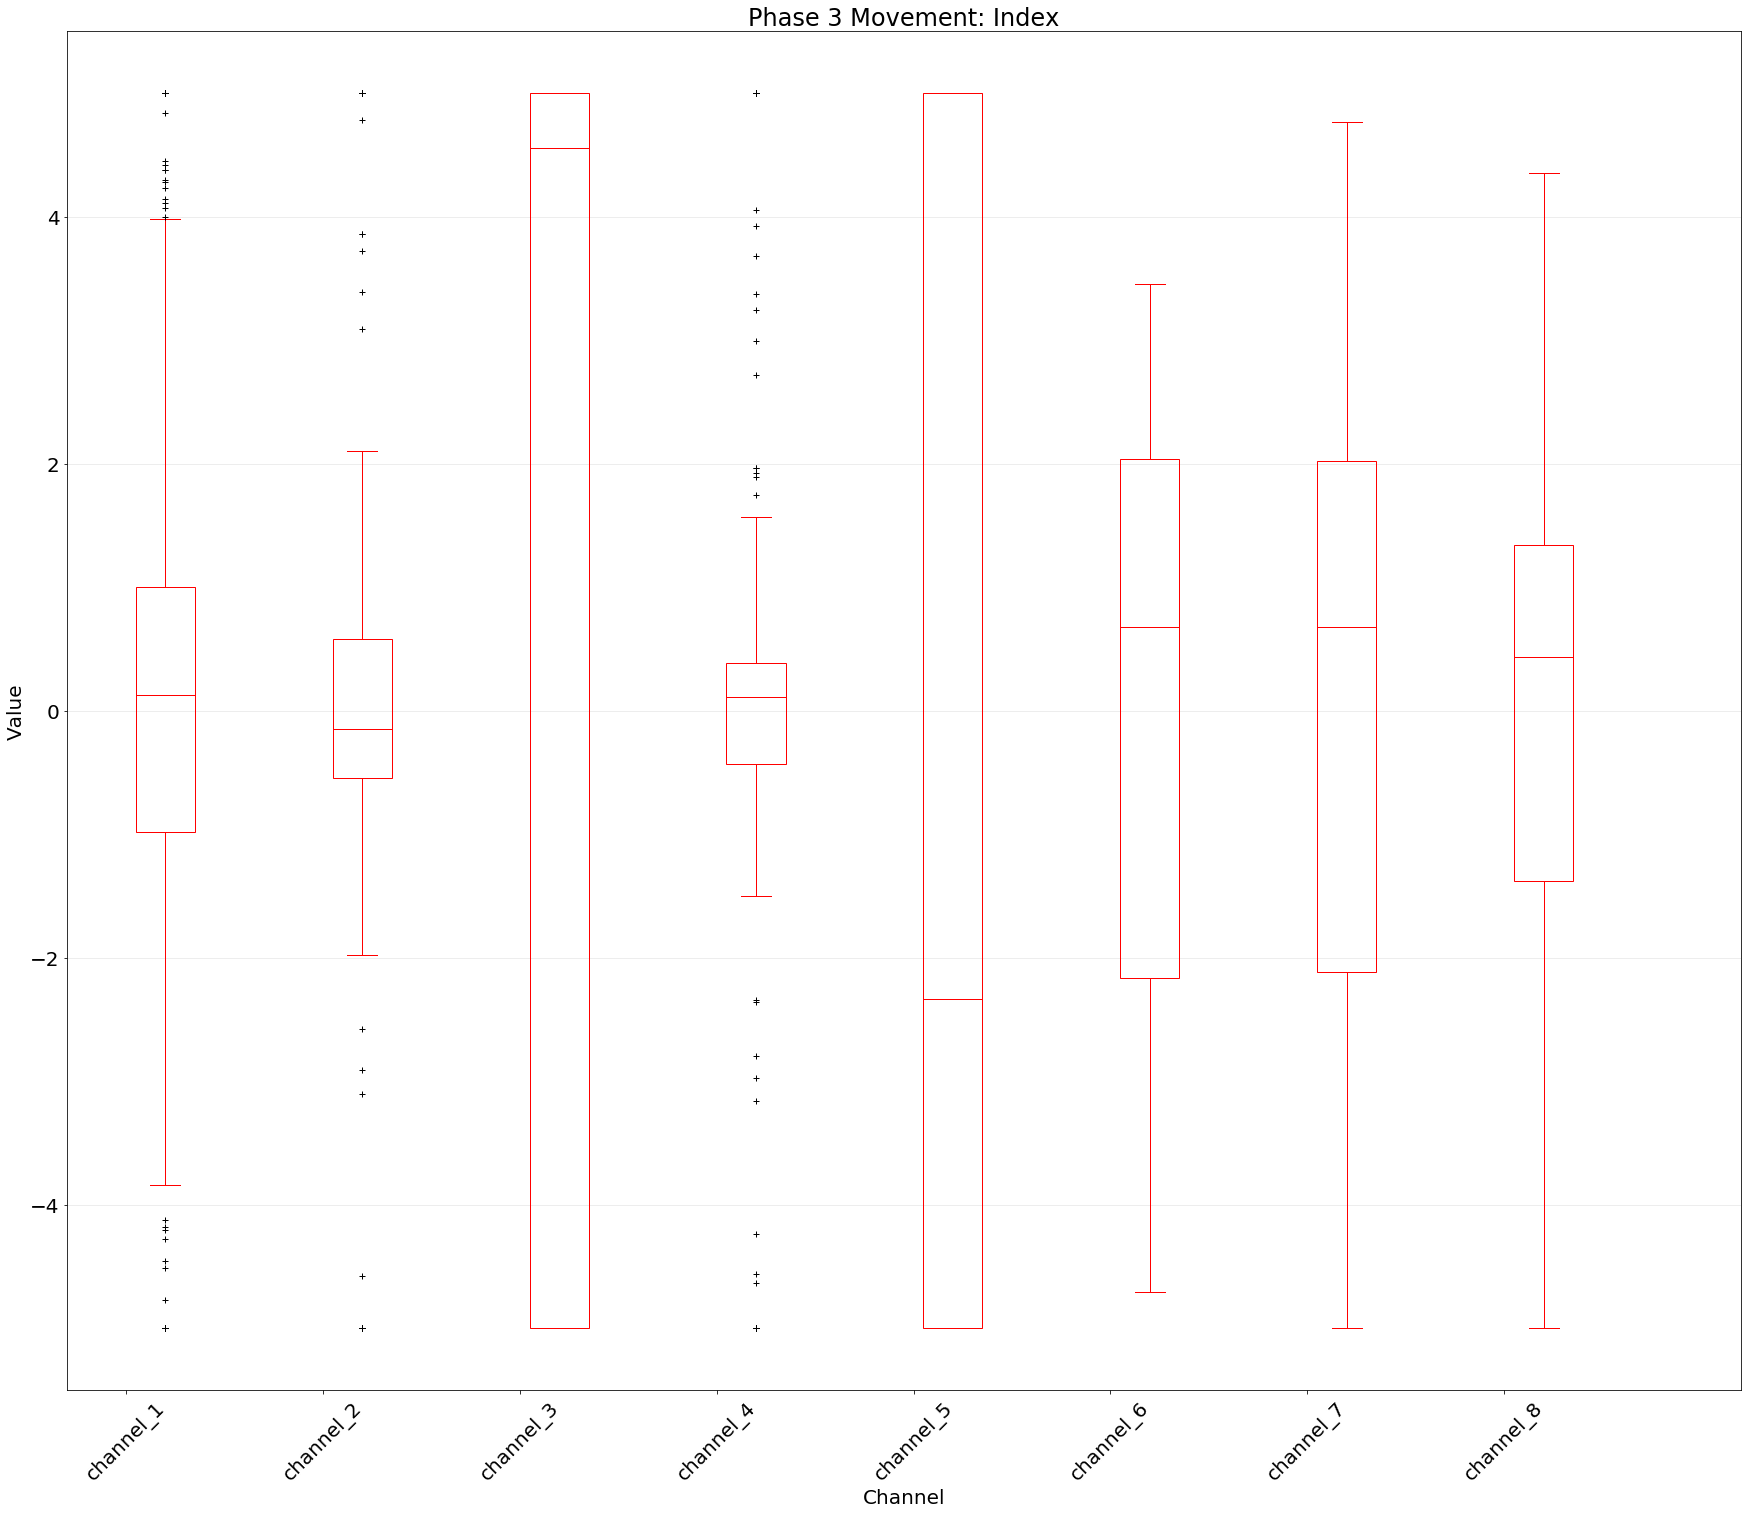

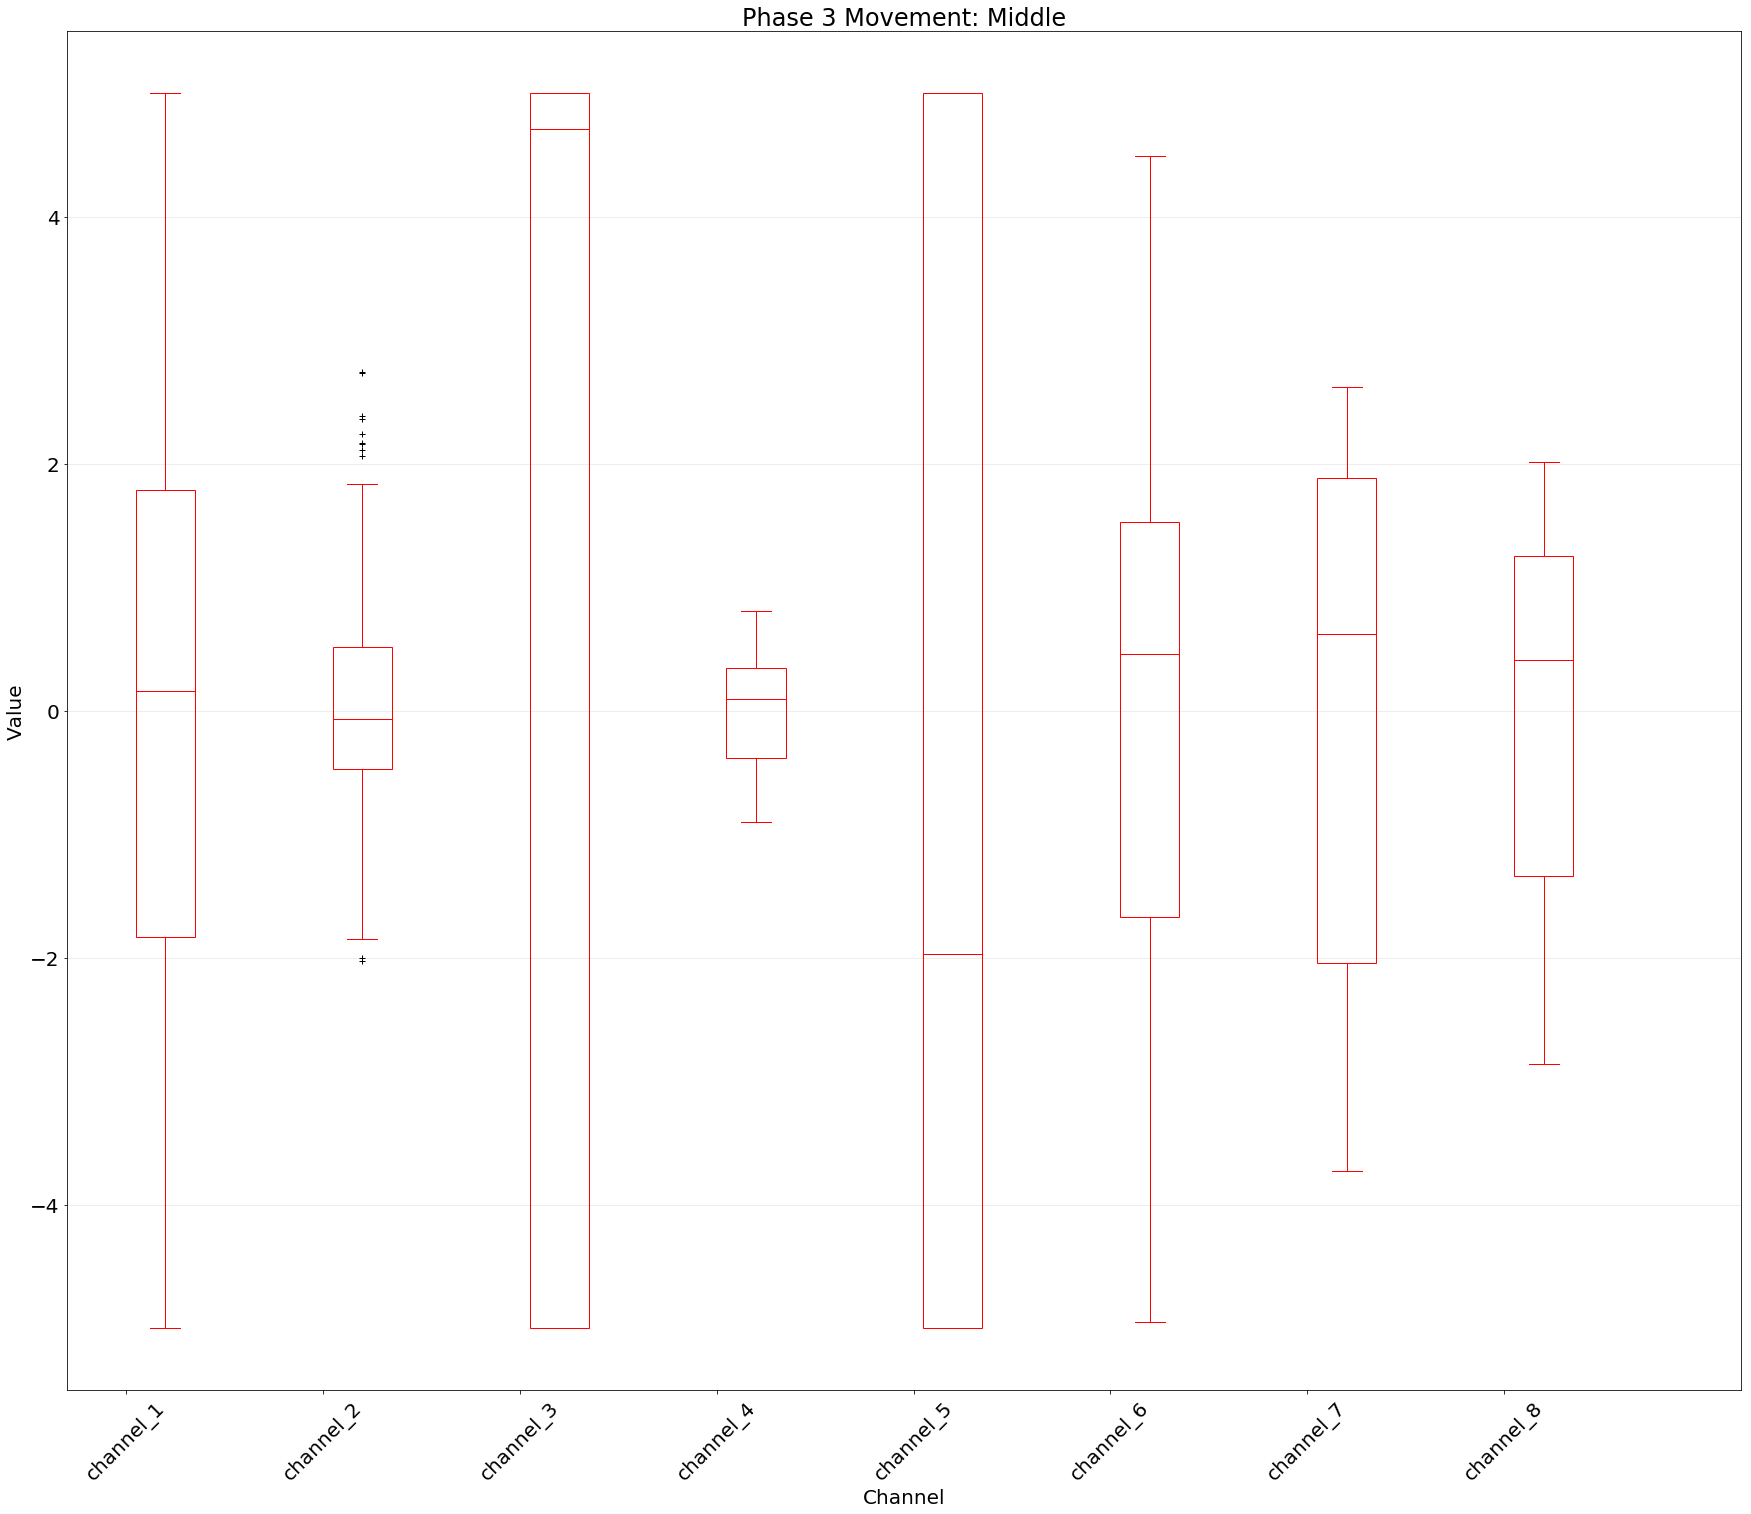

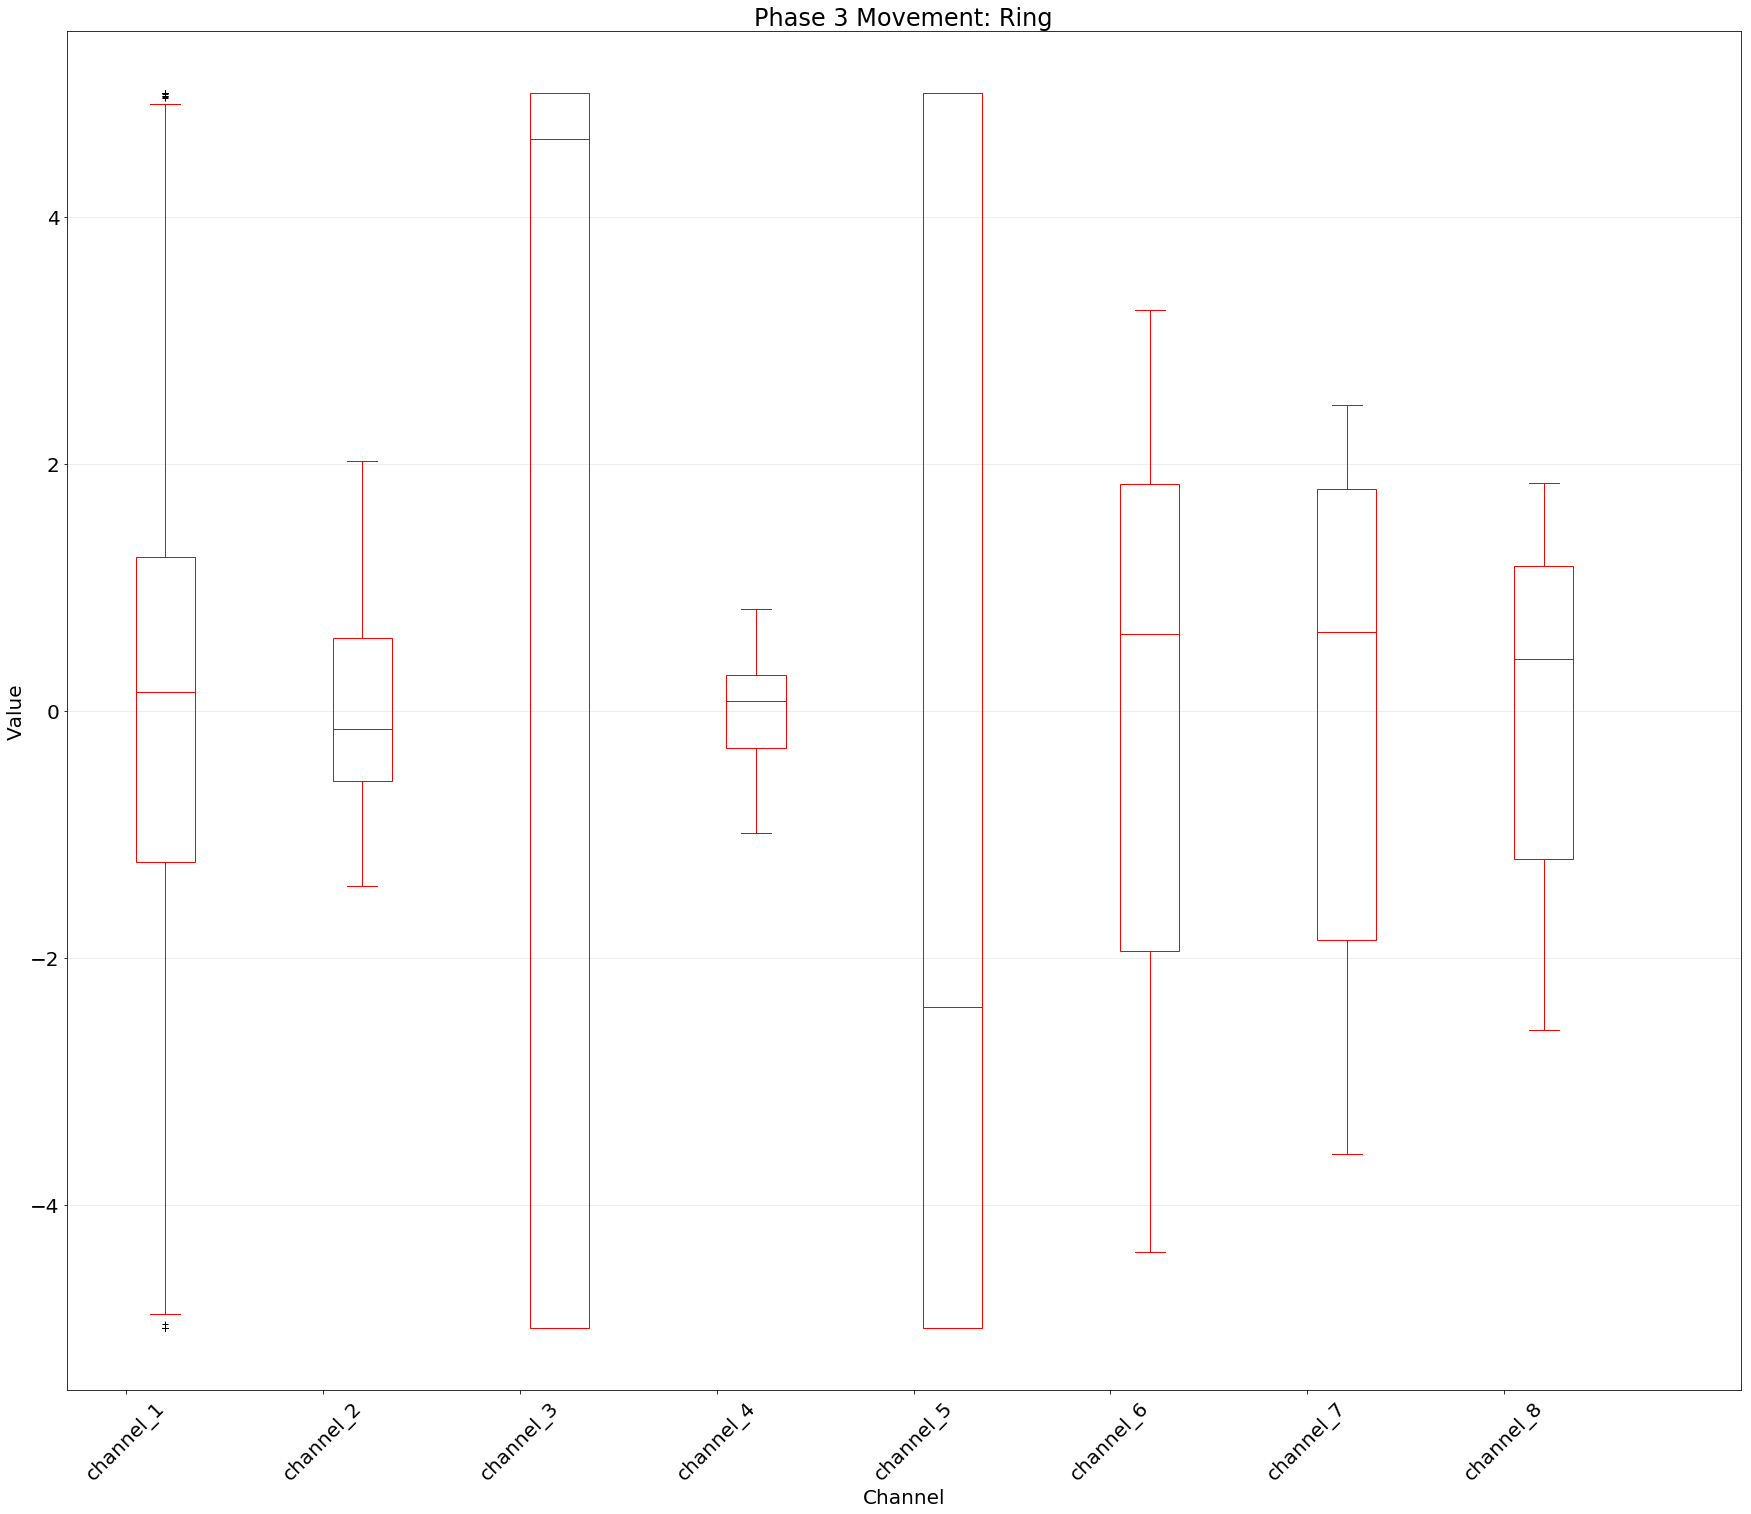

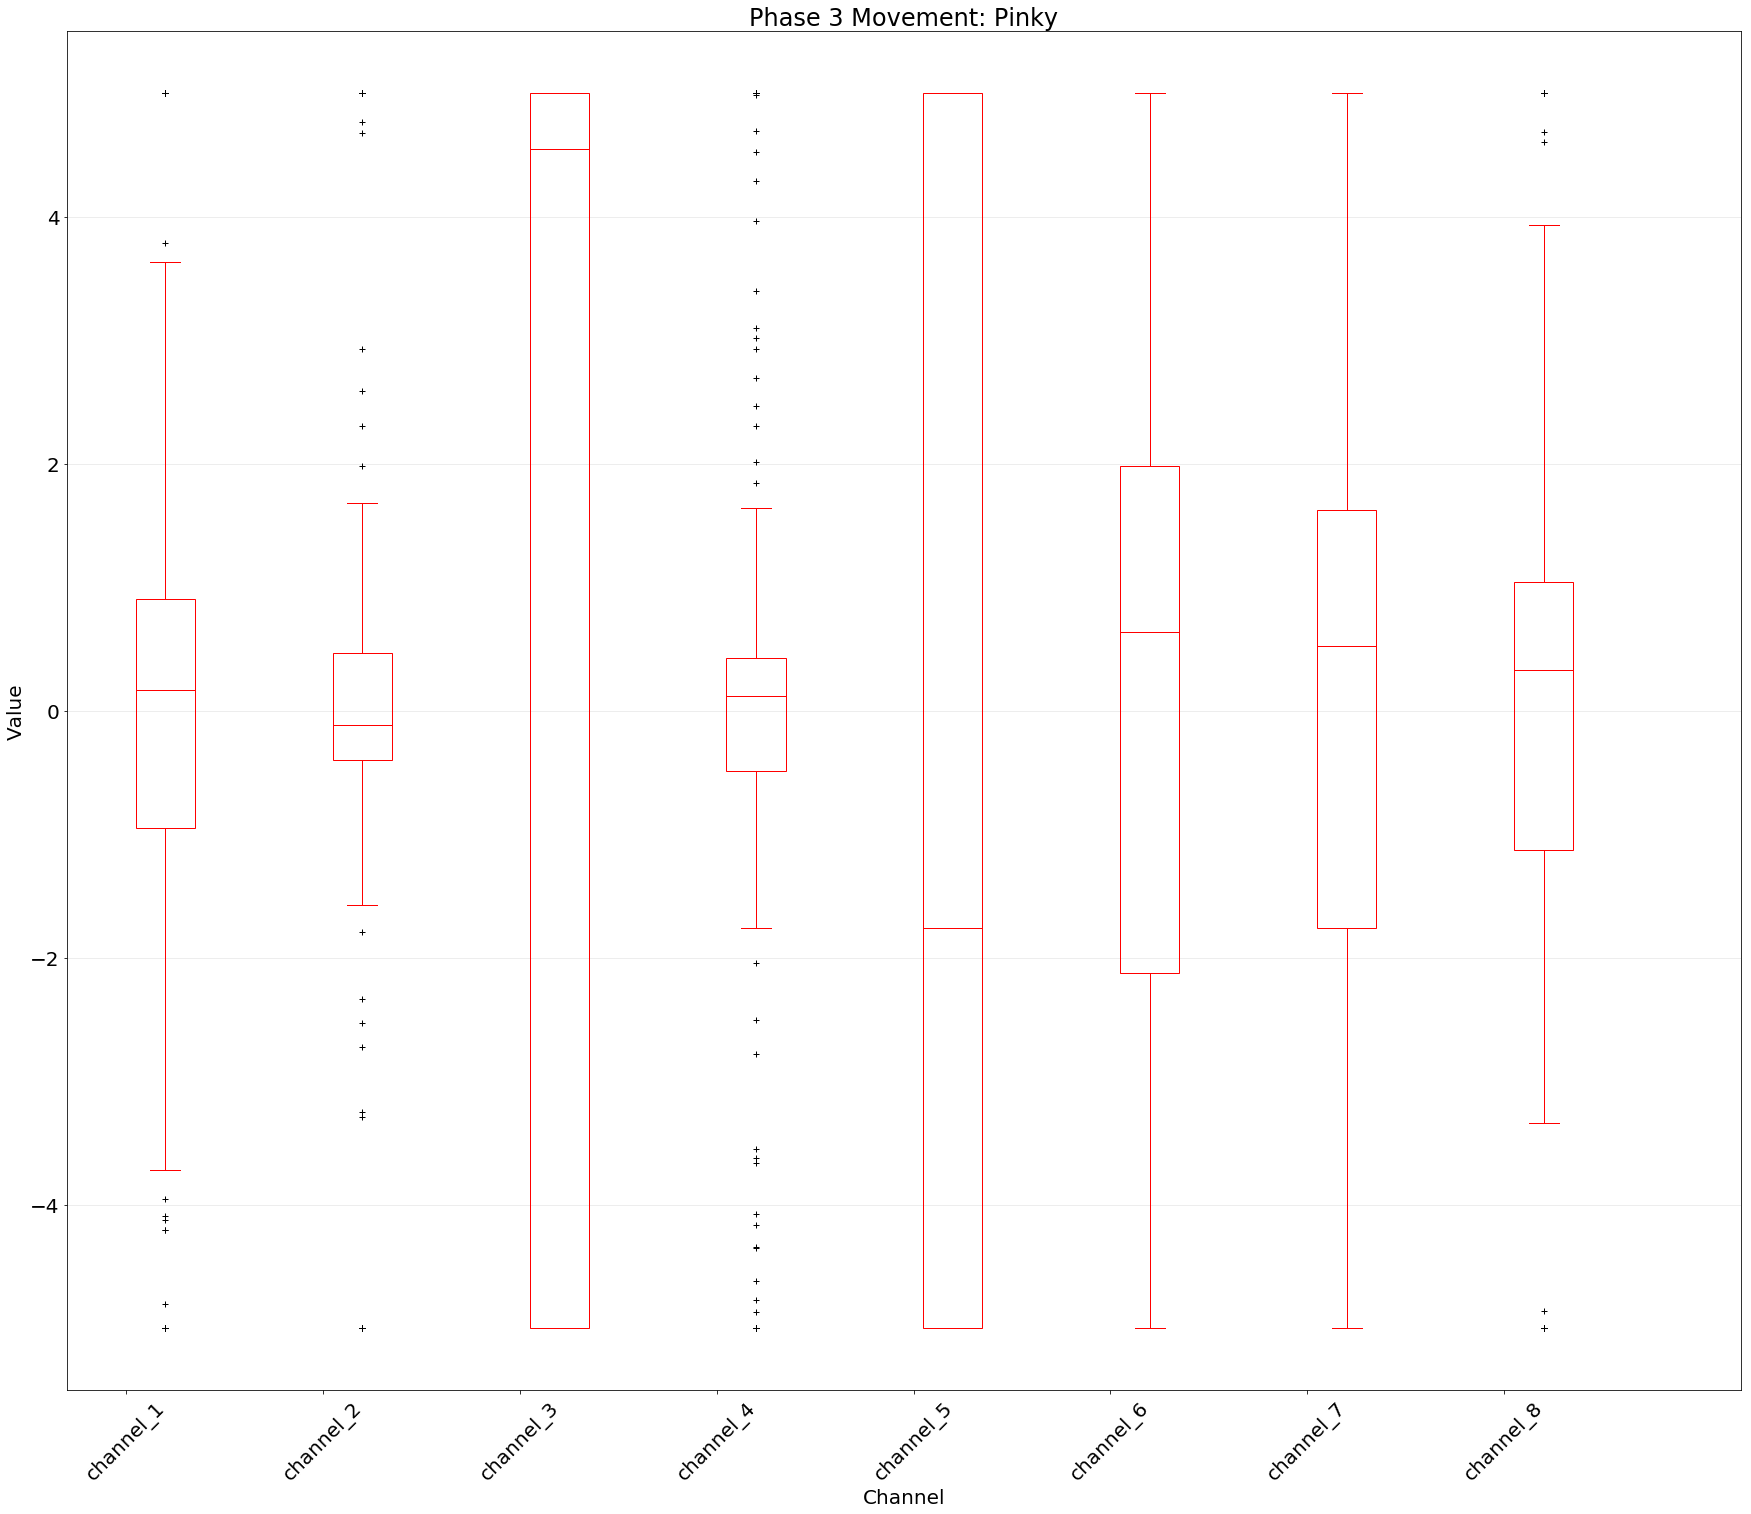

In [10]:
def phase3_plots_to_pdf_all_users():
    user_ids = np.unique(df.userID)
    phase3_movements = ['Thumb', "Index", "Middle", "Ring", "Pinky"]
    for user_id in user_ids:
        pdf = PdfPages("../Dataset_plots/Phase 3/Raw/" + user_id + ".pdf")
        for phase3_movement in phase3_movements:
            fig, ax = plt.subplots(figsize=(30, 25))
            phase3_boxplot_per_user_all_channels(phase3_movement, user_id, ax)
            pdf.savefig(fig)
        pdf.close()

phase3_plots_to_pdf_all_users()